<a href="https://colab.research.google.com/github/gmp007/Machine-Learning-and-EDA-Exploratory-Data-Analysis-Projects/blob/main/CyberSecurity/CyberSecurityPrivacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
<strong> <center> 
<font size="+4"> ML Model to Predict Cyber Security Threats </font>

</center> 
</strong></p>

***

<img  style="float: center;  border:5px solid #ffb037;"  src="https://cdn.dribbble.com/users/620539/screenshots/17381430/media/c1c29b8d746e26e84790eb6d4dc87b51.png?compress=1&resize=1200x900&vertical=top">


## Problem Statement
- Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not. 




    
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#ffb037;font-family:newtimeroman;color:##2243b6;font-size:150%;text-align:center;border-radius:8px 10px;">Overview of the project</p>   

## Key steps I have used are: 
    
### 1) Load Dataset 

### 2) DATA Visualization   

### 3) Data Preprocessing, Cleaning, and Creating
    
### 4) Model Building and Development with OLR and other Models - Training/Testing and Cross-Validation  

<b>DESCRIPTION</b>

Domain: Cyber Security

<b>Dataset snapshot:</b> The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

 1: Phishing

 0: Suspicious

 1: Legitimate

The sample could be either legitimate or phishing.


***

<b>Project Task: Week 1: </b>

<b>Exploratory Data Analysis (EDA): </b>

Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 

1. Determine the number of samples present in the data, unique elements in all the features. 

2. Check if there is any null value in any features. 

3. Correlation of features and feature selection:

4. Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.


<b>Project Task: Week 2</b>

<b> Building Classification Models: </b>

1. Finally, build a robust classification system that classifies whether the URL sample is a phishing site or not.

2. Build classification models using a binary classifier to detect malicious or phishing URLs.

3. Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

4. Validate the accuracy of data by the K-Fold cross-validation technique.

5. The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.


In [ ]:
#!pip install catboost
# Update matplotlib to use bar_label, which was introduced from v3.4
#!pip uninstall matplotlib
#!pip install -U matplotlib

In [ ]:
# Import necessary library
import numpy as np
import pandas as pd
import seaborn as sb
import os
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Split Data 


# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,RidgeClassifierCV,RidgeClassifier, Perceptron
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier 
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score,f1_score,auc # Performance Metrics 
from sklearn.metrics import precision_score, recall_score,roc_curve,precision_recall_curve,roc_auc_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit, cross_validate,cross_val_predict
from xgboost import cv


from sklearn.metrics import RocCurveDisplay, roc_curve, auc, recall_score, precision_score
from sklearn.metrics import average_precision_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
timetotal = time.time() #Use this to compute the total time for the case study

In [ ]:
#read the dataset and set the index col as the row name
df = pd.read_csv('dataset.csv', index_col=0)

In [ ]:
df.head()

having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
index                                                                  
1                              -1              1                   1   
2                               1              1                   1   
3                               1              0                   1   
4                               1              0                   1   
5                               1              0                  -1   

       having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
index                                                              
1                     1                        -1             -1   
2                     1                         1             -1   
3                     1                         1             -1   
4                     1                         1             -1   
5                     1                         1             -1   

       having_Sub_Domain  SSLfinal_State  Domain_registeration_length  \
index                                                                   
1                     -1              -1                           -1   
2                      0               1                           -1   
3                     -1              -1                           -1   
4                     -1              -1                            1   
5                      1               1                           -1   

       Favicon  ...  popUpWidnow  Iframe  age_of_domain  DNSRecord  \
index           ...                                                  
1            1  ...            1       1             -1         -1   
2            1  ...            1       1             -1         -1   
3            1  ...            1       1              1         -1   
4            1  ...            1       1             -1         -1   
5            1  ...           -1       1             -1         -1   

       web_traffic  Page_Rank  Google_Index  Links_pointing_to_page  \
index                                                                 
1               -1         -1             1                       1   
2                0         -1             1                       1   
3                1         -1             1                       0   
4                1         -1             1                      -1   
5                0         -1             1                       1   

       Statistical_report  Result  
index                              
1                      -1      -1  
2                       1      -1  
3                      -1      -1  
4                       1      -1  
5                       1       1  

[5 rows x 31 columns]

In [ ]:
df.shape

(11055, 31)

<b> The dataset constains 11055 data with 30 features (see below). The target is 'Result'. </b>

In [ ]:
col_name = df.columns
display(col_name)

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [ ]:
# Determine unique features
for c in col_name:
  print(f"The unique features for: {c} - {df[c].nunique()} with labels {df[c].unique()} ")

The unique features for: having_IPhaving_IP_Address - 2 with labels [-1  1] 
The unique features for: URLURL_Length - 3 with labels [ 1  0 -1] 
The unique features for: Shortining_Service - 2 with labels [ 1 -1] 
The unique features for: having_At_Symbol - 2 with labels [ 1 -1] 
The unique features for: double_slash_redirecting - 2 with labels [-1  1] 
The unique features for: Prefix_Suffix - 2 with labels [-1  1] 
The unique features for: having_Sub_Domain - 3 with labels [-1  0  1] 
The unique features for: SSLfinal_State - 3 with labels [-1  1  0] 
The unique features for: Domain_registeration_length - 2 with labels [-1  1] 
The unique features for: Favicon - 2 with labels [ 1 -1] 
The unique features for: port - 2 with labels [ 1 -1] 
The unique features for: HTTPS_token - 2 with labels [-1  1] 
The unique features for: Request_URL - 2 with labels [ 1 -1] 
The unique features for: URL_of_Anchor - 3 with labels [-1  0  1] 
The unique features for: Links_in_tags - 3 with labels [ 1 -

The features have 2 to 3 unique values

## Data Exploration of some of the Features

array([[<AxesSubplot:title={'center':'having_IPhaving_IP_Address'}>,
        <AxesSubplot:title={'center':'URLURL_Length'}>,
        <AxesSubplot:title={'center':'Shortining_Service'}>,
        <AxesSubplot:title={'center':'having_At_Symbol'}>,
        <AxesSubplot:title={'center':'double_slash_redirecting'}>],
       [<AxesSubplot:title={'center':'Prefix_Suffix'}>,
        <AxesSubplot:title={'center':'having_Sub_Domain'}>,
        <AxesSubplot:title={'center':'SSLfinal_State'}>,
        <AxesSubplot:title={'center':'Domain_registeration_length'}>,
        <AxesSubplot:title={'center':'Favicon'}>],
       [<AxesSubplot:title={'center':'port'}>,
        <AxesSubplot:title={'center':'HTTPS_token'}>,
        <AxesSubplot:title={'center':'Request_URL'}>,
        <AxesSubplot:title={'center':'URL_of_Anchor'}>,
        <AxesSubplot:title={'center':'Links_in_tags'}>],
       [<AxesSubplot:title={'center':'SFH'}>,
        <AxesSubplot:title={'center':'Submitting_to_email'}>,
        <AxesSubp

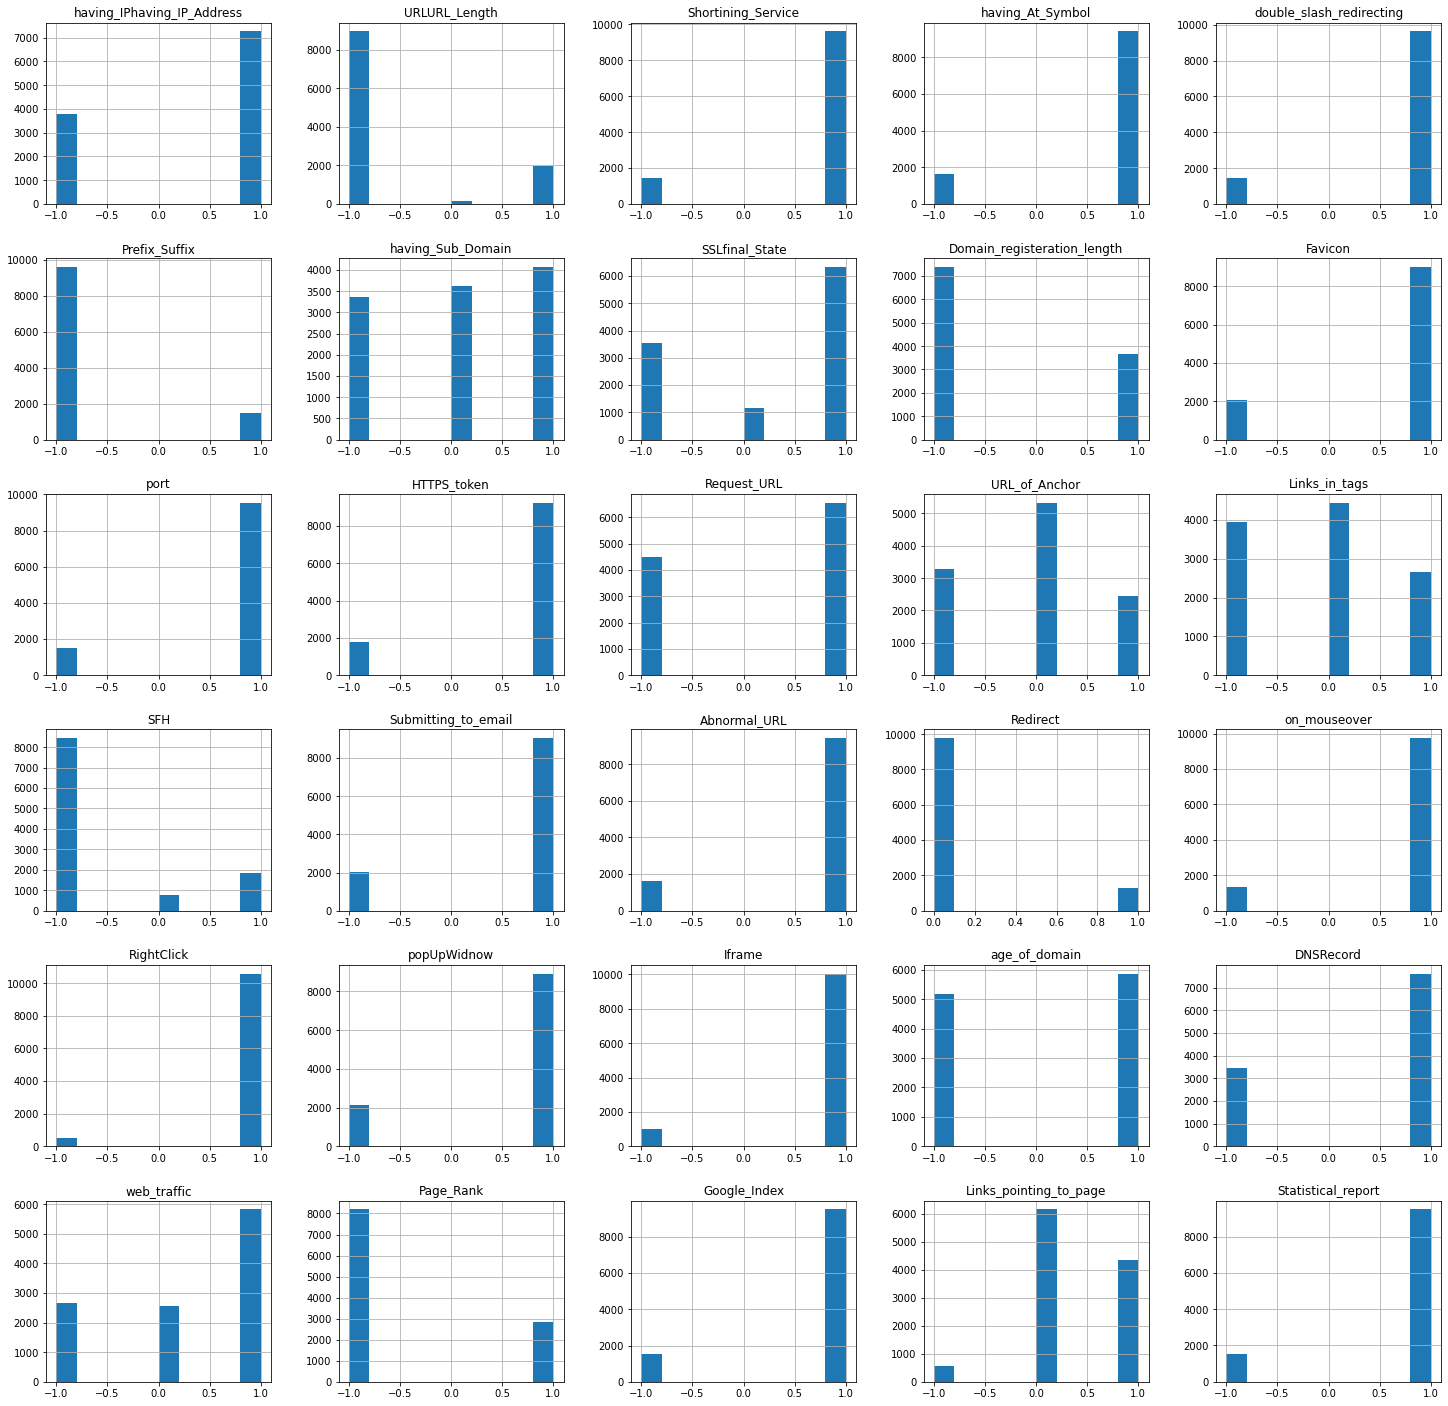

In [ ]:
# Plot the distribution of the features with histogram
df1 = df.drop(['Result'],axis=1)
df1.hist(bins=10, figsize=(25, 25))

In [ ]:
# Check for null values
df.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

## Comment on missing values
<b> No missing data in the dataset </b>

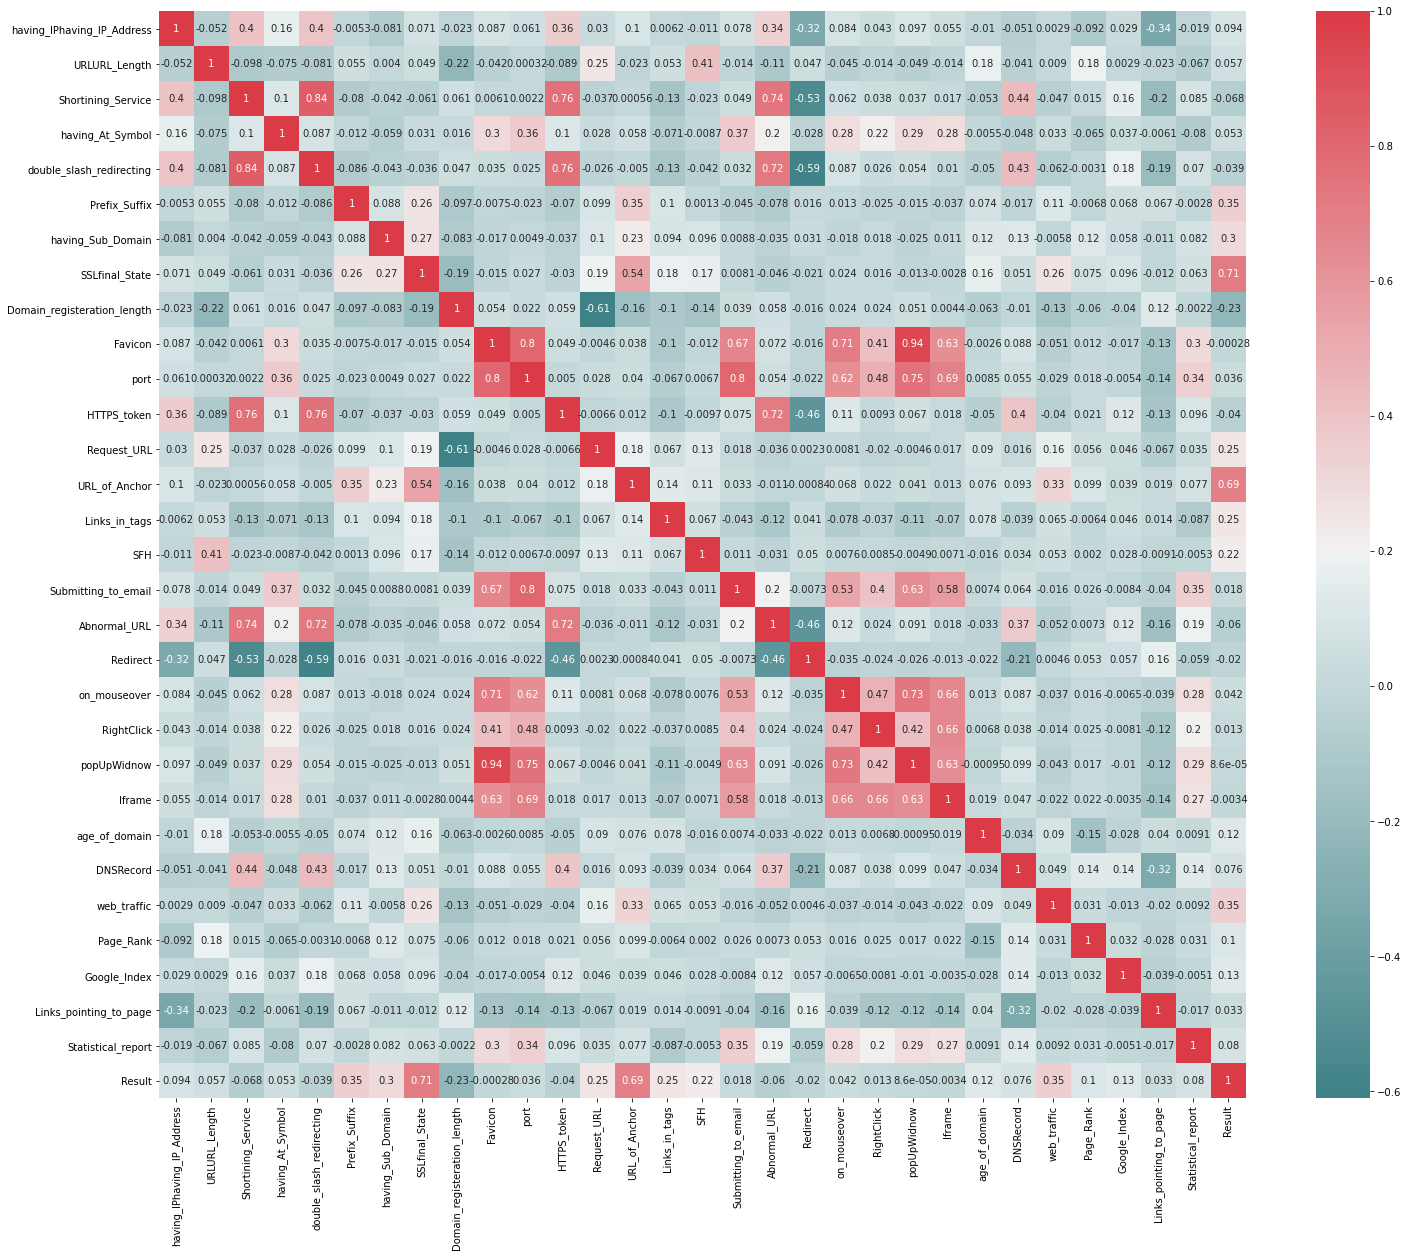

In [ ]:
fig, axe = plt.subplots(figsize=(25,20))
#Get the color palettes 
cmap = sb.diverging_palette(200,10,center = "light", as_cmap=True)
#draw the heatmap
sb.heatmap(df.corr(),vmax=1,square =True, cmap=cmap,annot=True );

In [ ]:
# Check the correlation between the target "Result" and the feautures
correlation = df.corr()
correlation['Result']

having_IPhaving_IP_Address     0.094160
URLURL_Length                  0.057430
Shortining_Service            -0.067966
having_At_Symbol               0.052948
double_slash_redirecting      -0.038608
Prefix_Suffix                  0.348606
having_Sub_Domain              0.298323
SSLfinal_State                 0.714741
Domain_registeration_length   -0.225789
Favicon                       -0.000280
port                           0.036419
HTTPS_token                   -0.039854
Request_URL                    0.253372
URL_of_Anchor                  0.692935
Links_in_tags                  0.248229
SFH                            0.221419
Submitting_to_email            0.018249
Abnormal_URL                  -0.060488
Redirect                      -0.020113
on_mouseover                   0.041838
RightClick                     0.012653
popUpWidnow                    0.000086
Iframe                        -0.003394
age_of_domain                  0.121496
DNSRecord                      0.075718


Text(0.5, 1.0, 'Features Correlation with Result')

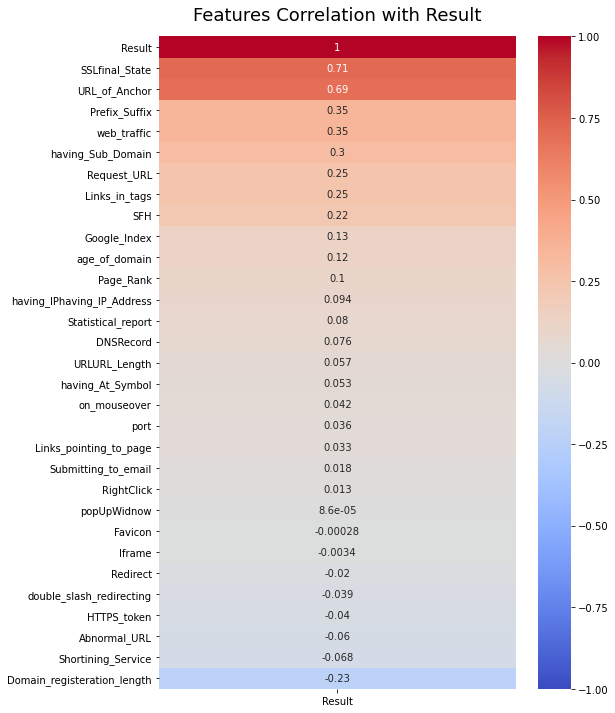

In [ ]:
#Plot the features correlation with Results for better visualization
plt.figure(figsize=(8, 12))
heatmap = sb.heatmap(df.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlation with Result', fontdict={'fontsize':18}, pad=16)

From the heat map and the list, we found there are feature correlated with the result. The maximum correlation is with "SSLfinal_State", which is around 0.7. Some of the features are negative correlated the "result". The large negative correlated feature is "Domain_registeration_length", which is -0.225789.

To extract useful feature, we apply a thd to feature those feature with its abs corrleation value below the thd. 

In [ ]:
# Check the level of correlation of the features with the target
threshold = 0.2
feature_name = [] # Initialize
for i in range(len(correlation['Result'])-1):
    if abs(correlation['Result'])[i] > threshold:
        feature_name.append(col_name[i])
        
print(f'The following features have a correlation greater than {threshold} \n {feature_name}' )

The following features have a correlation greater than 0.2 
 ['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'web_traffic']


In [ ]:
#Let us check for any possible multicollinearity

for n1 in feature_name:
    for n2 in feature_name:
        if n1 == n2:
            continue
        if (correlation[n1][n2] > threshold):
            print(f"{n1}\t{n2}\t{correlation[n1][n2]}")

Prefix_Suffix	SSLfinal_State	0.2613905324044003
Prefix_Suffix	URL_of_Anchor	0.34887119935196603
having_Sub_Domain	SSLfinal_State	0.26764875539658595
having_Sub_Domain	URL_of_Anchor	0.22949070938052912
SSLfinal_State	Prefix_Suffix	0.2613905324044003
SSLfinal_State	having_Sub_Domain	0.26764875539658595
SSLfinal_State	URL_of_Anchor	0.5357861908016471
SSLfinal_State	web_traffic	0.2587678353195676
URL_of_Anchor	Prefix_Suffix	0.34887119935196603
URL_of_Anchor	having_Sub_Domain	0.22949070938052912
URL_of_Anchor	SSLfinal_State	0.5357861908016471
URL_of_Anchor	web_traffic	0.32629322998035387
web_traffic	SSLfinal_State	0.2587678353195676
web_traffic	URL_of_Anchor	0.32629322998035387


In [ ]:
threshold = 0.3
feature_name = []
for i in range(len(correlation['Result'])-1):
    if abs(correlation['Result'])[i] > threshold:
        feature_name.append(col_name[i])
        
print(f'The following features have a correlation greater than {threshold} \n {feature_name}' )

The following features have a correlation greater than 0.3 
 ['Prefix_Suffix', 'SSLfinal_State', 'URL_of_Anchor', 'web_traffic']


In [ ]:
for n1 in feature_name:
    for n2 in feature_name:
        if n1 == n2:
            continue
        if (correlation[n1][n2] > threshold):
            print(f"{n1}\t{n2}\t{correlation[n1][n2]}")

Prefix_Suffix	URL_of_Anchor	0.34887119935196603
SSLfinal_State	URL_of_Anchor	0.5357861908016471
URL_of_Anchor	Prefix_Suffix	0.34887119935196603
URL_of_Anchor	SSLfinal_State	0.5357861908016471
URL_of_Anchor	web_traffic	0.32629322998035387
web_traffic	URL_of_Anchor	0.32629322998035387


In [ ]:
threshold = 0.4
feature_name = []
for i in range(len(correlation['Result'])-1):
    if abs(correlation['Result'])[i] > threshold:
        feature_name.append(col_name[i])
        
print(f'The following features have a correlation greater than {threshold} \n {feature_name}' )

The following features have a correlation greater than 0.4 
 ['SSLfinal_State', 'URL_of_Anchor']


In [ ]:
for n1 in feature_name:
    for n2 in feature_name:
        if n1 == n2:
            continue
        print(f"{n1}\t{n2}\t{correlation[n1][n2]}")

SSLfinal_State	URL_of_Anchor	0.5357861908016471
URL_of_Anchor	SSLfinal_State	0.5357861908016471


In [ ]:
threshold = 0.7
feature_name = []
for i in range(len(correlation['Result'])-1):
    if abs(correlation['Result'])[i] > threshold:
        feature_name.append(col_name[i])
        
print(f'The following features have a correlation greater than {threshold} \n {feature_name}' )

The following features have a correlation greater than 0.7 
 ['SSLfinal_State']


## Comment on the correlation
- The correlation between each features and the target are all less than 1. The correlations are around 0.5 (0.535). In fact, only SSLfinal_State and URL_of_Anchor have correlation that is greater than 0.5. Thus, we conclude that all the feature are independent.

# ML Model Development

In [ ]:
# Check for potential imbalance in the target 
round((df.Result.value_counts() * 100/ len(df)),4)

 1    55.6943
-1    44.3057
Name: Result, dtype: float64

<b> Comment on potential imbalance </b>
- Based on the percentage, we can conclude that there is no imbalance in the target.

## Baseline ML Model - Logistic Model

In [ ]:
#Designate the features and the target
x = df.drop(['Result'],axis=1)
y = df['Result']

swap = {-1: 0, 1: 1} # To avoid issues in Ensemble ML models like Xgboost, swap -1 ->0 and 1->1

y = y.map(swap) 
y

index
1        0
2        0
3        0
4        0
5        1
        ..
11051    1
11052    0
11053    0
11054    0
11055    0
Name: Result, Length: 11055, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [ ]:
lm = LogisticRegression(max_iter=1000)
lm.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1362,  137],
       [ 109, 1709]])

In [ ]:
accuracy_score(y_test, y_pred)

0.9258365993367501

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1499
           1       0.93      0.94      0.93      1818

    accuracy                           0.93      3317
   macro avg       0.93      0.92      0.93      3317
weighted avg       0.93      0.93      0.93      3317



## Comment on the baseline ML model
The Logistic regression classifer has an accuracy score of ~0.93. 

## Search for the best model - with cross-validation

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size=0.30,random_state=100)

MLA = [
    RandomForestClassifier(),
    LogisticRegression(solver='lbfgs', max_iter=10000,class_weight='balanced'),
    LogisticRegressionCV(solver='lbfgs', max_iter=10000,class_weight='balanced'), 
    RidgeClassifierCV(), 
    RidgeClassifier(),
    Perceptron(),
    BernoulliNB(),
    SGDClassifier(),
    GaussianNB(), 
    MultinomialNB(),
    KNeighborsClassifier(),
    svm.SVC(probability=True), 
    svm.NuSVC(probability=True), 
    svm.LinearSVC(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    XGBClassifier(eval_metric='mlogloss',objective = 'binary:logistic'),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    CatBoostClassifier()
]


col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
cv = RepeatedKFold(n_splits=10, n_repeats=5,random_state=110) #Apply cross-validation
#cv = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 110)

for model in MLA:
    try:
        model.fit(X_train, y_train)
        cross_validation = cross_val_score(model, X_train, y_train, cv  = cv)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred) #Other way: model.score(X_test, y_test)
        f1 = f1_score(y_test, pred,pos_label='positive',average='micro')
        recall = recall_score(y_test, pred,pos_label='positive',average='micro')
        precision = precision_score(y_test, pred,pos_label='positive',average='micro')
        

        Alg = model.__class__.__name__

        algorithms.loc[idx, 'Algorithm'] = Alg
        algorithms.loc[idx, 'Accuracy'] = round(acc * 100, 2)
        algorithms.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
        algorithms.loc[idx, 'Recall Score'] = round(recall * 100, 2)
        algorithms.loc[idx, 'Precision Score'] = round(precision * 100, 2)
        algorithms.loc[idx, 'CV Score'] = round(cross_validation.mean()* 100, 2)        
        algorithms.loc[idx, 'STD'] = round(np.std(cross_validation),3)
        CV_Score = pd.DataFrame({'CV-Scores for '+Alg: cross_validation})
#        print('CV-Score for',Alg)
#        print('--------------------------')
        display(CV_Score)
#        print('--------------------------')
        idx+=1
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

CV-Scores for RandomForestClassifier
0                               0.963824
1                               0.968992
2                               0.961240
3                               0.978036
4                               0.970284
5                               0.978036
6                               0.967700
7                               0.968992
8                               0.966365
9                               0.956016
10                              0.965116
11                              0.972868
12                              0.968992
13                              0.958656
14                              0.966408
15                              0.974160
16                              0.975452
17                              0.974160
18                              0.978008
19                              0.965071
20                              0.966408
21                              0.966408
22                              0.967700
23                              0.970284
24                              0.966408
25                              0.974160
26                              0.967700
27                              0.966408
28                              0.974127
29                              0.971539
30                              0.967700
31                              0.976744
32                              0.967700
33                              0.974160
34                              0.967700
35                              0.967700
36                              0.971576
37                              0.958656
38                              0.950841
39                              0.975420
40                              0.966408
41                              0.967700
42                              0.967700
43                              0.966408
44                              0.978036
45                              0.965116
46                              0.967700
47                              0.963824
48                              0.965071
49                              0.966365

CV-Scores for LogisticRegression
0                           0.930233
1                           0.932817
2                           0.918605
3                           0.940568
4                           0.937984
5                           0.921189
6                           0.935401
7                           0.925065
8                           0.905563
9                           0.924968
10                          0.921189
11                          0.940568
12                          0.935401
13                          0.931525
14                          0.921189
15                          0.937984
16                          0.919897
17                          0.931525
18                          0.923674
19                          0.910737
20                          0.913437
21                          0.936693
22                          0.930233
23                          0.926357
24                          0.926357
25                          0.932817
26                          0.923773
27                          0.926357
28                          0.936611
29                          0.928849
30                          0.927649
31                          0.931525
32                          0.908269
33                          0.936693
34                          0.922481
35                          0.912145
36                          0.934109
37                          0.922481
38                          0.928849
39                          0.944373
40                          0.927649
41                          0.932817
42                          0.927649
43                          0.930233
44                          0.913437
45                          0.923773
46                          0.922481
47                          0.932817
48                          0.931436
49                          0.932730

CV-Scores for LogisticRegressionCV
0                             0.927649
1                             0.932817
2                             0.917313
3                             0.936693
4                             0.935401
5                             0.925065
6                             0.930233
7                             0.926357
8                             0.905563
9                             0.924968
10                            0.919897
11                            0.940568
12                            0.932817
13                            0.932817
14                            0.923773
15                            0.937984
16                            0.921189
17                            0.931525
18                            0.924968
19                            0.912031
20                            0.910853
21                            0.936693
22                            0.926357
23                            0.928941
24                            0.926357
25                            0.934109
26                            0.922481
27                            0.925065
28                            0.937904
29                            0.926261
30                            0.928941
31                            0.931525
32                            0.908269
33                            0.939276
34                            0.922481
35                            0.912145
36                            0.936693
37                            0.918605
38                            0.930142
39                            0.943079
40                            0.932817
41                            0.937984
42                            0.927649
43                            0.930233
44                            0.913437
45                            0.923773
46                            0.923773
47                            0.930233
48                            0.926261
49                            0.931436

CV-Scores for RidgeClassifierCV
0                          0.918605
1                          0.930233
2                          0.904393
3                          0.928941
4                          0.925065
5                          0.932817
6                          0.918605
7                          0.921189
8                          0.905563
9                          0.917206
10                         0.913437
11                         0.936693
12                         0.921189
13                         0.925065
14                         0.916021
15                         0.928941
16                         0.908269
17                         0.930233
18                         0.919793
19                         0.901682
20                         0.914729
21                         0.918605
22                         0.917313
23                         0.922481
24                         0.914729
25                         0.931525
26                         0.917313
27                         0.916021
28                         0.937904
29                         0.919793
30                         0.925065
31                         0.926357
32                         0.897933
33                         0.935401
34                         0.917313
35                         0.905685
36                         0.934109
37                         0.912145
38                         0.923674
39                         0.926261
40                         0.926357
41                         0.934109
42                         0.921189
43                         0.921189
44                         0.909561
45                         0.927649
46                         0.912145
47                         0.922481
48                         0.913325
49                         0.918499

CV-Scores for RidgeClassifier
0                        0.919897
1                        0.930233
2                        0.904393
3                        0.928941
4                        0.926357
5                        0.932817
6                        0.918605
7                        0.921189
8                        0.905563
9                        0.917206
10                       0.913437
11                       0.936693
12                       0.921189
13                       0.925065
14                       0.916021
15                       0.928941
16                       0.908269
17                       0.930233
18                       0.919793
19                       0.900388
20                       0.914729
21                       0.918605
22                       0.917313
23                       0.922481
24                       0.914729
25                       0.931525
26                       0.917313
27                       0.916021
28                       0.937904
29                       0.918499
30                       0.925065
31                       0.926357
32                       0.897933
33                       0.935401
34                       0.917313
35                       0.905685
36                       0.934109
37                       0.912145
38                       0.923674
39                       0.924968
40                       0.926357
41                       0.934109
42                       0.921189
43                       0.921189
44                       0.909561
45                       0.927649
46                       0.912145
47                       0.922481
48                       0.913325
49                       0.918499

CV-Scores for Perceptron
0                   0.918605
1                   0.878553
2                   0.872093
3                   0.822997
4                   0.882429
5                   0.868217
6                   0.892765
7                   0.917313
8                   0.882277
9                   0.853816
10                  0.901809
11                  0.926357
12                  0.865633
13                  0.825581
14                  0.879845
15                  0.928941
16                  0.890181
17                  0.926357
18                  0.905563
19                  0.912031
20                  0.903101
21                  0.896641
22                  0.878553
23                  0.923773
24                  0.913437
25                  0.872093
26                  0.877261
27                  0.885013
28                  0.844761
29                  0.879690
30                  0.892765
31                  0.921189
32                  0.891473
33                  0.900517
34                  0.870801
35                  0.837209
36                  0.916021
37                  0.903101
38                  0.858991
39                  0.930142
40                  0.917313
41                  0.923773
42                  0.877261
43                  0.921189
44                  0.890181
45                  0.891473
46                  0.881137
47                  0.870801
48                  0.923674
49                  0.891332

CV-Scores for BernoulliNB
0                    0.904393
1                    0.912145
2                    0.897933
3                    0.918605
4                    0.925065
5                    0.921189
6                    0.903101
7                    0.905685
8                    0.899094
9                    0.896507
10                   0.903101
11                   0.903101
12                   0.914729
13                   0.908269
14                   0.901809
15                   0.922481
16                   0.899225
17                   0.917313
18                   0.910737
19                   0.895213
20                   0.896641
21                   0.910853
22                   0.897933
23                   0.913437
24                   0.923773
25                   0.919897
26                   0.906977
27                   0.899225
28                   0.919793
29                   0.892626
30                   0.917313
31                   0.890181
32                   0.894057
33                   0.919897
34                   0.910853
35                   0.908269
36                   0.914729
37                   0.900517
38                   0.908150
39                   0.913325
40                   0.905685
41                   0.917313
42                   0.899225
43                   0.916021
44                   0.903101
45                   0.922481
46                   0.916021
47                   0.912145
48                   0.893920
49                   0.895213

CV-Scores for SGDClassifier
0                      0.917313
1                      0.932817
2                      0.905685
3                      0.919897
4                      0.931525
5                      0.909561
6                      0.927649
7                      0.922481
8                      0.906856
9                      0.921087
10                     0.926357
11                     0.940568
12                     0.940568
13                     0.918605
14                     0.921189
15                     0.927649
16                     0.909561
17                     0.943152
18                     0.917206
19                     0.892626
20                     0.913437
21                     0.917313
22                     0.922481
23                     0.906977
24                     0.925065
25                     0.925065
26                     0.921189
27                     0.909561
28                     0.935317
29                     0.919793
30                     0.925065
31                     0.925065
32                     0.905685
33                     0.914729
34                     0.914729
35                     0.886305
36                     0.935401
37                     0.923773
38                     0.917206
39                     0.915912
40                     0.919897
41                     0.932817
42                     0.919897
43                     0.928941
44                     0.913437
45                     0.931525
46                     0.917313
47                     0.928941
48                     0.919793
49                     0.930142

CV-Scores for GaussianNB
0                   0.621447
1                   0.582687
2                   0.596899
3                   0.609819
4                   0.605943
5                   0.590439
6                   0.604651
7                   0.600775
8                   0.609314
9                   0.583441
10                  0.595607
11                  0.590439
12                  0.596899
13                  0.598191
14                  0.604651
15                  0.631783
16                  0.582687
17                  0.611111
18                  0.575679
19                  0.611902
20                  0.567183
21                  0.598191
22                  0.607235
23                  0.627907
24                  0.625323
25                  0.581395
26                  0.600775
27                  0.578811
28                  0.613195
29                  0.601552
30                  0.605943
31                  0.577519
32                  0.618863
33                  0.593023
34                  0.583979
35                  0.594315
36                  0.590439
37                  0.621447
38                  0.632600
39                  0.583441
40                  0.602067
41                  0.596899
42                  0.608527
43                  0.604651
44                  0.576227
45                  0.583979
46                  0.629199
47                  0.582687
48                  0.615783
49                  0.611902

Exception occurred in Negative values in data passed to MultinomialNB (input X)


CV-Scores for KNeighborsClassifier
0                             0.944444
1                             0.945736
2                             0.935401
3                             0.943152
4                             0.936693
5                             0.930233
6                             0.952196
7                             0.945736
8                             0.915912
9                             0.915912
10                            0.925065
11                            0.944444
12                            0.936693
13                            0.939276
14                            0.950904
15                            0.940568
16                            0.947028
17                            0.944444
18                            0.941785
19                            0.935317
20                            0.932817
21                            0.937984
22                            0.928941
23                            0.944444
24                            0.936693
25                            0.950904
26                            0.944444
27                            0.940568
28                            0.950841
29                            0.932730
30                            0.941860
31                            0.930233
32                            0.931525
33                            0.944444
34                            0.940568
35                            0.941860
36                            0.947028
37                            0.922481
38                            0.922380
39                            0.928849
40                            0.928941
41                            0.957364
42                            0.944444
43                            0.941860
44                            0.934109
45                            0.949612
46                            0.935401
47                            0.936693
48                            0.928849
49                            0.921087

CV-Scores for SVC
0            0.944444
1            0.961240
2            0.937984
3            0.952196
4            0.952196
5            0.952196
6            0.945736
7            0.948320
8            0.935317
9            0.950841
10           0.953488
11           0.953488
12           0.952196
13           0.939276
14           0.940568
15           0.956072
16           0.943152
17           0.956072
18           0.949547
19           0.940492
20           0.935401
21           0.954780
22           0.949612
23           0.949612
24           0.947028
25           0.952196
26           0.948320
27           0.945736
28           0.961190
29           0.941785
30           0.953488
31           0.949612
32           0.934109
33           0.957364
34           0.945736
35           0.928941
36           0.956072
37           0.939276
38           0.949547
39           0.959897
40           0.945736
41           0.953488
42           0.944444
43           0.953488
44           0.944444
45           0.949612
46           0.945736
47           0.954780
48           0.946960
49           0.946960

CV-Scores for NuSVC
0              0.919897
1              0.923773
2              0.896641
3              0.925065
4              0.919897
5              0.931525
6              0.918605
7              0.917313
8              0.906856
9              0.909444
10             0.904393
11             0.934109
12             0.919897
13             0.913437
14             0.918605
15             0.926357
16             0.912145
17             0.927649
18             0.917206
19             0.895213
20             0.908269
21             0.917313
22             0.905685
23             0.921189
24             0.917313
25             0.923773
26             0.921189
27             0.914729
28             0.937904
29             0.906856
30             0.927649
31             0.918605
32             0.899225
33             0.930233
34             0.910853
35             0.909561
36             0.926357
37             0.913437
38             0.918499
39             0.917206
40             0.916021
41             0.931525
42             0.903101
43             0.921189
44             0.912145
45             0.931525
46             0.908269
47             0.918605
48             0.909444
49             0.914618

CV-Scores for LinearSVC
0                  0.927649
1                  0.937984
2                  0.916021
3                  0.937984
4                  0.935401
5                  0.923773
6                  0.935401
7                  0.926357
8                  0.913325
9                  0.921087
10                 0.923773
11                 0.941860
12                 0.939276
13                 0.927649
14                 0.923773
15                 0.932817
16                 0.921189
17                 0.934109
18                 0.927555
19                 0.910737
20                 0.908269
21                 0.926357
22                 0.930233
23                 0.928941
24                 0.926357
25                 0.935401
26                 0.922481
27                 0.925065
28                 0.945666
29                 0.919793
30                 0.928941
31                 0.932817
32                 0.913437
33                 0.944444
34                 0.922481
35                 0.906977
36                 0.934109
37                 0.923773
38                 0.926261
39                 0.946960
40                 0.928941
41                 0.934109
42                 0.930233
43                 0.931525
44                 0.913437
45                 0.923773
46                 0.923773
47                 0.923773
48                 0.926261
49                 0.932730

CV-Scores for DecisionTreeClassifier
0                               0.949612
1                               0.953488
2                               0.957364
3                               0.958656
4                               0.965116
5                               0.972868
6                               0.962532
7                               0.959948
8                               0.967658
9                               0.949547
10                              0.954780
11                              0.959948
12                              0.957364
13                              0.949612
14                              0.963824
15                              0.963824
16                              0.956072
17                              0.962532
18                              0.968952
19                              0.950841
20                              0.954780
21                              0.966408
22                              0.959948
23                              0.956072
24                              0.956072
25                              0.962532
26                              0.957364
27                              0.961240
28                              0.967658
29                              0.962484
30                              0.958656
31                              0.965116
32                              0.954780
33                              0.965116
34                              0.950904
35                              0.961240
36                              0.959948
37                              0.967700
38                              0.948254
39                              0.962484
40                              0.961240
41                              0.962532
42                              0.952196
43                              0.957364
44                              0.966408
45                              0.962532
46                              0.949612
47                              0.956072
48                              0.961190
49                              0.954722

CV-Scores for ExtraTreeClassifier
0                            0.940568
1                            0.952196
2                            0.950904
3                            0.952196
4                            0.950904
5                            0.952196
6                            0.950904
7                            0.958656
8                            0.952135
9                            0.941785
10                           0.950904
11                           0.956072
12                           0.952196
13                           0.947028
14                           0.947028
15                           0.961240
16                           0.945736
17                           0.950904
18                           0.959897
19                           0.961190
20                           0.954780
21                           0.958656
22                           0.952196
23                           0.953488
24                           0.944444
25                           0.954780
26                           0.962532
27                           0.953488
28                           0.963777
29                           0.954722
30                           0.956072
31                           0.954780
32                           0.927649
33                           0.952196
34                           0.945736
35                           0.947028
36                           0.966408
37                           0.949612
38                           0.940492
39                           0.958603
40                           0.953488
41                           0.958656
42                           0.939276
43                           0.948320
44                           0.965116
45                           0.954780
46                           0.961240
47                           0.950904
48                           0.953428
49                           0.944373

CV-Scores for XGBClassifier
0                      0.966408
1                      0.976744
2                      0.959948
3                      0.971576
4                      0.959948
5                      0.979328
6                      0.968992
7                      0.966408
8                      0.961190
9                      0.958603
10                     0.966408
11                     0.972868
12                     0.968992
13                     0.956072
14                     0.963824
15                     0.972868
16                     0.972868
17                     0.970284
18                     0.963777
19                     0.967658
20                     0.958656
21                     0.963824
22                     0.958656
23                     0.966408
24                     0.967700
25                     0.970284
26                     0.970284
27                     0.967700
28                     0.978008
29                     0.974127
30                     0.968992
31                     0.976744
32                     0.962532
33                     0.970284
34                     0.963824
35                     0.975452
36                     0.965116
37                     0.957364
38                     0.954722
39                     0.976714
40                     0.971576
41                     0.967700
42                     0.972868
43                     0.967700
44                     0.967700
45                     0.967700
46                     0.970284
47                     0.970284
48                     0.970246
49                     0.953428

CV-Scores for AdaBoostClassifier
0                           0.925065
1                           0.950904
2                           0.923773
3                           0.940568
4                           0.936693
5                           0.940568
6                           0.939276
7                           0.936693
8                           0.936611
9                           0.939198
10                          0.931525
11                          0.936693
12                          0.956072
13                          0.944444
14                          0.932817
15                          0.943152
16                          0.936693
17                          0.937984
18                          0.931436
19                          0.922380
20                          0.931525
21                          0.948320
22                          0.931525
23                          0.934109
24                          0.945736
25                          0.940568
26                          0.930233
27                          0.936693
28                          0.946960
29                          0.934023
30                          0.944444
31                          0.941860
32                          0.923773
33                          0.945736
34                          0.934109
35                          0.923773
36                          0.936693
37                          0.923773
38                          0.941785
39                          0.941785
40                          0.935401
41                          0.945736
42                          0.926357
43                          0.952196
44                          0.922481
45                          0.934109
46                          0.923773
47                          0.937984
48                          0.937904
49                          0.934023

CV-Scores for ExtraTreesClassifier
0                             0.963824
1                             0.972868
2                             0.963824
3                             0.976744
4                             0.971576
5                             0.976744
6                             0.966408
7                             0.970284
8                             0.968952
9                             0.956016
10                            0.961240
11                            0.976744
12                            0.972868
13                            0.956072
14                            0.968992
15                            0.974160
16                            0.975452
17                            0.975452
18                            0.974127
19                            0.963777
20                            0.963824
21                            0.971576
22                            0.970284
23                            0.970284
24                            0.963824
25                            0.976744
26                            0.967700
27                            0.967700
28                            0.980595
29                            0.974127
30                            0.966408
31                            0.976744
32                            0.968992
33                            0.976744
34                            0.967700
35                            0.971576
36                            0.970284
37                            0.965116
38                            0.957309
39                            0.978008
40                            0.967700
41                            0.972868
42                            0.966408
43                            0.970284
44                            0.972868
45                            0.968992
46                            0.967700
47                            0.972868
48                            0.966365
49                            0.967658

CV-Scores for GradientBoostingClassifier
0                                   0.943152
1                                   0.959948
2                                   0.935401
3                                   0.965116
4                                   0.954780
5                                   0.958656
6                                   0.949612
7                                   0.948320
8                                   0.941785
9                                   0.944373
10                                  0.953488
11                                  0.949612
12                                  0.957364
13                                  0.948320
14                                  0.947028
15                                  0.957364
16                                  0.953488
17                                  0.958656
18                                  0.950841
19                                  0.936611
20                                  0.949612
21                                  0.948320
22                                  0.945736
23                                  0.950904
24                                  0.949612
25                                  0.949612
26                                  0.950904
27                                  0.952196
28                                  0.958603
29                                  0.946960
30                                  0.954780
31                                  0.954780
32                                  0.947028
33                                  0.970284
34                                  0.944444
35                                  0.941860
36                                  0.954780
37                                  0.932817
38                                  0.957309
39                                  0.957309
40                                  0.952196
41                                  0.962532
42                                  0.954780
43                                  0.949612
44                                  0.944444
45                                  0.957364
46                                  0.940568
47                                  0.950904
48                                  0.954722
49                                  0.943079

Learning rate set to 0.024682
0:	learn: 0.6528910	total: 61.2ms	remaining: 1m 1s
1:	learn: 0.6166436	total: 63.9ms	remaining: 31.9s
2:	learn: 0.5799482	total: 66.9ms	remaining: 22.2s
3:	learn: 0.5483878	total: 71.3ms	remaining: 17.8s
4:	learn: 0.5193124	total: 74.5ms	remaining: 14.8s
5:	learn: 0.4898601	total: 77.7ms	remaining: 12.9s
6:	learn: 0.4619533	total: 81ms	remaining: 11.5s
7:	learn: 0.4390560	total: 85.5ms	remaining: 10.6s
8:	learn: 0.4160972	total: 89.6ms	remaining: 9.86s
9:	learn: 0.3981395	total: 92.8ms	remaining: 9.19s
10:	learn: 0.3816239	total: 96ms	remaining: 8.63s
11:	learn: 0.3641343	total: 99.4ms	remaining: 8.18s
12:	learn: 0.3495988	total: 105ms	remaining: 7.99s
13:	learn: 0.3365315	total: 110ms	remaining: 7.73s
14:	learn: 0.3250997	total: 114ms	remaining: 7.49s
15:	learn: 0.3133999	total: 117ms	remaining: 7.22s
16:	learn: 0.3018611	total: 122ms	remaining: 7.04s
17:	learn: 0.2929033	total: 125ms	remaining: 6.8s
18:	learn: 0.2850360	total: 128ms	remaining: 6.59s
19:	

181:	learn: 0.1096092	total: 739ms	remaining: 3.32s
182:	learn: 0.1094066	total: 743ms	remaining: 3.32s
183:	learn: 0.1091007	total: 750ms	remaining: 3.32s
184:	learn: 0.1088359	total: 753ms	remaining: 3.32s
185:	learn: 0.1086136	total: 757ms	remaining: 3.31s
186:	learn: 0.1083153	total: 762ms	remaining: 3.31s
187:	learn: 0.1080960	total: 768ms	remaining: 3.32s
188:	learn: 0.1078721	total: 771ms	remaining: 3.31s
189:	learn: 0.1077218	total: 775ms	remaining: 3.3s
190:	learn: 0.1074297	total: 778ms	remaining: 3.29s
191:	learn: 0.1071836	total: 783ms	remaining: 3.29s
192:	learn: 0.1069483	total: 786ms	remaining: 3.29s
193:	learn: 0.1067937	total: 791ms	remaining: 3.29s
194:	learn: 0.1065685	total: 795ms	remaining: 3.28s
195:	learn: 0.1063395	total: 799ms	remaining: 3.28s
196:	learn: 0.1061009	total: 802ms	remaining: 3.27s
197:	learn: 0.1059242	total: 805ms	remaining: 3.26s
198:	learn: 0.1056326	total: 808ms	remaining: 3.25s
199:	learn: 0.1054112	total: 812ms	remaining: 3.25s
200:	learn: 0

391:	learn: 0.0783325	total: 1.51s	remaining: 2.34s
392:	learn: 0.0782205	total: 1.51s	remaining: 2.34s
393:	learn: 0.0781570	total: 1.52s	remaining: 2.35s
394:	learn: 0.0780695	total: 1.53s	remaining: 2.35s
395:	learn: 0.0780046	total: 1.54s	remaining: 2.35s
396:	learn: 0.0779132	total: 1.54s	remaining: 2.35s
397:	learn: 0.0778488	total: 1.55s	remaining: 2.34s
398:	learn: 0.0777078	total: 1.55s	remaining: 2.34s
399:	learn: 0.0775497	total: 1.56s	remaining: 2.34s
400:	learn: 0.0774684	total: 1.56s	remaining: 2.33s
401:	learn: 0.0773010	total: 1.56s	remaining: 2.33s
402:	learn: 0.0771550	total: 1.57s	remaining: 2.33s
403:	learn: 0.0770598	total: 1.57s	remaining: 2.32s
404:	learn: 0.0769586	total: 1.58s	remaining: 2.32s
405:	learn: 0.0768733	total: 1.58s	remaining: 2.31s
406:	learn: 0.0767662	total: 1.58s	remaining: 2.31s
407:	learn: 0.0767001	total: 1.59s	remaining: 2.3s
408:	learn: 0.0766262	total: 1.59s	remaining: 2.3s
409:	learn: 0.0765236	total: 1.59s	remaining: 2.3s
410:	learn: 0.0

597:	learn: 0.0627140	total: 2.28s	remaining: 1.53s
598:	learn: 0.0626623	total: 2.29s	remaining: 1.53s
599:	learn: 0.0625944	total: 2.29s	remaining: 1.53s
600:	learn: 0.0625545	total: 2.3s	remaining: 1.52s
601:	learn: 0.0624565	total: 2.3s	remaining: 1.52s
602:	learn: 0.0623930	total: 2.31s	remaining: 1.52s
603:	learn: 0.0623612	total: 2.31s	remaining: 1.51s
604:	learn: 0.0623134	total: 2.31s	remaining: 1.51s
605:	learn: 0.0622509	total: 2.32s	remaining: 1.51s
606:	learn: 0.0621782	total: 2.32s	remaining: 1.5s
607:	learn: 0.0621330	total: 2.33s	remaining: 1.5s
608:	learn: 0.0620871	total: 2.33s	remaining: 1.5s
609:	learn: 0.0620412	total: 2.33s	remaining: 1.49s
610:	learn: 0.0619435	total: 2.33s	remaining: 1.49s
611:	learn: 0.0619113	total: 2.34s	remaining: 1.48s
612:	learn: 0.0618637	total: 2.34s	remaining: 1.48s
613:	learn: 0.0617890	total: 2.35s	remaining: 1.47s
614:	learn: 0.0617045	total: 2.35s	remaining: 1.47s
615:	learn: 0.0616616	total: 2.35s	remaining: 1.47s
616:	learn: 0.061

808:	learn: 0.0519862	total: 3.05s	remaining: 720ms
809:	learn: 0.0519456	total: 3.06s	remaining: 717ms
810:	learn: 0.0519080	total: 3.06s	remaining: 714ms
811:	learn: 0.0519048	total: 3.07s	remaining: 710ms
812:	learn: 0.0519018	total: 3.07s	remaining: 706ms
813:	learn: 0.0518552	total: 3.08s	remaining: 704ms
814:	learn: 0.0518309	total: 3.09s	remaining: 701ms
815:	learn: 0.0517840	total: 3.09s	remaining: 697ms
816:	learn: 0.0517660	total: 3.09s	remaining: 693ms
817:	learn: 0.0516965	total: 3.1s	remaining: 689ms
818:	learn: 0.0516422	total: 3.1s	remaining: 685ms
819:	learn: 0.0515977	total: 3.1s	remaining: 682ms
820:	learn: 0.0515629	total: 3.11s	remaining: 678ms
821:	learn: 0.0515601	total: 3.11s	remaining: 674ms
822:	learn: 0.0515572	total: 3.12s	remaining: 670ms
823:	learn: 0.0515190	total: 3.12s	remaining: 666ms
824:	learn: 0.0514982	total: 3.12s	remaining: 662ms
825:	learn: 0.0514574	total: 3.13s	remaining: 658ms
826:	learn: 0.0514548	total: 3.13s	remaining: 654ms
827:	learn: 0.0

973:	learn: 0.0467750	total: 3.63s	remaining: 96.9ms
974:	learn: 0.0467584	total: 3.64s	remaining: 93.3ms
975:	learn: 0.0467027	total: 3.65s	remaining: 89.8ms
976:	learn: 0.0466810	total: 3.66s	remaining: 86.1ms
977:	learn: 0.0466563	total: 3.66s	remaining: 82.4ms
978:	learn: 0.0466336	total: 3.66s	remaining: 78.6ms
979:	learn: 0.0466194	total: 3.67s	remaining: 74.9ms
980:	learn: 0.0465897	total: 3.67s	remaining: 71.1ms
981:	learn: 0.0465468	total: 3.67s	remaining: 67.4ms
982:	learn: 0.0465260	total: 3.68s	remaining: 63.6ms
983:	learn: 0.0464985	total: 3.68s	remaining: 59.8ms
984:	learn: 0.0464727	total: 3.68s	remaining: 56.1ms
985:	learn: 0.0464495	total: 3.69s	remaining: 52.3ms
986:	learn: 0.0464243	total: 3.69s	remaining: 48.6ms
987:	learn: 0.0463920	total: 3.69s	remaining: 44.9ms
988:	learn: 0.0463491	total: 3.7s	remaining: 41.1ms
989:	learn: 0.0463291	total: 3.7s	remaining: 37.4ms
990:	learn: 0.0462865	total: 3.71s	remaining: 33.6ms
991:	learn: 0.0462719	total: 3.71s	remaining: 29

173:	learn: 0.1122986	total: 583ms	remaining: 2.77s
174:	learn: 0.1119357	total: 586ms	remaining: 2.76s
175:	learn: 0.1117208	total: 590ms	remaining: 2.76s
176:	learn: 0.1115496	total: 594ms	remaining: 2.76s
177:	learn: 0.1114002	total: 601ms	remaining: 2.78s
178:	learn: 0.1112122	total: 606ms	remaining: 2.78s
179:	learn: 0.1109470	total: 609ms	remaining: 2.77s
180:	learn: 0.1106876	total: 611ms	remaining: 2.77s
181:	learn: 0.1103520	total: 614ms	remaining: 2.76s
182:	learn: 0.1102030	total: 618ms	remaining: 2.76s
183:	learn: 0.1100223	total: 621ms	remaining: 2.75s
184:	learn: 0.1097232	total: 624ms	remaining: 2.75s
185:	learn: 0.1095487	total: 627ms	remaining: 2.74s
186:	learn: 0.1092848	total: 630ms	remaining: 2.74s
187:	learn: 0.1089543	total: 633ms	remaining: 2.73s
188:	learn: 0.1086963	total: 637ms	remaining: 2.73s
189:	learn: 0.1083914	total: 640ms	remaining: 2.73s
190:	learn: 0.1081878	total: 644ms	remaining: 2.73s
191:	learn: 0.1078674	total: 647ms	remaining: 2.72s
192:	learn: 

341:	learn: 0.0842056	total: 1.16s	remaining: 2.24s
342:	learn: 0.0841121	total: 1.17s	remaining: 2.24s
343:	learn: 0.0840212	total: 1.17s	remaining: 2.23s
344:	learn: 0.0838881	total: 1.18s	remaining: 2.23s
345:	learn: 0.0837511	total: 1.18s	remaining: 2.23s
346:	learn: 0.0836461	total: 1.18s	remaining: 2.23s
347:	learn: 0.0835150	total: 1.19s	remaining: 2.22s
348:	learn: 0.0833622	total: 1.19s	remaining: 2.22s
349:	learn: 0.0832125	total: 1.2s	remaining: 2.22s
350:	learn: 0.0830315	total: 1.2s	remaining: 2.21s
351:	learn: 0.0829459	total: 1.2s	remaining: 2.21s
352:	learn: 0.0828667	total: 1.2s	remaining: 2.21s
353:	learn: 0.0827690	total: 1.21s	remaining: 2.2s
354:	learn: 0.0826978	total: 1.21s	remaining: 2.2s
355:	learn: 0.0826244	total: 1.22s	remaining: 2.2s
356:	learn: 0.0825286	total: 1.22s	remaining: 2.19s
357:	learn: 0.0824041	total: 1.22s	remaining: 2.19s
358:	learn: 0.0822414	total: 1.22s	remaining: 2.19s
359:	learn: 0.0820688	total: 1.23s	remaining: 2.18s
360:	learn: 0.08191

506:	learn: 0.0686325	total: 1.75s	remaining: 1.71s
507:	learn: 0.0685285	total: 1.76s	remaining: 1.7s
508:	learn: 0.0684676	total: 1.76s	remaining: 1.7s
509:	learn: 0.0684403	total: 1.76s	remaining: 1.69s
510:	learn: 0.0683805	total: 1.77s	remaining: 1.69s
511:	learn: 0.0683290	total: 1.77s	remaining: 1.69s
512:	learn: 0.0682639	total: 1.78s	remaining: 1.69s
513:	learn: 0.0681956	total: 1.78s	remaining: 1.69s
514:	learn: 0.0680736	total: 1.79s	remaining: 1.68s
515:	learn: 0.0680167	total: 1.79s	remaining: 1.68s
516:	learn: 0.0679681	total: 1.79s	remaining: 1.68s
517:	learn: 0.0679204	total: 1.8s	remaining: 1.67s
518:	learn: 0.0678186	total: 1.8s	remaining: 1.67s
519:	learn: 0.0677492	total: 1.8s	remaining: 1.66s
520:	learn: 0.0676931	total: 1.81s	remaining: 1.66s
521:	learn: 0.0676371	total: 1.81s	remaining: 1.66s
522:	learn: 0.0675866	total: 1.81s	remaining: 1.65s
523:	learn: 0.0675221	total: 1.81s	remaining: 1.65s
524:	learn: 0.0674777	total: 1.82s	remaining: 1.65s
525:	learn: 0.067

666:	learn: 0.0583232	total: 2.33s	remaining: 1.17s
667:	learn: 0.0582864	total: 2.34s	remaining: 1.16s
668:	learn: 0.0582232	total: 2.35s	remaining: 1.16s
669:	learn: 0.0581680	total: 2.35s	remaining: 1.16s
670:	learn: 0.0581228	total: 2.35s	remaining: 1.15s
671:	learn: 0.0580771	total: 2.36s	remaining: 1.15s
672:	learn: 0.0580377	total: 2.37s	remaining: 1.15s
673:	learn: 0.0580128	total: 2.37s	remaining: 1.15s
674:	learn: 0.0579659	total: 2.37s	remaining: 1.14s
675:	learn: 0.0579121	total: 2.37s	remaining: 1.14s
676:	learn: 0.0578602	total: 2.38s	remaining: 1.14s
677:	learn: 0.0578192	total: 2.38s	remaining: 1.13s
678:	learn: 0.0577758	total: 2.38s	remaining: 1.13s
679:	learn: 0.0577311	total: 2.39s	remaining: 1.12s
680:	learn: 0.0576620	total: 2.39s	remaining: 1.12s
681:	learn: 0.0575715	total: 2.4s	remaining: 1.12s
682:	learn: 0.0575354	total: 2.4s	remaining: 1.11s
683:	learn: 0.0575078	total: 2.4s	remaining: 1.11s
684:	learn: 0.0574579	total: 2.41s	remaining: 1.11s
685:	learn: 0.0

826:	learn: 0.0510889	total: 2.93s	remaining: 612ms
827:	learn: 0.0510637	total: 2.93s	remaining: 609ms
828:	learn: 0.0509994	total: 2.94s	remaining: 606ms
829:	learn: 0.0509351	total: 2.94s	remaining: 603ms
830:	learn: 0.0508694	total: 2.95s	remaining: 600ms
831:	learn: 0.0508338	total: 2.95s	remaining: 596ms
832:	learn: 0.0508182	total: 2.96s	remaining: 593ms
833:	learn: 0.0507947	total: 2.96s	remaining: 590ms
834:	learn: 0.0507445	total: 2.96s	remaining: 586ms
835:	learn: 0.0506920	total: 2.97s	remaining: 582ms
836:	learn: 0.0506463	total: 2.97s	remaining: 579ms
837:	learn: 0.0506264	total: 2.97s	remaining: 575ms
838:	learn: 0.0506087	total: 2.98s	remaining: 572ms
839:	learn: 0.0505655	total: 2.98s	remaining: 568ms
840:	learn: 0.0505453	total: 2.98s	remaining: 564ms
841:	learn: 0.0505131	total: 2.99s	remaining: 561ms
842:	learn: 0.0504688	total: 2.99s	remaining: 557ms
843:	learn: 0.0504277	total: 2.99s	remaining: 554ms
844:	learn: 0.0503883	total: 3s	remaining: 550ms
845:	learn: 0.0

989:	learn: 0.0456316	total: 3.5s	remaining: 35.4ms
990:	learn: 0.0456090	total: 3.51s	remaining: 31.9ms
991:	learn: 0.0455677	total: 3.51s	remaining: 28.3ms
992:	learn: 0.0455365	total: 3.52s	remaining: 24.8ms
993:	learn: 0.0455121	total: 3.52s	remaining: 21.2ms
994:	learn: 0.0454871	total: 3.52s	remaining: 17.7ms
995:	learn: 0.0454629	total: 3.53s	remaining: 14.2ms
996:	learn: 0.0454328	total: 3.53s	remaining: 10.6ms
997:	learn: 0.0454131	total: 3.53s	remaining: 7.08ms
998:	learn: 0.0453693	total: 3.54s	remaining: 3.54ms
999:	learn: 0.0453319	total: 3.54s	remaining: 0us
Learning rate set to 0.023596
0:	learn: 0.6549548	total: 1.73ms	remaining: 1.72s
1:	learn: 0.6203737	total: 3.85ms	remaining: 1.92s
2:	learn: 0.5851184	total: 6.31ms	remaining: 2.1s
3:	learn: 0.5548828	total: 9.09ms	remaining: 2.26s
4:	learn: 0.5266388	total: 13.4ms	remaining: 2.66s
5:	learn: 0.4981922	total: 17.5ms	remaining: 2.9s
6:	learn: 0.4710693	total: 20.3ms	remaining: 2.88s
7:	learn: 0.4485883	total: 22.8ms	re

157:	learn: 0.1191960	total: 777ms	remaining: 4.14s
158:	learn: 0.1189196	total: 780ms	remaining: 4.13s
159:	learn: 0.1186917	total: 793ms	remaining: 4.17s
160:	learn: 0.1183978	total: 799ms	remaining: 4.16s
161:	learn: 0.1180924	total: 802ms	remaining: 4.15s
162:	learn: 0.1177822	total: 808ms	remaining: 4.15s
163:	learn: 0.1175285	total: 812ms	remaining: 4.14s
164:	learn: 0.1173054	total: 816ms	remaining: 4.13s
165:	learn: 0.1170774	total: 824ms	remaining: 4.14s
166:	learn: 0.1167484	total: 827ms	remaining: 4.13s
167:	learn: 0.1164355	total: 831ms	remaining: 4.12s
168:	learn: 0.1160523	total: 834ms	remaining: 4.1s
169:	learn: 0.1157798	total: 846ms	remaining: 4.13s
170:	learn: 0.1155672	total: 849ms	remaining: 4.12s
171:	learn: 0.1153790	total: 854ms	remaining: 4.11s
172:	learn: 0.1151410	total: 860ms	remaining: 4.11s
173:	learn: 0.1149151	total: 865ms	remaining: 4.1s
174:	learn: 0.1147263	total: 868ms	remaining: 4.09s
175:	learn: 0.1144996	total: 872ms	remaining: 4.08s
176:	learn: 0.

338:	learn: 0.0870537	total: 1.56s	remaining: 3.04s
339:	learn: 0.0868937	total: 1.56s	remaining: 3.03s
340:	learn: 0.0868165	total: 1.57s	remaining: 3.03s
341:	learn: 0.0866607	total: 1.57s	remaining: 3.02s
342:	learn: 0.0865143	total: 1.58s	remaining: 3.02s
343:	learn: 0.0863812	total: 1.58s	remaining: 3.01s
344:	learn: 0.0862532	total: 1.58s	remaining: 3.01s
345:	learn: 0.0861472	total: 1.59s	remaining: 3.01s
346:	learn: 0.0860079	total: 1.6s	remaining: 3s
347:	learn: 0.0858606	total: 1.6s	remaining: 3s
348:	learn: 0.0856945	total: 1.6s	remaining: 2.99s
349:	learn: 0.0855457	total: 1.61s	remaining: 2.98s
350:	learn: 0.0854295	total: 1.61s	remaining: 2.98s
351:	learn: 0.0853417	total: 1.61s	remaining: 2.97s
352:	learn: 0.0851615	total: 1.62s	remaining: 2.96s
353:	learn: 0.0850450	total: 1.62s	remaining: 2.96s
354:	learn: 0.0848592	total: 1.62s	remaining: 2.95s
355:	learn: 0.0847737	total: 1.63s	remaining: 2.94s
356:	learn: 0.0846839	total: 1.63s	remaining: 2.93s
357:	learn: 0.0845806

501:	learn: 0.0711137	total: 2.16s	remaining: 2.14s
502:	learn: 0.0710655	total: 2.16s	remaining: 2.13s
503:	learn: 0.0710020	total: 2.16s	remaining: 2.13s
504:	learn: 0.0709048	total: 2.17s	remaining: 2.12s
505:	learn: 0.0708607	total: 2.17s	remaining: 2.12s
506:	learn: 0.0707394	total: 2.17s	remaining: 2.11s
507:	learn: 0.0706440	total: 2.18s	remaining: 2.11s
508:	learn: 0.0705756	total: 2.18s	remaining: 2.11s
509:	learn: 0.0704807	total: 2.19s	remaining: 2.1s
510:	learn: 0.0703963	total: 2.19s	remaining: 2.1s
511:	learn: 0.0703467	total: 2.19s	remaining: 2.09s
512:	learn: 0.0702956	total: 2.2s	remaining: 2.09s
513:	learn: 0.0701672	total: 2.2s	remaining: 2.08s
514:	learn: 0.0700825	total: 2.21s	remaining: 2.08s
515:	learn: 0.0700076	total: 2.21s	remaining: 2.07s
516:	learn: 0.0699361	total: 2.21s	remaining: 2.07s
517:	learn: 0.0698879	total: 2.22s	remaining: 2.06s
518:	learn: 0.0698408	total: 2.22s	remaining: 2.06s
519:	learn: 0.0697217	total: 2.22s	remaining: 2.05s
520:	learn: 0.06

686:	learn: 0.0595013	total: 2.96s	remaining: 1.35s
687:	learn: 0.0594656	total: 2.96s	remaining: 1.34s
688:	learn: 0.0594253	total: 2.96s	remaining: 1.34s
689:	learn: 0.0593682	total: 2.97s	remaining: 1.33s
690:	learn: 0.0592851	total: 2.98s	remaining: 1.33s
691:	learn: 0.0592513	total: 2.98s	remaining: 1.33s
692:	learn: 0.0592219	total: 2.99s	remaining: 1.32s
693:	learn: 0.0591702	total: 2.99s	remaining: 1.32s
694:	learn: 0.0591359	total: 3s	remaining: 1.32s
695:	learn: 0.0590954	total: 3.01s	remaining: 1.31s
696:	learn: 0.0590568	total: 3.01s	remaining: 1.31s
697:	learn: 0.0590030	total: 3.02s	remaining: 1.31s
698:	learn: 0.0589242	total: 3.02s	remaining: 1.3s
699:	learn: 0.0588788	total: 3.03s	remaining: 1.3s
700:	learn: 0.0588460	total: 3.03s	remaining: 1.29s
701:	learn: 0.0588043	total: 3.04s	remaining: 1.29s
702:	learn: 0.0587734	total: 3.04s	remaining: 1.28s
703:	learn: 0.0587221	total: 3.05s	remaining: 1.28s
704:	learn: 0.0586886	total: 3.05s	remaining: 1.28s
705:	learn: 0.058

874:	learn: 0.0510725	total: 3.73s	remaining: 534ms
875:	learn: 0.0510546	total: 3.74s	remaining: 530ms
876:	learn: 0.0510073	total: 3.75s	remaining: 526ms
877:	learn: 0.0509575	total: 3.75s	remaining: 522ms
878:	learn: 0.0509120	total: 3.76s	remaining: 518ms
879:	learn: 0.0508960	total: 3.77s	remaining: 514ms
880:	learn: 0.0508515	total: 3.78s	remaining: 510ms
881:	learn: 0.0508331	total: 3.78s	remaining: 506ms
882:	learn: 0.0507730	total: 3.79s	remaining: 503ms
883:	learn: 0.0507301	total: 3.8s	remaining: 498ms
884:	learn: 0.0507148	total: 3.8s	remaining: 494ms
885:	learn: 0.0506976	total: 3.81s	remaining: 490ms
886:	learn: 0.0506703	total: 3.82s	remaining: 487ms
887:	learn: 0.0506562	total: 3.83s	remaining: 483ms
888:	learn: 0.0506217	total: 3.84s	remaining: 479ms
889:	learn: 0.0506194	total: 3.84s	remaining: 475ms
890:	learn: 0.0505234	total: 3.84s	remaining: 470ms
891:	learn: 0.0504933	total: 3.85s	remaining: 466ms
892:	learn: 0.0504732	total: 3.85s	remaining: 461ms
893:	learn: 0.

49:	learn: 0.1774488	total: 194ms	remaining: 3.69s
50:	learn: 0.1759125	total: 198ms	remaining: 3.68s
51:	learn: 0.1742704	total: 201ms	remaining: 3.67s
52:	learn: 0.1727300	total: 205ms	remaining: 3.66s
53:	learn: 0.1714735	total: 209ms	remaining: 3.66s
54:	learn: 0.1703942	total: 213ms	remaining: 3.66s
55:	learn: 0.1691680	total: 217ms	remaining: 3.67s
56:	learn: 0.1682844	total: 222ms	remaining: 3.68s
57:	learn: 0.1671548	total: 228ms	remaining: 3.7s
58:	learn: 0.1661774	total: 232ms	remaining: 3.7s
59:	learn: 0.1653936	total: 236ms	remaining: 3.69s
60:	learn: 0.1643086	total: 239ms	remaining: 3.68s
61:	learn: 0.1632605	total: 242ms	remaining: 3.67s
62:	learn: 0.1622062	total: 248ms	remaining: 3.69s
63:	learn: 0.1614552	total: 252ms	remaining: 3.69s
64:	learn: 0.1605815	total: 258ms	remaining: 3.71s
65:	learn: 0.1594453	total: 261ms	remaining: 3.7s
66:	learn: 0.1583442	total: 264ms	remaining: 3.68s
67:	learn: 0.1575036	total: 267ms	remaining: 3.67s
68:	learn: 0.1566602	total: 271ms	

212:	learn: 0.1024993	total: 770ms	remaining: 2.84s
213:	learn: 0.1023277	total: 774ms	remaining: 2.84s
214:	learn: 0.1020276	total: 786ms	remaining: 2.87s
215:	learn: 0.1018526	total: 790ms	remaining: 2.87s
216:	learn: 0.1017166	total: 800ms	remaining: 2.88s
217:	learn: 0.1015192	total: 808ms	remaining: 2.9s
218:	learn: 0.1013375	total: 814ms	remaining: 2.9s
219:	learn: 0.1011868	total: 825ms	remaining: 2.92s
220:	learn: 0.1009668	total: 828ms	remaining: 2.92s
221:	learn: 0.1008161	total: 831ms	remaining: 2.91s
222:	learn: 0.1006831	total: 835ms	remaining: 2.91s
223:	learn: 0.1004460	total: 839ms	remaining: 2.9s
224:	learn: 0.1001824	total: 842ms	remaining: 2.9s
225:	learn: 0.1000091	total: 846ms	remaining: 2.9s
226:	learn: 0.0998724	total: 850ms	remaining: 2.9s
227:	learn: 0.0996752	total: 853ms	remaining: 2.89s
228:	learn: 0.0995087	total: 857ms	remaining: 2.88s
229:	learn: 0.0993932	total: 860ms	remaining: 2.88s
230:	learn: 0.0991567	total: 863ms	remaining: 2.87s
231:	learn: 0.0990

412:	learn: 0.0758842	total: 1.56s	remaining: 2.22s
413:	learn: 0.0757715	total: 1.56s	remaining: 2.21s
414:	learn: 0.0756785	total: 1.56s	remaining: 2.21s
415:	learn: 0.0756140	total: 1.57s	remaining: 2.2s
416:	learn: 0.0755060	total: 1.57s	remaining: 2.2s
417:	learn: 0.0754265	total: 1.58s	remaining: 2.2s
418:	learn: 0.0753762	total: 1.58s	remaining: 2.19s
419:	learn: 0.0752437	total: 1.59s	remaining: 2.19s
420:	learn: 0.0751167	total: 1.59s	remaining: 2.19s
421:	learn: 0.0750570	total: 1.59s	remaining: 2.19s
422:	learn: 0.0749354	total: 1.6s	remaining: 2.18s
423:	learn: 0.0748332	total: 1.6s	remaining: 2.17s
424:	learn: 0.0747318	total: 1.6s	remaining: 2.17s
425:	learn: 0.0746192	total: 1.61s	remaining: 2.17s
426:	learn: 0.0745143	total: 1.61s	remaining: 2.16s
427:	learn: 0.0744347	total: 1.61s	remaining: 2.16s
428:	learn: 0.0743527	total: 1.62s	remaining: 2.15s
429:	learn: 0.0742612	total: 1.62s	remaining: 2.15s
430:	learn: 0.0742015	total: 1.62s	remaining: 2.14s
431:	learn: 0.0741

620:	learn: 0.0615548	total: 2.34s	remaining: 1.43s
621:	learn: 0.0614905	total: 2.34s	remaining: 1.42s
622:	learn: 0.0614440	total: 2.34s	remaining: 1.42s
623:	learn: 0.0613744	total: 2.35s	remaining: 1.41s
624:	learn: 0.0613239	total: 2.35s	remaining: 1.41s
625:	learn: 0.0612756	total: 2.35s	remaining: 1.41s
626:	learn: 0.0612357	total: 2.36s	remaining: 1.41s
627:	learn: 0.0611909	total: 2.37s	remaining: 1.41s
628:	learn: 0.0611487	total: 2.38s	remaining: 1.4s
629:	learn: 0.0610502	total: 2.38s	remaining: 1.4s
630:	learn: 0.0610040	total: 2.39s	remaining: 1.4s
631:	learn: 0.0609675	total: 2.39s	remaining: 1.39s
632:	learn: 0.0609129	total: 2.39s	remaining: 1.39s
633:	learn: 0.0608773	total: 2.4s	remaining: 1.38s
634:	learn: 0.0608098	total: 2.4s	remaining: 1.38s
635:	learn: 0.0607619	total: 2.4s	remaining: 1.38s
636:	learn: 0.0606678	total: 2.41s	remaining: 1.37s
637:	learn: 0.0606299	total: 2.41s	remaining: 1.37s
638:	learn: 0.0605890	total: 2.42s	remaining: 1.36s
639:	learn: 0.0605

828:	learn: 0.0519740	total: 3.1s	remaining: 641ms
829:	learn: 0.0519487	total: 3.11s	remaining: 637ms
830:	learn: 0.0519192	total: 3.12s	remaining: 634ms
831:	learn: 0.0518974	total: 3.12s	remaining: 631ms
832:	learn: 0.0518536	total: 3.13s	remaining: 627ms
833:	learn: 0.0518092	total: 3.13s	remaining: 624ms
834:	learn: 0.0517843	total: 3.14s	remaining: 620ms
835:	learn: 0.0517197	total: 3.14s	remaining: 616ms
836:	learn: 0.0516725	total: 3.14s	remaining: 612ms
837:	learn: 0.0516459	total: 3.15s	remaining: 609ms
838:	learn: 0.0516123	total: 3.15s	remaining: 605ms
839:	learn: 0.0515611	total: 3.15s	remaining: 601ms
840:	learn: 0.0515276	total: 3.16s	remaining: 597ms
841:	learn: 0.0514831	total: 3.16s	remaining: 594ms
842:	learn: 0.0514215	total: 3.17s	remaining: 590ms
843:	learn: 0.0513903	total: 3.17s	remaining: 586ms
844:	learn: 0.0513628	total: 3.17s	remaining: 582ms
845:	learn: 0.0513283	total: 3.18s	remaining: 578ms
846:	learn: 0.0513003	total: 3.18s	remaining: 575ms
847:	learn: 0

Learning rate set to 0.023596
0:	learn: 0.6548569	total: 1.81ms	remaining: 1.81s
1:	learn: 0.6155209	total: 5ms	remaining: 2.5s
2:	learn: 0.5807547	total: 10.8ms	remaining: 3.58s
3:	learn: 0.5489302	total: 13.4ms	remaining: 3.35s
4:	learn: 0.5211093	total: 17.4ms	remaining: 3.46s
5:	learn: 0.4945980	total: 20.2ms	remaining: 3.34s
6:	learn: 0.4704210	total: 23ms	remaining: 3.26s
7:	learn: 0.4467303	total: 26ms	remaining: 3.22s
8:	learn: 0.4237640	total: 28.8ms	remaining: 3.18s
9:	learn: 0.4044057	total: 31.6ms	remaining: 3.13s
10:	learn: 0.3870226	total: 34.5ms	remaining: 3.1s
11:	learn: 0.3709661	total: 37.7ms	remaining: 3.11s
12:	learn: 0.3583478	total: 42.9ms	remaining: 3.26s
13:	learn: 0.3447197	total: 47.5ms	remaining: 3.34s
14:	learn: 0.3330358	total: 50.7ms	remaining: 3.33s
15:	learn: 0.3227694	total: 54.2ms	remaining: 3.33s
16:	learn: 0.3128754	total: 58.1ms	remaining: 3.36s
17:	learn: 0.3021861	total: 61.5ms	remaining: 3.36s
18:	learn: 0.2947016	total: 65.8ms	remaining: 3.4s
19

207:	learn: 0.1072830	total: 783ms	remaining: 2.98s
208:	learn: 0.1070387	total: 786ms	remaining: 2.98s
209:	learn: 0.1068156	total: 790ms	remaining: 2.97s
210:	learn: 0.1065376	total: 793ms	remaining: 2.97s
211:	learn: 0.1063829	total: 797ms	remaining: 2.96s
212:	learn: 0.1061386	total: 800ms	remaining: 2.96s
213:	learn: 0.1059570	total: 805ms	remaining: 2.96s
214:	learn: 0.1057432	total: 811ms	remaining: 2.96s
215:	learn: 0.1055990	total: 818ms	remaining: 2.97s
216:	learn: 0.1054291	total: 821ms	remaining: 2.96s
217:	learn: 0.1051616	total: 826ms	remaining: 2.96s
218:	learn: 0.1048974	total: 828ms	remaining: 2.95s
219:	learn: 0.1046657	total: 831ms	remaining: 2.95s
220:	learn: 0.1045029	total: 834ms	remaining: 2.94s
221:	learn: 0.1043867	total: 837ms	remaining: 2.93s
222:	learn: 0.1041287	total: 839ms	remaining: 2.92s
223:	learn: 0.1039694	total: 841ms	remaining: 2.91s
224:	learn: 0.1037772	total: 843ms	remaining: 2.9s
225:	learn: 0.1035457	total: 847ms	remaining: 2.9s
226:	learn: 0.

407:	learn: 0.0790140	total: 1.58s	remaining: 2.29s
408:	learn: 0.0789178	total: 1.59s	remaining: 2.29s
409:	learn: 0.0788050	total: 1.59s	remaining: 2.29s
410:	learn: 0.0787073	total: 1.6s	remaining: 2.29s
411:	learn: 0.0786387	total: 1.61s	remaining: 2.3s
412:	learn: 0.0785113	total: 1.62s	remaining: 2.3s
413:	learn: 0.0783808	total: 1.62s	remaining: 2.29s
414:	learn: 0.0782499	total: 1.63s	remaining: 2.3s
415:	learn: 0.0781830	total: 1.63s	remaining: 2.29s
416:	learn: 0.0780959	total: 1.64s	remaining: 2.29s
417:	learn: 0.0779711	total: 1.64s	remaining: 2.28s
418:	learn: 0.0778978	total: 1.65s	remaining: 2.28s
419:	learn: 0.0777749	total: 1.65s	remaining: 2.28s
420:	learn: 0.0776231	total: 1.65s	remaining: 2.27s
421:	learn: 0.0775087	total: 1.66s	remaining: 2.27s
422:	learn: 0.0773997	total: 1.66s	remaining: 2.26s
423:	learn: 0.0772590	total: 1.66s	remaining: 2.26s
424:	learn: 0.0772056	total: 1.67s	remaining: 2.25s
425:	learn: 0.0770913	total: 1.67s	remaining: 2.25s
426:	learn: 0.07

596:	learn: 0.0647703	total: 2.35s	remaining: 1.59s
597:	learn: 0.0647219	total: 2.36s	remaining: 1.58s
598:	learn: 0.0646598	total: 2.36s	remaining: 1.58s
599:	learn: 0.0645924	total: 2.36s	remaining: 1.58s
600:	learn: 0.0645537	total: 2.37s	remaining: 1.57s
601:	learn: 0.0645006	total: 2.37s	remaining: 1.57s
602:	learn: 0.0644467	total: 2.37s	remaining: 1.56s
603:	learn: 0.0643751	total: 2.38s	remaining: 1.56s
604:	learn: 0.0643167	total: 2.38s	remaining: 1.55s
605:	learn: 0.0642569	total: 2.39s	remaining: 1.55s
606:	learn: 0.0642216	total: 2.39s	remaining: 1.55s
607:	learn: 0.0641958	total: 2.4s	remaining: 1.54s
608:	learn: 0.0641344	total: 2.4s	remaining: 1.54s
609:	learn: 0.0640838	total: 2.4s	remaining: 1.54s
610:	learn: 0.0640193	total: 2.4s	remaining: 1.53s
611:	learn: 0.0639514	total: 2.41s	remaining: 1.53s
612:	learn: 0.0638849	total: 2.41s	remaining: 1.52s
613:	learn: 0.0638277	total: 2.42s	remaining: 1.52s
614:	learn: 0.0637824	total: 2.42s	remaining: 1.51s
615:	learn: 0.06

783:	learn: 0.0554862	total: 3.08s	remaining: 849ms
784:	learn: 0.0554632	total: 3.08s	remaining: 845ms
785:	learn: 0.0553960	total: 3.09s	remaining: 841ms
786:	learn: 0.0553371	total: 3.09s	remaining: 837ms
787:	learn: 0.0553106	total: 3.1s	remaining: 833ms
788:	learn: 0.0552744	total: 3.1s	remaining: 829ms
789:	learn: 0.0552081	total: 3.1s	remaining: 825ms
790:	learn: 0.0551476	total: 3.11s	remaining: 821ms
791:	learn: 0.0550922	total: 3.11s	remaining: 817ms
792:	learn: 0.0550417	total: 3.11s	remaining: 813ms
793:	learn: 0.0550167	total: 3.12s	remaining: 809ms
794:	learn: 0.0549989	total: 3.12s	remaining: 805ms
795:	learn: 0.0549510	total: 3.13s	remaining: 801ms
796:	learn: 0.0549261	total: 3.13s	remaining: 797ms
797:	learn: 0.0548315	total: 3.13s	remaining: 793ms
798:	learn: 0.0548094	total: 3.14s	remaining: 789ms
799:	learn: 0.0547836	total: 3.14s	remaining: 785ms
800:	learn: 0.0546479	total: 3.15s	remaining: 782ms
801:	learn: 0.0545998	total: 3.15s	remaining: 778ms
802:	learn: 0.0

941:	learn: 0.0491403	total: 3.66s	remaining: 226ms
942:	learn: 0.0490806	total: 3.67s	remaining: 222ms
943:	learn: 0.0490558	total: 3.68s	remaining: 218ms
944:	learn: 0.0489801	total: 3.68s	remaining: 214ms
945:	learn: 0.0489524	total: 3.69s	remaining: 211ms
946:	learn: 0.0489357	total: 3.69s	remaining: 207ms
947:	learn: 0.0488989	total: 3.7s	remaining: 203ms
948:	learn: 0.0488841	total: 3.7s	remaining: 199ms
949:	learn: 0.0488392	total: 3.7s	remaining: 195ms
950:	learn: 0.0488064	total: 3.7s	remaining: 191ms
951:	learn: 0.0487795	total: 3.71s	remaining: 187ms
952:	learn: 0.0487081	total: 3.71s	remaining: 183ms
953:	learn: 0.0486787	total: 3.72s	remaining: 179ms
954:	learn: 0.0486459	total: 3.72s	remaining: 175ms
955:	learn: 0.0486128	total: 3.72s	remaining: 171ms
956:	learn: 0.0485527	total: 3.72s	remaining: 167ms
957:	learn: 0.0484935	total: 3.73s	remaining: 163ms
958:	learn: 0.0484234	total: 3.73s	remaining: 160ms
959:	learn: 0.0484062	total: 3.73s	remaining: 156ms
960:	learn: 0.04

105:	learn: 0.1370766	total: 384ms	remaining: 3.24s
106:	learn: 0.1365884	total: 391ms	remaining: 3.26s
107:	learn: 0.1361945	total: 400ms	remaining: 3.31s
108:	learn: 0.1357657	total: 405ms	remaining: 3.31s
109:	learn: 0.1354382	total: 411ms	remaining: 3.33s
110:	learn: 0.1350166	total: 419ms	remaining: 3.35s
111:	learn: 0.1346971	total: 425ms	remaining: 3.37s
112:	learn: 0.1341812	total: 430ms	remaining: 3.37s
113:	learn: 0.1336592	total: 433ms	remaining: 3.37s
114:	learn: 0.1333017	total: 437ms	remaining: 3.37s
115:	learn: 0.1329957	total: 441ms	remaining: 3.36s
116:	learn: 0.1325822	total: 444ms	remaining: 3.35s
117:	learn: 0.1322208	total: 447ms	remaining: 3.34s
118:	learn: 0.1318211	total: 451ms	remaining: 3.34s
119:	learn: 0.1314450	total: 454ms	remaining: 3.33s
120:	learn: 0.1310800	total: 458ms	remaining: 3.33s
121:	learn: 0.1307011	total: 461ms	remaining: 3.32s
122:	learn: 0.1303812	total: 465ms	remaining: 3.32s
123:	learn: 0.1300818	total: 469ms	remaining: 3.31s
124:	learn: 

306:	learn: 0.0904129	total: 1.18s	remaining: 2.67s
307:	learn: 0.0902854	total: 1.19s	remaining: 2.67s
308:	learn: 0.0901737	total: 1.19s	remaining: 2.67s
309:	learn: 0.0900942	total: 1.2s	remaining: 2.66s
310:	learn: 0.0899154	total: 1.2s	remaining: 2.66s
311:	learn: 0.0897824	total: 1.21s	remaining: 2.66s
312:	learn: 0.0896623	total: 1.21s	remaining: 2.65s
313:	learn: 0.0895290	total: 1.21s	remaining: 2.65s
314:	learn: 0.0893893	total: 1.22s	remaining: 2.65s
315:	learn: 0.0893121	total: 1.22s	remaining: 2.64s
316:	learn: 0.0891994	total: 1.22s	remaining: 2.63s
317:	learn: 0.0891010	total: 1.23s	remaining: 2.63s
318:	learn: 0.0888802	total: 1.23s	remaining: 2.63s
319:	learn: 0.0887423	total: 1.23s	remaining: 2.62s
320:	learn: 0.0886241	total: 1.24s	remaining: 2.62s
321:	learn: 0.0885076	total: 1.24s	remaining: 2.61s
322:	learn: 0.0883853	total: 1.24s	remaining: 2.61s
323:	learn: 0.0882738	total: 1.25s	remaining: 2.61s
324:	learn: 0.0881265	total: 1.25s	remaining: 2.6s
325:	learn: 0.0

513:	learn: 0.0693869	total: 1.96s	remaining: 1.85s
514:	learn: 0.0692971	total: 1.96s	remaining: 1.85s
515:	learn: 0.0692403	total: 1.97s	remaining: 1.84s
516:	learn: 0.0691414	total: 1.97s	remaining: 1.84s
517:	learn: 0.0690589	total: 1.97s	remaining: 1.84s
518:	learn: 0.0689981	total: 1.98s	remaining: 1.83s
519:	learn: 0.0689401	total: 1.98s	remaining: 1.83s
520:	learn: 0.0688512	total: 1.98s	remaining: 1.82s
521:	learn: 0.0687319	total: 1.99s	remaining: 1.82s
522:	learn: 0.0686824	total: 1.99s	remaining: 1.82s
523:	learn: 0.0686002	total: 2s	remaining: 1.81s
524:	learn: 0.0685467	total: 2s	remaining: 1.81s
525:	learn: 0.0684889	total: 2s	remaining: 1.81s
526:	learn: 0.0683870	total: 2.01s	remaining: 1.8s
527:	learn: 0.0683120	total: 2.01s	remaining: 1.8s
528:	learn: 0.0682540	total: 2.02s	remaining: 1.8s
529:	learn: 0.0681823	total: 2.02s	remaining: 1.79s
530:	learn: 0.0681041	total: 2.02s	remaining: 1.79s
531:	learn: 0.0680229	total: 2.03s	remaining: 1.78s
532:	learn: 0.0679666	to

707:	learn: 0.0578118	total: 2.74s	remaining: 1.13s
708:	learn: 0.0577672	total: 2.74s	remaining: 1.13s
709:	learn: 0.0577388	total: 2.75s	remaining: 1.12s
710:	learn: 0.0577357	total: 2.75s	remaining: 1.12s
711:	learn: 0.0576988	total: 2.75s	remaining: 1.11s
712:	learn: 0.0576594	total: 2.75s	remaining: 1.11s
713:	learn: 0.0576342	total: 2.76s	remaining: 1.1s
714:	learn: 0.0576049	total: 2.77s	remaining: 1.1s
715:	learn: 0.0575825	total: 2.77s	remaining: 1.1s
716:	learn: 0.0575589	total: 2.77s	remaining: 1.09s
717:	learn: 0.0574762	total: 2.78s	remaining: 1.09s
718:	learn: 0.0574039	total: 2.78s	remaining: 1.09s
719:	learn: 0.0573478	total: 2.78s	remaining: 1.08s
720:	learn: 0.0573007	total: 2.79s	remaining: 1.08s
721:	learn: 0.0572569	total: 2.79s	remaining: 1.07s
722:	learn: 0.0571929	total: 2.79s	remaining: 1.07s
723:	learn: 0.0571164	total: 2.8s	remaining: 1.07s
724:	learn: 0.0570907	total: 2.8s	remaining: 1.06s
725:	learn: 0.0570594	total: 2.81s	remaining: 1.06s
726:	learn: 0.057

919:	learn: 0.0492577	total: 3.51s	remaining: 305ms
920:	learn: 0.0492011	total: 3.52s	remaining: 302ms
921:	learn: 0.0491871	total: 3.53s	remaining: 298ms
922:	learn: 0.0491465	total: 3.53s	remaining: 295ms
923:	learn: 0.0491291	total: 3.54s	remaining: 291ms
924:	learn: 0.0491008	total: 3.54s	remaining: 287ms
925:	learn: 0.0490512	total: 3.55s	remaining: 283ms
926:	learn: 0.0490300	total: 3.55s	remaining: 280ms
927:	learn: 0.0489983	total: 3.56s	remaining: 276ms
928:	learn: 0.0489835	total: 3.56s	remaining: 272ms
929:	learn: 0.0489467	total: 3.56s	remaining: 268ms
930:	learn: 0.0489122	total: 3.57s	remaining: 264ms
931:	learn: 0.0488666	total: 3.57s	remaining: 261ms
932:	learn: 0.0488263	total: 3.57s	remaining: 257ms
933:	learn: 0.0487838	total: 3.58s	remaining: 253ms
934:	learn: 0.0487526	total: 3.58s	remaining: 249ms
935:	learn: 0.0487081	total: 3.58s	remaining: 245ms
936:	learn: 0.0486963	total: 3.59s	remaining: 241ms
937:	learn: 0.0486495	total: 3.59s	remaining: 237ms
938:	learn: 

102:	learn: 0.1393389	total: 406ms	remaining: 3.53s
103:	learn: 0.1388533	total: 409ms	remaining: 3.52s
104:	learn: 0.1384144	total: 412ms	remaining: 3.52s
105:	learn: 0.1380406	total: 415ms	remaining: 3.5s
106:	learn: 0.1376618	total: 419ms	remaining: 3.49s
107:	learn: 0.1371648	total: 422ms	remaining: 3.48s
108:	learn: 0.1367863	total: 425ms	remaining: 3.47s
109:	learn: 0.1363060	total: 429ms	remaining: 3.47s
110:	learn: 0.1358507	total: 433ms	remaining: 3.46s
111:	learn: 0.1353744	total: 436ms	remaining: 3.46s
112:	learn: 0.1348986	total: 441ms	remaining: 3.46s
113:	learn: 0.1344382	total: 444ms	remaining: 3.45s
114:	learn: 0.1339697	total: 447ms	remaining: 3.44s
115:	learn: 0.1336485	total: 450ms	remaining: 3.43s
116:	learn: 0.1332156	total: 453ms	remaining: 3.42s
117:	learn: 0.1328130	total: 457ms	remaining: 3.41s
118:	learn: 0.1324288	total: 460ms	remaining: 3.4s
119:	learn: 0.1320793	total: 463ms	remaining: 3.4s
120:	learn: 0.1315582	total: 466ms	remaining: 3.38s
121:	learn: 0.1

302:	learn: 0.0911080	total: 1.19s	remaining: 2.73s
303:	learn: 0.0909228	total: 1.19s	remaining: 2.73s
304:	learn: 0.0907704	total: 1.2s	remaining: 2.73s
305:	learn: 0.0906116	total: 1.2s	remaining: 2.72s
306:	learn: 0.0904991	total: 1.2s	remaining: 2.72s
307:	learn: 0.0903847	total: 1.21s	remaining: 2.71s
308:	learn: 0.0903028	total: 1.21s	remaining: 2.71s
309:	learn: 0.0901291	total: 1.22s	remaining: 2.71s
310:	learn: 0.0900095	total: 1.22s	remaining: 2.71s
311:	learn: 0.0898858	total: 1.23s	remaining: 2.71s
312:	learn: 0.0897355	total: 1.23s	remaining: 2.7s
313:	learn: 0.0896703	total: 1.23s	remaining: 2.69s
314:	learn: 0.0895123	total: 1.24s	remaining: 2.69s
315:	learn: 0.0894303	total: 1.24s	remaining: 2.68s
316:	learn: 0.0893492	total: 1.24s	remaining: 2.67s
317:	learn: 0.0892710	total: 1.24s	remaining: 2.67s
318:	learn: 0.0891411	total: 1.25s	remaining: 2.66s
319:	learn: 0.0890205	total: 1.26s	remaining: 2.68s
320:	learn: 0.0888968	total: 1.26s	remaining: 2.67s
321:	learn: 0.08

494:	learn: 0.0712199	total: 1.96s	remaining: 2s
495:	learn: 0.0711467	total: 1.96s	remaining: 1.99s
496:	learn: 0.0710816	total: 1.97s	remaining: 1.99s
497:	learn: 0.0710056	total: 1.97s	remaining: 1.99s
498:	learn: 0.0709212	total: 1.97s	remaining: 1.98s
499:	learn: 0.0708709	total: 1.98s	remaining: 1.98s
500:	learn: 0.0707661	total: 1.98s	remaining: 1.98s
501:	learn: 0.0707211	total: 1.99s	remaining: 1.97s
502:	learn: 0.0706429	total: 1.99s	remaining: 1.97s
503:	learn: 0.0705852	total: 2s	remaining: 1.97s
504:	learn: 0.0705111	total: 2s	remaining: 1.96s
505:	learn: 0.0704635	total: 2.01s	remaining: 1.96s
506:	learn: 0.0703754	total: 2.01s	remaining: 1.96s
507:	learn: 0.0702915	total: 2.02s	remaining: 1.95s
508:	learn: 0.0702471	total: 2.02s	remaining: 1.95s
509:	learn: 0.0701877	total: 2.02s	remaining: 1.94s
510:	learn: 0.0701157	total: 2.03s	remaining: 1.94s
511:	learn: 0.0700471	total: 2.03s	remaining: 1.94s
512:	learn: 0.0699790	total: 2.04s	remaining: 1.94s
513:	learn: 0.0699202

696:	learn: 0.0591606	total: 2.76s	remaining: 1.2s
697:	learn: 0.0591213	total: 2.77s	remaining: 1.2s
698:	learn: 0.0590871	total: 2.77s	remaining: 1.19s
699:	learn: 0.0590125	total: 2.78s	remaining: 1.19s
700:	learn: 0.0589564	total: 2.78s	remaining: 1.19s
701:	learn: 0.0589186	total: 2.79s	remaining: 1.18s
702:	learn: 0.0588522	total: 2.79s	remaining: 1.18s
703:	learn: 0.0588103	total: 2.8s	remaining: 1.18s
704:	learn: 0.0587550	total: 2.8s	remaining: 1.17s
705:	learn: 0.0587294	total: 2.81s	remaining: 1.17s
706:	learn: 0.0586723	total: 2.81s	remaining: 1.16s
707:	learn: 0.0586360	total: 2.82s	remaining: 1.16s
708:	learn: 0.0586048	total: 2.82s	remaining: 1.16s
709:	learn: 0.0585463	total: 2.83s	remaining: 1.15s
710:	learn: 0.0585207	total: 2.83s	remaining: 1.15s
711:	learn: 0.0584574	total: 2.84s	remaining: 1.15s
712:	learn: 0.0584348	total: 2.84s	remaining: 1.14s
713:	learn: 0.0584000	total: 2.84s	remaining: 1.14s
714:	learn: 0.0583678	total: 2.85s	remaining: 1.13s
715:	learn: 0.05

896:	learn: 0.0511454	total: 3.54s	remaining: 407ms
897:	learn: 0.0511065	total: 3.55s	remaining: 403ms
898:	learn: 0.0510622	total: 3.56s	remaining: 400ms
899:	learn: 0.0510299	total: 3.57s	remaining: 397ms
900:	learn: 0.0510174	total: 3.58s	remaining: 393ms
901:	learn: 0.0509888	total: 3.58s	remaining: 390ms
902:	learn: 0.0509752	total: 3.59s	remaining: 386ms
903:	learn: 0.0509311	total: 3.59s	remaining: 381ms
904:	learn: 0.0509047	total: 3.59s	remaining: 377ms
905:	learn: 0.0508839	total: 3.6s	remaining: 373ms
906:	learn: 0.0508408	total: 3.6s	remaining: 369ms
907:	learn: 0.0508006	total: 3.6s	remaining: 365ms
908:	learn: 0.0507566	total: 3.61s	remaining: 361ms
909:	learn: 0.0507388	total: 3.61s	remaining: 357ms
910:	learn: 0.0506948	total: 3.61s	remaining: 353ms
911:	learn: 0.0506640	total: 3.62s	remaining: 349ms
912:	learn: 0.0506173	total: 3.62s	remaining: 345ms
913:	learn: 0.0505976	total: 3.62s	remaining: 341ms
914:	learn: 0.0505799	total: 3.63s	remaining: 337ms
915:	learn: 0.0

103:	learn: 0.1365311	total: 379ms	remaining: 3.27s
104:	learn: 0.1361828	total: 386ms	remaining: 3.29s
105:	learn: 0.1356385	total: 392ms	remaining: 3.31s
106:	learn: 0.1351043	total: 398ms	remaining: 3.32s
107:	learn: 0.1347263	total: 404ms	remaining: 3.33s
108:	learn: 0.1343964	total: 406ms	remaining: 3.32s
109:	learn: 0.1338858	total: 410ms	remaining: 3.31s
110:	learn: 0.1334612	total: 413ms	remaining: 3.31s
111:	learn: 0.1329601	total: 417ms	remaining: 3.31s
112:	learn: 0.1325359	total: 420ms	remaining: 3.3s
113:	learn: 0.1321677	total: 424ms	remaining: 3.3s
114:	learn: 0.1315326	total: 427ms	remaining: 3.29s
115:	learn: 0.1311000	total: 431ms	remaining: 3.28s
116:	learn: 0.1306456	total: 435ms	remaining: 3.28s
117:	learn: 0.1301892	total: 440ms	remaining: 3.29s
118:	learn: 0.1297548	total: 444ms	remaining: 3.28s
119:	learn: 0.1294290	total: 447ms	remaining: 3.28s
120:	learn: 0.1289676	total: 452ms	remaining: 3.29s
121:	learn: 0.1284338	total: 457ms	remaining: 3.29s
122:	learn: 0.

302:	learn: 0.0896113	total: 1.17s	remaining: 2.69s
303:	learn: 0.0894249	total: 1.18s	remaining: 2.69s
304:	learn: 0.0892681	total: 1.18s	remaining: 2.69s
305:	learn: 0.0891166	total: 1.19s	remaining: 2.69s
306:	learn: 0.0889740	total: 1.19s	remaining: 2.69s
307:	learn: 0.0888352	total: 1.19s	remaining: 2.68s
308:	learn: 0.0887560	total: 1.2s	remaining: 2.68s
309:	learn: 0.0885650	total: 1.2s	remaining: 2.68s
310:	learn: 0.0884236	total: 1.21s	remaining: 2.68s
311:	learn: 0.0882966	total: 1.21s	remaining: 2.67s
312:	learn: 0.0881408	total: 1.22s	remaining: 2.67s
313:	learn: 0.0880831	total: 1.22s	remaining: 2.67s
314:	learn: 0.0879971	total: 1.22s	remaining: 2.66s
315:	learn: 0.0878831	total: 1.23s	remaining: 2.66s
316:	learn: 0.0877425	total: 1.23s	remaining: 2.65s
317:	learn: 0.0875812	total: 1.23s	remaining: 2.65s
318:	learn: 0.0874165	total: 1.24s	remaining: 2.64s
319:	learn: 0.0873025	total: 1.24s	remaining: 2.64s
320:	learn: 0.0872228	total: 1.25s	remaining: 2.63s
321:	learn: 0.

477:	learn: 0.0713480	total: 1.95s	remaining: 2.13s
478:	learn: 0.0712919	total: 1.97s	remaining: 2.14s
479:	learn: 0.0712415	total: 1.98s	remaining: 2.14s
480:	learn: 0.0711458	total: 1.98s	remaining: 2.14s
481:	learn: 0.0710896	total: 1.99s	remaining: 2.14s
482:	learn: 0.0709977	total: 1.99s	remaining: 2.13s
483:	learn: 0.0709271	total: 2s	remaining: 2.13s
484:	learn: 0.0708641	total: 2s	remaining: 2.13s
485:	learn: 0.0708115	total: 2.01s	remaining: 2.13s
486:	learn: 0.0707005	total: 2.01s	remaining: 2.12s
487:	learn: 0.0706301	total: 2.02s	remaining: 2.12s
488:	learn: 0.0705722	total: 2.02s	remaining: 2.11s
489:	learn: 0.0705113	total: 2.03s	remaining: 2.11s
490:	learn: 0.0704515	total: 2.04s	remaining: 2.12s
491:	learn: 0.0703741	total: 2.05s	remaining: 2.12s
492:	learn: 0.0702695	total: 2.06s	remaining: 2.12s
493:	learn: 0.0701965	total: 2.07s	remaining: 2.12s
494:	learn: 0.0701273	total: 2.08s	remaining: 2.12s
495:	learn: 0.0699709	total: 2.08s	remaining: 2.11s
496:	learn: 0.0698

663:	learn: 0.0591234	total: 2.75s	remaining: 1.39s
664:	learn: 0.0590714	total: 2.76s	remaining: 1.39s
665:	learn: 0.0590159	total: 2.77s	remaining: 1.39s
666:	learn: 0.0589688	total: 2.77s	remaining: 1.38s
667:	learn: 0.0589095	total: 2.78s	remaining: 1.38s
668:	learn: 0.0588647	total: 2.78s	remaining: 1.38s
669:	learn: 0.0588318	total: 2.78s	remaining: 1.37s
670:	learn: 0.0587945	total: 2.79s	remaining: 1.37s
671:	learn: 0.0587256	total: 2.79s	remaining: 1.36s
672:	learn: 0.0586801	total: 2.79s	remaining: 1.36s
673:	learn: 0.0586222	total: 2.8s	remaining: 1.35s
674:	learn: 0.0585922	total: 2.8s	remaining: 1.35s
675:	learn: 0.0585286	total: 2.8s	remaining: 1.34s
676:	learn: 0.0584929	total: 2.81s	remaining: 1.34s
677:	learn: 0.0584625	total: 2.81s	remaining: 1.33s
678:	learn: 0.0584070	total: 2.81s	remaining: 1.33s
679:	learn: 0.0583847	total: 2.82s	remaining: 1.33s
680:	learn: 0.0583342	total: 2.82s	remaining: 1.32s
681:	learn: 0.0582902	total: 2.83s	remaining: 1.32s
682:	learn: 0.0

846:	learn: 0.0511794	total: 3.51s	remaining: 635ms
847:	learn: 0.0511677	total: 3.52s	remaining: 631ms
848:	learn: 0.0511264	total: 3.52s	remaining: 626ms
849:	learn: 0.0510375	total: 3.52s	remaining: 622ms
850:	learn: 0.0509936	total: 3.53s	remaining: 618ms
851:	learn: 0.0509600	total: 3.53s	remaining: 614ms
852:	learn: 0.0509159	total: 3.54s	remaining: 610ms
853:	learn: 0.0508703	total: 3.54s	remaining: 605ms
854:	learn: 0.0508262	total: 3.54s	remaining: 601ms
855:	learn: 0.0508025	total: 3.55s	remaining: 597ms
856:	learn: 0.0507798	total: 3.55s	remaining: 593ms
857:	learn: 0.0507551	total: 3.56s	remaining: 589ms
858:	learn: 0.0507150	total: 3.56s	remaining: 585ms
859:	learn: 0.0506314	total: 3.56s	remaining: 580ms
860:	learn: 0.0506105	total: 3.57s	remaining: 576ms
861:	learn: 0.0505801	total: 3.57s	remaining: 572ms
862:	learn: 0.0504972	total: 3.57s	remaining: 567ms
863:	learn: 0.0504342	total: 3.58s	remaining: 563ms
864:	learn: 0.0503942	total: 3.58s	remaining: 559ms
865:	learn: 

52:	learn: 0.1748763	total: 201ms	remaining: 3.59s
53:	learn: 0.1731863	total: 204ms	remaining: 3.57s
54:	learn: 0.1716728	total: 209ms	remaining: 3.6s
55:	learn: 0.1702828	total: 213ms	remaining: 3.59s
56:	learn: 0.1690312	total: 217ms	remaining: 3.6s
57:	learn: 0.1677313	total: 221ms	remaining: 3.59s
58:	learn: 0.1667390	total: 224ms	remaining: 3.58s
59:	learn: 0.1656869	total: 229ms	remaining: 3.58s
60:	learn: 0.1645913	total: 231ms	remaining: 3.56s
61:	learn: 0.1637659	total: 235ms	remaining: 3.56s
62:	learn: 0.1628887	total: 238ms	remaining: 3.54s
63:	learn: 0.1619753	total: 242ms	remaining: 3.53s
64:	learn: 0.1610861	total: 244ms	remaining: 3.52s
65:	learn: 0.1599196	total: 248ms	remaining: 3.51s
66:	learn: 0.1589761	total: 251ms	remaining: 3.5s
67:	learn: 0.1582750	total: 255ms	remaining: 3.49s
68:	learn: 0.1572736	total: 258ms	remaining: 3.48s
69:	learn: 0.1566297	total: 262ms	remaining: 3.48s
70:	learn: 0.1557840	total: 265ms	remaining: 3.47s
71:	learn: 0.1549341	total: 270ms	

254:	learn: 0.0951712	total: 978ms	remaining: 2.86s
255:	learn: 0.0950117	total: 982ms	remaining: 2.85s
256:	learn: 0.0948466	total: 987ms	remaining: 2.85s
257:	learn: 0.0947161	total: 992ms	remaining: 2.85s
258:	learn: 0.0945110	total: 995ms	remaining: 2.85s
259:	learn: 0.0943171	total: 998ms	remaining: 2.84s
260:	learn: 0.0942134	total: 1s	remaining: 2.84s
261:	learn: 0.0940342	total: 1.01s	remaining: 2.84s
262:	learn: 0.0939389	total: 1.01s	remaining: 2.84s
263:	learn: 0.0938136	total: 1.02s	remaining: 2.83s
264:	learn: 0.0936493	total: 1.02s	remaining: 2.83s
265:	learn: 0.0934959	total: 1.02s	remaining: 2.82s
266:	learn: 0.0932849	total: 1.03s	remaining: 2.82s
267:	learn: 0.0930933	total: 1.03s	remaining: 2.81s
268:	learn: 0.0929420	total: 1.03s	remaining: 2.81s
269:	learn: 0.0927004	total: 1.04s	remaining: 2.8s
270:	learn: 0.0926022	total: 1.04s	remaining: 2.8s
271:	learn: 0.0925286	total: 1.04s	remaining: 2.79s
272:	learn: 0.0924129	total: 1.05s	remaining: 2.79s
273:	learn: 0.092

430:	learn: 0.0741015	total: 1.77s	remaining: 2.33s
431:	learn: 0.0739483	total: 1.79s	remaining: 2.35s
432:	learn: 0.0738363	total: 1.8s	remaining: 2.36s
433:	learn: 0.0737185	total: 1.81s	remaining: 2.36s
434:	learn: 0.0736496	total: 1.83s	remaining: 2.37s
435:	learn: 0.0735374	total: 1.85s	remaining: 2.39s
436:	learn: 0.0734361	total: 1.88s	remaining: 2.42s
437:	learn: 0.0733609	total: 1.89s	remaining: 2.42s
438:	learn: 0.0733003	total: 1.9s	remaining: 2.43s
439:	learn: 0.0731966	total: 1.91s	remaining: 2.43s
440:	learn: 0.0731307	total: 1.92s	remaining: 2.44s
441:	learn: 0.0730258	total: 1.94s	remaining: 2.44s
442:	learn: 0.0729247	total: 1.94s	remaining: 2.44s
443:	learn: 0.0728334	total: 1.95s	remaining: 2.44s
444:	learn: 0.0727561	total: 1.95s	remaining: 2.44s
445:	learn: 0.0726941	total: 1.96s	remaining: 2.44s
446:	learn: 0.0726020	total: 1.97s	remaining: 2.43s
447:	learn: 0.0725030	total: 1.98s	remaining: 2.44s
448:	learn: 0.0724426	total: 1.99s	remaining: 2.44s
449:	learn: 0.

595:	learn: 0.0618146	total: 2.76s	remaining: 1.87s
596:	learn: 0.0617622	total: 2.77s	remaining: 1.87s
597:	learn: 0.0617000	total: 2.77s	remaining: 1.86s
598:	learn: 0.0616330	total: 2.78s	remaining: 1.86s
599:	learn: 0.0615877	total: 2.78s	remaining: 1.85s
600:	learn: 0.0615258	total: 2.79s	remaining: 1.85s
601:	learn: 0.0614595	total: 2.79s	remaining: 1.84s
602:	learn: 0.0614167	total: 2.79s	remaining: 1.84s
603:	learn: 0.0613225	total: 2.8s	remaining: 1.83s
604:	learn: 0.0612706	total: 2.8s	remaining: 1.83s
605:	learn: 0.0612228	total: 2.8s	remaining: 1.82s
606:	learn: 0.0611740	total: 2.81s	remaining: 1.82s
607:	learn: 0.0610870	total: 2.81s	remaining: 1.81s
608:	learn: 0.0610247	total: 2.82s	remaining: 1.81s
609:	learn: 0.0609731	total: 2.83s	remaining: 1.81s
610:	learn: 0.0609153	total: 2.84s	remaining: 1.8s
611:	learn: 0.0608865	total: 2.84s	remaining: 1.8s
612:	learn: 0.0608317	total: 2.84s	remaining: 1.79s
613:	learn: 0.0607813	total: 2.85s	remaining: 1.79s
614:	learn: 0.060

778:	learn: 0.0525655	total: 3.53s	remaining: 1s
779:	learn: 0.0524987	total: 3.55s	remaining: 1s
780:	learn: 0.0524648	total: 3.56s	remaining: 997ms
781:	learn: 0.0524427	total: 3.56s	remaining: 993ms
782:	learn: 0.0524213	total: 3.56s	remaining: 988ms
783:	learn: 0.0523712	total: 3.57s	remaining: 984ms
784:	learn: 0.0522927	total: 3.57s	remaining: 979ms
785:	learn: 0.0522618	total: 3.58s	remaining: 974ms
786:	learn: 0.0522007	total: 3.58s	remaining: 969ms
787:	learn: 0.0521705	total: 3.58s	remaining: 965ms
788:	learn: 0.0521302	total: 3.59s	remaining: 960ms
789:	learn: 0.0520888	total: 3.59s	remaining: 956ms
790:	learn: 0.0520412	total: 3.6s	remaining: 951ms
791:	learn: 0.0519969	total: 3.6s	remaining: 946ms
792:	learn: 0.0519549	total: 3.6s	remaining: 941ms
793:	learn: 0.0519190	total: 3.61s	remaining: 937ms
794:	learn: 0.0518722	total: 3.61s	remaining: 932ms
795:	learn: 0.0518304	total: 3.62s	remaining: 927ms
796:	learn: 0.0517986	total: 3.62s	remaining: 922ms
797:	learn: 0.0517777

982:	learn: 0.0454712	total: 4.33s	remaining: 74.9ms
983:	learn: 0.0454419	total: 4.33s	remaining: 70.5ms
984:	learn: 0.0454138	total: 4.34s	remaining: 66ms
985:	learn: 0.0453637	total: 4.34s	remaining: 61.6ms
986:	learn: 0.0453397	total: 4.34s	remaining: 57.2ms
987:	learn: 0.0453100	total: 4.35s	remaining: 52.8ms
988:	learn: 0.0452719	total: 4.35s	remaining: 48.4ms
989:	learn: 0.0452440	total: 4.36s	remaining: 44ms
990:	learn: 0.0452301	total: 4.37s	remaining: 39.7ms
991:	learn: 0.0451943	total: 4.37s	remaining: 35.3ms
992:	learn: 0.0451589	total: 4.38s	remaining: 30.8ms
993:	learn: 0.0451227	total: 4.38s	remaining: 26.4ms
994:	learn: 0.0450951	total: 4.38s	remaining: 22ms
995:	learn: 0.0450634	total: 4.38s	remaining: 17.6ms
996:	learn: 0.0450273	total: 4.39s	remaining: 13.2ms
997:	learn: 0.0449992	total: 4.39s	remaining: 8.8ms
998:	learn: 0.0449711	total: 4.39s	remaining: 4.4ms
999:	learn: 0.0449441	total: 4.4s	remaining: 0us
Learning rate set to 0.023597
0:	learn: 0.6546600	total: 1

148:	learn: 0.1188654	total: 578ms	remaining: 3.3s
149:	learn: 0.1186100	total: 583ms	remaining: 3.3s
150:	learn: 0.1182812	total: 588ms	remaining: 3.3s
151:	learn: 0.1180117	total: 592ms	remaining: 3.3s
152:	learn: 0.1176444	total: 597ms	remaining: 3.3s
153:	learn: 0.1173790	total: 606ms	remaining: 3.33s
154:	learn: 0.1170469	total: 611ms	remaining: 3.33s
155:	learn: 0.1167985	total: 616ms	remaining: 3.33s
156:	learn: 0.1165037	total: 620ms	remaining: 3.33s
157:	learn: 0.1162712	total: 623ms	remaining: 3.32s
158:	learn: 0.1160559	total: 626ms	remaining: 3.31s
159:	learn: 0.1158093	total: 629ms	remaining: 3.3s
160:	learn: 0.1155171	total: 632ms	remaining: 3.29s
161:	learn: 0.1152593	total: 636ms	remaining: 3.29s
162:	learn: 0.1149541	total: 640ms	remaining: 3.29s
163:	learn: 0.1146504	total: 644ms	remaining: 3.29s
164:	learn: 0.1144127	total: 648ms	remaining: 3.28s
165:	learn: 0.1142403	total: 652ms	remaining: 3.27s
166:	learn: 0.1139373	total: 656ms	remaining: 3.27s
167:	learn: 0.1136

344:	learn: 0.0838946	total: 1.56s	remaining: 2.97s
345:	learn: 0.0837492	total: 1.57s	remaining: 2.96s
346:	learn: 0.0836523	total: 1.57s	remaining: 2.96s
347:	learn: 0.0835601	total: 1.58s	remaining: 2.96s
348:	learn: 0.0833948	total: 1.58s	remaining: 2.95s
349:	learn: 0.0832708	total: 1.59s	remaining: 2.95s
350:	learn: 0.0831005	total: 1.59s	remaining: 2.94s
351:	learn: 0.0829521	total: 1.59s	remaining: 2.94s
352:	learn: 0.0828327	total: 1.6s	remaining: 2.93s
353:	learn: 0.0827181	total: 1.6s	remaining: 2.93s
354:	learn: 0.0825275	total: 1.61s	remaining: 2.93s
355:	learn: 0.0824275	total: 1.62s	remaining: 2.93s
356:	learn: 0.0823043	total: 1.62s	remaining: 2.92s
357:	learn: 0.0822136	total: 1.63s	remaining: 2.92s
358:	learn: 0.0821390	total: 1.63s	remaining: 2.91s
359:	learn: 0.0820609	total: 1.63s	remaining: 2.9s
360:	learn: 0.0819899	total: 1.63s	remaining: 2.89s
361:	learn: 0.0818954	total: 1.64s	remaining: 2.89s
362:	learn: 0.0817423	total: 1.64s	remaining: 2.88s
363:	learn: 0.0

527:	learn: 0.0675870	total: 2.34s	remaining: 2.09s
528:	learn: 0.0675417	total: 2.34s	remaining: 2.09s
529:	learn: 0.0674832	total: 2.35s	remaining: 2.08s
530:	learn: 0.0673910	total: 2.35s	remaining: 2.08s
531:	learn: 0.0673575	total: 2.35s	remaining: 2.07s
532:	learn: 0.0673181	total: 2.36s	remaining: 2.07s
533:	learn: 0.0672148	total: 2.36s	remaining: 2.06s
534:	learn: 0.0671314	total: 2.37s	remaining: 2.06s
535:	learn: 0.0670854	total: 2.38s	remaining: 2.06s
536:	learn: 0.0670001	total: 2.38s	remaining: 2.06s
537:	learn: 0.0669347	total: 2.39s	remaining: 2.05s
538:	learn: 0.0668133	total: 2.39s	remaining: 2.04s
539:	learn: 0.0667343	total: 2.39s	remaining: 2.04s
540:	learn: 0.0667044	total: 2.4s	remaining: 2.03s
541:	learn: 0.0666464	total: 2.4s	remaining: 2.03s
542:	learn: 0.0665711	total: 2.41s	remaining: 2.02s
543:	learn: 0.0664560	total: 2.41s	remaining: 2.02s
544:	learn: 0.0663164	total: 2.41s	remaining: 2.02s
545:	learn: 0.0662732	total: 2.42s	remaining: 2.01s
546:	learn: 0.

712:	learn: 0.0570776	total: 3.13s	remaining: 1.26s
713:	learn: 0.0570530	total: 3.14s	remaining: 1.26s
714:	learn: 0.0569991	total: 3.15s	remaining: 1.25s
715:	learn: 0.0569601	total: 3.15s	remaining: 1.25s
716:	learn: 0.0568853	total: 3.16s	remaining: 1.25s
717:	learn: 0.0568407	total: 3.17s	remaining: 1.24s
718:	learn: 0.0568160	total: 3.17s	remaining: 1.24s
719:	learn: 0.0567661	total: 3.17s	remaining: 1.23s
720:	learn: 0.0567171	total: 3.18s	remaining: 1.23s
721:	learn: 0.0566778	total: 3.18s	remaining: 1.23s
722:	learn: 0.0566303	total: 3.19s	remaining: 1.22s
723:	learn: 0.0565619	total: 3.19s	remaining: 1.22s
724:	learn: 0.0565385	total: 3.2s	remaining: 1.21s
725:	learn: 0.0564767	total: 3.2s	remaining: 1.21s
726:	learn: 0.0564319	total: 3.21s	remaining: 1.21s
727:	learn: 0.0563607	total: 3.21s	remaining: 1.2s
728:	learn: 0.0563295	total: 3.22s	remaining: 1.2s
729:	learn: 0.0562752	total: 3.22s	remaining: 1.19s
730:	learn: 0.0562141	total: 3.23s	remaining: 1.19s
731:	learn: 0.05

891:	learn: 0.0497744	total: 3.9s	remaining: 473ms
892:	learn: 0.0497226	total: 3.91s	remaining: 469ms
893:	learn: 0.0496937	total: 3.92s	remaining: 465ms
894:	learn: 0.0496603	total: 3.92s	remaining: 460ms
895:	learn: 0.0496316	total: 3.93s	remaining: 456ms
896:	learn: 0.0496115	total: 3.93s	remaining: 451ms
897:	learn: 0.0495969	total: 3.94s	remaining: 447ms
898:	learn: 0.0495340	total: 3.94s	remaining: 443ms
899:	learn: 0.0494910	total: 3.95s	remaining: 439ms
900:	learn: 0.0494632	total: 3.95s	remaining: 434ms
901:	learn: 0.0494009	total: 3.95s	remaining: 430ms
902:	learn: 0.0493619	total: 3.96s	remaining: 425ms
903:	learn: 0.0493447	total: 3.96s	remaining: 421ms
904:	learn: 0.0493110	total: 3.96s	remaining: 416ms
905:	learn: 0.0492870	total: 3.97s	remaining: 412ms
906:	learn: 0.0492701	total: 3.97s	remaining: 407ms
907:	learn: 0.0492428	total: 3.97s	remaining: 403ms
908:	learn: 0.0492176	total: 3.98s	remaining: 398ms
909:	learn: 0.0491959	total: 3.98s	remaining: 394ms
910:	learn: 0

52:	learn: 0.1747056	total: 191ms	remaining: 3.42s
53:	learn: 0.1730918	total: 195ms	remaining: 3.42s
54:	learn: 0.1716608	total: 200ms	remaining: 3.43s
55:	learn: 0.1703238	total: 204ms	remaining: 3.45s
56:	learn: 0.1690993	total: 210ms	remaining: 3.47s
57:	learn: 0.1678112	total: 214ms	remaining: 3.47s
58:	learn: 0.1668136	total: 223ms	remaining: 3.56s
59:	learn: 0.1659915	total: 227ms	remaining: 3.55s
60:	learn: 0.1647972	total: 229ms	remaining: 3.53s
61:	learn: 0.1637422	total: 233ms	remaining: 3.52s
62:	learn: 0.1628431	total: 237ms	remaining: 3.52s
63:	learn: 0.1619536	total: 241ms	remaining: 3.52s
64:	learn: 0.1610170	total: 243ms	remaining: 3.5s
65:	learn: 0.1598802	total: 249ms	remaining: 3.53s
66:	learn: 0.1589677	total: 253ms	remaining: 3.53s
67:	learn: 0.1582684	total: 258ms	remaining: 3.53s
68:	learn: 0.1575138	total: 262ms	remaining: 3.53s
69:	learn: 0.1568721	total: 267ms	remaining: 3.55s
70:	learn: 0.1558548	total: 272ms	remaining: 3.56s
71:	learn: 0.1550547	total: 276m

263:	learn: 0.0949359	total: 990ms	remaining: 2.76s
264:	learn: 0.0947620	total: 993ms	remaining: 2.75s
265:	learn: 0.0946442	total: 996ms	remaining: 2.75s
266:	learn: 0.0945161	total: 999ms	remaining: 2.74s
267:	learn: 0.0943730	total: 1s	remaining: 2.73s
268:	learn: 0.0941521	total: 1.01s	remaining: 2.74s
269:	learn: 0.0940308	total: 1.02s	remaining: 2.76s
270:	learn: 0.0939342	total: 1.03s	remaining: 2.76s
271:	learn: 0.0938311	total: 1.03s	remaining: 2.76s
272:	learn: 0.0937168	total: 1.04s	remaining: 2.76s
273:	learn: 0.0935946	total: 1.04s	remaining: 2.75s
274:	learn: 0.0934372	total: 1.04s	remaining: 2.75s
275:	learn: 0.0932911	total: 1.05s	remaining: 2.74s
276:	learn: 0.0931380	total: 1.05s	remaining: 2.74s
277:	learn: 0.0929441	total: 1.05s	remaining: 2.73s
278:	learn: 0.0928208	total: 1.06s	remaining: 2.73s
279:	learn: 0.0927255	total: 1.06s	remaining: 2.73s
280:	learn: 0.0925975	total: 1.06s	remaining: 2.72s
281:	learn: 0.0925157	total: 1.07s	remaining: 2.72s
282:	learn: 0.0

452:	learn: 0.0734675	total: 1.76s	remaining: 2.13s
453:	learn: 0.0734186	total: 1.77s	remaining: 2.13s
454:	learn: 0.0733367	total: 1.78s	remaining: 2.13s
455:	learn: 0.0732616	total: 1.78s	remaining: 2.13s
456:	learn: 0.0731530	total: 1.78s	remaining: 2.12s
457:	learn: 0.0730900	total: 1.79s	remaining: 2.12s
458:	learn: 0.0730046	total: 1.8s	remaining: 2.12s
459:	learn: 0.0729187	total: 1.8s	remaining: 2.11s
460:	learn: 0.0728590	total: 1.8s	remaining: 2.11s
461:	learn: 0.0727634	total: 1.81s	remaining: 2.11s
462:	learn: 0.0726340	total: 1.81s	remaining: 2.1s
463:	learn: 0.0725661	total: 1.82s	remaining: 2.1s
464:	learn: 0.0725087	total: 1.82s	remaining: 2.09s
465:	learn: 0.0723783	total: 1.82s	remaining: 2.09s
466:	learn: 0.0722844	total: 1.83s	remaining: 2.08s
467:	learn: 0.0722348	total: 1.83s	remaining: 2.08s
468:	learn: 0.0721530	total: 1.83s	remaining: 2.08s
469:	learn: 0.0720805	total: 1.84s	remaining: 2.07s
470:	learn: 0.0720128	total: 1.84s	remaining: 2.07s
471:	learn: 0.071

639:	learn: 0.0607998	total: 2.54s	remaining: 1.43s
640:	learn: 0.0607349	total: 2.54s	remaining: 1.42s
641:	learn: 0.0606422	total: 2.55s	remaining: 1.42s
642:	learn: 0.0605884	total: 2.55s	remaining: 1.42s
643:	learn: 0.0605626	total: 2.56s	remaining: 1.41s
644:	learn: 0.0604771	total: 2.56s	remaining: 1.41s
645:	learn: 0.0604523	total: 2.56s	remaining: 1.41s
646:	learn: 0.0604001	total: 2.57s	remaining: 1.4s
647:	learn: 0.0603369	total: 2.57s	remaining: 1.4s
648:	learn: 0.0603131	total: 2.58s	remaining: 1.39s
649:	learn: 0.0602640	total: 2.58s	remaining: 1.39s
650:	learn: 0.0601985	total: 2.58s	remaining: 1.39s
651:	learn: 0.0601014	total: 2.59s	remaining: 1.38s
652:	learn: 0.0600382	total: 2.59s	remaining: 1.38s
653:	learn: 0.0599955	total: 2.6s	remaining: 1.37s
654:	learn: 0.0599359	total: 2.6s	remaining: 1.37s
655:	learn: 0.0598377	total: 2.6s	remaining: 1.36s
656:	learn: 0.0597838	total: 2.61s	remaining: 1.36s
657:	learn: 0.0597439	total: 2.61s	remaining: 1.36s
658:	learn: 0.059

836:	learn: 0.0519921	total: 3.3s	remaining: 643ms
837:	learn: 0.0519640	total: 3.31s	remaining: 639ms
838:	learn: 0.0519372	total: 3.31s	remaining: 636ms
839:	learn: 0.0519231	total: 3.31s	remaining: 632ms
840:	learn: 0.0518815	total: 3.32s	remaining: 628ms
841:	learn: 0.0518553	total: 3.33s	remaining: 624ms
842:	learn: 0.0518322	total: 3.33s	remaining: 620ms
843:	learn: 0.0518109	total: 3.34s	remaining: 617ms
844:	learn: 0.0517411	total: 3.34s	remaining: 613ms
845:	learn: 0.0517194	total: 3.35s	remaining: 609ms
846:	learn: 0.0516943	total: 3.35s	remaining: 605ms
847:	learn: 0.0516765	total: 3.35s	remaining: 601ms
848:	learn: 0.0516321	total: 3.35s	remaining: 597ms
849:	learn: 0.0515975	total: 3.36s	remaining: 593ms
850:	learn: 0.0515550	total: 3.36s	remaining: 589ms
851:	learn: 0.0515263	total: 3.37s	remaining: 585ms
852:	learn: 0.0514954	total: 3.37s	remaining: 581ms
853:	learn: 0.0514535	total: 3.37s	remaining: 577ms
854:	learn: 0.0514059	total: 3.38s	remaining: 573ms
855:	learn: 0

Learning rate set to 0.023596
0:	learn: 0.6548450	total: 3.72ms	remaining: 3.71s
1:	learn: 0.6201566	total: 5.63ms	remaining: 2.81s
2:	learn: 0.5850604	total: 11.7ms	remaining: 3.89s
3:	learn: 0.5546858	total: 17.1ms	remaining: 4.26s
4:	learn: 0.5265673	total: 20.5ms	remaining: 4.09s
5:	learn: 0.4979493	total: 23.7ms	remaining: 3.93s
6:	learn: 0.4720526	total: 30.8ms	remaining: 4.37s
7:	learn: 0.4502297	total: 36.1ms	remaining: 4.48s
8:	learn: 0.4274111	total: 39.4ms	remaining: 4.34s
9:	learn: 0.4094265	total: 41.9ms	remaining: 4.15s
10:	learn: 0.3928380	total: 44.8ms	remaining: 4.03s
11:	learn: 0.3752846	total: 48.4ms	remaining: 3.98s
12:	learn: 0.3605944	total: 52.2ms	remaining: 3.96s
13:	learn: 0.3473329	total: 55.3ms	remaining: 3.89s
14:	learn: 0.3357898	total: 58ms	remaining: 3.81s
15:	learn: 0.3237517	total: 60.8ms	remaining: 3.74s
16:	learn: 0.3138085	total: 64.6ms	remaining: 3.74s
17:	learn: 0.3037608	total: 67.9ms	remaining: 3.71s
18:	learn: 0.2955247	total: 70.9ms	remaining: 

202:	learn: 0.1061706	total: 782ms	remaining: 3.07s
203:	learn: 0.1059261	total: 811ms	remaining: 3.17s
204:	learn: 0.1056570	total: 817ms	remaining: 3.17s
205:	learn: 0.1054957	total: 820ms	remaining: 3.16s
206:	learn: 0.1052969	total: 826ms	remaining: 3.17s
207:	learn: 0.1050537	total: 831ms	remaining: 3.16s
208:	learn: 0.1048207	total: 833ms	remaining: 3.15s
209:	learn: 0.1045931	total: 837ms	remaining: 3.15s
210:	learn: 0.1044509	total: 843ms	remaining: 3.15s
211:	learn: 0.1043010	total: 846ms	remaining: 3.15s
212:	learn: 0.1041175	total: 853ms	remaining: 3.15s
213:	learn: 0.1039167	total: 856ms	remaining: 3.15s
214:	learn: 0.1037287	total: 861ms	remaining: 3.14s
215:	learn: 0.1034909	total: 864ms	remaining: 3.13s
216:	learn: 0.1033392	total: 868ms	remaining: 3.13s
217:	learn: 0.1031061	total: 873ms	remaining: 3.13s
218:	learn: 0.1027508	total: 876ms	remaining: 3.12s
219:	learn: 0.1024874	total: 879ms	remaining: 3.12s
220:	learn: 0.1023184	total: 883ms	remaining: 3.11s
221:	learn: 

396:	learn: 0.0780912	total: 1.57s	remaining: 2.38s
397:	learn: 0.0779730	total: 1.58s	remaining: 2.4s
398:	learn: 0.0778746	total: 1.59s	remaining: 2.39s
399:	learn: 0.0777583	total: 1.6s	remaining: 2.4s
400:	learn: 0.0776957	total: 1.6s	remaining: 2.39s
401:	learn: 0.0776006	total: 1.61s	remaining: 2.39s
402:	learn: 0.0774934	total: 1.61s	remaining: 2.38s
403:	learn: 0.0774110	total: 1.61s	remaining: 2.38s
404:	learn: 0.0773024	total: 1.62s	remaining: 2.38s
405:	learn: 0.0772196	total: 1.62s	remaining: 2.37s
406:	learn: 0.0771229	total: 1.62s	remaining: 2.37s
407:	learn: 0.0770415	total: 1.63s	remaining: 2.36s
408:	learn: 0.0769522	total: 1.63s	remaining: 2.36s
409:	learn: 0.0768032	total: 1.63s	remaining: 2.35s
410:	learn: 0.0767058	total: 1.64s	remaining: 2.35s
411:	learn: 0.0766358	total: 1.64s	remaining: 2.34s
412:	learn: 0.0765519	total: 1.64s	remaining: 2.34s
413:	learn: 0.0764442	total: 1.65s	remaining: 2.33s
414:	learn: 0.0763803	total: 1.65s	remaining: 2.33s
415:	learn: 0.07

584:	learn: 0.0631027	total: 2.33s	remaining: 1.65s
585:	learn: 0.0630574	total: 2.33s	remaining: 1.65s
586:	learn: 0.0629764	total: 2.34s	remaining: 1.65s
587:	learn: 0.0628874	total: 2.34s	remaining: 1.64s
588:	learn: 0.0628295	total: 2.35s	remaining: 1.64s
589:	learn: 0.0627847	total: 2.35s	remaining: 1.63s
590:	learn: 0.0627190	total: 2.35s	remaining: 1.63s
591:	learn: 0.0626570	total: 2.36s	remaining: 1.62s
592:	learn: 0.0626160	total: 2.36s	remaining: 1.62s
593:	learn: 0.0625544	total: 2.36s	remaining: 1.61s
594:	learn: 0.0624785	total: 2.37s	remaining: 1.61s
595:	learn: 0.0624224	total: 2.37s	remaining: 1.61s
596:	learn: 0.0623217	total: 2.38s	remaining: 1.6s
597:	learn: 0.0622859	total: 2.38s	remaining: 1.6s
598:	learn: 0.0622470	total: 2.38s	remaining: 1.59s
599:	learn: 0.0621625	total: 2.39s	remaining: 1.59s
600:	learn: 0.0621230	total: 2.39s	remaining: 1.59s
601:	learn: 0.0620775	total: 2.39s	remaining: 1.58s
602:	learn: 0.0619691	total: 2.4s	remaining: 1.58s
603:	learn: 0.0

772:	learn: 0.0536037	total: 3.1s	remaining: 910ms
773:	learn: 0.0535586	total: 3.1s	remaining: 905ms
774:	learn: 0.0535037	total: 3.11s	remaining: 904ms
775:	learn: 0.0534804	total: 3.12s	remaining: 901ms
776:	learn: 0.0534324	total: 3.13s	remaining: 898ms
777:	learn: 0.0533946	total: 3.13s	remaining: 894ms
778:	learn: 0.0533372	total: 3.14s	remaining: 891ms
779:	learn: 0.0532941	total: 3.14s	remaining: 887ms
780:	learn: 0.0532720	total: 3.15s	remaining: 883ms
781:	learn: 0.0532372	total: 3.15s	remaining: 880ms
782:	learn: 0.0532037	total: 3.16s	remaining: 875ms
783:	learn: 0.0531833	total: 3.16s	remaining: 872ms
784:	learn: 0.0531412	total: 3.17s	remaining: 868ms
785:	learn: 0.0531073	total: 3.17s	remaining: 864ms
786:	learn: 0.0530779	total: 3.18s	remaining: 860ms
787:	learn: 0.0530308	total: 3.18s	remaining: 856ms
788:	learn: 0.0529906	total: 3.19s	remaining: 852ms
789:	learn: 0.0529610	total: 3.19s	remaining: 848ms
790:	learn: 0.0529023	total: 3.19s	remaining: 844ms
791:	learn: 0.

962:	learn: 0.0469858	total: 3.87s	remaining: 149ms
963:	learn: 0.0469666	total: 3.88s	remaining: 145ms
964:	learn: 0.0469338	total: 3.89s	remaining: 141ms
965:	learn: 0.0469338	total: 3.9s	remaining: 137ms
966:	learn: 0.0469186	total: 3.9s	remaining: 133ms
967:	learn: 0.0469185	total: 3.9s	remaining: 129ms
968:	learn: 0.0469035	total: 3.91s	remaining: 125ms
969:	learn: 0.0468607	total: 3.91s	remaining: 121ms
970:	learn: 0.0468607	total: 3.91s	remaining: 117ms
971:	learn: 0.0468346	total: 3.92s	remaining: 113ms
972:	learn: 0.0467942	total: 3.92s	remaining: 109ms
973:	learn: 0.0467941	total: 3.92s	remaining: 105ms
974:	learn: 0.0467942	total: 3.92s	remaining: 101ms
975:	learn: 0.0467942	total: 3.93s	remaining: 96.6ms
976:	learn: 0.0467941	total: 3.93s	remaining: 92.5ms
977:	learn: 0.0467941	total: 3.93s	remaining: 88.4ms
978:	learn: 0.0467941	total: 3.93s	remaining: 84.4ms
979:	learn: 0.0467941	total: 3.93s	remaining: 80.3ms
980:	learn: 0.0467941	total: 3.94s	remaining: 76.4ms
981:	lear

153:	learn: 0.1205073	total: 582ms	remaining: 3.2s
154:	learn: 0.1201776	total: 589ms	remaining: 3.21s
155:	learn: 0.1198559	total: 592ms	remaining: 3.2s
156:	learn: 0.1194813	total: 595ms	remaining: 3.19s
157:	learn: 0.1192136	total: 600ms	remaining: 3.2s
158:	learn: 0.1190973	total: 602ms	remaining: 3.19s
159:	learn: 0.1186685	total: 606ms	remaining: 3.18s
160:	learn: 0.1183425	total: 609ms	remaining: 3.17s
161:	learn: 0.1181139	total: 618ms	remaining: 3.2s
162:	learn: 0.1179380	total: 622ms	remaining: 3.19s
163:	learn: 0.1175617	total: 625ms	remaining: 3.19s
164:	learn: 0.1171293	total: 628ms	remaining: 3.18s
165:	learn: 0.1168019	total: 631ms	remaining: 3.17s
166:	learn: 0.1165531	total: 634ms	remaining: 3.16s
167:	learn: 0.1162874	total: 638ms	remaining: 3.16s
168:	learn: 0.1159813	total: 641ms	remaining: 3.15s
169:	learn: 0.1156869	total: 645ms	remaining: 3.15s
170:	learn: 0.1154120	total: 653ms	remaining: 3.17s
171:	learn: 0.1151251	total: 657ms	remaining: 3.16s
172:	learn: 0.11

344:	learn: 0.0852464	total: 1.36s	remaining: 2.58s
345:	learn: 0.0850417	total: 1.36s	remaining: 2.57s
346:	learn: 0.0848159	total: 1.36s	remaining: 2.57s
347:	learn: 0.0847179	total: 1.37s	remaining: 2.56s
348:	learn: 0.0845508	total: 1.37s	remaining: 2.56s
349:	learn: 0.0844632	total: 1.38s	remaining: 2.55s
350:	learn: 0.0843124	total: 1.38s	remaining: 2.55s
351:	learn: 0.0841297	total: 1.38s	remaining: 2.55s
352:	learn: 0.0840630	total: 1.39s	remaining: 2.54s
353:	learn: 0.0839536	total: 1.39s	remaining: 2.54s
354:	learn: 0.0838475	total: 1.4s	remaining: 2.54s
355:	learn: 0.0837749	total: 1.4s	remaining: 2.53s
356:	learn: 0.0836922	total: 1.4s	remaining: 2.53s
357:	learn: 0.0835820	total: 1.41s	remaining: 2.52s
358:	learn: 0.0835111	total: 1.41s	remaining: 2.52s
359:	learn: 0.0833593	total: 1.41s	remaining: 2.52s
360:	learn: 0.0832075	total: 1.42s	remaining: 2.51s
361:	learn: 0.0830369	total: 1.43s	remaining: 2.51s
362:	learn: 0.0829743	total: 1.43s	remaining: 2.51s
363:	learn: 0.0

536:	learn: 0.0676528	total: 2.15s	remaining: 1.85s
537:	learn: 0.0676013	total: 2.15s	remaining: 1.85s
538:	learn: 0.0675419	total: 2.15s	remaining: 1.84s
539:	learn: 0.0674793	total: 2.16s	remaining: 1.84s
540:	learn: 0.0674044	total: 2.16s	remaining: 1.83s
541:	learn: 0.0673694	total: 2.16s	remaining: 1.83s
542:	learn: 0.0673284	total: 2.17s	remaining: 1.82s
543:	learn: 0.0672587	total: 2.17s	remaining: 1.82s
544:	learn: 0.0671351	total: 2.18s	remaining: 1.82s
545:	learn: 0.0670435	total: 2.18s	remaining: 1.81s
546:	learn: 0.0669840	total: 2.18s	remaining: 1.81s
547:	learn: 0.0669168	total: 2.19s	remaining: 1.8s
548:	learn: 0.0668395	total: 2.19s	remaining: 1.8s
549:	learn: 0.0667887	total: 2.19s	remaining: 1.8s
550:	learn: 0.0666588	total: 2.2s	remaining: 1.79s
551:	learn: 0.0665671	total: 2.2s	remaining: 1.79s
552:	learn: 0.0665251	total: 2.21s	remaining: 1.78s
553:	learn: 0.0664510	total: 2.21s	remaining: 1.78s
554:	learn: 0.0663711	total: 2.22s	remaining: 1.78s
555:	learn: 0.066

734:	learn: 0.0560633	total: 2.93s	remaining: 1.06s
735:	learn: 0.0560130	total: 2.94s	remaining: 1.05s
736:	learn: 0.0559760	total: 2.94s	remaining: 1.05s
737:	learn: 0.0559164	total: 2.95s	remaining: 1.05s
738:	learn: 0.0558731	total: 2.95s	remaining: 1.04s
739:	learn: 0.0558524	total: 2.96s	remaining: 1.04s
740:	learn: 0.0558065	total: 2.96s	remaining: 1.04s
741:	learn: 0.0557616	total: 2.97s	remaining: 1.03s
742:	learn: 0.0556526	total: 2.97s	remaining: 1.03s
743:	learn: 0.0556018	total: 2.98s	remaining: 1.02s
744:	learn: 0.0555586	total: 2.98s	remaining: 1.02s
745:	learn: 0.0554988	total: 2.98s	remaining: 1.02s
746:	learn: 0.0554568	total: 2.99s	remaining: 1.01s
747:	learn: 0.0554212	total: 2.99s	remaining: 1.01s
748:	learn: 0.0553963	total: 3s	remaining: 1s
749:	learn: 0.0553370	total: 3s	remaining: 1s
750:	learn: 0.0552637	total: 3s	remaining: 997ms
751:	learn: 0.0552376	total: 3.01s	remaining: 992ms
752:	learn: 0.0551488	total: 3.01s	remaining: 988ms
753:	learn: 0.0551089	total

930:	learn: 0.0484628	total: 3.71s	remaining: 275ms
931:	learn: 0.0484363	total: 3.72s	remaining: 271ms
932:	learn: 0.0483991	total: 3.72s	remaining: 267ms
933:	learn: 0.0483460	total: 3.73s	remaining: 263ms
934:	learn: 0.0483234	total: 3.73s	remaining: 259ms
935:	learn: 0.0482725	total: 3.73s	remaining: 255ms
936:	learn: 0.0482521	total: 3.74s	remaining: 251ms
937:	learn: 0.0482175	total: 3.74s	remaining: 247ms
938:	learn: 0.0482006	total: 3.75s	remaining: 244ms
939:	learn: 0.0481667	total: 3.75s	remaining: 239ms
940:	learn: 0.0481306	total: 3.75s	remaining: 235ms
941:	learn: 0.0481036	total: 3.76s	remaining: 231ms
942:	learn: 0.0480711	total: 3.76s	remaining: 227ms
943:	learn: 0.0480574	total: 3.77s	remaining: 223ms
944:	learn: 0.0480138	total: 3.77s	remaining: 219ms
945:	learn: 0.0479677	total: 3.77s	remaining: 215ms
946:	learn: 0.0479460	total: 3.78s	remaining: 212ms
947:	learn: 0.0479055	total: 3.78s	remaining: 208ms
948:	learn: 0.0478741	total: 3.79s	remaining: 203ms
949:	learn: 

99:	learn: 0.1409900	total: 401ms	remaining: 3.61s
100:	learn: 0.1404501	total: 405ms	remaining: 3.6s
101:	learn: 0.1397761	total: 409ms	remaining: 3.6s
102:	learn: 0.1393496	total: 413ms	remaining: 3.6s
103:	learn: 0.1390374	total: 423ms	remaining: 3.64s
104:	learn: 0.1385539	total: 429ms	remaining: 3.66s
105:	learn: 0.1381485	total: 435ms	remaining: 3.67s
106:	learn: 0.1377876	total: 438ms	remaining: 3.66s
107:	learn: 0.1374278	total: 442ms	remaining: 3.65s
108:	learn: 0.1370378	total: 445ms	remaining: 3.64s
109:	learn: 0.1365952	total: 451ms	remaining: 3.65s
110:	learn: 0.1361455	total: 455ms	remaining: 3.64s
111:	learn: 0.1355977	total: 458ms	remaining: 3.63s
112:	learn: 0.1352103	total: 462ms	remaining: 3.63s
113:	learn: 0.1347310	total: 465ms	remaining: 3.62s
114:	learn: 0.1342279	total: 469ms	remaining: 3.61s
115:	learn: 0.1338917	total: 473ms	remaining: 3.6s
116:	learn: 0.1333724	total: 476ms	remaining: 3.59s
117:	learn: 0.1329259	total: 479ms	remaining: 3.58s
118:	learn: 0.132

291:	learn: 0.0925798	total: 1.18s	remaining: 2.86s
292:	learn: 0.0924567	total: 1.19s	remaining: 2.86s
293:	learn: 0.0923453	total: 1.19s	remaining: 2.85s
294:	learn: 0.0922010	total: 1.19s	remaining: 2.85s
295:	learn: 0.0919702	total: 1.2s	remaining: 2.84s
296:	learn: 0.0918552	total: 1.2s	remaining: 2.84s
297:	learn: 0.0917010	total: 1.2s	remaining: 2.83s
298:	learn: 0.0916136	total: 1.21s	remaining: 2.83s
299:	learn: 0.0914345	total: 1.21s	remaining: 2.82s
300:	learn: 0.0913110	total: 1.21s	remaining: 2.81s
301:	learn: 0.0911934	total: 1.22s	remaining: 2.81s
302:	learn: 0.0911109	total: 1.22s	remaining: 2.8s
303:	learn: 0.0910146	total: 1.23s	remaining: 2.81s
304:	learn: 0.0907954	total: 1.23s	remaining: 2.8s
305:	learn: 0.0906757	total: 1.23s	remaining: 2.8s
306:	learn: 0.0905670	total: 1.24s	remaining: 2.79s
307:	learn: 0.0904200	total: 1.24s	remaining: 2.79s
308:	learn: 0.0902992	total: 1.24s	remaining: 2.78s
309:	learn: 0.0901750	total: 1.25s	remaining: 2.77s
310:	learn: 0.0900

491:	learn: 0.0714419	total: 1.95s	remaining: 2.01s
492:	learn: 0.0714055	total: 1.95s	remaining: 2.01s
493:	learn: 0.0713264	total: 1.96s	remaining: 2s
494:	learn: 0.0712385	total: 1.96s	remaining: 2s
495:	learn: 0.0711938	total: 1.96s	remaining: 1.99s
496:	learn: 0.0711190	total: 1.97s	remaining: 1.99s
497:	learn: 0.0710232	total: 1.97s	remaining: 1.99s
498:	learn: 0.0709524	total: 1.98s	remaining: 1.98s
499:	learn: 0.0708705	total: 1.98s	remaining: 1.98s
500:	learn: 0.0707460	total: 1.99s	remaining: 1.98s
501:	learn: 0.0707064	total: 1.99s	remaining: 1.98s
502:	learn: 0.0706523	total: 1.99s	remaining: 1.97s
503:	learn: 0.0705927	total: 2s	remaining: 1.97s
504:	learn: 0.0705303	total: 2s	remaining: 1.96s
505:	learn: 0.0704657	total: 2.01s	remaining: 1.96s
506:	learn: 0.0704031	total: 2.01s	remaining: 1.96s
507:	learn: 0.0703276	total: 2.01s	remaining: 1.95s
508:	learn: 0.0702606	total: 2.02s	remaining: 1.95s
509:	learn: 0.0701878	total: 2.02s	remaining: 1.95s
510:	learn: 0.0701040	to

675:	learn: 0.0595554	total: 2.72s	remaining: 1.3s
676:	learn: 0.0595095	total: 2.73s	remaining: 1.3s
677:	learn: 0.0594637	total: 2.73s	remaining: 1.3s
678:	learn: 0.0594229	total: 2.74s	remaining: 1.29s
679:	learn: 0.0593168	total: 2.74s	remaining: 1.29s
680:	learn: 0.0592208	total: 2.75s	remaining: 1.28s
681:	learn: 0.0591002	total: 2.75s	remaining: 1.28s
682:	learn: 0.0590739	total: 2.76s	remaining: 1.28s
683:	learn: 0.0590204	total: 2.76s	remaining: 1.27s
684:	learn: 0.0589556	total: 2.76s	remaining: 1.27s
685:	learn: 0.0589188	total: 2.77s	remaining: 1.27s
686:	learn: 0.0588292	total: 2.77s	remaining: 1.26s
687:	learn: 0.0587931	total: 2.77s	remaining: 1.26s
688:	learn: 0.0587376	total: 2.78s	remaining: 1.25s
689:	learn: 0.0587049	total: 2.78s	remaining: 1.25s
690:	learn: 0.0586415	total: 2.79s	remaining: 1.25s
691:	learn: 0.0585886	total: 2.79s	remaining: 1.24s
692:	learn: 0.0585002	total: 2.8s	remaining: 1.24s
693:	learn: 0.0584729	total: 2.8s	remaining: 1.24s
694:	learn: 0.058

862:	learn: 0.0506237	total: 3.51s	remaining: 558ms
863:	learn: 0.0505850	total: 3.53s	remaining: 556ms
864:	learn: 0.0505526	total: 3.53s	remaining: 552ms
865:	learn: 0.0505307	total: 3.54s	remaining: 547ms
866:	learn: 0.0504947	total: 3.54s	remaining: 543ms
867:	learn: 0.0504348	total: 3.55s	remaining: 539ms
868:	learn: 0.0503905	total: 3.55s	remaining: 535ms
869:	learn: 0.0503469	total: 3.55s	remaining: 531ms
870:	learn: 0.0503082	total: 3.56s	remaining: 527ms
871:	learn: 0.0502579	total: 3.56s	remaining: 523ms
872:	learn: 0.0502388	total: 3.56s	remaining: 518ms
873:	learn: 0.0502073	total: 3.56s	remaining: 514ms
874:	learn: 0.0501532	total: 3.57s	remaining: 510ms
875:	learn: 0.0501094	total: 3.57s	remaining: 506ms
876:	learn: 0.0500927	total: 3.58s	remaining: 502ms
877:	learn: 0.0500612	total: 3.58s	remaining: 498ms
878:	learn: 0.0500199	total: 3.59s	remaining: 494ms
879:	learn: 0.0499617	total: 3.59s	remaining: 490ms
880:	learn: 0.0499435	total: 3.59s	remaining: 486ms
881:	learn: 

49:	learn: 0.1819267	total: 192ms	remaining: 3.64s
50:	learn: 0.1801166	total: 196ms	remaining: 3.64s
51:	learn: 0.1788188	total: 209ms	remaining: 3.81s
52:	learn: 0.1772374	total: 212ms	remaining: 3.79s
53:	learn: 0.1755289	total: 216ms	remaining: 3.78s
54:	learn: 0.1739776	total: 223ms	remaining: 3.83s
55:	learn: 0.1725375	total: 229ms	remaining: 3.85s
56:	learn: 0.1712333	total: 232ms	remaining: 3.83s
57:	learn: 0.1698613	total: 236ms	remaining: 3.83s
58:	learn: 0.1688139	total: 240ms	remaining: 3.83s
59:	learn: 0.1677497	total: 244ms	remaining: 3.82s
60:	learn: 0.1666072	total: 248ms	remaining: 3.82s
61:	learn: 0.1653859	total: 252ms	remaining: 3.81s
62:	learn: 0.1644266	total: 255ms	remaining: 3.79s
63:	learn: 0.1634513	total: 263ms	remaining: 3.85s
64:	learn: 0.1625267	total: 266ms	remaining: 3.83s
65:	learn: 0.1613710	total: 270ms	remaining: 3.83s
66:	learn: 0.1604652	total: 274ms	remaining: 3.81s
67:	learn: 0.1597487	total: 277ms	remaining: 3.79s
68:	learn: 0.1587566	total: 280

244:	learn: 0.0977790	total: 972ms	remaining: 3s
245:	learn: 0.0976722	total: 978ms	remaining: 3s
246:	learn: 0.0975582	total: 985ms	remaining: 3s
247:	learn: 0.0974266	total: 990ms	remaining: 3s
248:	learn: 0.0972766	total: 999ms	remaining: 3.01s
249:	learn: 0.0971290	total: 1.01s	remaining: 3.02s
250:	learn: 0.0969196	total: 1.01s	remaining: 3.01s
251:	learn: 0.0967455	total: 1.01s	remaining: 3.01s
252:	learn: 0.0966408	total: 1.02s	remaining: 3s
253:	learn: 0.0964822	total: 1.02s	remaining: 3s
254:	learn: 0.0963034	total: 1.03s	remaining: 3s
255:	learn: 0.0962008	total: 1.03s	remaining: 2.99s
256:	learn: 0.0960398	total: 1.03s	remaining: 2.99s
257:	learn: 0.0958584	total: 1.04s	remaining: 2.98s
258:	learn: 0.0957320	total: 1.04s	remaining: 2.98s
259:	learn: 0.0955319	total: 1.04s	remaining: 2.97s
260:	learn: 0.0954003	total: 1.05s	remaining: 2.97s
261:	learn: 0.0952855	total: 1.05s	remaining: 2.96s
262:	learn: 0.0950899	total: 1.06s	remaining: 2.96s
263:	learn: 0.0949780	total: 1.06

426:	learn: 0.0752636	total: 1.77s	remaining: 2.38s
427:	learn: 0.0751979	total: 1.78s	remaining: 2.38s
428:	learn: 0.0751184	total: 1.79s	remaining: 2.38s
429:	learn: 0.0749830	total: 1.79s	remaining: 2.38s
430:	learn: 0.0748673	total: 1.8s	remaining: 2.38s
431:	learn: 0.0747613	total: 1.8s	remaining: 2.37s
432:	learn: 0.0745967	total: 1.81s	remaining: 2.37s
433:	learn: 0.0744421	total: 1.81s	remaining: 2.36s
434:	learn: 0.0743083	total: 1.81s	remaining: 2.36s
435:	learn: 0.0742357	total: 1.82s	remaining: 2.35s
436:	learn: 0.0740943	total: 1.82s	remaining: 2.35s
437:	learn: 0.0739847	total: 1.82s	remaining: 2.34s
438:	learn: 0.0739347	total: 1.83s	remaining: 2.34s
439:	learn: 0.0738584	total: 1.83s	remaining: 2.33s
440:	learn: 0.0737577	total: 1.84s	remaining: 2.33s
441:	learn: 0.0736839	total: 1.84s	remaining: 2.32s
442:	learn: 0.0736198	total: 1.84s	remaining: 2.32s
443:	learn: 0.0735492	total: 1.85s	remaining: 2.31s
444:	learn: 0.0734586	total: 1.85s	remaining: 2.31s
445:	learn: 0.

610:	learn: 0.0616365	total: 2.55s	remaining: 1.62s
611:	learn: 0.0615645	total: 2.55s	remaining: 1.62s
612:	learn: 0.0615368	total: 2.55s	remaining: 1.61s
613:	learn: 0.0614667	total: 2.56s	remaining: 1.61s
614:	learn: 0.0614329	total: 2.56s	remaining: 1.6s
615:	learn: 0.0613941	total: 2.56s	remaining: 1.6s
616:	learn: 0.0613370	total: 2.57s	remaining: 1.59s
617:	learn: 0.0612888	total: 2.57s	remaining: 1.59s
618:	learn: 0.0612191	total: 2.58s	remaining: 1.58s
619:	learn: 0.0611527	total: 2.58s	remaining: 1.58s
620:	learn: 0.0610946	total: 2.58s	remaining: 1.58s
621:	learn: 0.0610435	total: 2.59s	remaining: 1.57s
622:	learn: 0.0609818	total: 2.59s	remaining: 1.57s
623:	learn: 0.0608800	total: 2.6s	remaining: 1.56s
624:	learn: 0.0608047	total: 2.6s	remaining: 1.56s
625:	learn: 0.0607466	total: 2.6s	remaining: 1.55s
626:	learn: 0.0606515	total: 2.61s	remaining: 1.55s
627:	learn: 0.0606160	total: 2.61s	remaining: 1.54s
628:	learn: 0.0605796	total: 2.61s	remaining: 1.54s
629:	learn: 0.060

798:	learn: 0.0519578	total: 3.33s	remaining: 838ms
799:	learn: 0.0519378	total: 3.33s	remaining: 834ms
800:	learn: 0.0518717	total: 3.34s	remaining: 829ms
801:	learn: 0.0518468	total: 3.34s	remaining: 825ms
802:	learn: 0.0518266	total: 3.35s	remaining: 821ms
803:	learn: 0.0517798	total: 3.35s	remaining: 816ms
804:	learn: 0.0517249	total: 3.35s	remaining: 812ms
805:	learn: 0.0517014	total: 3.36s	remaining: 808ms
806:	learn: 0.0516763	total: 3.36s	remaining: 804ms
807:	learn: 0.0516387	total: 3.37s	remaining: 800ms
808:	learn: 0.0516011	total: 3.37s	remaining: 796ms
809:	learn: 0.0515600	total: 3.37s	remaining: 791ms
810:	learn: 0.0515122	total: 3.38s	remaining: 787ms
811:	learn: 0.0514622	total: 3.38s	remaining: 783ms
812:	learn: 0.0514141	total: 3.39s	remaining: 779ms
813:	learn: 0.0513709	total: 3.4s	remaining: 776ms
814:	learn: 0.0513205	total: 3.4s	remaining: 772ms
815:	learn: 0.0512999	total: 3.4s	remaining: 768ms
816:	learn: 0.0512760	total: 3.41s	remaining: 763ms
817:	learn: 0.0

984:	learn: 0.0452900	total: 4.11s	remaining: 62.5ms
985:	learn: 0.0452779	total: 4.11s	remaining: 58.4ms
986:	learn: 0.0452595	total: 4.11s	remaining: 54.2ms
987:	learn: 0.0452368	total: 4.12s	remaining: 50ms
988:	learn: 0.0452070	total: 4.12s	remaining: 45.9ms
989:	learn: 0.0451857	total: 4.13s	remaining: 41.7ms
990:	learn: 0.0451443	total: 4.13s	remaining: 37.5ms
991:	learn: 0.0451271	total: 4.14s	remaining: 33.4ms
992:	learn: 0.0450824	total: 4.14s	remaining: 29.2ms
993:	learn: 0.0450274	total: 4.14s	remaining: 25ms
994:	learn: 0.0449966	total: 4.15s	remaining: 20.9ms
995:	learn: 0.0449700	total: 4.16s	remaining: 16.7ms
996:	learn: 0.0449404	total: 4.16s	remaining: 12.5ms
997:	learn: 0.0449100	total: 4.16s	remaining: 8.34ms
998:	learn: 0.0448963	total: 4.17s	remaining: 4.17ms
999:	learn: 0.0448672	total: 4.17s	remaining: 0us
Learning rate set to 0.023596
0:	learn: 0.6546021	total: 2.15ms	remaining: 2.15s
1:	learn: 0.6140378	total: 4.91ms	remaining: 2.45s
2:	learn: 0.5785896	total: 

148:	learn: 0.1174988	total: 575ms	remaining: 3.28s
149:	learn: 0.1172724	total: 579ms	remaining: 3.28s
150:	learn: 0.1169328	total: 584ms	remaining: 3.28s
151:	learn: 0.1166241	total: 588ms	remaining: 3.28s
152:	learn: 0.1164270	total: 591ms	remaining: 3.27s
153:	learn: 0.1161090	total: 596ms	remaining: 3.27s
154:	learn: 0.1158170	total: 600ms	remaining: 3.27s
155:	learn: 0.1156227	total: 603ms	remaining: 3.26s
156:	learn: 0.1153441	total: 607ms	remaining: 3.26s
157:	learn: 0.1151393	total: 610ms	remaining: 3.25s
158:	learn: 0.1148518	total: 613ms	remaining: 3.24s
159:	learn: 0.1145899	total: 618ms	remaining: 3.25s
160:	learn: 0.1141672	total: 623ms	remaining: 3.25s
161:	learn: 0.1139290	total: 626ms	remaining: 3.24s
162:	learn: 0.1137277	total: 633ms	remaining: 3.25s
163:	learn: 0.1134619	total: 637ms	remaining: 3.25s
164:	learn: 0.1131990	total: 641ms	remaining: 3.24s
165:	learn: 0.1129117	total: 644ms	remaining: 3.23s
166:	learn: 0.1127234	total: 647ms	remaining: 3.23s
167:	learn: 

343:	learn: 0.0827674	total: 1.38s	remaining: 2.63s
344:	learn: 0.0826627	total: 1.38s	remaining: 2.62s
345:	learn: 0.0825269	total: 1.39s	remaining: 2.62s
346:	learn: 0.0824122	total: 1.39s	remaining: 2.62s
347:	learn: 0.0822274	total: 1.4s	remaining: 2.62s
348:	learn: 0.0821510	total: 1.4s	remaining: 2.61s
349:	learn: 0.0820013	total: 1.4s	remaining: 2.61s
350:	learn: 0.0818881	total: 1.41s	remaining: 2.6s
351:	learn: 0.0817946	total: 1.41s	remaining: 2.6s
352:	learn: 0.0816873	total: 1.42s	remaining: 2.6s
353:	learn: 0.0816051	total: 1.42s	remaining: 2.6s
354:	learn: 0.0815353	total: 1.43s	remaining: 2.6s
355:	learn: 0.0814579	total: 1.43s	remaining: 2.59s
356:	learn: 0.0813427	total: 1.44s	remaining: 2.59s
357:	learn: 0.0812183	total: 1.44s	remaining: 2.58s
358:	learn: 0.0811491	total: 1.44s	remaining: 2.58s
359:	learn: 0.0809944	total: 1.45s	remaining: 2.58s
360:	learn: 0.0808554	total: 1.45s	remaining: 2.57s
361:	learn: 0.0807918	total: 1.46s	remaining: 2.57s
362:	learn: 0.080666

537:	learn: 0.0649466	total: 2.17s	remaining: 1.87s
538:	learn: 0.0648563	total: 2.18s	remaining: 1.86s
539:	learn: 0.0647917	total: 2.18s	remaining: 1.86s
540:	learn: 0.0647256	total: 2.19s	remaining: 1.85s
541:	learn: 0.0646695	total: 2.19s	remaining: 1.85s
542:	learn: 0.0645835	total: 2.19s	remaining: 1.84s
543:	learn: 0.0645109	total: 2.2s	remaining: 1.84s
544:	learn: 0.0644190	total: 2.2s	remaining: 1.84s
545:	learn: 0.0643683	total: 2.2s	remaining: 1.83s
546:	learn: 0.0642893	total: 2.21s	remaining: 1.83s
547:	learn: 0.0642372	total: 2.21s	remaining: 1.82s
548:	learn: 0.0641541	total: 2.21s	remaining: 1.82s
549:	learn: 0.0640929	total: 2.22s	remaining: 1.81s
550:	learn: 0.0640613	total: 2.22s	remaining: 1.81s
551:	learn: 0.0639796	total: 2.22s	remaining: 1.8s
552:	learn: 0.0639412	total: 2.23s	remaining: 1.8s
553:	learn: 0.0639013	total: 2.23s	remaining: 1.8s
554:	learn: 0.0638649	total: 2.23s	remaining: 1.79s
555:	learn: 0.0638236	total: 2.24s	remaining: 1.79s
556:	learn: 0.0637

742:	learn: 0.0537205	total: 2.96s	remaining: 1.02s
743:	learn: 0.0536561	total: 2.96s	remaining: 1.02s
744:	learn: 0.0536111	total: 2.96s	remaining: 1.01s
745:	learn: 0.0535446	total: 2.97s	remaining: 1.01s
746:	learn: 0.0535220	total: 2.97s	remaining: 1.01s
747:	learn: 0.0534843	total: 2.98s	remaining: 1s
748:	learn: 0.0534499	total: 2.98s	remaining: 999ms
749:	learn: 0.0534047	total: 2.98s	remaining: 995ms
750:	learn: 0.0533685	total: 2.99s	remaining: 991ms
751:	learn: 0.0533295	total: 2.99s	remaining: 987ms
752:	learn: 0.0532933	total: 3s	remaining: 983ms
753:	learn: 0.0532608	total: 3s	remaining: 979ms
754:	learn: 0.0532459	total: 3.01s	remaining: 977ms
755:	learn: 0.0532116	total: 3.02s	remaining: 974ms
756:	learn: 0.0530983	total: 3.02s	remaining: 971ms
757:	learn: 0.0530616	total: 3.03s	remaining: 968ms
758:	learn: 0.0530294	total: 3.04s	remaining: 966ms
759:	learn: 0.0529912	total: 3.05s	remaining: 962ms
760:	learn: 0.0529312	total: 3.05s	remaining: 959ms
761:	learn: 0.0529000

949:	learn: 0.0459523	total: 3.96s	remaining: 208ms
950:	learn: 0.0459095	total: 3.97s	remaining: 204ms
951:	learn: 0.0458554	total: 3.98s	remaining: 200ms
952:	learn: 0.0458240	total: 3.98s	remaining: 197ms
953:	learn: 0.0457833	total: 3.99s	remaining: 193ms
954:	learn: 0.0457622	total: 4s	remaining: 189ms
955:	learn: 0.0457418	total: 4.01s	remaining: 184ms
956:	learn: 0.0457095	total: 4.01s	remaining: 180ms
957:	learn: 0.0456932	total: 4.01s	remaining: 176ms
958:	learn: 0.0456601	total: 4.02s	remaining: 172ms
959:	learn: 0.0456210	total: 4.02s	remaining: 168ms
960:	learn: 0.0456048	total: 4.03s	remaining: 163ms
961:	learn: 0.0455758	total: 4.03s	remaining: 159ms
962:	learn: 0.0455546	total: 4.03s	remaining: 155ms
963:	learn: 0.0455125	total: 4.04s	remaining: 151ms
964:	learn: 0.0454968	total: 4.04s	remaining: 147ms
965:	learn: 0.0454741	total: 4.05s	remaining: 142ms
966:	learn: 0.0454523	total: 4.05s	remaining: 138ms
967:	learn: 0.0454428	total: 4.06s	remaining: 134ms
968:	learn: 0.0

152:	learn: 0.1201247	total: 607ms	remaining: 3.36s
153:	learn: 0.1197586	total: 611ms	remaining: 3.35s
154:	learn: 0.1193817	total: 615ms	remaining: 3.35s
155:	learn: 0.1190564	total: 618ms	remaining: 3.34s
156:	learn: 0.1186438	total: 622ms	remaining: 3.34s
157:	learn: 0.1183318	total: 629ms	remaining: 3.35s
158:	learn: 0.1182152	total: 631ms	remaining: 3.34s
159:	learn: 0.1179209	total: 636ms	remaining: 3.34s
160:	learn: 0.1174815	total: 650ms	remaining: 3.39s
161:	learn: 0.1172453	total: 655ms	remaining: 3.39s
162:	learn: 0.1170690	total: 658ms	remaining: 3.38s
163:	learn: 0.1166987	total: 661ms	remaining: 3.37s
164:	learn: 0.1163549	total: 664ms	remaining: 3.36s
165:	learn: 0.1160629	total: 667ms	remaining: 3.35s
166:	learn: 0.1158232	total: 670ms	remaining: 3.34s
167:	learn: 0.1155759	total: 674ms	remaining: 3.34s
168:	learn: 0.1152710	total: 677ms	remaining: 3.33s
169:	learn: 0.1150299	total: 680ms	remaining: 3.32s
170:	learn: 0.1147421	total: 683ms	remaining: 3.31s
171:	learn: 

336:	learn: 0.0873562	total: 1.38s	remaining: 2.72s
337:	learn: 0.0872574	total: 1.39s	remaining: 2.72s
338:	learn: 0.0871318	total: 1.39s	remaining: 2.71s
339:	learn: 0.0870033	total: 1.4s	remaining: 2.71s
340:	learn: 0.0868937	total: 1.4s	remaining: 2.71s
341:	learn: 0.0867787	total: 1.4s	remaining: 2.7s
342:	learn: 0.0866615	total: 1.41s	remaining: 2.7s
343:	learn: 0.0865808	total: 1.41s	remaining: 2.69s
344:	learn: 0.0864563	total: 1.42s	remaining: 2.69s
345:	learn: 0.0863049	total: 1.42s	remaining: 2.69s
346:	learn: 0.0862022	total: 1.43s	remaining: 2.69s
347:	learn: 0.0861010	total: 1.43s	remaining: 2.69s
348:	learn: 0.0860083	total: 1.44s	remaining: 2.68s
349:	learn: 0.0859013	total: 1.44s	remaining: 2.68s
350:	learn: 0.0858234	total: 1.45s	remaining: 2.67s
351:	learn: 0.0857179	total: 1.46s	remaining: 2.68s
352:	learn: 0.0856290	total: 1.46s	remaining: 2.68s
353:	learn: 0.0855581	total: 1.47s	remaining: 2.68s
354:	learn: 0.0854162	total: 1.47s	remaining: 2.68s
355:	learn: 0.085

508:	learn: 0.0709347	total: 2.17s	remaining: 2.09s
509:	learn: 0.0708787	total: 2.17s	remaining: 2.09s
510:	learn: 0.0708085	total: 2.18s	remaining: 2.09s
511:	learn: 0.0707592	total: 2.19s	remaining: 2.08s
512:	learn: 0.0706663	total: 2.19s	remaining: 2.08s
513:	learn: 0.0705646	total: 2.2s	remaining: 2.08s
514:	learn: 0.0704831	total: 2.21s	remaining: 2.08s
515:	learn: 0.0703874	total: 2.21s	remaining: 2.08s
516:	learn: 0.0703125	total: 2.22s	remaining: 2.07s
517:	learn: 0.0702787	total: 2.23s	remaining: 2.07s
518:	learn: 0.0702212	total: 2.23s	remaining: 2.06s
519:	learn: 0.0701484	total: 2.23s	remaining: 2.06s
520:	learn: 0.0700948	total: 2.23s	remaining: 2.06s
521:	learn: 0.0699861	total: 2.24s	remaining: 2.05s
522:	learn: 0.0699186	total: 2.24s	remaining: 2.04s
523:	learn: 0.0698739	total: 2.25s	remaining: 2.04s
524:	learn: 0.0698035	total: 2.25s	remaining: 2.04s
525:	learn: 0.0697491	total: 2.25s	remaining: 2.03s
526:	learn: 0.0696953	total: 2.26s	remaining: 2.02s
527:	learn: 0

692:	learn: 0.0601515	total: 2.96s	remaining: 1.31s
693:	learn: 0.0601282	total: 2.99s	remaining: 1.32s
694:	learn: 0.0600928	total: 2.99s	remaining: 1.31s
695:	learn: 0.0600621	total: 3s	remaining: 1.31s
696:	learn: 0.0600281	total: 3s	remaining: 1.3s
697:	learn: 0.0599683	total: 3s	remaining: 1.3s
698:	learn: 0.0599398	total: 3.01s	remaining: 1.29s
699:	learn: 0.0598823	total: 3.02s	remaining: 1.29s
700:	learn: 0.0597971	total: 3.02s	remaining: 1.29s
701:	learn: 0.0597371	total: 3.03s	remaining: 1.28s
702:	learn: 0.0596336	total: 3.03s	remaining: 1.28s
703:	learn: 0.0595527	total: 3.03s	remaining: 1.27s
704:	learn: 0.0594660	total: 3.04s	remaining: 1.27s
705:	learn: 0.0593989	total: 3.04s	remaining: 1.26s
706:	learn: 0.0593776	total: 3.04s	remaining: 1.26s
707:	learn: 0.0593505	total: 3.04s	remaining: 1.26s
708:	learn: 0.0592935	total: 3.05s	remaining: 1.25s
709:	learn: 0.0592159	total: 3.05s	remaining: 1.25s
710:	learn: 0.0592119	total: 3.06s	remaining: 1.24s
711:	learn: 0.0591554	t

878:	learn: 0.0526652	total: 3.73s	remaining: 514ms
879:	learn: 0.0526145	total: 3.73s	remaining: 509ms
880:	learn: 0.0525884	total: 3.74s	remaining: 506ms
881:	learn: 0.0525868	total: 3.75s	remaining: 502ms
882:	learn: 0.0525683	total: 3.75s	remaining: 498ms
883:	learn: 0.0525360	total: 3.76s	remaining: 493ms
884:	learn: 0.0525031	total: 3.77s	remaining: 489ms
885:	learn: 0.0524659	total: 3.77s	remaining: 485ms
886:	learn: 0.0524376	total: 3.78s	remaining: 481ms
887:	learn: 0.0523848	total: 3.78s	remaining: 477ms
888:	learn: 0.0523519	total: 3.79s	remaining: 473ms
889:	learn: 0.0522943	total: 3.79s	remaining: 469ms
890:	learn: 0.0522765	total: 3.8s	remaining: 464ms
891:	learn: 0.0522450	total: 3.8s	remaining: 460ms
892:	learn: 0.0522010	total: 3.8s	remaining: 456ms
893:	learn: 0.0521855	total: 3.81s	remaining: 451ms
894:	learn: 0.0521501	total: 3.81s	remaining: 447ms
895:	learn: 0.0521080	total: 3.81s	remaining: 443ms
896:	learn: 0.0520740	total: 3.82s	remaining: 438ms
897:	learn: 0.0

51:	learn: 0.1774362	total: 192ms	remaining: 3.5s
52:	learn: 0.1760653	total: 201ms	remaining: 3.6s
53:	learn: 0.1745311	total: 206ms	remaining: 3.6s
54:	learn: 0.1730820	total: 220ms	remaining: 3.79s
55:	learn: 0.1717522	total: 231ms	remaining: 3.9s
56:	learn: 0.1705063	total: 234ms	remaining: 3.87s
57:	learn: 0.1691990	total: 238ms	remaining: 3.86s
58:	learn: 0.1681722	total: 241ms	remaining: 3.84s
59:	learn: 0.1670550	total: 244ms	remaining: 3.82s
60:	learn: 0.1657740	total: 247ms	remaining: 3.8s
61:	learn: 0.1648366	total: 253ms	remaining: 3.82s
62:	learn: 0.1639875	total: 257ms	remaining: 3.81s
63:	learn: 0.1630084	total: 260ms	remaining: 3.79s
64:	learn: 0.1621063	total: 263ms	remaining: 3.78s
65:	learn: 0.1609885	total: 266ms	remaining: 3.77s
66:	learn: 0.1600979	total: 269ms	remaining: 3.75s
67:	learn: 0.1593784	total: 272ms	remaining: 3.73s
68:	learn: 0.1586162	total: 275ms	remaining: 3.71s
69:	learn: 0.1579680	total: 278ms	remaining: 3.7s
70:	learn: 0.1569092	total: 282ms	rem

219:	learn: 0.1023898	total: 974ms	remaining: 3.45s
220:	learn: 0.1022439	total: 979ms	remaining: 3.45s
221:	learn: 0.1020739	total: 982ms	remaining: 3.44s
222:	learn: 0.1019065	total: 992ms	remaining: 3.46s
223:	learn: 0.1016731	total: 1000ms	remaining: 3.46s
224:	learn: 0.1014707	total: 1.01s	remaining: 3.47s
225:	learn: 0.1013203	total: 1.01s	remaining: 3.46s
226:	learn: 0.1011113	total: 1.02s	remaining: 3.46s
227:	learn: 0.1008669	total: 1.02s	remaining: 3.45s
228:	learn: 0.1006893	total: 1.02s	remaining: 3.44s
229:	learn: 0.1005289	total: 1.03s	remaining: 3.44s
230:	learn: 0.1003104	total: 1.03s	remaining: 3.44s
231:	learn: 0.1002052	total: 1.04s	remaining: 3.44s
232:	learn: 0.1000499	total: 1.05s	remaining: 3.44s
233:	learn: 0.0998369	total: 1.05s	remaining: 3.45s
234:	learn: 0.0996820	total: 1.06s	remaining: 3.44s
235:	learn: 0.0995357	total: 1.06s	remaining: 3.43s
236:	learn: 0.0994080	total: 1.06s	remaining: 3.43s
237:	learn: 0.0992508	total: 1.07s	remaining: 3.42s
238:	learn:

409:	learn: 0.0775881	total: 1.75s	remaining: 2.52s
410:	learn: 0.0775149	total: 1.76s	remaining: 2.52s
411:	learn: 0.0773943	total: 1.76s	remaining: 2.52s
412:	learn: 0.0772545	total: 1.76s	remaining: 2.51s
413:	learn: 0.0771927	total: 1.77s	remaining: 2.5s
414:	learn: 0.0771047	total: 1.77s	remaining: 2.5s
415:	learn: 0.0769762	total: 1.78s	remaining: 2.5s
416:	learn: 0.0768546	total: 1.78s	remaining: 2.49s
417:	learn: 0.0767824	total: 1.79s	remaining: 2.49s
418:	learn: 0.0766509	total: 1.79s	remaining: 2.49s
419:	learn: 0.0765525	total: 1.8s	remaining: 2.48s
420:	learn: 0.0764222	total: 1.8s	remaining: 2.48s
421:	learn: 0.0763226	total: 1.8s	remaining: 2.47s
422:	learn: 0.0762446	total: 1.81s	remaining: 2.46s
423:	learn: 0.0761715	total: 1.81s	remaining: 2.46s
424:	learn: 0.0760624	total: 1.82s	remaining: 2.46s
425:	learn: 0.0759791	total: 1.82s	remaining: 2.46s
426:	learn: 0.0759110	total: 1.83s	remaining: 2.45s
427:	learn: 0.0758336	total: 1.83s	remaining: 2.44s
428:	learn: 0.0757

578:	learn: 0.0650257	total: 2.54s	remaining: 1.85s
579:	learn: 0.0649229	total: 2.55s	remaining: 1.84s
580:	learn: 0.0648684	total: 2.56s	remaining: 1.84s
581:	learn: 0.0648228	total: 2.56s	remaining: 1.84s
582:	learn: 0.0647893	total: 2.56s	remaining: 1.83s
583:	learn: 0.0647452	total: 2.57s	remaining: 1.83s
584:	learn: 0.0647079	total: 2.57s	remaining: 1.82s
585:	learn: 0.0646293	total: 2.58s	remaining: 1.82s
586:	learn: 0.0645949	total: 2.58s	remaining: 1.81s
587:	learn: 0.0645580	total: 2.58s	remaining: 1.81s
588:	learn: 0.0644952	total: 2.59s	remaining: 1.8s
589:	learn: 0.0644322	total: 2.59s	remaining: 1.8s
590:	learn: 0.0643927	total: 2.59s	remaining: 1.79s
591:	learn: 0.0643303	total: 2.6s	remaining: 1.79s
592:	learn: 0.0642657	total: 2.6s	remaining: 1.78s
593:	learn: 0.0642231	total: 2.6s	remaining: 1.78s
594:	learn: 0.0641541	total: 2.61s	remaining: 1.77s
595:	learn: 0.0641092	total: 2.61s	remaining: 1.77s
596:	learn: 0.0640669	total: 2.62s	remaining: 1.76s
597:	learn: 0.064

752:	learn: 0.0562945	total: 3.33s	remaining: 1.09s
753:	learn: 0.0562231	total: 3.33s	remaining: 1.09s
754:	learn: 0.0561980	total: 3.34s	remaining: 1.08s
755:	learn: 0.0561223	total: 3.34s	remaining: 1.08s
756:	learn: 0.0560948	total: 3.34s	remaining: 1.07s
757:	learn: 0.0560470	total: 3.35s	remaining: 1.07s
758:	learn: 0.0559942	total: 3.35s	remaining: 1.06s
759:	learn: 0.0559656	total: 3.35s	remaining: 1.06s
760:	learn: 0.0559252	total: 3.36s	remaining: 1.05s
761:	learn: 0.0558890	total: 3.37s	remaining: 1.05s
762:	learn: 0.0558472	total: 3.38s	remaining: 1.05s
763:	learn: 0.0558189	total: 3.38s	remaining: 1.04s
764:	learn: 0.0557879	total: 3.39s	remaining: 1.04s
765:	learn: 0.0557176	total: 3.39s	remaining: 1.03s
766:	learn: 0.0556784	total: 3.39s	remaining: 1.03s
767:	learn: 0.0556177	total: 3.4s	remaining: 1.02s
768:	learn: 0.0555836	total: 3.4s	remaining: 1.02s
769:	learn: 0.0555299	total: 3.4s	remaining: 1.02s
770:	learn: 0.0554953	total: 3.4s	remaining: 1.01s
771:	learn: 0.05

936:	learn: 0.0495119	total: 4.11s	remaining: 276ms
937:	learn: 0.0494669	total: 4.12s	remaining: 272ms
938:	learn: 0.0494240	total: 4.12s	remaining: 268ms
939:	learn: 0.0493968	total: 4.13s	remaining: 263ms
940:	learn: 0.0493491	total: 4.13s	remaining: 259ms
941:	learn: 0.0492984	total: 4.13s	remaining: 255ms
942:	learn: 0.0492807	total: 4.14s	remaining: 250ms
943:	learn: 0.0492346	total: 4.14s	remaining: 246ms
944:	learn: 0.0491946	total: 4.15s	remaining: 241ms
945:	learn: 0.0491605	total: 4.15s	remaining: 237ms
946:	learn: 0.0491432	total: 4.16s	remaining: 233ms
947:	learn: 0.0491186	total: 4.16s	remaining: 228ms
948:	learn: 0.0490555	total: 4.16s	remaining: 224ms
949:	learn: 0.0490081	total: 4.17s	remaining: 219ms
950:	learn: 0.0489641	total: 4.17s	remaining: 215ms
951:	learn: 0.0489344	total: 4.17s	remaining: 210ms
952:	learn: 0.0489150	total: 4.17s	remaining: 206ms
953:	learn: 0.0488815	total: 4.18s	remaining: 202ms
954:	learn: 0.0488658	total: 4.18s	remaining: 197ms
955:	learn: 

102:	learn: 0.1394849	total: 398ms	remaining: 3.46s
103:	learn: 0.1390460	total: 402ms	remaining: 3.46s
104:	learn: 0.1386335	total: 405ms	remaining: 3.45s
105:	learn: 0.1382834	total: 408ms	remaining: 3.44s
106:	learn: 0.1378860	total: 411ms	remaining: 3.43s
107:	learn: 0.1373472	total: 414ms	remaining: 3.42s
108:	learn: 0.1368814	total: 422ms	remaining: 3.45s
109:	learn: 0.1364570	total: 426ms	remaining: 3.45s
110:	learn: 0.1360408	total: 430ms	remaining: 3.44s
111:	learn: 0.1355262	total: 434ms	remaining: 3.44s
112:	learn: 0.1350245	total: 441ms	remaining: 3.46s
113:	learn: 0.1345346	total: 447ms	remaining: 3.48s
114:	learn: 0.1341949	total: 451ms	remaining: 3.47s
115:	learn: 0.1338748	total: 455ms	remaining: 3.47s
116:	learn: 0.1334431	total: 459ms	remaining: 3.46s
117:	learn: 0.1330815	total: 467ms	remaining: 3.49s
118:	learn: 0.1326902	total: 475ms	remaining: 3.52s
119:	learn: 0.1322404	total: 478ms	remaining: 3.51s
120:	learn: 0.1316880	total: 481ms	remaining: 3.49s
121:	learn: 

291:	learn: 0.0924172	total: 1.18s	remaining: 2.86s
292:	learn: 0.0922838	total: 1.18s	remaining: 2.85s
293:	learn: 0.0920961	total: 1.19s	remaining: 2.85s
294:	learn: 0.0919000	total: 1.19s	remaining: 2.85s
295:	learn: 0.0917771	total: 1.2s	remaining: 2.86s
296:	learn: 0.0916206	total: 1.2s	remaining: 2.85s
297:	learn: 0.0914355	total: 1.22s	remaining: 2.86s
298:	learn: 0.0913065	total: 1.22s	remaining: 2.86s
299:	learn: 0.0912090	total: 1.22s	remaining: 2.85s
300:	learn: 0.0911014	total: 1.23s	remaining: 2.85s
301:	learn: 0.0909192	total: 1.23s	remaining: 2.84s
302:	learn: 0.0907884	total: 1.23s	remaining: 2.84s
303:	learn: 0.0906438	total: 1.24s	remaining: 2.83s
304:	learn: 0.0904846	total: 1.24s	remaining: 2.83s
305:	learn: 0.0903270	total: 1.24s	remaining: 2.82s
306:	learn: 0.0902206	total: 1.25s	remaining: 2.82s
307:	learn: 0.0901167	total: 1.26s	remaining: 2.83s
308:	learn: 0.0899948	total: 1.26s	remaining: 2.83s
309:	learn: 0.0898295	total: 1.27s	remaining: 2.82s
310:	learn: 0.

453:	learn: 0.0739762	total: 1.79s	remaining: 2.15s
454:	learn: 0.0738650	total: 1.8s	remaining: 2.15s
455:	learn: 0.0738126	total: 1.8s	remaining: 2.15s
456:	learn: 0.0737005	total: 1.81s	remaining: 2.15s
457:	learn: 0.0736429	total: 1.81s	remaining: 2.15s
458:	learn: 0.0735399	total: 1.82s	remaining: 2.14s
459:	learn: 0.0734890	total: 1.82s	remaining: 2.14s
460:	learn: 0.0734121	total: 1.82s	remaining: 2.13s
461:	learn: 0.0732719	total: 1.83s	remaining: 2.13s
462:	learn: 0.0731586	total: 1.83s	remaining: 2.13s
463:	learn: 0.0730473	total: 1.83s	remaining: 2.12s
464:	learn: 0.0729399	total: 1.84s	remaining: 2.12s
465:	learn: 0.0728928	total: 1.84s	remaining: 2.11s
466:	learn: 0.0727970	total: 1.85s	remaining: 2.11s
467:	learn: 0.0726993	total: 1.85s	remaining: 2.1s
468:	learn: 0.0726244	total: 1.85s	remaining: 2.1s
469:	learn: 0.0725627	total: 1.86s	remaining: 2.09s
470:	learn: 0.0724991	total: 1.86s	remaining: 2.09s
471:	learn: 0.0724378	total: 1.86s	remaining: 2.09s
472:	learn: 0.07

636:	learn: 0.0613335	total: 2.59s	remaining: 1.48s
637:	learn: 0.0612420	total: 2.59s	remaining: 1.47s
638:	learn: 0.0611884	total: 2.6s	remaining: 1.47s
639:	learn: 0.0611285	total: 2.6s	remaining: 1.46s
640:	learn: 0.0610413	total: 2.61s	remaining: 1.46s
641:	learn: 0.0609752	total: 2.61s	remaining: 1.46s
642:	learn: 0.0609322	total: 2.62s	remaining: 1.45s
643:	learn: 0.0608580	total: 2.62s	remaining: 1.45s
644:	learn: 0.0608107	total: 2.63s	remaining: 1.45s
645:	learn: 0.0607484	total: 2.63s	remaining: 1.44s
646:	learn: 0.0606910	total: 2.64s	remaining: 1.44s
647:	learn: 0.0606610	total: 2.64s	remaining: 1.43s
648:	learn: 0.0606322	total: 2.64s	remaining: 1.43s
649:	learn: 0.0605838	total: 2.65s	remaining: 1.43s
650:	learn: 0.0605308	total: 2.65s	remaining: 1.42s
651:	learn: 0.0604448	total: 2.65s	remaining: 1.42s
652:	learn: 0.0603656	total: 2.66s	remaining: 1.41s
653:	learn: 0.0603281	total: 2.66s	remaining: 1.41s
654:	learn: 0.0602245	total: 2.67s	remaining: 1.41s
655:	learn: 0.

815:	learn: 0.0532489	total: 3.38s	remaining: 762ms
816:	learn: 0.0532313	total: 3.39s	remaining: 759ms
817:	learn: 0.0532099	total: 3.4s	remaining: 755ms
818:	learn: 0.0531739	total: 3.4s	remaining: 751ms
819:	learn: 0.0531346	total: 3.41s	remaining: 749ms
820:	learn: 0.0530612	total: 3.41s	remaining: 745ms
821:	learn: 0.0530431	total: 3.42s	remaining: 740ms
822:	learn: 0.0530077	total: 3.42s	remaining: 736ms
823:	learn: 0.0529906	total: 3.43s	remaining: 732ms
824:	learn: 0.0529580	total: 3.43s	remaining: 727ms
825:	learn: 0.0529424	total: 3.43s	remaining: 723ms
826:	learn: 0.0528983	total: 3.44s	remaining: 719ms
827:	learn: 0.0528640	total: 3.44s	remaining: 714ms
828:	learn: 0.0527959	total: 3.44s	remaining: 710ms
829:	learn: 0.0527748	total: 3.44s	remaining: 706ms
830:	learn: 0.0527546	total: 3.45s	remaining: 701ms
831:	learn: 0.0527519	total: 3.45s	remaining: 697ms
832:	learn: 0.0527135	total: 3.45s	remaining: 692ms
833:	learn: 0.0526712	total: 3.46s	remaining: 688ms
834:	learn: 0.

973:	learn: 0.0484156	total: 3.96s	remaining: 106ms
974:	learn: 0.0483831	total: 3.97s	remaining: 102ms
975:	learn: 0.0483821	total: 3.98s	remaining: 97.9ms
976:	learn: 0.0483552	total: 3.99s	remaining: 94ms
977:	learn: 0.0483351	total: 4s	remaining: 89.9ms
978:	learn: 0.0482994	total: 4s	remaining: 85.9ms
979:	learn: 0.0482760	total: 4.01s	remaining: 81.8ms
980:	learn: 0.0482525	total: 4.01s	remaining: 77.7ms
981:	learn: 0.0482195	total: 4.01s	remaining: 73.6ms
982:	learn: 0.0481815	total: 4.02s	remaining: 69.5ms
983:	learn: 0.0481601	total: 4.02s	remaining: 65.4ms
984:	learn: 0.0481080	total: 4.02s	remaining: 61.3ms
985:	learn: 0.0480751	total: 4.03s	remaining: 57.2ms
986:	learn: 0.0480547	total: 4.03s	remaining: 53.1ms
987:	learn: 0.0480547	total: 4.03s	remaining: 49ms
988:	learn: 0.0480315	total: 4.04s	remaining: 44.9ms
989:	learn: 0.0480315	total: 4.04s	remaining: 40.8ms
990:	learn: 0.0480313	total: 4.05s	remaining: 36.7ms
991:	learn: 0.0480313	total: 4.05s	remaining: 32.6ms
992:	

156:	learn: 0.1174764	total: 595ms	remaining: 3.19s
157:	learn: 0.1170984	total: 600ms	remaining: 3.2s
158:	learn: 0.1168380	total: 607ms	remaining: 3.21s
159:	learn: 0.1164687	total: 617ms	remaining: 3.24s
160:	learn: 0.1161598	total: 624ms	remaining: 3.25s
161:	learn: 0.1159822	total: 628ms	remaining: 3.25s
162:	learn: 0.1155809	total: 632ms	remaining: 3.24s
163:	learn: 0.1153813	total: 635ms	remaining: 3.24s
164:	learn: 0.1151745	total: 638ms	remaining: 3.23s
165:	learn: 0.1148640	total: 643ms	remaining: 3.23s
166:	learn: 0.1145768	total: 646ms	remaining: 3.22s
167:	learn: 0.1142843	total: 649ms	remaining: 3.21s
168:	learn: 0.1140359	total: 652ms	remaining: 3.2s
169:	learn: 0.1137423	total: 655ms	remaining: 3.2s
170:	learn: 0.1134141	total: 658ms	remaining: 3.19s
171:	learn: 0.1130966	total: 661ms	remaining: 3.18s
172:	learn: 0.1128843	total: 664ms	remaining: 3.17s
173:	learn: 0.1126527	total: 667ms	remaining: 3.17s
174:	learn: 0.1123282	total: 671ms	remaining: 3.17s
175:	learn: 0.1

337:	learn: 0.0849840	total: 1.37s	remaining: 2.68s
338:	learn: 0.0848241	total: 1.37s	remaining: 2.68s
339:	learn: 0.0847177	total: 1.38s	remaining: 2.68s
340:	learn: 0.0846856	total: 1.38s	remaining: 2.67s
341:	learn: 0.0845123	total: 1.39s	remaining: 2.67s
342:	learn: 0.0844528	total: 1.4s	remaining: 2.68s
343:	learn: 0.0843618	total: 1.41s	remaining: 2.68s
344:	learn: 0.0842658	total: 1.41s	remaining: 2.68s
345:	learn: 0.0841616	total: 1.41s	remaining: 2.67s
346:	learn: 0.0840324	total: 1.42s	remaining: 2.67s
347:	learn: 0.0839619	total: 1.43s	remaining: 2.67s
348:	learn: 0.0838847	total: 1.43s	remaining: 2.66s
349:	learn: 0.0837771	total: 1.43s	remaining: 2.66s
350:	learn: 0.0836841	total: 1.43s	remaining: 2.65s
351:	learn: 0.0835788	total: 1.44s	remaining: 2.65s
352:	learn: 0.0834805	total: 1.44s	remaining: 2.64s
353:	learn: 0.0833961	total: 1.44s	remaining: 2.63s
354:	learn: 0.0832318	total: 1.45s	remaining: 2.63s
355:	learn: 0.0831343	total: 1.45s	remaining: 2.63s
356:	learn: 0

523:	learn: 0.0679912	total: 2.19s	remaining: 1.99s
524:	learn: 0.0678855	total: 2.19s	remaining: 1.99s
525:	learn: 0.0678451	total: 2.2s	remaining: 1.98s
526:	learn: 0.0677892	total: 2.2s	remaining: 1.98s
527:	learn: 0.0677110	total: 2.21s	remaining: 1.97s
528:	learn: 0.0676642	total: 2.21s	remaining: 1.97s
529:	learn: 0.0675537	total: 2.21s	remaining: 1.96s
530:	learn: 0.0674949	total: 2.22s	remaining: 1.96s
531:	learn: 0.0674247	total: 2.22s	remaining: 1.96s
532:	learn: 0.0673525	total: 2.23s	remaining: 1.95s
533:	learn: 0.0673098	total: 2.23s	remaining: 1.95s
534:	learn: 0.0672488	total: 2.24s	remaining: 1.95s
535:	learn: 0.0671987	total: 2.24s	remaining: 1.94s
536:	learn: 0.0671619	total: 2.25s	remaining: 1.94s
537:	learn: 0.0671302	total: 2.25s	remaining: 1.93s
538:	learn: 0.0670792	total: 2.25s	remaining: 1.93s
539:	learn: 0.0669759	total: 2.26s	remaining: 1.92s
540:	learn: 0.0669406	total: 2.26s	remaining: 1.92s
541:	learn: 0.0668661	total: 2.27s	remaining: 1.91s
542:	learn: 0.

709:	learn: 0.0571540	total: 2.95s	remaining: 1.2s
710:	learn: 0.0571132	total: 2.96s	remaining: 1.2s
711:	learn: 0.0570759	total: 2.96s	remaining: 1.2s
712:	learn: 0.0570402	total: 2.97s	remaining: 1.2s
713:	learn: 0.0569964	total: 2.97s	remaining: 1.19s
714:	learn: 0.0569671	total: 2.98s	remaining: 1.19s
715:	learn: 0.0569316	total: 2.98s	remaining: 1.18s
716:	learn: 0.0568932	total: 2.99s	remaining: 1.18s
717:	learn: 0.0568263	total: 2.99s	remaining: 1.18s
718:	learn: 0.0567843	total: 3s	remaining: 1.17s
719:	learn: 0.0567503	total: 3s	remaining: 1.17s
720:	learn: 0.0566764	total: 3s	remaining: 1.16s
721:	learn: 0.0566390	total: 3.01s	remaining: 1.16s
722:	learn: 0.0565766	total: 3.02s	remaining: 1.16s
723:	learn: 0.0565060	total: 3.02s	remaining: 1.15s
724:	learn: 0.0564759	total: 3.02s	remaining: 1.15s
725:	learn: 0.0564454	total: 3.03s	remaining: 1.14s
726:	learn: 0.0564125	total: 3.03s	remaining: 1.14s
727:	learn: 0.0563384	total: 3.04s	remaining: 1.13s
728:	learn: 0.0563158	tot

882:	learn: 0.0505359	total: 3.74s	remaining: 495ms
883:	learn: 0.0505077	total: 3.74s	remaining: 491ms
884:	learn: 0.0504622	total: 3.75s	remaining: 487ms
885:	learn: 0.0503974	total: 3.75s	remaining: 482ms
886:	learn: 0.0503629	total: 3.75s	remaining: 478ms
887:	learn: 0.0503274	total: 3.76s	remaining: 475ms
888:	learn: 0.0503009	total: 3.77s	remaining: 471ms
889:	learn: 0.0502583	total: 3.78s	remaining: 467ms
890:	learn: 0.0502242	total: 3.78s	remaining: 463ms
891:	learn: 0.0501901	total: 3.79s	remaining: 459ms
892:	learn: 0.0501425	total: 3.8s	remaining: 455ms
893:	learn: 0.0501099	total: 3.8s	remaining: 451ms
894:	learn: 0.0500838	total: 3.81s	remaining: 447ms
895:	learn: 0.0500432	total: 3.81s	remaining: 442ms
896:	learn: 0.0500105	total: 3.81s	remaining: 438ms
897:	learn: 0.0499835	total: 3.82s	remaining: 434ms
898:	learn: 0.0499495	total: 3.82s	remaining: 429ms
899:	learn: 0.0499372	total: 3.83s	remaining: 425ms
900:	learn: 0.0499207	total: 3.83s	remaining: 421ms
901:	learn: 0.

52:	learn: 0.1740653	total: 191ms	remaining: 3.41s
53:	learn: 0.1724912	total: 194ms	remaining: 3.4s
54:	learn: 0.1711878	total: 197ms	remaining: 3.38s
55:	learn: 0.1698515	total: 203ms	remaining: 3.41s
56:	learn: 0.1685817	total: 206ms	remaining: 3.4s
57:	learn: 0.1673369	total: 215ms	remaining: 3.49s
58:	learn: 0.1663142	total: 219ms	remaining: 3.5s
59:	learn: 0.1652898	total: 222ms	remaining: 3.48s
60:	learn: 0.1642097	total: 226ms	remaining: 3.48s
61:	learn: 0.1633780	total: 231ms	remaining: 3.49s
62:	learn: 0.1625427	total: 236ms	remaining: 3.51s
63:	learn: 0.1617890	total: 239ms	remaining: 3.49s
64:	learn: 0.1608614	total: 243ms	remaining: 3.49s
65:	learn: 0.1596954	total: 246ms	remaining: 3.48s
66:	learn: 0.1587886	total: 252ms	remaining: 3.51s
67:	learn: 0.1580811	total: 255ms	remaining: 3.5s
68:	learn: 0.1574319	total: 258ms	remaining: 3.49s
69:	learn: 0.1568029	total: 262ms	remaining: 3.48s
70:	learn: 0.1562306	total: 265ms	remaining: 3.47s
71:	learn: 0.1556396	total: 268ms	r

245:	learn: 0.0980205	total: 984ms	remaining: 3.02s
246:	learn: 0.0978876	total: 987ms	remaining: 3.01s
247:	learn: 0.0977542	total: 991ms	remaining: 3s
248:	learn: 0.0974254	total: 994ms	remaining: 3s
249:	learn: 0.0973071	total: 997ms	remaining: 2.99s
250:	learn: 0.0971236	total: 1s	remaining: 2.99s
251:	learn: 0.0969944	total: 1s	remaining: 2.98s
252:	learn: 0.0967928	total: 1.01s	remaining: 2.98s
253:	learn: 0.0966242	total: 1.01s	remaining: 2.97s
254:	learn: 0.0966144	total: 1.01s	remaining: 2.96s
255:	learn: 0.0963578	total: 1.02s	remaining: 2.96s
256:	learn: 0.0961757	total: 1.02s	remaining: 2.95s
257:	learn: 0.0960117	total: 1.03s	remaining: 2.95s
258:	learn: 0.0959251	total: 1.03s	remaining: 2.95s
259:	learn: 0.0957716	total: 1.03s	remaining: 2.94s
260:	learn: 0.0955603	total: 1.04s	remaining: 2.94s
261:	learn: 0.0954199	total: 1.04s	remaining: 2.94s
262:	learn: 0.0952676	total: 1.04s	remaining: 2.93s
263:	learn: 0.0950787	total: 1.05s	remaining: 2.92s
264:	learn: 0.0948855	to

442:	learn: 0.0747846	total: 1.97s	remaining: 2.48s
443:	learn: 0.0747259	total: 1.97s	remaining: 2.47s
444:	learn: 0.0746614	total: 1.98s	remaining: 2.46s
445:	learn: 0.0745497	total: 1.99s	remaining: 2.48s
446:	learn: 0.0744704	total: 2s	remaining: 2.47s
447:	learn: 0.0744077	total: 2s	remaining: 2.47s
448:	learn: 0.0743294	total: 2.01s	remaining: 2.46s
449:	learn: 0.0742398	total: 2.01s	remaining: 2.46s
450:	learn: 0.0741481	total: 2.02s	remaining: 2.45s
451:	learn: 0.0740880	total: 2.02s	remaining: 2.45s
452:	learn: 0.0739849	total: 2.02s	remaining: 2.44s
453:	learn: 0.0739199	total: 2.03s	remaining: 2.44s
454:	learn: 0.0737647	total: 2.03s	remaining: 2.44s
455:	learn: 0.0737136	total: 2.04s	remaining: 2.43s
456:	learn: 0.0736652	total: 2.04s	remaining: 2.42s
457:	learn: 0.0735890	total: 2.04s	remaining: 2.42s
458:	learn: 0.0735014	total: 2.05s	remaining: 2.41s
459:	learn: 0.0734012	total: 2.05s	remaining: 2.41s
460:	learn: 0.0732955	total: 2.06s	remaining: 2.4s
461:	learn: 0.07321

612:	learn: 0.0625794	total: 2.75s	remaining: 1.73s
613:	learn: 0.0625173	total: 2.75s	remaining: 1.73s
614:	learn: 0.0624902	total: 2.76s	remaining: 1.73s
615:	learn: 0.0624252	total: 2.76s	remaining: 1.72s
616:	learn: 0.0623453	total: 2.77s	remaining: 1.72s
617:	learn: 0.0622797	total: 2.77s	remaining: 1.71s
618:	learn: 0.0622228	total: 2.78s	remaining: 1.71s
619:	learn: 0.0621892	total: 2.78s	remaining: 1.71s
620:	learn: 0.0621365	total: 2.79s	remaining: 1.7s
621:	learn: 0.0620353	total: 2.79s	remaining: 1.7s
622:	learn: 0.0620001	total: 2.79s	remaining: 1.69s
623:	learn: 0.0619387	total: 2.8s	remaining: 1.69s
624:	learn: 0.0618682	total: 2.8s	remaining: 1.68s
625:	learn: 0.0617724	total: 2.81s	remaining: 1.68s
626:	learn: 0.0616906	total: 2.81s	remaining: 1.67s
627:	learn: 0.0616504	total: 2.81s	remaining: 1.67s
628:	learn: 0.0615988	total: 2.82s	remaining: 1.66s
629:	learn: 0.0615666	total: 2.83s	remaining: 1.66s
630:	learn: 0.0615357	total: 2.83s	remaining: 1.66s
631:	learn: 0.06

797:	learn: 0.0535452	total: 3.52s	remaining: 892ms
798:	learn: 0.0535042	total: 3.53s	remaining: 887ms
799:	learn: 0.0534851	total: 3.53s	remaining: 883ms
800:	learn: 0.0534121	total: 3.53s	remaining: 878ms
801:	learn: 0.0533771	total: 3.54s	remaining: 873ms
802:	learn: 0.0533398	total: 3.54s	remaining: 869ms
803:	learn: 0.0533058	total: 3.55s	remaining: 865ms
804:	learn: 0.0532421	total: 3.55s	remaining: 860ms
805:	learn: 0.0532204	total: 3.55s	remaining: 855ms
806:	learn: 0.0531680	total: 3.56s	remaining: 851ms
807:	learn: 0.0531145	total: 3.56s	remaining: 847ms
808:	learn: 0.0530646	total: 3.57s	remaining: 843ms
809:	learn: 0.0530160	total: 3.58s	remaining: 839ms
810:	learn: 0.0529655	total: 3.58s	remaining: 834ms
811:	learn: 0.0528793	total: 3.58s	remaining: 830ms
812:	learn: 0.0528452	total: 3.59s	remaining: 825ms
813:	learn: 0.0528087	total: 3.59s	remaining: 820ms
814:	learn: 0.0527403	total: 3.59s	remaining: 816ms
815:	learn: 0.0527089	total: 3.6s	remaining: 812ms
816:	learn: 0

978:	learn: 0.0470953	total: 4.3s	remaining: 92.2ms
979:	learn: 0.0470635	total: 4.31s	remaining: 87.9ms
980:	learn: 0.0470263	total: 4.31s	remaining: 83.5ms
981:	learn: 0.0470093	total: 4.32s	remaining: 79.1ms
982:	learn: 0.0469748	total: 4.32s	remaining: 74.8ms
983:	learn: 0.0469392	total: 4.33s	remaining: 70.4ms
984:	learn: 0.0468863	total: 4.33s	remaining: 66ms
985:	learn: 0.0468711	total: 4.33s	remaining: 61.6ms
986:	learn: 0.0468333	total: 4.34s	remaining: 57.2ms
987:	learn: 0.0468024	total: 4.35s	remaining: 52.8ms
988:	learn: 0.0467714	total: 4.35s	remaining: 48.4ms
989:	learn: 0.0467376	total: 4.36s	remaining: 44ms
990:	learn: 0.0467104	total: 4.36s	remaining: 39.6ms
991:	learn: 0.0466519	total: 4.36s	remaining: 35.2ms
992:	learn: 0.0466160	total: 4.37s	remaining: 30.8ms
993:	learn: 0.0465986	total: 4.37s	remaining: 26.4ms
994:	learn: 0.0465868	total: 4.37s	remaining: 22ms
995:	learn: 0.0465543	total: 4.38s	remaining: 17.6ms
996:	learn: 0.0464981	total: 4.38s	remaining: 13.2ms


149:	learn: 0.1182965	total: 581ms	remaining: 3.29s
150:	learn: 0.1179429	total: 592ms	remaining: 3.33s
151:	learn: 0.1175809	total: 601ms	remaining: 3.35s
152:	learn: 0.1173238	total: 609ms	remaining: 3.37s
153:	learn: 0.1169803	total: 613ms	remaining: 3.37s
154:	learn: 0.1166851	total: 616ms	remaining: 3.36s
155:	learn: 0.1164907	total: 619ms	remaining: 3.35s
156:	learn: 0.1161924	total: 622ms	remaining: 3.34s
157:	learn: 0.1158314	total: 625ms	remaining: 3.33s
158:	learn: 0.1155961	total: 628ms	remaining: 3.32s
159:	learn: 0.1153393	total: 631ms	remaining: 3.31s
160:	learn: 0.1150879	total: 634ms	remaining: 3.31s
161:	learn: 0.1148197	total: 637ms	remaining: 3.3s
162:	learn: 0.1146360	total: 640ms	remaining: 3.29s
163:	learn: 0.1143597	total: 644ms	remaining: 3.28s
164:	learn: 0.1139613	total: 648ms	remaining: 3.28s
165:	learn: 0.1136921	total: 652ms	remaining: 3.27s
166:	learn: 0.1135042	total: 655ms	remaining: 3.26s
167:	learn: 0.1132879	total: 657ms	remaining: 3.25s
168:	learn: 0

326:	learn: 0.0860375	total: 1.35s	remaining: 2.78s
327:	learn: 0.0859892	total: 1.37s	remaining: 2.8s
328:	learn: 0.0859096	total: 1.37s	remaining: 2.8s
329:	learn: 0.0858147	total: 1.38s	remaining: 2.8s
330:	learn: 0.0856799	total: 1.39s	remaining: 2.8s
331:	learn: 0.0855180	total: 1.39s	remaining: 2.8s
332:	learn: 0.0853707	total: 1.39s	remaining: 2.79s
333:	learn: 0.0852576	total: 1.4s	remaining: 2.79s
334:	learn: 0.0850453	total: 1.4s	remaining: 2.78s
335:	learn: 0.0849391	total: 1.41s	remaining: 2.79s
336:	learn: 0.0848340	total: 1.42s	remaining: 2.79s
337:	learn: 0.0847487	total: 1.42s	remaining: 2.79s
338:	learn: 0.0846480	total: 1.43s	remaining: 2.79s
339:	learn: 0.0845243	total: 1.43s	remaining: 2.78s
340:	learn: 0.0844199	total: 1.44s	remaining: 2.78s
341:	learn: 0.0842707	total: 1.44s	remaining: 2.77s
342:	learn: 0.0840950	total: 1.45s	remaining: 2.77s
343:	learn: 0.0839497	total: 1.45s	remaining: 2.76s
344:	learn: 0.0838584	total: 1.45s	remaining: 2.76s
345:	learn: 0.08375

513:	learn: 0.0678798	total: 2.14s	remaining: 2.02s
514:	learn: 0.0678365	total: 2.14s	remaining: 2.02s
515:	learn: 0.0677550	total: 2.15s	remaining: 2.01s
516:	learn: 0.0676786	total: 2.15s	remaining: 2.01s
517:	learn: 0.0676183	total: 2.16s	remaining: 2.01s
518:	learn: 0.0675598	total: 2.16s	remaining: 2s
519:	learn: 0.0674460	total: 2.17s	remaining: 2.01s
520:	learn: 0.0673274	total: 2.18s	remaining: 2s
521:	learn: 0.0672513	total: 2.18s	remaining: 2s
522:	learn: 0.0671789	total: 2.18s	remaining: 1.99s
523:	learn: 0.0671096	total: 2.19s	remaining: 1.99s
524:	learn: 0.0669994	total: 2.19s	remaining: 1.98s
525:	learn: 0.0669527	total: 2.19s	remaining: 1.98s
526:	learn: 0.0668219	total: 2.2s	remaining: 1.97s
527:	learn: 0.0667716	total: 2.2s	remaining: 1.97s
528:	learn: 0.0667103	total: 2.21s	remaining: 1.96s
529:	learn: 0.0665391	total: 2.21s	remaining: 1.96s
530:	learn: 0.0664987	total: 2.21s	remaining: 1.95s
531:	learn: 0.0664444	total: 2.21s	remaining: 1.95s
532:	learn: 0.0663745	t

700:	learn: 0.0573281	total: 2.93s	remaining: 1.25s
701:	learn: 0.0572894	total: 2.93s	remaining: 1.24s
702:	learn: 0.0572157	total: 2.94s	remaining: 1.24s
703:	learn: 0.0571338	total: 2.95s	remaining: 1.24s
704:	learn: 0.0570918	total: 2.95s	remaining: 1.24s
705:	learn: 0.0570228	total: 2.96s	remaining: 1.23s
706:	learn: 0.0569850	total: 2.96s	remaining: 1.23s
707:	learn: 0.0569175	total: 2.96s	remaining: 1.22s
708:	learn: 0.0568878	total: 2.97s	remaining: 1.22s
709:	learn: 0.0568516	total: 2.97s	remaining: 1.21s
710:	learn: 0.0567966	total: 2.97s	remaining: 1.21s
711:	learn: 0.0567503	total: 2.97s	remaining: 1.2s
712:	learn: 0.0567090	total: 2.98s	remaining: 1.2s
713:	learn: 0.0566662	total: 2.98s	remaining: 1.19s
714:	learn: 0.0566102	total: 2.99s	remaining: 1.19s
715:	learn: 0.0565748	total: 3s	remaining: 1.19s
716:	learn: 0.0565355	total: 3s	remaining: 1.18s
717:	learn: 0.0565030	total: 3s	remaining: 1.18s
718:	learn: 0.0564621	total: 3.01s	remaining: 1.18s
719:	learn: 0.0564245	t

883:	learn: 0.0492694	total: 3.7s	remaining: 486ms
884:	learn: 0.0492362	total: 3.71s	remaining: 482ms
885:	learn: 0.0491896	total: 3.71s	remaining: 478ms
886:	learn: 0.0491713	total: 3.72s	remaining: 474ms
887:	learn: 0.0491614	total: 3.72s	remaining: 470ms
888:	learn: 0.0491217	total: 3.73s	remaining: 466ms
889:	learn: 0.0490686	total: 3.74s	remaining: 462ms
890:	learn: 0.0490341	total: 3.75s	remaining: 458ms
891:	learn: 0.0489949	total: 3.75s	remaining: 454ms
892:	learn: 0.0489774	total: 3.75s	remaining: 450ms
893:	learn: 0.0489338	total: 3.75s	remaining: 445ms
894:	learn: 0.0489006	total: 3.76s	remaining: 441ms
895:	learn: 0.0488621	total: 3.77s	remaining: 437ms
896:	learn: 0.0488524	total: 3.77s	remaining: 433ms
897:	learn: 0.0488403	total: 3.77s	remaining: 429ms
898:	learn: 0.0487783	total: 3.78s	remaining: 425ms
899:	learn: 0.0487518	total: 3.78s	remaining: 420ms
900:	learn: 0.0487151	total: 3.79s	remaining: 416ms
901:	learn: 0.0486967	total: 3.79s	remaining: 412ms
902:	learn: 0

52:	learn: 0.1747096	total: 189ms	remaining: 3.37s
53:	learn: 0.1731573	total: 192ms	remaining: 3.36s
54:	learn: 0.1719003	total: 196ms	remaining: 3.37s
55:	learn: 0.1705633	total: 202ms	remaining: 3.41s
56:	learn: 0.1692665	total: 207ms	remaining: 3.43s
57:	learn: 0.1679744	total: 212ms	remaining: 3.44s
58:	learn: 0.1664977	total: 217ms	remaining: 3.46s
59:	learn: 0.1656519	total: 221ms	remaining: 3.47s
60:	learn: 0.1644901	total: 225ms	remaining: 3.47s
61:	learn: 0.1636595	total: 230ms	remaining: 3.48s
62:	learn: 0.1628861	total: 234ms	remaining: 3.48s
63:	learn: 0.1619548	total: 238ms	remaining: 3.48s
64:	learn: 0.1610037	total: 242ms	remaining: 3.48s
65:	learn: 0.1599126	total: 246ms	remaining: 3.48s
66:	learn: 0.1590177	total: 252ms	remaining: 3.5s
67:	learn: 0.1583129	total: 255ms	remaining: 3.49s
68:	learn: 0.1576022	total: 260ms	remaining: 3.5s
69:	learn: 0.1570599	total: 266ms	remaining: 3.53s
70:	learn: 0.1562884	total: 270ms	remaining: 3.53s
71:	learn: 0.1557146	total: 279ms

239:	learn: 0.0982762	total: 975ms	remaining: 3.09s
240:	learn: 0.0980875	total: 982ms	remaining: 3.09s
241:	learn: 0.0979824	total: 987ms	remaining: 3.09s
242:	learn: 0.0978089	total: 990ms	remaining: 3.08s
243:	learn: 0.0976387	total: 993ms	remaining: 3.08s
244:	learn: 0.0975151	total: 997ms	remaining: 3.07s
245:	learn: 0.0973661	total: 1000ms	remaining: 3.06s
246:	learn: 0.0972356	total: 1s	remaining: 3.06s
247:	learn: 0.0971244	total: 1.01s	remaining: 3.05s
248:	learn: 0.0969518	total: 1.01s	remaining: 3.06s
249:	learn: 0.0967628	total: 1.02s	remaining: 3.06s
250:	learn: 0.0965569	total: 1.02s	remaining: 3.06s
251:	learn: 0.0964255	total: 1.03s	remaining: 3.06s
252:	learn: 0.0963057	total: 1.03s	remaining: 3.05s
253:	learn: 0.0961687	total: 1.04s	remaining: 3.04s
254:	learn: 0.0960307	total: 1.04s	remaining: 3.04s
255:	learn: 0.0959115	total: 1.04s	remaining: 3.03s
256:	learn: 0.0957520	total: 1.05s	remaining: 3.03s
257:	learn: 0.0956276	total: 1.05s	remaining: 3.03s
258:	learn: 0.

441:	learn: 0.0746381	total: 1.75s	remaining: 2.21s
442:	learn: 0.0745720	total: 1.76s	remaining: 2.21s
443:	learn: 0.0744886	total: 1.76s	remaining: 2.21s
444:	learn: 0.0744248	total: 1.76s	remaining: 2.2s
445:	learn: 0.0743192	total: 1.77s	remaining: 2.2s
446:	learn: 0.0742146	total: 1.77s	remaining: 2.2s
447:	learn: 0.0741568	total: 1.78s	remaining: 2.2s
448:	learn: 0.0741065	total: 1.79s	remaining: 2.19s
449:	learn: 0.0740033	total: 1.79s	remaining: 2.19s
450:	learn: 0.0738601	total: 1.8s	remaining: 2.19s
451:	learn: 0.0738037	total: 1.8s	remaining: 2.19s
452:	learn: 0.0736848	total: 1.81s	remaining: 2.18s
453:	learn: 0.0734939	total: 1.81s	remaining: 2.18s
454:	learn: 0.0732528	total: 1.81s	remaining: 2.17s
455:	learn: 0.0731943	total: 1.82s	remaining: 2.17s
456:	learn: 0.0731165	total: 1.82s	remaining: 2.17s
457:	learn: 0.0730143	total: 1.83s	remaining: 2.16s
458:	learn: 0.0729555	total: 1.83s	remaining: 2.16s
459:	learn: 0.0728713	total: 1.83s	remaining: 2.15s
460:	learn: 0.0727

625:	learn: 0.0614283	total: 2.54s	remaining: 1.52s
626:	learn: 0.0614029	total: 2.57s	remaining: 1.53s
627:	learn: 0.0613485	total: 2.58s	remaining: 1.53s
628:	learn: 0.0613146	total: 2.58s	remaining: 1.52s
629:	learn: 0.0612457	total: 2.59s	remaining: 1.52s
630:	learn: 0.0611780	total: 2.59s	remaining: 1.51s
631:	learn: 0.0611455	total: 2.6s	remaining: 1.51s
632:	learn: 0.0610891	total: 2.6s	remaining: 1.51s
633:	learn: 0.0610308	total: 2.6s	remaining: 1.5s
634:	learn: 0.0609978	total: 2.6s	remaining: 1.5s
635:	learn: 0.0609721	total: 2.61s	remaining: 1.49s
636:	learn: 0.0609345	total: 2.61s	remaining: 1.49s
637:	learn: 0.0608621	total: 2.62s	remaining: 1.48s
638:	learn: 0.0608311	total: 2.62s	remaining: 1.48s
639:	learn: 0.0607770	total: 2.62s	remaining: 1.47s
640:	learn: 0.0607533	total: 2.63s	remaining: 1.47s
641:	learn: 0.0606963	total: 2.63s	remaining: 1.47s
642:	learn: 0.0605940	total: 2.63s	remaining: 1.46s
643:	learn: 0.0605295	total: 2.64s	remaining: 1.46s
644:	learn: 0.0604

803:	learn: 0.0532852	total: 3.32s	remaining: 810ms
804:	learn: 0.0532477	total: 3.33s	remaining: 807ms
805:	learn: 0.0531425	total: 3.33s	remaining: 802ms
806:	learn: 0.0531131	total: 3.34s	remaining: 798ms
807:	learn: 0.0530676	total: 3.34s	remaining: 794ms
808:	learn: 0.0530202	total: 3.34s	remaining: 790ms
809:	learn: 0.0530068	total: 3.35s	remaining: 785ms
810:	learn: 0.0529679	total: 3.35s	remaining: 781ms
811:	learn: 0.0529657	total: 3.36s	remaining: 777ms
812:	learn: 0.0529273	total: 3.36s	remaining: 773ms
813:	learn: 0.0528447	total: 3.37s	remaining: 770ms
814:	learn: 0.0527924	total: 3.38s	remaining: 767ms
815:	learn: 0.0527646	total: 3.39s	remaining: 764ms
816:	learn: 0.0526653	total: 3.39s	remaining: 760ms
817:	learn: 0.0526310	total: 3.4s	remaining: 755ms
818:	learn: 0.0525935	total: 3.4s	remaining: 752ms
819:	learn: 0.0525445	total: 3.41s	remaining: 748ms
820:	learn: 0.0525186	total: 3.41s	remaining: 744ms
821:	learn: 0.0524684	total: 3.42s	remaining: 740ms
822:	learn: 0.

987:	learn: 0.0475895	total: 4.1s	remaining: 49.8ms
988:	learn: 0.0475682	total: 4.11s	remaining: 45.7ms
989:	learn: 0.0475682	total: 4.11s	remaining: 41.5ms
990:	learn: 0.0475544	total: 4.11s	remaining: 37.3ms
991:	learn: 0.0475543	total: 4.11s	remaining: 33.2ms
992:	learn: 0.0475543	total: 4.12s	remaining: 29ms
993:	learn: 0.0475543	total: 4.12s	remaining: 24.9ms
994:	learn: 0.0475543	total: 4.12s	remaining: 20.7ms
995:	learn: 0.0475543	total: 4.12s	remaining: 16.6ms
996:	learn: 0.0475542	total: 4.13s	remaining: 12.4ms
997:	learn: 0.0475543	total: 4.13s	remaining: 8.27ms
998:	learn: 0.0475543	total: 4.13s	remaining: 4.13ms
999:	learn: 0.0475543	total: 4.13s	remaining: 0us
Learning rate set to 0.023596
0:	learn: 0.6544769	total: 1.81ms	remaining: 1.81s
1:	learn: 0.6194952	total: 3.8ms	remaining: 1.9s
2:	learn: 0.5839404	total: 6.39ms	remaining: 2.12s
3:	learn: 0.5533124	total: 10.1ms	remaining: 2.5s
4:	learn: 0.5250947	total: 14.6ms	remaining: 2.91s
5:	learn: 0.4965282	total: 18.2ms	r

188:	learn: 0.1102186	total: 782ms	remaining: 3.35s
189:	learn: 0.1099987	total: 790ms	remaining: 3.37s
190:	learn: 0.1097320	total: 794ms	remaining: 3.36s
191:	learn: 0.1095171	total: 802ms	remaining: 3.37s
192:	learn: 0.1091504	total: 809ms	remaining: 3.38s
193:	learn: 0.1088477	total: 816ms	remaining: 3.39s
194:	learn: 0.1085153	total: 822ms	remaining: 3.39s
195:	learn: 0.1083110	total: 826ms	remaining: 3.39s
196:	learn: 0.1081707	total: 830ms	remaining: 3.38s
197:	learn: 0.1078712	total: 833ms	remaining: 3.37s
198:	learn: 0.1076212	total: 837ms	remaining: 3.37s
199:	learn: 0.1074828	total: 840ms	remaining: 3.36s
200:	learn: 0.1072597	total: 845ms	remaining: 3.36s
201:	learn: 0.1070415	total: 848ms	remaining: 3.35s
202:	learn: 0.1068704	total: 852ms	remaining: 3.35s
203:	learn: 0.1068058	total: 854ms	remaining: 3.33s
204:	learn: 0.1066272	total: 857ms	remaining: 3.32s
205:	learn: 0.1064509	total: 860ms	remaining: 3.31s
206:	learn: 0.1061565	total: 864ms	remaining: 3.31s
207:	learn: 

366:	learn: 0.0820321	total: 1.56s	remaining: 2.69s
367:	learn: 0.0819476	total: 1.57s	remaining: 2.69s
368:	learn: 0.0818543	total: 1.57s	remaining: 2.69s
369:	learn: 0.0817582	total: 1.59s	remaining: 2.7s
370:	learn: 0.0816483	total: 1.59s	remaining: 2.7s
371:	learn: 0.0815403	total: 1.6s	remaining: 2.7s
372:	learn: 0.0814374	total: 1.6s	remaining: 2.69s
373:	learn: 0.0813162	total: 1.61s	remaining: 2.69s
374:	learn: 0.0812181	total: 1.61s	remaining: 2.69s
375:	learn: 0.0811079	total: 1.61s	remaining: 2.68s
376:	learn: 0.0810192	total: 1.62s	remaining: 2.67s
377:	learn: 0.0809350	total: 1.62s	remaining: 2.67s
378:	learn: 0.0808624	total: 1.63s	remaining: 2.66s
379:	learn: 0.0807623	total: 1.63s	remaining: 2.66s
380:	learn: 0.0806629	total: 1.63s	remaining: 2.65s
381:	learn: 0.0804794	total: 1.64s	remaining: 2.65s
382:	learn: 0.0803522	total: 1.64s	remaining: 2.64s
383:	learn: 0.0802699	total: 1.64s	remaining: 2.64s
384:	learn: 0.0801594	total: 1.65s	remaining: 2.63s
385:	learn: 0.080

549:	learn: 0.0662723	total: 2.34s	remaining: 1.92s
550:	learn: 0.0661846	total: 2.35s	remaining: 1.92s
551:	learn: 0.0661431	total: 2.36s	remaining: 1.91s
552:	learn: 0.0661013	total: 2.37s	remaining: 1.91s
553:	learn: 0.0660616	total: 2.37s	remaining: 1.91s
554:	learn: 0.0659275	total: 2.39s	remaining: 1.91s
555:	learn: 0.0658541	total: 2.39s	remaining: 1.91s
556:	learn: 0.0657748	total: 2.39s	remaining: 1.9s
557:	learn: 0.0657370	total: 2.4s	remaining: 1.9s
558:	learn: 0.0656404	total: 2.4s	remaining: 1.89s
559:	learn: 0.0655808	total: 2.4s	remaining: 1.89s
560:	learn: 0.0654712	total: 2.41s	remaining: 1.88s
561:	learn: 0.0654142	total: 2.41s	remaining: 1.88s
562:	learn: 0.0653690	total: 2.42s	remaining: 1.88s
563:	learn: 0.0653181	total: 2.42s	remaining: 1.87s
564:	learn: 0.0652520	total: 2.42s	remaining: 1.87s
565:	learn: 0.0652130	total: 2.43s	remaining: 1.86s
566:	learn: 0.0651716	total: 2.43s	remaining: 1.86s
567:	learn: 0.0651229	total: 2.44s	remaining: 1.85s
568:	learn: 0.065

730:	learn: 0.0561959	total: 3.13s	remaining: 1.15s
731:	learn: 0.0561547	total: 3.13s	remaining: 1.15s
732:	learn: 0.0561291	total: 3.13s	remaining: 1.14s
733:	learn: 0.0560546	total: 3.14s	remaining: 1.14s
734:	learn: 0.0560282	total: 3.14s	remaining: 1.13s
735:	learn: 0.0559814	total: 3.15s	remaining: 1.13s
736:	learn: 0.0559403	total: 3.15s	remaining: 1.12s
737:	learn: 0.0558932	total: 3.15s	remaining: 1.12s
738:	learn: 0.0558684	total: 3.16s	remaining: 1.12s
739:	learn: 0.0558445	total: 3.17s	remaining: 1.11s
740:	learn: 0.0558168	total: 3.17s	remaining: 1.11s
741:	learn: 0.0557896	total: 3.18s	remaining: 1.1s
742:	learn: 0.0557495	total: 3.18s	remaining: 1.1s
743:	learn: 0.0556944	total: 3.18s	remaining: 1.09s
744:	learn: 0.0556090	total: 3.19s	remaining: 1.09s
745:	learn: 0.0555689	total: 3.19s	remaining: 1.09s
746:	learn: 0.0555465	total: 3.19s	remaining: 1.08s
747:	learn: 0.0554989	total: 3.2s	remaining: 1.08s
748:	learn: 0.0554462	total: 3.2s	remaining: 1.07s
749:	learn: 0.05

916:	learn: 0.0492454	total: 3.92s	remaining: 355ms
917:	learn: 0.0492289	total: 3.93s	remaining: 351ms
918:	learn: 0.0491914	total: 3.93s	remaining: 347ms
919:	learn: 0.0491756	total: 3.94s	remaining: 342ms
920:	learn: 0.0491578	total: 3.94s	remaining: 338ms
921:	learn: 0.0491298	total: 3.95s	remaining: 334ms
922:	learn: 0.0491100	total: 3.95s	remaining: 330ms
923:	learn: 0.0490838	total: 3.95s	remaining: 325ms
924:	learn: 0.0490324	total: 3.96s	remaining: 321ms
925:	learn: 0.0490047	total: 3.96s	remaining: 316ms
926:	learn: 0.0489782	total: 3.97s	remaining: 312ms
927:	learn: 0.0489432	total: 3.97s	remaining: 308ms
928:	learn: 0.0489272	total: 3.97s	remaining: 304ms
929:	learn: 0.0488920	total: 3.98s	remaining: 299ms
930:	learn: 0.0488716	total: 3.98s	remaining: 295ms
931:	learn: 0.0488563	total: 3.98s	remaining: 291ms
932:	learn: 0.0488215	total: 3.99s	remaining: 286ms
933:	learn: 0.0487991	total: 3.99s	remaining: 282ms
934:	learn: 0.0487835	total: 4s	remaining: 278ms
935:	learn: 0.0

100:	learn: 0.1389463	total: 391ms	remaining: 3.48s
101:	learn: 0.1383858	total: 395ms	remaining: 3.48s
102:	learn: 0.1378993	total: 398ms	remaining: 3.47s
103:	learn: 0.1378355	total: 402ms	remaining: 3.46s
104:	learn: 0.1371808	total: 405ms	remaining: 3.45s
105:	learn: 0.1367468	total: 413ms	remaining: 3.48s
106:	learn: 0.1363670	total: 417ms	remaining: 3.48s
107:	learn: 0.1357493	total: 420ms	remaining: 3.47s
108:	learn: 0.1353098	total: 424ms	remaining: 3.46s
109:	learn: 0.1349581	total: 430ms	remaining: 3.48s
110:	learn: 0.1343828	total: 436ms	remaining: 3.49s
111:	learn: 0.1340088	total: 439ms	remaining: 3.48s
112:	learn: 0.1336029	total: 445ms	remaining: 3.49s
113:	learn: 0.1333339	total: 448ms	remaining: 3.48s
114:	learn: 0.1327721	total: 451ms	remaining: 3.47s
115:	learn: 0.1323297	total: 454ms	remaining: 3.46s
116:	learn: 0.1319141	total: 459ms	remaining: 3.46s
117:	learn: 0.1316226	total: 463ms	remaining: 3.46s
118:	learn: 0.1311789	total: 467ms	remaining: 3.46s
119:	learn: 

292:	learn: 0.0906611	total: 1.17s	remaining: 2.82s
293:	learn: 0.0904882	total: 1.18s	remaining: 2.82s
294:	learn: 0.0903481	total: 1.18s	remaining: 2.82s
295:	learn: 0.0902810	total: 1.19s	remaining: 2.82s
296:	learn: 0.0901182	total: 1.19s	remaining: 2.81s
297:	learn: 0.0900089	total: 1.19s	remaining: 2.81s
298:	learn: 0.0898888	total: 1.2s	remaining: 2.81s
299:	learn: 0.0897590	total: 1.2s	remaining: 2.8s
300:	learn: 0.0896406	total: 1.2s	remaining: 2.8s
301:	learn: 0.0894579	total: 1.21s	remaining: 2.79s
302:	learn: 0.0893185	total: 1.21s	remaining: 2.79s
303:	learn: 0.0891982	total: 1.22s	remaining: 2.79s
304:	learn: 0.0890662	total: 1.23s	remaining: 2.79s
305:	learn: 0.0889817	total: 1.23s	remaining: 2.79s
306:	learn: 0.0888544	total: 1.24s	remaining: 2.79s
307:	learn: 0.0886761	total: 1.24s	remaining: 2.79s
308:	learn: 0.0885582	total: 1.25s	remaining: 2.78s
309:	learn: 0.0884376	total: 1.25s	remaining: 2.78s
310:	learn: 0.0883777	total: 1.25s	remaining: 2.77s
311:	learn: 0.088

475:	learn: 0.0712551	total: 1.96s	remaining: 2.15s
476:	learn: 0.0711847	total: 1.96s	remaining: 2.15s
477:	learn: 0.0711180	total: 1.96s	remaining: 2.14s
478:	learn: 0.0710279	total: 1.97s	remaining: 2.14s
479:	learn: 0.0709138	total: 1.97s	remaining: 2.14s
480:	learn: 0.0708580	total: 1.98s	remaining: 2.13s
481:	learn: 0.0707781	total: 1.98s	remaining: 2.13s
482:	learn: 0.0707153	total: 1.99s	remaining: 2.13s
483:	learn: 0.0706096	total: 1.99s	remaining: 2.12s
484:	learn: 0.0704931	total: 2s	remaining: 2.13s
485:	learn: 0.0704270	total: 2s	remaining: 2.12s
486:	learn: 0.0702378	total: 2.01s	remaining: 2.12s
487:	learn: 0.0701498	total: 2.01s	remaining: 2.11s
488:	learn: 0.0701054	total: 2.02s	remaining: 2.11s
489:	learn: 0.0700124	total: 2.02s	remaining: 2.1s
490:	learn: 0.0699444	total: 2.02s	remaining: 2.1s
491:	learn: 0.0698476	total: 2.03s	remaining: 2.09s
492:	learn: 0.0697535	total: 2.03s	remaining: 2.09s
493:	learn: 0.0697072	total: 2.03s	remaining: 2.08s
494:	learn: 0.069634

645:	learn: 0.0601596	total: 2.74s	remaining: 1.5s
646:	learn: 0.0600996	total: 2.75s	remaining: 1.5s
647:	learn: 0.0600725	total: 2.75s	remaining: 1.49s
648:	learn: 0.0600389	total: 2.76s	remaining: 1.49s
649:	learn: 0.0600075	total: 2.77s	remaining: 1.49s
650:	learn: 0.0599538	total: 2.77s	remaining: 1.49s
651:	learn: 0.0598956	total: 2.78s	remaining: 1.48s
652:	learn: 0.0598091	total: 2.79s	remaining: 1.48s
653:	learn: 0.0597718	total: 2.79s	remaining: 1.48s
654:	learn: 0.0597267	total: 2.79s	remaining: 1.47s
655:	learn: 0.0596719	total: 2.79s	remaining: 1.47s
656:	learn: 0.0596147	total: 2.8s	remaining: 1.46s
657:	learn: 0.0595847	total: 2.81s	remaining: 1.46s
658:	learn: 0.0595301	total: 2.81s	remaining: 1.45s
659:	learn: 0.0594885	total: 2.81s	remaining: 1.45s
660:	learn: 0.0594585	total: 2.82s	remaining: 1.44s
661:	learn: 0.0594227	total: 2.82s	remaining: 1.44s
662:	learn: 0.0593672	total: 2.82s	remaining: 1.44s
663:	learn: 0.0593273	total: 2.84s	remaining: 1.44s
664:	learn: 0.0

825:	learn: 0.0521280	total: 3.53s	remaining: 744ms
826:	learn: 0.0520980	total: 3.54s	remaining: 740ms
827:	learn: 0.0520634	total: 3.54s	remaining: 736ms
828:	learn: 0.0520181	total: 3.55s	remaining: 732ms
829:	learn: 0.0519825	total: 3.55s	remaining: 727ms
830:	learn: 0.0519543	total: 3.56s	remaining: 723ms
831:	learn: 0.0519070	total: 3.56s	remaining: 719ms
832:	learn: 0.0518556	total: 3.57s	remaining: 716ms
833:	learn: 0.0518095	total: 3.58s	remaining: 712ms
834:	learn: 0.0517747	total: 3.58s	remaining: 708ms
835:	learn: 0.0517313	total: 3.59s	remaining: 704ms
836:	learn: 0.0517051	total: 3.59s	remaining: 700ms
837:	learn: 0.0516560	total: 3.6s	remaining: 695ms
838:	learn: 0.0516174	total: 3.6s	remaining: 691ms
839:	learn: 0.0516015	total: 3.6s	remaining: 686ms
840:	learn: 0.0515853	total: 3.61s	remaining: 682ms
841:	learn: 0.0515611	total: 3.61s	remaining: 678ms
842:	learn: 0.0515228	total: 3.61s	remaining: 673ms
843:	learn: 0.0514422	total: 3.62s	remaining: 669ms
844:	learn: 0.0

997:	learn: 0.0463640	total: 4.31s	remaining: 8.64ms
998:	learn: 0.0463451	total: 4.31s	remaining: 4.32ms
999:	learn: 0.0463179	total: 4.32s	remaining: 0us
Learning rate set to 0.023596
0:	learn: 0.6551317	total: 1.9ms	remaining: 1.9s
1:	learn: 0.6207040	total: 4.47ms	remaining: 2.23s
2:	learn: 0.5852792	total: 7.53ms	remaining: 2.5s
3:	learn: 0.5549226	total: 10.8ms	remaining: 2.69s
4:	learn: 0.5266951	total: 14.1ms	remaining: 2.81s
5:	learn: 0.4983077	total: 17.5ms	remaining: 2.89s
6:	learn: 0.4712521	total: 20.7ms	remaining: 2.93s
7:	learn: 0.4522478	total: 24.4ms	remaining: 3.03s
8:	learn: 0.4293556	total: 27.9ms	remaining: 3.07s
9:	learn: 0.4113585	total: 31.4ms	remaining: 3.11s
10:	learn: 0.3935164	total: 34.6ms	remaining: 3.11s
11:	learn: 0.3760020	total: 37.8ms	remaining: 3.11s
12:	learn: 0.3606221	total: 40.8ms	remaining: 3.09s
13:	learn: 0.3463683	total: 43.9ms	remaining: 3.09s
14:	learn: 0.3348575	total: 48.1ms	remaining: 3.16s
15:	learn: 0.3221376	total: 51.2ms	remaining: 3

184:	learn: 0.1103094	total: 771ms	remaining: 3.4s
185:	learn: 0.1101143	total: 784ms	remaining: 3.43s
186:	learn: 0.1098872	total: 790ms	remaining: 3.43s
187:	learn: 0.1097134	total: 795ms	remaining: 3.43s
188:	learn: 0.1094866	total: 803ms	remaining: 3.45s
189:	learn: 0.1091242	total: 815ms	remaining: 3.48s
190:	learn: 0.1089264	total: 819ms	remaining: 3.47s
191:	learn: 0.1086034	total: 822ms	remaining: 3.46s
192:	learn: 0.1082701	total: 831ms	remaining: 3.48s
193:	learn: 0.1081361	total: 834ms	remaining: 3.47s
194:	learn: 0.1079233	total: 837ms	remaining: 3.46s
195:	learn: 0.1077334	total: 841ms	remaining: 3.45s
196:	learn: 0.1075715	total: 844ms	remaining: 3.44s
197:	learn: 0.1073641	total: 848ms	remaining: 3.43s
198:	learn: 0.1071646	total: 851ms	remaining: 3.42s
199:	learn: 0.1069273	total: 854ms	remaining: 3.42s
200:	learn: 0.1067432	total: 857ms	remaining: 3.41s
201:	learn: 0.1065481	total: 861ms	remaining: 3.4s
202:	learn: 0.1064844	total: 863ms	remaining: 3.39s
203:	learn: 0.

353:	learn: 0.0832059	total: 1.54s	remaining: 2.81s
354:	learn: 0.0831127	total: 1.54s	remaining: 2.81s
355:	learn: 0.0829111	total: 1.55s	remaining: 2.8s
356:	learn: 0.0828403	total: 1.55s	remaining: 2.8s
357:	learn: 0.0827046	total: 1.56s	remaining: 2.79s
358:	learn: 0.0825930	total: 1.56s	remaining: 2.79s
359:	learn: 0.0824617	total: 1.57s	remaining: 2.79s
360:	learn: 0.0821770	total: 1.57s	remaining: 2.78s
361:	learn: 0.0820830	total: 1.58s	remaining: 2.78s
362:	learn: 0.0819996	total: 1.58s	remaining: 2.78s
363:	learn: 0.0818706	total: 1.59s	remaining: 2.77s
364:	learn: 0.0817526	total: 1.59s	remaining: 2.77s
365:	learn: 0.0816476	total: 1.59s	remaining: 2.76s
366:	learn: 0.0815452	total: 1.6s	remaining: 2.76s
367:	learn: 0.0813976	total: 1.6s	remaining: 2.75s
368:	learn: 0.0813300	total: 1.6s	remaining: 2.74s
369:	learn: 0.0812574	total: 1.61s	remaining: 2.74s
370:	learn: 0.0811858	total: 1.61s	remaining: 2.73s
371:	learn: 0.0810501	total: 1.62s	remaining: 2.73s
372:	learn: 0.080

533:	learn: 0.0671366	total: 2.32s	remaining: 2.02s
534:	learn: 0.0670263	total: 2.32s	remaining: 2.02s
535:	learn: 0.0669186	total: 2.33s	remaining: 2.01s
536:	learn: 0.0668479	total: 2.33s	remaining: 2.01s
537:	learn: 0.0667698	total: 2.33s	remaining: 2s
538:	learn: 0.0666979	total: 2.34s	remaining: 2s
539:	learn: 0.0666235	total: 2.34s	remaining: 1.99s
540:	learn: 0.0665068	total: 2.35s	remaining: 1.99s
541:	learn: 0.0664322	total: 2.35s	remaining: 1.99s
542:	learn: 0.0663828	total: 2.35s	remaining: 1.98s
543:	learn: 0.0663171	total: 2.36s	remaining: 1.98s
544:	learn: 0.0662295	total: 2.36s	remaining: 1.97s
545:	learn: 0.0661582	total: 2.37s	remaining: 1.97s
546:	learn: 0.0660621	total: 2.37s	remaining: 1.96s
547:	learn: 0.0659709	total: 2.37s	remaining: 1.96s
548:	learn: 0.0658883	total: 2.38s	remaining: 1.96s
549:	learn: 0.0658487	total: 2.39s	remaining: 1.95s
550:	learn: 0.0657662	total: 2.39s	remaining: 1.95s
551:	learn: 0.0657159	total: 2.39s	remaining: 1.94s
552:	learn: 0.0656

728:	learn: 0.0559107	total: 3.27s	remaining: 1.22s
729:	learn: 0.0558792	total: 3.28s	remaining: 1.21s
730:	learn: 0.0558346	total: 3.28s	remaining: 1.21s
731:	learn: 0.0557770	total: 3.28s	remaining: 1.2s
732:	learn: 0.0557158	total: 3.3s	remaining: 1.2s
733:	learn: 0.0556922	total: 3.3s	remaining: 1.2s
734:	learn: 0.0556519	total: 3.31s	remaining: 1.19s
735:	learn: 0.0556165	total: 3.33s	remaining: 1.19s
736:	learn: 0.0555773	total: 3.33s	remaining: 1.19s
737:	learn: 0.0555161	total: 3.33s	remaining: 1.18s
738:	learn: 0.0554856	total: 3.34s	remaining: 1.18s
739:	learn: 0.0554416	total: 3.34s	remaining: 1.17s
740:	learn: 0.0553927	total: 3.34s	remaining: 1.17s
741:	learn: 0.0553693	total: 3.35s	remaining: 1.16s
742:	learn: 0.0553317	total: 3.35s	remaining: 1.16s
743:	learn: 0.0552981	total: 3.36s	remaining: 1.16s
744:	learn: 0.0552701	total: 3.36s	remaining: 1.15s
745:	learn: 0.0551981	total: 3.36s	remaining: 1.15s
746:	learn: 0.0551461	total: 3.37s	remaining: 1.14s
747:	learn: 0.055

898:	learn: 0.0493964	total: 4.05s	remaining: 455ms
899:	learn: 0.0493457	total: 4.06s	remaining: 451ms
900:	learn: 0.0493087	total: 4.07s	remaining: 447ms
901:	learn: 0.0492838	total: 4.09s	remaining: 444ms
902:	learn: 0.0492652	total: 4.09s	remaining: 440ms
903:	learn: 0.0492159	total: 4.1s	remaining: 435ms
904:	learn: 0.0491932	total: 4.1s	remaining: 431ms
905:	learn: 0.0491665	total: 4.11s	remaining: 426ms
906:	learn: 0.0491199	total: 4.11s	remaining: 421ms
907:	learn: 0.0490636	total: 4.11s	remaining: 417ms
908:	learn: 0.0490489	total: 4.12s	remaining: 412ms
909:	learn: 0.0490116	total: 4.12s	remaining: 408ms
910:	learn: 0.0489728	total: 4.13s	remaining: 403ms
911:	learn: 0.0489259	total: 4.13s	remaining: 399ms
912:	learn: 0.0488763	total: 4.14s	remaining: 394ms
913:	learn: 0.0488597	total: 4.14s	remaining: 390ms
914:	learn: 0.0488109	total: 4.15s	remaining: 385ms
915:	learn: 0.0487645	total: 4.15s	remaining: 381ms
916:	learn: 0.0487396	total: 4.16s	remaining: 376ms
917:	learn: 0.

99:	learn: 0.1377144	total: 384ms	remaining: 3.46s
100:	learn: 0.1372314	total: 388ms	remaining: 3.46s
101:	learn: 0.1367167	total: 391ms	remaining: 3.44s
102:	learn: 0.1362804	total: 394ms	remaining: 3.43s
103:	learn: 0.1358168	total: 396ms	remaining: 3.42s
104:	learn: 0.1354268	total: 399ms	remaining: 3.4s
105:	learn: 0.1349511	total: 402ms	remaining: 3.39s
106:	learn: 0.1344836	total: 405ms	remaining: 3.38s
107:	learn: 0.1340936	total: 408ms	remaining: 3.37s
108:	learn: 0.1336484	total: 414ms	remaining: 3.38s
109:	learn: 0.1331596	total: 417ms	remaining: 3.38s
110:	learn: 0.1326425	total: 420ms	remaining: 3.37s
111:	learn: 0.1321237	total: 426ms	remaining: 3.37s
112:	learn: 0.1316520	total: 430ms	remaining: 3.38s
113:	learn: 0.1312217	total: 436ms	remaining: 3.39s
114:	learn: 0.1308931	total: 441ms	remaining: 3.4s
115:	learn: 0.1305503	total: 444ms	remaining: 3.39s
116:	learn: 0.1301533	total: 447ms	remaining: 3.38s
117:	learn: 0.1297604	total: 450ms	remaining: 3.36s
118:	learn: 0.1

288:	learn: 0.0912978	total: 1.38s	remaining: 3.4s
289:	learn: 0.0910605	total: 1.38s	remaining: 3.39s
290:	learn: 0.0909639	total: 1.39s	remaining: 3.38s
291:	learn: 0.0908530	total: 1.39s	remaining: 3.37s
292:	learn: 0.0907725	total: 1.4s	remaining: 3.38s
293:	learn: 0.0906598	total: 1.4s	remaining: 3.37s
294:	learn: 0.0905376	total: 1.41s	remaining: 3.37s
295:	learn: 0.0904290	total: 1.41s	remaining: 3.36s
296:	learn: 0.0902092	total: 1.42s	remaining: 3.35s
297:	learn: 0.0900163	total: 1.42s	remaining: 3.34s
298:	learn: 0.0899395	total: 1.42s	remaining: 3.34s
299:	learn: 0.0898131	total: 1.43s	remaining: 3.33s
300:	learn: 0.0897031	total: 1.43s	remaining: 3.32s
301:	learn: 0.0895558	total: 1.43s	remaining: 3.31s
302:	learn: 0.0894453	total: 1.44s	remaining: 3.31s
303:	learn: 0.0893116	total: 1.44s	remaining: 3.3s
304:	learn: 0.0892072	total: 1.45s	remaining: 3.29s
305:	learn: 0.0891321	total: 1.45s	remaining: 3.29s
306:	learn: 0.0890127	total: 1.45s	remaining: 3.28s
307:	learn: 0.08

468:	learn: 0.0723998	total: 2.16s	remaining: 2.44s
469:	learn: 0.0723455	total: 2.17s	remaining: 2.44s
470:	learn: 0.0722750	total: 2.17s	remaining: 2.44s
471:	learn: 0.0722284	total: 2.18s	remaining: 2.44s
472:	learn: 0.0721132	total: 2.18s	remaining: 2.43s
473:	learn: 0.0720300	total: 2.19s	remaining: 2.44s
474:	learn: 0.0719312	total: 2.2s	remaining: 2.43s
475:	learn: 0.0718197	total: 2.21s	remaining: 2.43s
476:	learn: 0.0717580	total: 2.21s	remaining: 2.43s
477:	learn: 0.0717076	total: 2.22s	remaining: 2.42s
478:	learn: 0.0716360	total: 2.22s	remaining: 2.42s
479:	learn: 0.0715624	total: 2.23s	remaining: 2.41s
480:	learn: 0.0714931	total: 2.23s	remaining: 2.41s
481:	learn: 0.0714109	total: 2.24s	remaining: 2.4s
482:	learn: 0.0713637	total: 2.24s	remaining: 2.4s
483:	learn: 0.0712600	total: 2.25s	remaining: 2.4s
484:	learn: 0.0711459	total: 2.25s	remaining: 2.39s
485:	learn: 0.0710912	total: 2.26s	remaining: 2.39s
486:	learn: 0.0710198	total: 2.26s	remaining: 2.38s
487:	learn: 0.07

646:	learn: 0.0608461	total: 2.94s	remaining: 1.6s
647:	learn: 0.0607778	total: 2.95s	remaining: 1.6s
648:	learn: 0.0606913	total: 2.96s	remaining: 1.6s
649:	learn: 0.0606532	total: 2.97s	remaining: 1.6s
650:	learn: 0.0606247	total: 2.97s	remaining: 1.59s
651:	learn: 0.0605688	total: 2.98s	remaining: 1.59s
652:	learn: 0.0605126	total: 2.99s	remaining: 1.59s
653:	learn: 0.0604544	total: 2.99s	remaining: 1.58s
654:	learn: 0.0604138	total: 3s	remaining: 1.58s
655:	learn: 0.0603649	total: 3s	remaining: 1.57s
656:	learn: 0.0603182	total: 3s	remaining: 1.57s
657:	learn: 0.0602722	total: 3.01s	remaining: 1.56s
658:	learn: 0.0602450	total: 3.01s	remaining: 1.56s
659:	learn: 0.0601825	total: 3.01s	remaining: 1.55s
660:	learn: 0.0601273	total: 3.02s	remaining: 1.55s
661:	learn: 0.0600956	total: 3.02s	remaining: 1.54s
662:	learn: 0.0600360	total: 3.02s	remaining: 1.54s
663:	learn: 0.0599934	total: 3.03s	remaining: 1.53s
664:	learn: 0.0599342	total: 3.03s	remaining: 1.53s
665:	learn: 0.0598816	tot

831:	learn: 0.0524554	total: 3.74s	remaining: 755ms
832:	learn: 0.0524353	total: 3.74s	remaining: 751ms
833:	learn: 0.0524163	total: 3.75s	remaining: 746ms
834:	learn: 0.0523909	total: 3.76s	remaining: 742ms
835:	learn: 0.0523352	total: 3.76s	remaining: 738ms
836:	learn: 0.0522960	total: 3.77s	remaining: 733ms
837:	learn: 0.0522534	total: 3.77s	remaining: 729ms
838:	learn: 0.0522123	total: 3.77s	remaining: 724ms
839:	learn: 0.0521834	total: 3.77s	remaining: 719ms
840:	learn: 0.0521560	total: 3.78s	remaining: 715ms
841:	learn: 0.0521093	total: 3.78s	remaining: 710ms
842:	learn: 0.0520733	total: 3.79s	remaining: 705ms
843:	learn: 0.0520444	total: 3.79s	remaining: 701ms
844:	learn: 0.0520099	total: 3.8s	remaining: 697ms
845:	learn: 0.0519805	total: 3.8s	remaining: 692ms
846:	learn: 0.0519309	total: 3.81s	remaining: 688ms
847:	learn: 0.0518969	total: 3.81s	remaining: 683ms
848:	learn: 0.0518677	total: 3.82s	remaining: 680ms
849:	learn: 0.0518369	total: 3.83s	remaining: 675ms
850:	learn: 0.

Learning rate set to 0.023596
0:	learn: 0.6548155	total: 1.81ms	remaining: 1.81s
1:	learn: 0.6200967	total: 3.79ms	remaining: 1.89s
2:	learn: 0.5850059	total: 6.36ms	remaining: 2.12s
3:	learn: 0.5546582	total: 9.48ms	remaining: 2.36s
4:	learn: 0.5265673	total: 13.3ms	remaining: 2.64s
5:	learn: 0.4979402	total: 16.7ms	remaining: 2.76s
6:	learn: 0.4706941	total: 19.6ms	remaining: 2.78s
7:	learn: 0.4481951	total: 22.3ms	remaining: 2.77s
8:	learn: 0.4255421	total: 25.2ms	remaining: 2.77s
9:	learn: 0.4075138	total: 28.7ms	remaining: 2.84s
10:	learn: 0.3897087	total: 31.7ms	remaining: 2.85s
11:	learn: 0.3723785	total: 34.8ms	remaining: 2.87s
12:	learn: 0.3578423	total: 38.4ms	remaining: 2.91s
13:	learn: 0.3449415	total: 41.1ms	remaining: 2.89s
14:	learn: 0.3335229	total: 45.2ms	remaining: 2.96s
15:	learn: 0.3217654	total: 48.8ms	remaining: 3s
16:	learn: 0.3120219	total: 53.9ms	remaining: 3.12s
17:	learn: 0.3029049	total: 57.8ms	remaining: 3.15s
18:	learn: 0.2947797	total: 62.3ms	remaining: 3

167:	learn: 0.1147435	total: 779ms	remaining: 3.86s
168:	learn: 0.1145037	total: 787ms	remaining: 3.87s
169:	learn: 0.1142473	total: 796ms	remaining: 3.88s
170:	learn: 0.1139042	total: 802ms	remaining: 3.89s
171:	learn: 0.1136864	total: 806ms	remaining: 3.88s
172:	learn: 0.1134233	total: 810ms	remaining: 3.87s
173:	learn: 0.1131747	total: 814ms	remaining: 3.86s
174:	learn: 0.1128591	total: 818ms	remaining: 3.85s
175:	learn: 0.1125054	total: 822ms	remaining: 3.85s
176:	learn: 0.1122667	total: 831ms	remaining: 3.87s
177:	learn: 0.1119479	total: 835ms	remaining: 3.86s
178:	learn: 0.1116041	total: 839ms	remaining: 3.85s
179:	learn: 0.1113667	total: 845ms	remaining: 3.85s
180:	learn: 0.1111082	total: 849ms	remaining: 3.84s
181:	learn: 0.1108414	total: 853ms	remaining: 3.83s
182:	learn: 0.1105676	total: 856ms	remaining: 3.82s
183:	learn: 0.1102965	total: 860ms	remaining: 3.81s
184:	learn: 0.1101332	total: 863ms	remaining: 3.8s
185:	learn: 0.1099024	total: 867ms	remaining: 3.79s
186:	learn: 0

349:	learn: 0.0842093	total: 1.56s	remaining: 2.9s
350:	learn: 0.0840563	total: 1.56s	remaining: 2.89s
351:	learn: 0.0839653	total: 1.56s	remaining: 2.88s
352:	learn: 0.0838585	total: 1.57s	remaining: 2.88s
353:	learn: 0.0837625	total: 1.57s	remaining: 2.87s
354:	learn: 0.0836898	total: 1.58s	remaining: 2.86s
355:	learn: 0.0835205	total: 1.58s	remaining: 2.86s
356:	learn: 0.0833119	total: 1.59s	remaining: 2.86s
357:	learn: 0.0832241	total: 1.6s	remaining: 2.87s
358:	learn: 0.0830714	total: 1.6s	remaining: 2.87s
359:	learn: 0.0828938	total: 1.61s	remaining: 2.86s
360:	learn: 0.0827775	total: 1.61s	remaining: 2.85s
361:	learn: 0.0826993	total: 1.62s	remaining: 2.85s
362:	learn: 0.0825916	total: 1.62s	remaining: 2.85s
363:	learn: 0.0825371	total: 1.63s	remaining: 2.84s
364:	learn: 0.0824254	total: 1.63s	remaining: 2.83s
365:	learn: 0.0823574	total: 1.63s	remaining: 2.83s
366:	learn: 0.0822336	total: 1.64s	remaining: 2.82s
367:	learn: 0.0821239	total: 1.64s	remaining: 2.81s
368:	learn: 0.0

539:	learn: 0.0677507	total: 2.35s	remaining: 2s
540:	learn: 0.0677115	total: 2.36s	remaining: 2.01s
541:	learn: 0.0676513	total: 2.37s	remaining: 2s
542:	learn: 0.0675502	total: 2.38s	remaining: 2s
543:	learn: 0.0675129	total: 2.39s	remaining: 2s
544:	learn: 0.0674161	total: 2.39s	remaining: 2s
545:	learn: 0.0672967	total: 2.4s	remaining: 1.99s
546:	learn: 0.0672636	total: 2.4s	remaining: 1.99s
547:	learn: 0.0672029	total: 2.4s	remaining: 1.98s
548:	learn: 0.0671383	total: 2.41s	remaining: 1.98s
549:	learn: 0.0670911	total: 2.42s	remaining: 1.98s
550:	learn: 0.0670494	total: 2.42s	remaining: 1.97s
551:	learn: 0.0669839	total: 2.42s	remaining: 1.97s
552:	learn: 0.0669214	total: 2.43s	remaining: 1.96s
553:	learn: 0.0668474	total: 2.43s	remaining: 1.96s
554:	learn: 0.0667785	total: 2.43s	remaining: 1.95s
555:	learn: 0.0667337	total: 2.44s	remaining: 1.95s
556:	learn: 0.0666466	total: 2.44s	remaining: 1.94s
557:	learn: 0.0665201	total: 2.44s	remaining: 1.94s
558:	learn: 0.0664284	total: 2

726:	learn: 0.0571035	total: 3.13s	remaining: 1.18s
727:	learn: 0.0570639	total: 3.14s	remaining: 1.17s
728:	learn: 0.0570167	total: 3.14s	remaining: 1.17s
729:	learn: 0.0569545	total: 3.15s	remaining: 1.16s
730:	learn: 0.0569018	total: 3.15s	remaining: 1.16s
731:	learn: 0.0568727	total: 3.16s	remaining: 1.16s
732:	learn: 0.0568443	total: 3.17s	remaining: 1.16s
733:	learn: 0.0568007	total: 3.18s	remaining: 1.15s
734:	learn: 0.0567734	total: 3.18s	remaining: 1.15s
735:	learn: 0.0567526	total: 3.19s	remaining: 1.14s
736:	learn: 0.0567225	total: 3.19s	remaining: 1.14s
737:	learn: 0.0566448	total: 3.19s	remaining: 1.13s
738:	learn: 0.0566165	total: 3.2s	remaining: 1.13s
739:	learn: 0.0565655	total: 3.2s	remaining: 1.12s
740:	learn: 0.0565133	total: 3.2s	remaining: 1.12s
741:	learn: 0.0564547	total: 3.21s	remaining: 1.11s
742:	learn: 0.0564002	total: 3.21s	remaining: 1.11s
743:	learn: 0.0563158	total: 3.21s	remaining: 1.11s
744:	learn: 0.0562297	total: 3.22s	remaining: 1.1s
745:	learn: 0.05

919:	learn: 0.0501462	total: 3.94s	remaining: 343ms
920:	learn: 0.0501047	total: 3.94s	remaining: 338ms
921:	learn: 0.0500571	total: 3.95s	remaining: 335ms
922:	learn: 0.0500557	total: 3.96s	remaining: 330ms
923:	learn: 0.0500412	total: 3.96s	remaining: 326ms
924:	learn: 0.0500108	total: 3.97s	remaining: 322ms
925:	learn: 0.0499875	total: 3.97s	remaining: 318ms
926:	learn: 0.0499476	total: 3.98s	remaining: 313ms
927:	learn: 0.0499083	total: 3.98s	remaining: 309ms
928:	learn: 0.0498798	total: 3.98s	remaining: 305ms
929:	learn: 0.0498466	total: 3.99s	remaining: 300ms
930:	learn: 0.0498246	total: 4s	remaining: 296ms
931:	learn: 0.0497834	total: 4s	remaining: 292ms
932:	learn: 0.0497570	total: 4s	remaining: 287ms
933:	learn: 0.0497146	total: 4s	remaining: 283ms
934:	learn: 0.0497146	total: 4.01s	remaining: 279ms
935:	learn: 0.0496674	total: 4.01s	remaining: 274ms
936:	learn: 0.0496148	total: 4.01s	remaining: 270ms
937:	learn: 0.0495813	total: 4.02s	remaining: 265ms
938:	learn: 0.0495812	to

103:	learn: 0.1374787	total: 382ms	remaining: 3.29s
104:	learn: 0.1370437	total: 392ms	remaining: 3.34s
105:	learn: 0.1366438	total: 397ms	remaining: 3.35s
106:	learn: 0.1362808	total: 403ms	remaining: 3.36s
107:	learn: 0.1357745	total: 409ms	remaining: 3.37s
108:	learn: 0.1353344	total: 416ms	remaining: 3.4s
109:	learn: 0.1346861	total: 423ms	remaining: 3.42s
110:	learn: 0.1342673	total: 431ms	remaining: 3.45s
111:	learn: 0.1337642	total: 436ms	remaining: 3.46s
112:	learn: 0.1332799	total: 440ms	remaining: 3.45s
113:	learn: 0.1329646	total: 444ms	remaining: 3.45s
114:	learn: 0.1324977	total: 447ms	remaining: 3.44s
115:	learn: 0.1320854	total: 451ms	remaining: 3.43s
116:	learn: 0.1316589	total: 454ms	remaining: 3.42s
117:	learn: 0.1313083	total: 457ms	remaining: 3.41s
118:	learn: 0.1309145	total: 460ms	remaining: 3.41s
119:	learn: 0.1305619	total: 463ms	remaining: 3.4s
120:	learn: 0.1302357	total: 469ms	remaining: 3.41s
121:	learn: 0.1298637	total: 473ms	remaining: 3.4s
122:	learn: 0.1

294:	learn: 0.0907936	total: 1.17s	remaining: 2.79s
295:	learn: 0.0906824	total: 1.17s	remaining: 2.79s
296:	learn: 0.0905331	total: 1.18s	remaining: 2.79s
297:	learn: 0.0904464	total: 1.18s	remaining: 2.79s
298:	learn: 0.0903281	total: 1.19s	remaining: 2.78s
299:	learn: 0.0902072	total: 1.19s	remaining: 2.77s
300:	learn: 0.0900934	total: 1.19s	remaining: 2.77s
301:	learn: 0.0900097	total: 1.2s	remaining: 2.76s
302:	learn: 0.0899213	total: 1.2s	remaining: 2.76s
303:	learn: 0.0897781	total: 1.2s	remaining: 2.75s
304:	learn: 0.0896670	total: 1.21s	remaining: 2.75s
305:	learn: 0.0895393	total: 1.22s	remaining: 2.76s
306:	learn: 0.0893139	total: 1.22s	remaining: 2.75s
307:	learn: 0.0891995	total: 1.22s	remaining: 2.75s
308:	learn: 0.0891388	total: 1.23s	remaining: 2.75s
309:	learn: 0.0890346	total: 1.23s	remaining: 2.74s
310:	learn: 0.0888763	total: 1.24s	remaining: 2.74s
311:	learn: 0.0887241	total: 1.24s	remaining: 2.73s
312:	learn: 0.0886191	total: 1.24s	remaining: 2.73s
313:	learn: 0.0

481:	learn: 0.0710110	total: 1.94s	remaining: 2.09s
482:	learn: 0.0709483	total: 1.95s	remaining: 2.08s
483:	learn: 0.0708777	total: 1.95s	remaining: 2.08s
484:	learn: 0.0708083	total: 1.96s	remaining: 2.08s
485:	learn: 0.0707331	total: 1.97s	remaining: 2.08s
486:	learn: 0.0706656	total: 1.98s	remaining: 2.08s
487:	learn: 0.0704981	total: 1.99s	remaining: 2.09s
488:	learn: 0.0704160	total: 1.99s	remaining: 2.08s
489:	learn: 0.0703556	total: 2s	remaining: 2.08s
490:	learn: 0.0702774	total: 2s	remaining: 2.07s
491:	learn: 0.0701943	total: 2s	remaining: 2.07s
492:	learn: 0.0701310	total: 2.01s	remaining: 2.06s
493:	learn: 0.0700661	total: 2.01s	remaining: 2.06s
494:	learn: 0.0699885	total: 2.02s	remaining: 2.06s
495:	learn: 0.0698843	total: 2.02s	remaining: 2.05s
496:	learn: 0.0698025	total: 2.02s	remaining: 2.05s
497:	learn: 0.0697166	total: 2.03s	remaining: 2.04s
498:	learn: 0.0696456	total: 2.03s	remaining: 2.04s
499:	learn: 0.0695953	total: 2.04s	remaining: 2.04s
500:	learn: 0.0695181

665:	learn: 0.0594512	total: 2.75s	remaining: 1.38s
666:	learn: 0.0594114	total: 2.75s	remaining: 1.37s
667:	learn: 0.0593701	total: 2.76s	remaining: 1.37s
668:	learn: 0.0593334	total: 2.77s	remaining: 1.37s
669:	learn: 0.0592971	total: 2.78s	remaining: 1.37s
670:	learn: 0.0592382	total: 2.78s	remaining: 1.36s
671:	learn: 0.0591784	total: 2.78s	remaining: 1.36s
672:	learn: 0.0591388	total: 2.79s	remaining: 1.35s
673:	learn: 0.0590989	total: 2.79s	remaining: 1.35s
674:	learn: 0.0590211	total: 2.8s	remaining: 1.35s
675:	learn: 0.0589925	total: 2.8s	remaining: 1.34s
676:	learn: 0.0589278	total: 2.8s	remaining: 1.34s
677:	learn: 0.0588885	total: 2.81s	remaining: 1.33s
678:	learn: 0.0588361	total: 2.81s	remaining: 1.33s
679:	learn: 0.0587744	total: 2.81s	remaining: 1.32s
680:	learn: 0.0586956	total: 2.82s	remaining: 1.32s
681:	learn: 0.0586676	total: 2.82s	remaining: 1.32s
682:	learn: 0.0586096	total: 2.83s	remaining: 1.31s
683:	learn: 0.0585718	total: 2.83s	remaining: 1.31s
684:	learn: 0.0

829:	learn: 0.0522095	total: 3.48s	remaining: 714ms
830:	learn: 0.0521876	total: 3.5s	remaining: 712ms
831:	learn: 0.0521550	total: 3.51s	remaining: 709ms
832:	learn: 0.0520925	total: 3.52s	remaining: 705ms
833:	learn: 0.0520674	total: 3.52s	remaining: 701ms
834:	learn: 0.0520437	total: 3.53s	remaining: 698ms
835:	learn: 0.0519752	total: 3.54s	remaining: 694ms
836:	learn: 0.0518858	total: 3.54s	remaining: 689ms
837:	learn: 0.0518556	total: 3.54s	remaining: 685ms
838:	learn: 0.0518113	total: 3.55s	remaining: 681ms
839:	learn: 0.0517675	total: 3.55s	remaining: 677ms
840:	learn: 0.0517368	total: 3.56s	remaining: 673ms
841:	learn: 0.0517165	total: 3.56s	remaining: 668ms
842:	learn: 0.0516751	total: 3.56s	remaining: 664ms
843:	learn: 0.0516351	total: 3.57s	remaining: 659ms
844:	learn: 0.0516177	total: 3.57s	remaining: 655ms
845:	learn: 0.0515650	total: 3.57s	remaining: 651ms
846:	learn: 0.0515365	total: 3.58s	remaining: 646ms
847:	learn: 0.0514986	total: 3.58s	remaining: 642ms
848:	learn: 0

Learning rate set to 0.023597
0:	learn: 0.6552238	total: 1.88ms	remaining: 1.88s
1:	learn: 0.6209028	total: 5ms	remaining: 2.49s
2:	learn: 0.5857221	total: 7.37ms	remaining: 2.45s
3:	learn: 0.5555977	total: 10.6ms	remaining: 2.63s
4:	learn: 0.5275119	total: 13.5ms	remaining: 2.69s
5:	learn: 0.4990542	total: 16.8ms	remaining: 2.78s
6:	learn: 0.4720131	total: 20.7ms	remaining: 2.94s
7:	learn: 0.4497010	total: 24.2ms	remaining: 3s
8:	learn: 0.4272050	total: 28.8ms	remaining: 3.17s
9:	learn: 0.4096002	total: 34.3ms	remaining: 3.4s
10:	learn: 0.3932029	total: 40.8ms	remaining: 3.67s
11:	learn: 0.3759203	total: 48ms	remaining: 3.95s
12:	learn: 0.3614322	total: 52.1ms	remaining: 3.96s
13:	learn: 0.3481168	total: 55ms	remaining: 3.88s
14:	learn: 0.3366717	total: 57.9ms	remaining: 3.8s
15:	learn: 0.3248685	total: 60.7ms	remaining: 3.73s
16:	learn: 0.3148558	total: 66.8ms	remaining: 3.86s
17:	learn: 0.3049462	total: 73.5ms	remaining: 4.01s
18:	learn: 0.2968206	total: 79.5ms	remaining: 4.1s
19:	l

205:	learn: 0.1071051	total: 796ms	remaining: 3.07s
206:	learn: 0.1068806	total: 801ms	remaining: 3.07s
207:	learn: 0.1065906	total: 805ms	remaining: 3.06s
208:	learn: 0.1063762	total: 811ms	remaining: 3.07s
209:	learn: 0.1061555	total: 814ms	remaining: 3.06s
210:	learn: 0.1060240	total: 820ms	remaining: 3.07s
211:	learn: 0.1058787	total: 823ms	remaining: 3.06s
212:	learn: 0.1057114	total: 826ms	remaining: 3.05s
213:	learn: 0.1055197	total: 830ms	remaining: 3.05s
214:	learn: 0.1053326	total: 836ms	remaining: 3.05s
215:	learn: 0.1051936	total: 839ms	remaining: 3.04s
216:	learn: 0.1050280	total: 844ms	remaining: 3.05s
217:	learn: 0.1048170	total: 849ms	remaining: 3.05s
218:	learn: 0.1046605	total: 855ms	remaining: 3.05s
219:	learn: 0.1043762	total: 860ms	remaining: 3.05s
220:	learn: 0.1042123	total: 865ms	remaining: 3.05s
221:	learn: 0.1040581	total: 872ms	remaining: 3.05s
222:	learn: 0.1038371	total: 875ms	remaining: 3.05s
223:	learn: 0.1035786	total: 878ms	remaining: 3.04s
224:	learn: 

394:	learn: 0.0814374	total: 1.58s	remaining: 2.42s
395:	learn: 0.0813564	total: 1.58s	remaining: 2.42s
396:	learn: 0.0812271	total: 1.59s	remaining: 2.41s
397:	learn: 0.0811211	total: 1.59s	remaining: 2.41s
398:	learn: 0.0810544	total: 1.59s	remaining: 2.4s
399:	learn: 0.0809627	total: 1.6s	remaining: 2.4s
400:	learn: 0.0808582	total: 1.6s	remaining: 2.39s
401:	learn: 0.0807836	total: 1.6s	remaining: 2.39s
402:	learn: 0.0805246	total: 1.61s	remaining: 2.38s
403:	learn: 0.0803642	total: 1.61s	remaining: 2.38s
404:	learn: 0.0802776	total: 1.62s	remaining: 2.38s
405:	learn: 0.0802268	total: 1.62s	remaining: 2.38s
406:	learn: 0.0801387	total: 1.63s	remaining: 2.37s
407:	learn: 0.0800386	total: 1.63s	remaining: 2.37s
408:	learn: 0.0799588	total: 1.63s	remaining: 2.36s
409:	learn: 0.0797827	total: 1.64s	remaining: 2.35s
410:	learn: 0.0796951	total: 1.64s	remaining: 2.35s
411:	learn: 0.0796067	total: 1.64s	remaining: 2.35s
412:	learn: 0.0795259	total: 1.65s	remaining: 2.34s
413:	learn: 0.079

587:	learn: 0.0654354	total: 2.38s	remaining: 1.66s
588:	learn: 0.0653714	total: 2.38s	remaining: 1.66s
589:	learn: 0.0653035	total: 2.38s	remaining: 1.66s
590:	learn: 0.0652583	total: 2.39s	remaining: 1.65s
591:	learn: 0.0651423	total: 2.39s	remaining: 1.65s
592:	learn: 0.0650552	total: 2.39s	remaining: 1.64s
593:	learn: 0.0649452	total: 2.41s	remaining: 1.65s
594:	learn: 0.0648993	total: 2.42s	remaining: 1.65s
595:	learn: 0.0648631	total: 2.42s	remaining: 1.64s
596:	learn: 0.0648122	total: 2.43s	remaining: 1.64s
597:	learn: 0.0647677	total: 2.43s	remaining: 1.64s
598:	learn: 0.0647334	total: 2.44s	remaining: 1.63s
599:	learn: 0.0646854	total: 2.44s	remaining: 1.63s
600:	learn: 0.0646349	total: 2.44s	remaining: 1.62s
601:	learn: 0.0646009	total: 2.45s	remaining: 1.62s
602:	learn: 0.0645443	total: 2.45s	remaining: 1.61s
603:	learn: 0.0644828	total: 2.46s	remaining: 1.61s
604:	learn: 0.0644406	total: 2.46s	remaining: 1.6s
605:	learn: 0.0643772	total: 2.46s	remaining: 1.6s
606:	learn: 0.

774:	learn: 0.0551183	total: 3.15s	remaining: 916ms
775:	learn: 0.0550699	total: 3.16s	remaining: 913ms
776:	learn: 0.0550346	total: 3.18s	remaining: 912ms
777:	learn: 0.0549912	total: 3.19s	remaining: 910ms
778:	learn: 0.0549401	total: 3.19s	remaining: 907ms
779:	learn: 0.0548808	total: 3.2s	remaining: 902ms
780:	learn: 0.0548614	total: 3.2s	remaining: 898ms
781:	learn: 0.0547608	total: 3.21s	remaining: 894ms
782:	learn: 0.0547193	total: 3.21s	remaining: 890ms
783:	learn: 0.0546944	total: 3.21s	remaining: 886ms
784:	learn: 0.0546374	total: 3.22s	remaining: 881ms
785:	learn: 0.0545830	total: 3.22s	remaining: 877ms
786:	learn: 0.0545336	total: 3.23s	remaining: 873ms
787:	learn: 0.0544968	total: 3.23s	remaining: 870ms
788:	learn: 0.0544236	total: 3.24s	remaining: 866ms
789:	learn: 0.0543889	total: 3.24s	remaining: 862ms
790:	learn: 0.0543610	total: 3.25s	remaining: 858ms
791:	learn: 0.0543211	total: 3.25s	remaining: 855ms
792:	learn: 0.0542950	total: 3.26s	remaining: 851ms
793:	learn: 0.

955:	learn: 0.0486750	total: 3.93s	remaining: 181ms
956:	learn: 0.0486561	total: 3.95s	remaining: 178ms
957:	learn: 0.0485872	total: 3.96s	remaining: 173ms
958:	learn: 0.0485568	total: 3.96s	remaining: 169ms
959:	learn: 0.0485277	total: 3.98s	remaining: 166ms
960:	learn: 0.0485085	total: 3.98s	remaining: 162ms
961:	learn: 0.0484590	total: 3.98s	remaining: 157ms
962:	learn: 0.0484261	total: 3.99s	remaining: 153ms
963:	learn: 0.0483944	total: 3.99s	remaining: 149ms
964:	learn: 0.0483749	total: 4s	remaining: 145ms
965:	learn: 0.0483185	total: 4s	remaining: 141ms
966:	learn: 0.0483067	total: 4s	remaining: 137ms
967:	learn: 0.0482952	total: 4.01s	remaining: 132ms
968:	learn: 0.0482631	total: 4.02s	remaining: 129ms
969:	learn: 0.0481989	total: 4.03s	remaining: 125ms
970:	learn: 0.0481786	total: 4.03s	remaining: 120ms
971:	learn: 0.0481634	total: 4.04s	remaining: 116ms
972:	learn: 0.0481407	total: 4.04s	remaining: 112ms
973:	learn: 0.0480757	total: 4.04s	remaining: 108ms
974:	learn: 0.0480441

154:	learn: 0.1178690	total: 587ms	remaining: 3.2s
155:	learn: 0.1175572	total: 594ms	remaining: 3.21s
156:	learn: 0.1171073	total: 599ms	remaining: 3.22s
157:	learn: 0.1167798	total: 604ms	remaining: 3.22s
158:	learn: 0.1166620	total: 607ms	remaining: 3.21s
159:	learn: 0.1162555	total: 611ms	remaining: 3.21s
160:	learn: 0.1161128	total: 618ms	remaining: 3.22s
161:	learn: 0.1159202	total: 623ms	remaining: 3.22s
162:	learn: 0.1157569	total: 633ms	remaining: 3.25s
163:	learn: 0.1154882	total: 638ms	remaining: 3.25s
164:	learn: 0.1152142	total: 641ms	remaining: 3.25s
165:	learn: 0.1149693	total: 645ms	remaining: 3.24s
166:	learn: 0.1147171	total: 653ms	remaining: 3.25s
167:	learn: 0.1144644	total: 658ms	remaining: 3.26s
168:	learn: 0.1143083	total: 662ms	remaining: 3.25s
169:	learn: 0.1140193	total: 668ms	remaining: 3.26s
170:	learn: 0.1137469	total: 671ms	remaining: 3.25s
171:	learn: 0.1134760	total: 674ms	remaining: 3.25s
172:	learn: 0.1133287	total: 677ms	remaining: 3.24s
173:	learn: 0

335:	learn: 0.0853551	total: 1.38s	remaining: 2.73s
336:	learn: 0.0852682	total: 1.39s	remaining: 2.73s
337:	learn: 0.0852616	total: 1.39s	remaining: 2.72s
338:	learn: 0.0851290	total: 1.4s	remaining: 2.72s
339:	learn: 0.0850443	total: 1.4s	remaining: 2.71s
340:	learn: 0.0849471	total: 1.4s	remaining: 2.71s
341:	learn: 0.0848482	total: 1.41s	remaining: 2.7s
342:	learn: 0.0847738	total: 1.41s	remaining: 2.7s
343:	learn: 0.0846208	total: 1.41s	remaining: 2.69s
344:	learn: 0.0845328	total: 1.42s	remaining: 2.69s
345:	learn: 0.0844026	total: 1.42s	remaining: 2.68s
346:	learn: 0.0842620	total: 1.44s	remaining: 2.71s
347:	learn: 0.0841279	total: 1.45s	remaining: 2.72s
348:	learn: 0.0840327	total: 1.46s	remaining: 2.72s
349:	learn: 0.0839133	total: 1.47s	remaining: 2.73s
350:	learn: 0.0837430	total: 1.48s	remaining: 2.74s
351:	learn: 0.0836114	total: 1.49s	remaining: 2.74s
352:	learn: 0.0835204	total: 1.5s	remaining: 2.74s
353:	learn: 0.0833513	total: 1.5s	remaining: 2.74s
354:	learn: 0.08323

508:	learn: 0.0685394	total: 2.18s	remaining: 2.1s
509:	learn: 0.0684190	total: 2.18s	remaining: 2.1s
510:	learn: 0.0682669	total: 2.19s	remaining: 2.09s
511:	learn: 0.0682091	total: 2.19s	remaining: 2.09s
512:	learn: 0.0681553	total: 2.2s	remaining: 2.08s
513:	learn: 0.0680772	total: 2.2s	remaining: 2.08s
514:	learn: 0.0680141	total: 2.21s	remaining: 2.08s
515:	learn: 0.0679432	total: 2.21s	remaining: 2.08s
516:	learn: 0.0678844	total: 2.22s	remaining: 2.07s
517:	learn: 0.0678254	total: 2.22s	remaining: 2.07s
518:	learn: 0.0677685	total: 2.23s	remaining: 2.06s
519:	learn: 0.0677120	total: 2.23s	remaining: 2.06s
520:	learn: 0.0676022	total: 2.23s	remaining: 2.05s
521:	learn: 0.0675326	total: 2.24s	remaining: 2.05s
522:	learn: 0.0674478	total: 2.25s	remaining: 2.05s
523:	learn: 0.0673848	total: 2.25s	remaining: 2.04s
524:	learn: 0.0673425	total: 2.26s	remaining: 2.04s
525:	learn: 0.0672912	total: 2.26s	remaining: 2.04s
526:	learn: 0.0672059	total: 2.27s	remaining: 2.04s
527:	learn: 0.06

678:	learn: 0.0585190	total: 2.96s	remaining: 1.4s
679:	learn: 0.0584823	total: 2.96s	remaining: 1.39s
680:	learn: 0.0584468	total: 2.96s	remaining: 1.39s
681:	learn: 0.0583516	total: 2.97s	remaining: 1.38s
682:	learn: 0.0583224	total: 2.98s	remaining: 1.38s
683:	learn: 0.0582511	total: 2.98s	remaining: 1.38s
684:	learn: 0.0582021	total: 3s	remaining: 1.38s
685:	learn: 0.0581603	total: 3.01s	remaining: 1.38s
686:	learn: 0.0581090	total: 3.02s	remaining: 1.38s
687:	learn: 0.0580517	total: 3.02s	remaining: 1.37s
688:	learn: 0.0579996	total: 3.03s	remaining: 1.37s
689:	learn: 0.0579507	total: 3.03s	remaining: 1.36s
690:	learn: 0.0578882	total: 3.04s	remaining: 1.36s
691:	learn: 0.0578444	total: 3.04s	remaining: 1.35s
692:	learn: 0.0577931	total: 3.05s	remaining: 1.35s
693:	learn: 0.0577255	total: 3.05s	remaining: 1.34s
694:	learn: 0.0576710	total: 3.06s	remaining: 1.34s
695:	learn: 0.0576543	total: 3.06s	remaining: 1.33s
696:	learn: 0.0576260	total: 3.06s	remaining: 1.33s
697:	learn: 0.05

866:	learn: 0.0505320	total: 3.74s	remaining: 573ms
867:	learn: 0.0504929	total: 3.74s	remaining: 569ms
868:	learn: 0.0504775	total: 3.75s	remaining: 565ms
869:	learn: 0.0504683	total: 3.75s	remaining: 560ms
870:	learn: 0.0504276	total: 3.75s	remaining: 556ms
871:	learn: 0.0504011	total: 3.76s	remaining: 552ms
872:	learn: 0.0503417	total: 3.77s	remaining: 548ms
873:	learn: 0.0503167	total: 3.78s	remaining: 545ms
874:	learn: 0.0503079	total: 3.78s	remaining: 541ms
875:	learn: 0.0502409	total: 3.79s	remaining: 537ms
876:	learn: 0.0502259	total: 3.8s	remaining: 532ms
877:	learn: 0.0501894	total: 3.8s	remaining: 528ms
878:	learn: 0.0501675	total: 3.81s	remaining: 524ms
879:	learn: 0.0500949	total: 3.81s	remaining: 519ms
880:	learn: 0.0500711	total: 3.81s	remaining: 515ms
881:	learn: 0.0500463	total: 3.81s	remaining: 510ms
882:	learn: 0.0500043	total: 3.82s	remaining: 506ms
883:	learn: 0.0499555	total: 3.82s	remaining: 502ms
884:	learn: 0.0499325	total: 3.83s	remaining: 497ms
885:	learn: 0.

51:	learn: 0.1763482	total: 197ms	remaining: 3.59s
52:	learn: 0.1749530	total: 201ms	remaining: 3.59s
53:	learn: 0.1733551	total: 204ms	remaining: 3.57s
54:	learn: 0.1719143	total: 207ms	remaining: 3.56s
55:	learn: 0.1704843	total: 211ms	remaining: 3.56s
56:	learn: 0.1692289	total: 215ms	remaining: 3.55s
57:	learn: 0.1679242	total: 220ms	remaining: 3.58s
58:	learn: 0.1668933	total: 226ms	remaining: 3.61s
59:	learn: 0.1658011	total: 233ms	remaining: 3.64s
60:	learn: 0.1645609	total: 236ms	remaining: 3.63s
61:	learn: 0.1637147	total: 239ms	remaining: 3.62s
62:	learn: 0.1627593	total: 242ms	remaining: 3.6s
63:	learn: 0.1619807	total: 245ms	remaining: 3.59s
64:	learn: 0.1610576	total: 249ms	remaining: 3.57s
65:	learn: 0.1599183	total: 252ms	remaining: 3.57s
66:	learn: 0.1590011	total: 256ms	remaining: 3.56s
67:	learn: 0.1583183	total: 259ms	remaining: 3.54s
68:	learn: 0.1575806	total: 261ms	remaining: 3.53s
69:	learn: 0.1569988	total: 265ms	remaining: 3.51s
70:	learn: 0.1562131	total: 268m

247:	learn: 0.0980358	total: 1.02s	remaining: 3.08s
248:	learn: 0.0979099	total: 1.02s	remaining: 3.08s
249:	learn: 0.0977913	total: 1.03s	remaining: 3.09s
250:	learn: 0.0976632	total: 1.04s	remaining: 3.09s
251:	learn: 0.0974740	total: 1.04s	remaining: 3.1s
252:	learn: 0.0973583	total: 1.05s	remaining: 3.09s
253:	learn: 0.0971488	total: 1.05s	remaining: 3.09s
254:	learn: 0.0970123	total: 1.05s	remaining: 3.08s
255:	learn: 0.0970049	total: 1.06s	remaining: 3.07s
256:	learn: 0.0968986	total: 1.06s	remaining: 3.07s
257:	learn: 0.0966770	total: 1.06s	remaining: 3.06s
258:	learn: 0.0963391	total: 1.07s	remaining: 3.05s
259:	learn: 0.0962573	total: 1.07s	remaining: 3.05s
260:	learn: 0.0961127	total: 1.07s	remaining: 3.04s
261:	learn: 0.0959834	total: 1.08s	remaining: 3.03s
262:	learn: 0.0958703	total: 1.08s	remaining: 3.03s
263:	learn: 0.0956962	total: 1.08s	remaining: 3.02s
264:	learn: 0.0954872	total: 1.09s	remaining: 3.02s
265:	learn: 0.0953097	total: 1.09s	remaining: 3.01s
266:	learn: 0

434:	learn: 0.0761983	total: 1.79s	remaining: 2.33s
435:	learn: 0.0761168	total: 1.79s	remaining: 2.32s
436:	learn: 0.0759870	total: 1.8s	remaining: 2.32s
437:	learn: 0.0759143	total: 1.8s	remaining: 2.31s
438:	learn: 0.0758310	total: 1.81s	remaining: 2.31s
439:	learn: 0.0756641	total: 1.81s	remaining: 2.31s
440:	learn: 0.0755812	total: 1.81s	remaining: 2.3s
441:	learn: 0.0755094	total: 1.82s	remaining: 2.29s
442:	learn: 0.0754402	total: 1.82s	remaining: 2.29s
443:	learn: 0.0753724	total: 1.82s	remaining: 2.29s
444:	learn: 0.0752801	total: 1.83s	remaining: 2.28s
445:	learn: 0.0751620	total: 1.83s	remaining: 2.28s
446:	learn: 0.0750275	total: 1.84s	remaining: 2.27s
447:	learn: 0.0748662	total: 1.85s	remaining: 2.28s
448:	learn: 0.0748155	total: 1.85s	remaining: 2.27s
449:	learn: 0.0747537	total: 1.85s	remaining: 2.27s
450:	learn: 0.0746931	total: 1.86s	remaining: 2.26s
451:	learn: 0.0746023	total: 1.86s	remaining: 2.26s
452:	learn: 0.0745074	total: 1.86s	remaining: 2.25s
453:	learn: 0.0

620:	learn: 0.0626292	total: 2.57s	remaining: 1.57s
621:	learn: 0.0625971	total: 2.58s	remaining: 1.57s
622:	learn: 0.0625207	total: 2.59s	remaining: 1.57s
623:	learn: 0.0624978	total: 2.6s	remaining: 1.57s
624:	learn: 0.0624586	total: 2.61s	remaining: 1.56s
625:	learn: 0.0624366	total: 2.62s	remaining: 1.57s
626:	learn: 0.0623636	total: 2.63s	remaining: 1.56s
627:	learn: 0.0623267	total: 2.63s	remaining: 1.56s
628:	learn: 0.0622546	total: 2.63s	remaining: 1.55s
629:	learn: 0.0622129	total: 2.64s	remaining: 1.55s
630:	learn: 0.0621918	total: 2.65s	remaining: 1.55s
631:	learn: 0.0621494	total: 2.65s	remaining: 1.54s
632:	learn: 0.0620935	total: 2.65s	remaining: 1.54s
633:	learn: 0.0620338	total: 2.66s	remaining: 1.54s
634:	learn: 0.0619468	total: 2.66s	remaining: 1.53s
635:	learn: 0.0618965	total: 2.67s	remaining: 1.53s
636:	learn: 0.0618564	total: 2.67s	remaining: 1.52s
637:	learn: 0.0618364	total: 2.67s	remaining: 1.52s
638:	learn: 0.0617733	total: 2.68s	remaining: 1.51s
639:	learn: 0

805:	learn: 0.0537246	total: 3.35s	remaining: 806ms
806:	learn: 0.0536848	total: 3.35s	remaining: 802ms
807:	learn: 0.0536524	total: 3.35s	remaining: 797ms
808:	learn: 0.0536144	total: 3.36s	remaining: 793ms
809:	learn: 0.0535646	total: 3.36s	remaining: 789ms
810:	learn: 0.0535003	total: 3.37s	remaining: 784ms
811:	learn: 0.0534715	total: 3.37s	remaining: 780ms
812:	learn: 0.0534218	total: 3.37s	remaining: 776ms
813:	learn: 0.0534013	total: 3.38s	remaining: 771ms
814:	learn: 0.0533670	total: 3.38s	remaining: 767ms
815:	learn: 0.0533340	total: 3.38s	remaining: 763ms
816:	learn: 0.0533077	total: 3.39s	remaining: 759ms
817:	learn: 0.0532743	total: 3.39s	remaining: 755ms
818:	learn: 0.0532339	total: 3.4s	remaining: 751ms
819:	learn: 0.0531968	total: 3.4s	remaining: 746ms
820:	learn: 0.0531605	total: 3.4s	remaining: 742ms
821:	learn: 0.0531381	total: 3.41s	remaining: 738ms
822:	learn: 0.0531003	total: 3.41s	remaining: 734ms
823:	learn: 0.0530460	total: 3.41s	remaining: 729ms
824:	learn: 0.0

991:	learn: 0.0476555	total: 4.13s	remaining: 33.3ms
992:	learn: 0.0476160	total: 4.14s	remaining: 29.2ms
993:	learn: 0.0475821	total: 4.15s	remaining: 25ms
994:	learn: 0.0475658	total: 4.15s	remaining: 20.9ms
995:	learn: 0.0475497	total: 4.16s	remaining: 16.7ms
996:	learn: 0.0474827	total: 4.17s	remaining: 12.5ms
997:	learn: 0.0474382	total: 4.18s	remaining: 8.37ms
998:	learn: 0.0474009	total: 4.18s	remaining: 4.19ms
999:	learn: 0.0473779	total: 4.19s	remaining: 0us
Learning rate set to 0.023596
0:	learn: 0.6547343	total: 2.09ms	remaining: 2.09s
1:	learn: 0.6154362	total: 5.03ms	remaining: 2.51s
2:	learn: 0.5810205	total: 10.2ms	remaining: 3.38s
3:	learn: 0.5489301	total: 13.8ms	remaining: 3.43s
4:	learn: 0.5213732	total: 17.5ms	remaining: 3.49s
5:	learn: 0.4943549	total: 21ms	remaining: 3.48s
6:	learn: 0.4701160	total: 24.2ms	remaining: 3.44s
7:	learn: 0.4464209	total: 27.1ms	remaining: 3.36s
8:	learn: 0.4234226	total: 32.4ms	remaining: 3.57s
9:	learn: 0.4039667	total: 39.7ms	remaini

194:	learn: 0.1092847	total: 782ms	remaining: 3.23s
195:	learn: 0.1090237	total: 788ms	remaining: 3.23s
196:	learn: 0.1087871	total: 793ms	remaining: 3.23s
197:	learn: 0.1085649	total: 797ms	remaining: 3.23s
198:	learn: 0.1082970	total: 801ms	remaining: 3.22s
199:	learn: 0.1080884	total: 808ms	remaining: 3.23s
200:	learn: 0.1078518	total: 820ms	remaining: 3.26s
201:	learn: 0.1076762	total: 823ms	remaining: 3.25s
202:	learn: 0.1074768	total: 828ms	remaining: 3.25s
203:	learn: 0.1073277	total: 842ms	remaining: 3.28s
204:	learn: 0.1070935	total: 845ms	remaining: 3.27s
205:	learn: 0.1068655	total: 849ms	remaining: 3.27s
206:	learn: 0.1066198	total: 852ms	remaining: 3.26s
207:	learn: 0.1064720	total: 856ms	remaining: 3.26s
208:	learn: 0.1062549	total: 862ms	remaining: 3.26s
209:	learn: 0.1060925	total: 867ms	remaining: 3.26s
210:	learn: 0.1058676	total: 871ms	remaining: 3.26s
211:	learn: 0.1057403	total: 875ms	remaining: 3.25s
212:	learn: 0.1055422	total: 884ms	remaining: 3.27s
213:	learn: 

377:	learn: 0.0819466	total: 1.59s	remaining: 2.61s
378:	learn: 0.0818711	total: 1.59s	remaining: 2.61s
379:	learn: 0.0817821	total: 1.59s	remaining: 2.6s
380:	learn: 0.0817318	total: 1.6s	remaining: 2.6s
381:	learn: 0.0816421	total: 1.6s	remaining: 2.59s
382:	learn: 0.0815689	total: 1.6s	remaining: 2.58s
383:	learn: 0.0814402	total: 1.61s	remaining: 2.58s
384:	learn: 0.0813477	total: 1.61s	remaining: 2.58s
385:	learn: 0.0812179	total: 1.62s	remaining: 2.58s
386:	learn: 0.0811304	total: 1.63s	remaining: 2.58s
387:	learn: 0.0810518	total: 1.63s	remaining: 2.58s
388:	learn: 0.0809488	total: 1.64s	remaining: 2.57s
389:	learn: 0.0807864	total: 1.64s	remaining: 2.57s
390:	learn: 0.0806972	total: 1.64s	remaining: 2.56s
391:	learn: 0.0805079	total: 1.65s	remaining: 2.55s
392:	learn: 0.0804065	total: 1.65s	remaining: 2.55s
393:	learn: 0.0802730	total: 1.65s	remaining: 2.54s
394:	learn: 0.0801827	total: 1.66s	remaining: 2.54s
395:	learn: 0.0801073	total: 1.67s	remaining: 2.54s
396:	learn: 0.080

560:	learn: 0.0667384	total: 2.38s	remaining: 1.86s
561:	learn: 0.0666868	total: 2.38s	remaining: 1.86s
562:	learn: 0.0666271	total: 2.39s	remaining: 1.85s
563:	learn: 0.0665559	total: 2.39s	remaining: 1.85s
564:	learn: 0.0664499	total: 2.4s	remaining: 1.84s
565:	learn: 0.0663763	total: 2.4s	remaining: 1.84s
566:	learn: 0.0663302	total: 2.41s	remaining: 1.84s
567:	learn: 0.0662752	total: 2.41s	remaining: 1.83s
568:	learn: 0.0661891	total: 2.42s	remaining: 1.83s
569:	learn: 0.0660812	total: 2.42s	remaining: 1.82s
570:	learn: 0.0660368	total: 2.42s	remaining: 1.82s
571:	learn: 0.0659458	total: 2.43s	remaining: 1.82s
572:	learn: 0.0658645	total: 2.43s	remaining: 1.81s
573:	learn: 0.0658313	total: 2.43s	remaining: 1.81s
574:	learn: 0.0657660	total: 2.44s	remaining: 1.8s
575:	learn: 0.0657171	total: 2.44s	remaining: 1.8s
576:	learn: 0.0656666	total: 2.44s	remaining: 1.79s
577:	learn: 0.0656168	total: 2.45s	remaining: 1.79s
578:	learn: 0.0655500	total: 2.46s	remaining: 1.78s
579:	learn: 0.06

737:	learn: 0.0566428	total: 3.17s	remaining: 1.13s
738:	learn: 0.0566116	total: 3.18s	remaining: 1.12s
739:	learn: 0.0565816	total: 3.19s	remaining: 1.12s
740:	learn: 0.0565400	total: 3.19s	remaining: 1.12s
741:	learn: 0.0565060	total: 3.2s	remaining: 1.11s
742:	learn: 0.0564783	total: 3.21s	remaining: 1.11s
743:	learn: 0.0563973	total: 3.22s	remaining: 1.11s
744:	learn: 0.0563276	total: 3.23s	remaining: 1.1s
745:	learn: 0.0563023	total: 3.23s	remaining: 1.1s
746:	learn: 0.0562781	total: 3.24s	remaining: 1.1s
747:	learn: 0.0562416	total: 3.25s	remaining: 1.09s
748:	learn: 0.0561956	total: 3.25s	remaining: 1.09s
749:	learn: 0.0561492	total: 3.26s	remaining: 1.09s
750:	learn: 0.0561162	total: 3.27s	remaining: 1.08s
751:	learn: 0.0560641	total: 3.27s	remaining: 1.08s
752:	learn: 0.0560398	total: 3.28s	remaining: 1.07s
753:	learn: 0.0560081	total: 3.28s	remaining: 1.07s
754:	learn: 0.0559726	total: 3.29s	remaining: 1.07s
755:	learn: 0.0559370	total: 3.3s	remaining: 1.07s
756:	learn: 0.055

905:	learn: 0.0503998	total: 3.95s	remaining: 410ms
906:	learn: 0.0503786	total: 3.96s	remaining: 406ms
907:	learn: 0.0503356	total: 3.97s	remaining: 402ms
908:	learn: 0.0502787	total: 3.98s	remaining: 398ms
909:	learn: 0.0502763	total: 3.98s	remaining: 394ms
910:	learn: 0.0502302	total: 4s	remaining: 390ms
911:	learn: 0.0502039	total: 4s	remaining: 386ms
912:	learn: 0.0501635	total: 4s	remaining: 381ms
913:	learn: 0.0500937	total: 4s	remaining: 377ms
914:	learn: 0.0500568	total: 4.01s	remaining: 372ms
915:	learn: 0.0500543	total: 4.01s	remaining: 368ms
916:	learn: 0.0500181	total: 4.01s	remaining: 363ms
917:	learn: 0.0499995	total: 4.02s	remaining: 359ms
918:	learn: 0.0499658	total: 4.02s	remaining: 354ms
919:	learn: 0.0499314	total: 4.02s	remaining: 350ms
920:	learn: 0.0499064	total: 4.03s	remaining: 346ms
921:	learn: 0.0498891	total: 4.03s	remaining: 341ms
922:	learn: 0.0498867	total: 4.03s	remaining: 337ms
923:	learn: 0.0498568	total: 4.04s	remaining: 332ms
924:	learn: 0.0498436	to

94:	learn: 0.1406287	total: 380ms	remaining: 3.62s
95:	learn: 0.1398670	total: 389ms	remaining: 3.67s
96:	learn: 0.1393127	total: 398ms	remaining: 3.71s
97:	learn: 0.1389180	total: 406ms	remaining: 3.73s
98:	learn: 0.1385336	total: 413ms	remaining: 3.76s
99:	learn: 0.1379484	total: 418ms	remaining: 3.76s
100:	learn: 0.1373815	total: 425ms	remaining: 3.78s
101:	learn: 0.1369822	total: 436ms	remaining: 3.84s
102:	learn: 0.1366036	total: 439ms	remaining: 3.82s
103:	learn: 0.1361443	total: 443ms	remaining: 3.82s
104:	learn: 0.1357265	total: 446ms	remaining: 3.8s
105:	learn: 0.1353497	total: 449ms	remaining: 3.78s
106:	learn: 0.1349752	total: 451ms	remaining: 3.77s
107:	learn: 0.1346318	total: 456ms	remaining: 3.77s
108:	learn: 0.1342723	total: 461ms	remaining: 3.76s
109:	learn: 0.1337117	total: 464ms	remaining: 3.75s
110:	learn: 0.1332853	total: 470ms	remaining: 3.76s
111:	learn: 0.1327573	total: 472ms	remaining: 3.75s
112:	learn: 0.1322774	total: 477ms	remaining: 3.74s
113:	learn: 0.13186

281:	learn: 0.0917433	total: 1.16s	remaining: 2.95s
282:	learn: 0.0915917	total: 1.16s	remaining: 2.95s
283:	learn: 0.0914940	total: 1.18s	remaining: 2.97s
284:	learn: 0.0914118	total: 1.18s	remaining: 2.97s
285:	learn: 0.0913031	total: 1.19s	remaining: 2.96s
286:	learn: 0.0912127	total: 1.2s	remaining: 2.97s
287:	learn: 0.0910587	total: 1.2s	remaining: 2.96s
288:	learn: 0.0909290	total: 1.2s	remaining: 2.96s
289:	learn: 0.0907267	total: 1.21s	remaining: 2.96s
290:	learn: 0.0905727	total: 1.21s	remaining: 2.95s
291:	learn: 0.0902803	total: 1.22s	remaining: 2.95s
292:	learn: 0.0901562	total: 1.22s	remaining: 2.94s
293:	learn: 0.0900277	total: 1.22s	remaining: 2.93s
294:	learn: 0.0898974	total: 1.23s	remaining: 2.93s
295:	learn: 0.0897731	total: 1.23s	remaining: 2.92s
296:	learn: 0.0895925	total: 1.23s	remaining: 2.92s
297:	learn: 0.0895019	total: 1.24s	remaining: 2.91s
298:	learn: 0.0892833	total: 1.24s	remaining: 2.9s
299:	learn: 0.0891323	total: 1.24s	remaining: 2.9s
300:	learn: 0.088

480:	learn: 0.0695566	total: 1.94s	remaining: 2.09s
481:	learn: 0.0694499	total: 1.95s	remaining: 2.09s
482:	learn: 0.0694022	total: 1.95s	remaining: 2.09s
483:	learn: 0.0692889	total: 1.95s	remaining: 2.08s
484:	learn: 0.0691561	total: 1.96s	remaining: 2.08s
485:	learn: 0.0691088	total: 1.96s	remaining: 2.07s
486:	learn: 0.0690197	total: 1.96s	remaining: 2.07s
487:	learn: 0.0689720	total: 1.97s	remaining: 2.06s
488:	learn: 0.0689157	total: 1.97s	remaining: 2.06s
489:	learn: 0.0688377	total: 1.98s	remaining: 2.06s
490:	learn: 0.0687508	total: 1.98s	remaining: 2.05s
491:	learn: 0.0686825	total: 1.98s	remaining: 2.05s
492:	learn: 0.0686043	total: 1.99s	remaining: 2.04s
493:	learn: 0.0684775	total: 1.99s	remaining: 2.04s
494:	learn: 0.0684221	total: 2s	remaining: 2.04s
495:	learn: 0.0683501	total: 2s	remaining: 2.03s
496:	learn: 0.0682837	total: 2s	remaining: 2.03s
497:	learn: 0.0681825	total: 2.01s	remaining: 2.02s
498:	learn: 0.0681271	total: 2.01s	remaining: 2.02s
499:	learn: 0.0680735

654:	learn: 0.0579300	total: 2.71s	remaining: 1.43s
655:	learn: 0.0578977	total: 2.72s	remaining: 1.43s
656:	learn: 0.0578638	total: 2.72s	remaining: 1.42s
657:	learn: 0.0577952	total: 2.73s	remaining: 1.42s
658:	learn: 0.0577343	total: 2.73s	remaining: 1.41s
659:	learn: 0.0576888	total: 2.73s	remaining: 1.41s
660:	learn: 0.0576061	total: 2.74s	remaining: 1.41s
661:	learn: 0.0575635	total: 2.74s	remaining: 1.4s
662:	learn: 0.0575319	total: 2.75s	remaining: 1.4s
663:	learn: 0.0574674	total: 2.76s	remaining: 1.39s
664:	learn: 0.0574119	total: 2.76s	remaining: 1.39s
665:	learn: 0.0573358	total: 2.76s	remaining: 1.39s
666:	learn: 0.0572733	total: 2.77s	remaining: 1.38s
667:	learn: 0.0572357	total: 2.77s	remaining: 1.38s
668:	learn: 0.0571844	total: 2.77s	remaining: 1.37s
669:	learn: 0.0571500	total: 2.78s	remaining: 1.37s
670:	learn: 0.0571059	total: 2.78s	remaining: 1.36s
671:	learn: 0.0570776	total: 2.78s	remaining: 1.36s
672:	learn: 0.0569993	total: 2.79s	remaining: 1.35s
673:	learn: 0.

832:	learn: 0.0498549	total: 3.49s	remaining: 700ms
833:	learn: 0.0498107	total: 3.5s	remaining: 696ms
834:	learn: 0.0497617	total: 3.5s	remaining: 691ms
835:	learn: 0.0497397	total: 3.5s	remaining: 687ms
836:	learn: 0.0497140	total: 3.51s	remaining: 683ms
837:	learn: 0.0496716	total: 3.51s	remaining: 679ms
838:	learn: 0.0496373	total: 3.51s	remaining: 674ms
839:	learn: 0.0496024	total: 3.52s	remaining: 670ms
840:	learn: 0.0495812	total: 3.52s	remaining: 666ms
841:	learn: 0.0495491	total: 3.52s	remaining: 661ms
842:	learn: 0.0495119	total: 3.53s	remaining: 657ms
843:	learn: 0.0494478	total: 3.53s	remaining: 653ms
844:	learn: 0.0493825	total: 3.54s	remaining: 650ms
845:	learn: 0.0493543	total: 3.55s	remaining: 646ms
846:	learn: 0.0492817	total: 3.55s	remaining: 642ms
847:	learn: 0.0492505	total: 3.56s	remaining: 638ms
848:	learn: 0.0491971	total: 3.56s	remaining: 633ms
849:	learn: 0.0491574	total: 3.56s	remaining: 629ms
850:	learn: 0.0490988	total: 3.57s	remaining: 625ms
851:	learn: 0.0

Learning rate set to 0.023596
0:	learn: 0.6551521	total: 1.92ms	remaining: 1.92s
1:	learn: 0.6207627	total: 4.01ms	remaining: 2s
2:	learn: 0.5855354	total: 6.57ms	remaining: 2.18s
3:	learn: 0.5553980	total: 9.81ms	remaining: 2.44s
4:	learn: 0.5271357	total: 12.9ms	remaining: 2.57s
5:	learn: 0.4986968	total: 16.1ms	remaining: 2.67s
6:	learn: 0.4716523	total: 19.3ms	remaining: 2.73s
7:	learn: 0.4502739	total: 23.2ms	remaining: 2.88s
8:	learn: 0.4288981	total: 26.7ms	remaining: 2.94s
9:	learn: 0.4111371	total: 30.1ms	remaining: 2.98s
10:	learn: 0.3948167	total: 33.3ms	remaining: 2.99s
11:	learn: 0.3774085	total: 39.5ms	remaining: 3.25s
12:	learn: 0.3621008	total: 42.2ms	remaining: 3.2s
13:	learn: 0.3489407	total: 45.9ms	remaining: 3.23s
14:	learn: 0.3385347	total: 49.2ms	remaining: 3.23s
15:	learn: 0.3255188	total: 52.1ms	remaining: 3.2s
16:	learn: 0.3137870	total: 55.3ms	remaining: 3.2s
17:	learn: 0.3039414	total: 58.4ms	remaining: 3.18s
18:	learn: 0.2958849	total: 61.9ms	remaining: 3.19

214:	learn: 0.1057691	total: 790ms	remaining: 2.89s
215:	learn: 0.1056279	total: 794ms	remaining: 2.88s
216:	learn: 0.1054815	total: 797ms	remaining: 2.88s
217:	learn: 0.1052996	total: 800ms	remaining: 2.87s
218:	learn: 0.1052018	total: 803ms	remaining: 2.86s
219:	learn: 0.1049837	total: 806ms	remaining: 2.86s
220:	learn: 0.1047907	total: 809ms	remaining: 2.85s
221:	learn: 0.1046264	total: 812ms	remaining: 2.85s
222:	learn: 0.1043969	total: 820ms	remaining: 2.86s
223:	learn: 0.1041675	total: 823ms	remaining: 2.85s
224:	learn: 0.1039958	total: 826ms	remaining: 2.85s
225:	learn: 0.1038292	total: 829ms	remaining: 2.84s
226:	learn: 0.1036072	total: 833ms	remaining: 2.83s
227:	learn: 0.1034222	total: 836ms	remaining: 2.83s
228:	learn: 0.1032678	total: 840ms	remaining: 2.83s
229:	learn: 0.1030315	total: 844ms	remaining: 2.82s
230:	learn: 0.1028954	total: 853ms	remaining: 2.84s
231:	learn: 0.1027371	total: 857ms	remaining: 2.83s
232:	learn: 0.1025866	total: 862ms	remaining: 2.84s
233:	learn: 

407:	learn: 0.0792207	total: 1.58s	remaining: 2.29s
408:	learn: 0.0790912	total: 1.58s	remaining: 2.29s
409:	learn: 0.0789649	total: 1.59s	remaining: 2.28s
410:	learn: 0.0788491	total: 1.59s	remaining: 2.28s
411:	learn: 0.0787926	total: 1.6s	remaining: 2.29s
412:	learn: 0.0787206	total: 1.6s	remaining: 2.28s
413:	learn: 0.0785994	total: 1.61s	remaining: 2.28s
414:	learn: 0.0785074	total: 1.61s	remaining: 2.27s
415:	learn: 0.0784183	total: 1.62s	remaining: 2.27s
416:	learn: 0.0783259	total: 1.62s	remaining: 2.27s
417:	learn: 0.0782472	total: 1.63s	remaining: 2.27s
418:	learn: 0.0781762	total: 1.63s	remaining: 2.26s
419:	learn: 0.0780439	total: 1.64s	remaining: 2.26s
420:	learn: 0.0779487	total: 1.64s	remaining: 2.25s
421:	learn: 0.0778679	total: 1.64s	remaining: 2.25s
422:	learn: 0.0777544	total: 1.65s	remaining: 2.25s
423:	learn: 0.0776367	total: 1.65s	remaining: 2.24s
424:	learn: 0.0774881	total: 1.65s	remaining: 2.23s
425:	learn: 0.0773619	total: 1.66s	remaining: 2.23s
426:	learn: 0.

600:	learn: 0.0643899	total: 2.35s	remaining: 1.56s
601:	learn: 0.0643353	total: 2.36s	remaining: 1.56s
602:	learn: 0.0642338	total: 2.37s	remaining: 1.56s
603:	learn: 0.0641601	total: 2.37s	remaining: 1.56s
604:	learn: 0.0640834	total: 2.38s	remaining: 1.55s
605:	learn: 0.0640239	total: 2.38s	remaining: 1.55s
606:	learn: 0.0639665	total: 2.39s	remaining: 1.55s
607:	learn: 0.0639242	total: 2.4s	remaining: 1.54s
608:	learn: 0.0638896	total: 2.4s	remaining: 1.54s
609:	learn: 0.0638258	total: 2.4s	remaining: 1.54s
610:	learn: 0.0637807	total: 2.41s	remaining: 1.53s
611:	learn: 0.0637352	total: 2.41s	remaining: 1.53s
612:	learn: 0.0636382	total: 2.42s	remaining: 1.53s
613:	learn: 0.0636009	total: 2.42s	remaining: 1.52s
614:	learn: 0.0635286	total: 2.42s	remaining: 1.52s
615:	learn: 0.0634669	total: 2.43s	remaining: 1.51s
616:	learn: 0.0634110	total: 2.43s	remaining: 1.51s
617:	learn: 0.0633152	total: 2.43s	remaining: 1.5s
618:	learn: 0.0632788	total: 2.44s	remaining: 1.5s
619:	learn: 0.063

793:	learn: 0.0553985	total: 3.15s	remaining: 816ms
794:	learn: 0.0553847	total: 3.15s	remaining: 813ms
795:	learn: 0.0553317	total: 3.16s	remaining: 810ms
796:	learn: 0.0552911	total: 3.17s	remaining: 807ms
797:	learn: 0.0552685	total: 3.17s	remaining: 803ms
798:	learn: 0.0552159	total: 3.17s	remaining: 799ms
799:	learn: 0.0551648	total: 3.18s	remaining: 794ms
800:	learn: 0.0551517	total: 3.18s	remaining: 790ms
801:	learn: 0.0550737	total: 3.19s	remaining: 788ms
802:	learn: 0.0550331	total: 3.19s	remaining: 784ms
803:	learn: 0.0549942	total: 3.2s	remaining: 780ms
804:	learn: 0.0549815	total: 3.21s	remaining: 777ms
805:	learn: 0.0549441	total: 3.21s	remaining: 773ms
806:	learn: 0.0548909	total: 3.22s	remaining: 769ms
807:	learn: 0.0548410	total: 3.22s	remaining: 765ms
808:	learn: 0.0547991	total: 3.22s	remaining: 761ms
809:	learn: 0.0547482	total: 3.23s	remaining: 757ms
810:	learn: 0.0547145	total: 3.23s	remaining: 753ms
811:	learn: 0.0546772	total: 3.23s	remaining: 748ms
812:	learn: 0

976:	learn: 0.0493440	total: 3.92s	remaining: 92.3ms
977:	learn: 0.0493027	total: 3.92s	remaining: 88.3ms
978:	learn: 0.0492749	total: 3.93s	remaining: 84.2ms
979:	learn: 0.0492469	total: 3.93s	remaining: 80.2ms
980:	learn: 0.0492164	total: 3.93s	remaining: 76.2ms
981:	learn: 0.0491786	total: 3.94s	remaining: 72.2ms
982:	learn: 0.0491437	total: 3.94s	remaining: 68.2ms
983:	learn: 0.0491297	total: 3.95s	remaining: 64.2ms
984:	learn: 0.0491145	total: 3.96s	remaining: 60.2ms
985:	learn: 0.0490873	total: 3.96s	remaining: 56.2ms
986:	learn: 0.0490615	total: 3.96s	remaining: 52.2ms
987:	learn: 0.0490053	total: 3.97s	remaining: 48.2ms
988:	learn: 0.0489752	total: 3.97s	remaining: 44.2ms
989:	learn: 0.0489412	total: 3.97s	remaining: 40.1ms
990:	learn: 0.0489263	total: 3.98s	remaining: 36.1ms
991:	learn: 0.0488963	total: 3.98s	remaining: 32.1ms
992:	learn: 0.0488539	total: 3.98s	remaining: 28.1ms
993:	learn: 0.0488530	total: 3.99s	remaining: 24.1ms
994:	learn: 0.0488528	total: 3.99s	remaining: 

141:	learn: 0.1216642	total: 599ms	remaining: 3.62s
142:	learn: 0.1214038	total: 602ms	remaining: 3.61s
143:	learn: 0.1213696	total: 604ms	remaining: 3.59s
144:	learn: 0.1210620	total: 607ms	remaining: 3.58s
145:	learn: 0.1206741	total: 611ms	remaining: 3.57s
146:	learn: 0.1203959	total: 614ms	remaining: 3.56s
147:	learn: 0.1198776	total: 618ms	remaining: 3.55s
148:	learn: 0.1194377	total: 623ms	remaining: 3.56s
149:	learn: 0.1191405	total: 632ms	remaining: 3.58s
150:	learn: 0.1187894	total: 639ms	remaining: 3.59s
151:	learn: 0.1185032	total: 644ms	remaining: 3.59s
152:	learn: 0.1180109	total: 651ms	remaining: 3.6s
153:	learn: 0.1177012	total: 655ms	remaining: 3.6s
154:	learn: 0.1174004	total: 659ms	remaining: 3.59s
155:	learn: 0.1171009	total: 664ms	remaining: 3.59s
156:	learn: 0.1168681	total: 667ms	remaining: 3.58s
157:	learn: 0.1166810	total: 671ms	remaining: 3.58s
158:	learn: 0.1164251	total: 675ms	remaining: 3.57s
159:	learn: 0.1161595	total: 678ms	remaining: 3.56s
160:	learn: 0.

321:	learn: 0.0866026	total: 1.36s	remaining: 2.87s
322:	learn: 0.0864727	total: 1.37s	remaining: 2.86s
323:	learn: 0.0863330	total: 1.37s	remaining: 2.86s
324:	learn: 0.0862182	total: 1.37s	remaining: 2.85s
325:	learn: 0.0861433	total: 1.38s	remaining: 2.85s
326:	learn: 0.0860128	total: 1.39s	remaining: 2.86s
327:	learn: 0.0859485	total: 1.39s	remaining: 2.85s
328:	learn: 0.0859188	total: 1.41s	remaining: 2.87s
329:	learn: 0.0859011	total: 1.41s	remaining: 2.86s
330:	learn: 0.0857908	total: 1.41s	remaining: 2.86s
331:	learn: 0.0856355	total: 1.42s	remaining: 2.85s
332:	learn: 0.0855413	total: 1.42s	remaining: 2.85s
333:	learn: 0.0854176	total: 1.43s	remaining: 2.84s
334:	learn: 0.0852816	total: 1.43s	remaining: 2.84s
335:	learn: 0.0851698	total: 1.44s	remaining: 2.85s
336:	learn: 0.0850627	total: 1.45s	remaining: 2.85s
337:	learn: 0.0849522	total: 1.46s	remaining: 2.85s
338:	learn: 0.0848206	total: 1.46s	remaining: 2.84s
339:	learn: 0.0846622	total: 1.46s	remaining: 2.84s
340:	learn: 

496:	learn: 0.0696675	total: 2.14s	remaining: 2.16s
497:	learn: 0.0696019	total: 2.14s	remaining: 2.16s
498:	learn: 0.0695464	total: 2.14s	remaining: 2.15s
499:	learn: 0.0694769	total: 2.15s	remaining: 2.15s
500:	learn: 0.0694010	total: 2.17s	remaining: 2.16s
501:	learn: 0.0693501	total: 2.17s	remaining: 2.15s
502:	learn: 0.0692559	total: 2.18s	remaining: 2.15s
503:	learn: 0.0691914	total: 2.18s	remaining: 2.15s
504:	learn: 0.0691189	total: 2.19s	remaining: 2.15s
505:	learn: 0.0690583	total: 2.19s	remaining: 2.14s
506:	learn: 0.0690109	total: 2.2s	remaining: 2.14s
507:	learn: 0.0689618	total: 2.2s	remaining: 2.13s
508:	learn: 0.0688968	total: 2.21s	remaining: 2.13s
509:	learn: 0.0687791	total: 2.21s	remaining: 2.12s
510:	learn: 0.0687280	total: 2.21s	remaining: 2.12s
511:	learn: 0.0686698	total: 2.22s	remaining: 2.11s
512:	learn: 0.0686025	total: 2.22s	remaining: 2.11s
513:	learn: 0.0684880	total: 2.22s	remaining: 2.1s
514:	learn: 0.0684209	total: 2.23s	remaining: 2.1s
515:	learn: 0.06

675:	learn: 0.0592332	total: 2.92s	remaining: 1.4s
676:	learn: 0.0592005	total: 2.93s	remaining: 1.4s
677:	learn: 0.0591436	total: 2.93s	remaining: 1.39s
678:	learn: 0.0591079	total: 2.93s	remaining: 1.39s
679:	learn: 0.0590664	total: 2.94s	remaining: 1.38s
680:	learn: 0.0590288	total: 2.94s	remaining: 1.38s
681:	learn: 0.0589551	total: 2.94s	remaining: 1.37s
682:	learn: 0.0589119	total: 2.95s	remaining: 1.37s
683:	learn: 0.0588439	total: 2.95s	remaining: 1.36s
684:	learn: 0.0587900	total: 2.95s	remaining: 1.36s
685:	learn: 0.0587477	total: 2.96s	remaining: 1.35s
686:	learn: 0.0587231	total: 2.96s	remaining: 1.35s
687:	learn: 0.0586852	total: 2.96s	remaining: 1.34s
688:	learn: 0.0586582	total: 2.97s	remaining: 1.34s
689:	learn: 0.0586074	total: 2.98s	remaining: 1.34s
690:	learn: 0.0585743	total: 2.98s	remaining: 1.33s
691:	learn: 0.0585452	total: 2.98s	remaining: 1.33s
692:	learn: 0.0584688	total: 2.99s	remaining: 1.32s
693:	learn: 0.0584089	total: 2.99s	remaining: 1.32s
694:	learn: 0.

860:	learn: 0.0510694	total: 3.71s	remaining: 598ms
861:	learn: 0.0510539	total: 3.71s	remaining: 594ms
862:	learn: 0.0510331	total: 3.71s	remaining: 590ms
863:	learn: 0.0510009	total: 3.72s	remaining: 585ms
864:	learn: 0.0509600	total: 3.72s	remaining: 581ms
865:	learn: 0.0508796	total: 3.73s	remaining: 577ms
866:	learn: 0.0508434	total: 3.73s	remaining: 572ms
867:	learn: 0.0508024	total: 3.73s	remaining: 568ms
868:	learn: 0.0507631	total: 3.74s	remaining: 564ms
869:	learn: 0.0507473	total: 3.74s	remaining: 560ms
870:	learn: 0.0507320	total: 3.75s	remaining: 556ms
871:	learn: 0.0507122	total: 3.76s	remaining: 551ms
872:	learn: 0.0506624	total: 3.77s	remaining: 548ms
873:	learn: 0.0506348	total: 3.77s	remaining: 544ms
874:	learn: 0.0505856	total: 3.78s	remaining: 539ms
875:	learn: 0.0505317	total: 3.78s	remaining: 535ms
876:	learn: 0.0505129	total: 3.79s	remaining: 531ms
877:	learn: 0.0504784	total: 3.79s	remaining: 527ms
878:	learn: 0.0504201	total: 3.8s	remaining: 524ms
879:	learn: 0

47:	learn: 0.1819153	total: 190ms	remaining: 3.76s
48:	learn: 0.1803568	total: 194ms	remaining: 3.76s
49:	learn: 0.1784455	total: 199ms	remaining: 3.78s
50:	learn: 0.1767162	total: 204ms	remaining: 3.8s
51:	learn: 0.1751074	total: 210ms	remaining: 3.83s
52:	learn: 0.1736632	total: 221ms	remaining: 3.95s
53:	learn: 0.1720438	total: 239ms	remaining: 4.18s
54:	learn: 0.1706074	total: 243ms	remaining: 4.18s
55:	learn: 0.1691808	total: 254ms	remaining: 4.28s
56:	learn: 0.1679202	total: 257ms	remaining: 4.25s
57:	learn: 0.1666840	total: 260ms	remaining: 4.22s
58:	learn: 0.1656962	total: 265ms	remaining: 4.23s
59:	learn: 0.1646383	total: 269ms	remaining: 4.22s
60:	learn: 0.1636180	total: 273ms	remaining: 4.21s
61:	learn: 0.1626062	total: 277ms	remaining: 4.19s
62:	learn: 0.1617960	total: 280ms	remaining: 4.16s
63:	learn: 0.1609088	total: 283ms	remaining: 4.13s
64:	learn: 0.1600069	total: 286ms	remaining: 4.11s
65:	learn: 0.1588446	total: 289ms	remaining: 4.09s
66:	learn: 0.1580902	total: 293m

220:	learn: 0.1016180	total: 953ms	remaining: 3.36s
221:	learn: 0.1014622	total: 957ms	remaining: 3.35s
222:	learn: 0.1012158	total: 961ms	remaining: 3.35s
223:	learn: 0.1010514	total: 965ms	remaining: 3.34s
224:	learn: 0.1008377	total: 975ms	remaining: 3.36s
225:	learn: 0.1005539	total: 980ms	remaining: 3.36s
226:	learn: 0.1003880	total: 986ms	remaining: 3.36s
227:	learn: 0.1001371	total: 993ms	remaining: 3.36s
228:	learn: 0.0999818	total: 1000ms	remaining: 3.37s
229:	learn: 0.0998199	total: 1.01s	remaining: 3.38s
230:	learn: 0.0996726	total: 1.01s	remaining: 3.38s
231:	learn: 0.0995242	total: 1.02s	remaining: 3.37s
232:	learn: 0.0993809	total: 1.02s	remaining: 3.36s
233:	learn: 0.0991813	total: 1.02s	remaining: 3.35s
234:	learn: 0.0989373	total: 1.03s	remaining: 3.34s
235:	learn: 0.0987813	total: 1.03s	remaining: 3.34s
236:	learn: 0.0985326	total: 1.03s	remaining: 3.33s
237:	learn: 0.0983122	total: 1.04s	remaining: 3.32s
238:	learn: 0.0981708	total: 1.04s	remaining: 3.32s
239:	learn:

400:	learn: 0.0781150	total: 1.74s	remaining: 2.59s
401:	learn: 0.0780424	total: 1.74s	remaining: 2.59s
402:	learn: 0.0779557	total: 1.75s	remaining: 2.59s
403:	learn: 0.0777890	total: 1.76s	remaining: 2.59s
404:	learn: 0.0775975	total: 1.76s	remaining: 2.59s
405:	learn: 0.0774539	total: 1.77s	remaining: 2.59s
406:	learn: 0.0773910	total: 1.78s	remaining: 2.59s
407:	learn: 0.0773015	total: 1.78s	remaining: 2.58s
408:	learn: 0.0772220	total: 1.78s	remaining: 2.58s
409:	learn: 0.0771184	total: 1.79s	remaining: 2.58s
410:	learn: 0.0769916	total: 1.79s	remaining: 2.57s
411:	learn: 0.0769156	total: 1.8s	remaining: 2.56s
412:	learn: 0.0768236	total: 1.8s	remaining: 2.56s
413:	learn: 0.0767098	total: 1.8s	remaining: 2.55s
414:	learn: 0.0766056	total: 1.81s	remaining: 2.55s
415:	learn: 0.0765429	total: 1.81s	remaining: 2.54s
416:	learn: 0.0764199	total: 1.81s	remaining: 2.54s
417:	learn: 0.0763494	total: 1.82s	remaining: 2.53s
418:	learn: 0.0762831	total: 1.82s	remaining: 2.53s
419:	learn: 0.0

576:	learn: 0.0636660	total: 2.51s	remaining: 1.84s
577:	learn: 0.0635364	total: 2.52s	remaining: 1.84s
578:	learn: 0.0634688	total: 2.52s	remaining: 1.83s
579:	learn: 0.0633634	total: 2.52s	remaining: 1.83s
580:	learn: 0.0632787	total: 2.53s	remaining: 1.82s
581:	learn: 0.0632171	total: 2.53s	remaining: 1.82s
582:	learn: 0.0631530	total: 2.53s	remaining: 1.81s
583:	learn: 0.0630906	total: 2.54s	remaining: 1.81s
584:	learn: 0.0629918	total: 2.54s	remaining: 1.8s
585:	learn: 0.0629532	total: 2.54s	remaining: 1.8s
586:	learn: 0.0629159	total: 2.55s	remaining: 1.79s
587:	learn: 0.0627976	total: 2.55s	remaining: 1.79s
588:	learn: 0.0627278	total: 2.55s	remaining: 1.78s
589:	learn: 0.0626647	total: 2.56s	remaining: 1.78s
590:	learn: 0.0626278	total: 2.56s	remaining: 1.77s
591:	learn: 0.0625691	total: 2.56s	remaining: 1.77s
592:	learn: 0.0625079	total: 2.57s	remaining: 1.76s
593:	learn: 0.0624480	total: 2.57s	remaining: 1.76s
594:	learn: 0.0623545	total: 2.58s	remaining: 1.75s
595:	learn: 0.

766:	learn: 0.0536011	total: 3.29s	remaining: 999ms
767:	learn: 0.0535477	total: 3.3s	remaining: 996ms
768:	learn: 0.0535014	total: 3.3s	remaining: 992ms
769:	learn: 0.0534362	total: 3.31s	remaining: 988ms
770:	learn: 0.0533786	total: 3.31s	remaining: 983ms
771:	learn: 0.0533415	total: 3.31s	remaining: 979ms
772:	learn: 0.0533022	total: 3.32s	remaining: 975ms
773:	learn: 0.0532365	total: 3.32s	remaining: 970ms
774:	learn: 0.0532111	total: 3.34s	remaining: 969ms
775:	learn: 0.0531549	total: 3.34s	remaining: 965ms
776:	learn: 0.0531056	total: 3.35s	remaining: 960ms
777:	learn: 0.0530802	total: 3.35s	remaining: 956ms
778:	learn: 0.0530401	total: 3.35s	remaining: 951ms
779:	learn: 0.0529902	total: 3.35s	remaining: 946ms
780:	learn: 0.0529469	total: 3.36s	remaining: 942ms
781:	learn: 0.0529011	total: 3.37s	remaining: 939ms
782:	learn: 0.0528769	total: 3.37s	remaining: 934ms
783:	learn: 0.0528115	total: 3.37s	remaining: 930ms
784:	learn: 0.0527896	total: 3.38s	remaining: 925ms
785:	learn: 0.

943:	learn: 0.0473144	total: 4.07s	remaining: 242ms
944:	learn: 0.0472771	total: 4.08s	remaining: 237ms
945:	learn: 0.0472568	total: 4.08s	remaining: 233ms
946:	learn: 0.0472384	total: 4.08s	remaining: 229ms
947:	learn: 0.0472074	total: 4.09s	remaining: 224ms
948:	learn: 0.0471319	total: 4.09s	remaining: 220ms
949:	learn: 0.0471103	total: 4.09s	remaining: 216ms
950:	learn: 0.0470754	total: 4.1s	remaining: 211ms
951:	learn: 0.0470634	total: 4.1s	remaining: 207ms
952:	learn: 0.0470337	total: 4.11s	remaining: 202ms
953:	learn: 0.0470222	total: 4.11s	remaining: 198ms
954:	learn: 0.0470092	total: 4.11s	remaining: 194ms
955:	learn: 0.0469900	total: 4.12s	remaining: 189ms
956:	learn: 0.0469588	total: 4.12s	remaining: 185ms
957:	learn: 0.0469250	total: 4.12s	remaining: 181ms
958:	learn: 0.0468895	total: 4.13s	remaining: 176ms
959:	learn: 0.0468623	total: 4.13s	remaining: 172ms
960:	learn: 0.0468505	total: 4.13s	remaining: 168ms
961:	learn: 0.0468200	total: 4.14s	remaining: 163ms
962:	learn: 0.

122:	learn: 0.1288201	total: 590ms	remaining: 4.21s
123:	learn: 0.1285476	total: 594ms	remaining: 4.19s
124:	learn: 0.1282896	total: 597ms	remaining: 4.18s
125:	learn: 0.1279690	total: 601ms	remaining: 4.17s
126:	learn: 0.1277268	total: 604ms	remaining: 4.15s
127:	learn: 0.1274266	total: 607ms	remaining: 4.14s
128:	learn: 0.1271443	total: 610ms	remaining: 4.12s
129:	learn: 0.1267720	total: 614ms	remaining: 4.11s
130:	learn: 0.1264547	total: 618ms	remaining: 4.1s
131:	learn: 0.1261168	total: 623ms	remaining: 4.1s
132:	learn: 0.1257515	total: 627ms	remaining: 4.09s
133:	learn: 0.1254970	total: 632ms	remaining: 4.08s
134:	learn: 0.1253293	total: 635ms	remaining: 4.07s
135:	learn: 0.1249762	total: 641ms	remaining: 4.07s
136:	learn: 0.1246264	total: 644ms	remaining: 4.05s
137:	learn: 0.1243325	total: 648ms	remaining: 4.04s
138:	learn: 0.1240209	total: 651ms	remaining: 4.03s
139:	learn: 0.1237778	total: 655ms	remaining: 4.02s
140:	learn: 0.1234963	total: 658ms	remaining: 4.01s
141:	learn: 0.

301:	learn: 0.0922223	total: 1.38s	remaining: 3.19s
302:	learn: 0.0921460	total: 1.38s	remaining: 3.18s
303:	learn: 0.0920235	total: 1.39s	remaining: 3.18s
304:	learn: 0.0919793	total: 1.4s	remaining: 3.18s
305:	learn: 0.0918324	total: 1.4s	remaining: 3.18s
306:	learn: 0.0916934	total: 1.41s	remaining: 3.18s
307:	learn: 0.0916166	total: 1.42s	remaining: 3.18s
308:	learn: 0.0915265	total: 1.43s	remaining: 3.19s
309:	learn: 0.0913925	total: 1.43s	remaining: 3.18s
310:	learn: 0.0912922	total: 1.43s	remaining: 3.17s
311:	learn: 0.0912069	total: 1.44s	remaining: 3.17s
312:	learn: 0.0910966	total: 1.44s	remaining: 3.16s
313:	learn: 0.0909466	total: 1.44s	remaining: 3.15s
314:	learn: 0.0908533	total: 1.45s	remaining: 3.14s
315:	learn: 0.0907437	total: 1.45s	remaining: 3.14s
316:	learn: 0.0906216	total: 1.45s	remaining: 3.13s
317:	learn: 0.0904921	total: 1.46s	remaining: 3.12s
318:	learn: 0.0903760	total: 1.46s	remaining: 3.12s
319:	learn: 0.0902557	total: 1.47s	remaining: 3.12s
320:	learn: 0.

479:	learn: 0.0731646	total: 2.15s	remaining: 2.33s
480:	learn: 0.0731173	total: 2.16s	remaining: 2.33s
481:	learn: 0.0730103	total: 2.16s	remaining: 2.32s
482:	learn: 0.0728788	total: 2.17s	remaining: 2.32s
483:	learn: 0.0728349	total: 2.17s	remaining: 2.31s
484:	learn: 0.0727623	total: 2.17s	remaining: 2.31s
485:	learn: 0.0726882	total: 2.17s	remaining: 2.3s
486:	learn: 0.0726022	total: 2.18s	remaining: 2.29s
487:	learn: 0.0725022	total: 2.18s	remaining: 2.29s
488:	learn: 0.0724255	total: 2.19s	remaining: 2.29s
489:	learn: 0.0723695	total: 2.19s	remaining: 2.28s
490:	learn: 0.0723176	total: 2.2s	remaining: 2.28s
491:	learn: 0.0722524	total: 2.2s	remaining: 2.27s
492:	learn: 0.0721857	total: 2.21s	remaining: 2.27s
493:	learn: 0.0721119	total: 2.21s	remaining: 2.26s
494:	learn: 0.0720336	total: 2.21s	remaining: 2.26s
495:	learn: 0.0719597	total: 2.22s	remaining: 2.25s
496:	learn: 0.0718712	total: 2.23s	remaining: 2.25s
497:	learn: 0.0718029	total: 2.23s	remaining: 2.25s
498:	learn: 0.0

645:	learn: 0.0620204	total: 2.92s	remaining: 1.6s
646:	learn: 0.0619839	total: 2.93s	remaining: 1.6s
647:	learn: 0.0619269	total: 2.93s	remaining: 1.59s
648:	learn: 0.0618545	total: 2.94s	remaining: 1.59s
649:	learn: 0.0618190	total: 2.94s	remaining: 1.58s
650:	learn: 0.0617608	total: 2.94s	remaining: 1.58s
651:	learn: 0.0617263	total: 2.95s	remaining: 1.57s
652:	learn: 0.0616763	total: 2.95s	remaining: 1.57s
653:	learn: 0.0616286	total: 2.95s	remaining: 1.56s
654:	learn: 0.0615720	total: 2.96s	remaining: 1.56s
655:	learn: 0.0615389	total: 2.96s	remaining: 1.55s
656:	learn: 0.0614912	total: 2.97s	remaining: 1.55s
657:	learn: 0.0614434	total: 2.97s	remaining: 1.54s
658:	learn: 0.0613944	total: 2.97s	remaining: 1.54s
659:	learn: 0.0613270	total: 2.98s	remaining: 1.53s
660:	learn: 0.0612860	total: 2.98s	remaining: 1.53s
661:	learn: 0.0612522	total: 2.99s	remaining: 1.52s
662:	learn: 0.0611985	total: 2.99s	remaining: 1.52s
663:	learn: 0.0611583	total: 3s	remaining: 1.51s
664:	learn: 0.061

837:	learn: 0.0528752	total: 3.72s	remaining: 720ms
838:	learn: 0.0528293	total: 3.73s	remaining: 715ms
839:	learn: 0.0527976	total: 3.73s	remaining: 711ms
840:	learn: 0.0527574	total: 3.73s	remaining: 706ms
841:	learn: 0.0527104	total: 3.74s	remaining: 701ms
842:	learn: 0.0526744	total: 3.74s	remaining: 697ms
843:	learn: 0.0526447	total: 3.74s	remaining: 692ms
844:	learn: 0.0525993	total: 3.75s	remaining: 687ms
845:	learn: 0.0525650	total: 3.75s	remaining: 683ms
846:	learn: 0.0525322	total: 3.76s	remaining: 679ms
847:	learn: 0.0525006	total: 3.76s	remaining: 674ms
848:	learn: 0.0524696	total: 3.77s	remaining: 671ms
849:	learn: 0.0524416	total: 3.77s	remaining: 666ms
850:	learn: 0.0523917	total: 3.78s	remaining: 662ms
851:	learn: 0.0523717	total: 3.78s	remaining: 657ms
852:	learn: 0.0523425	total: 3.79s	remaining: 652ms
853:	learn: 0.0523068	total: 3.79s	remaining: 648ms
854:	learn: 0.0522763	total: 3.79s	remaining: 644ms
855:	learn: 0.0522461	total: 3.8s	remaining: 639ms
856:	learn: 0

Learning rate set to 0.023596
0:	learn: 0.6545942	total: 1.8ms	remaining: 1.8s
1:	learn: 0.6196733	total: 3.77ms	remaining: 1.88s
2:	learn: 0.5843833	total: 6.17ms	remaining: 2.05s
3:	learn: 0.5537931	total: 9.51ms	remaining: 2.37s
4:	learn: 0.5255780	total: 14ms	remaining: 2.78s
5:	learn: 0.4967465	total: 18.9ms	remaining: 3.14s
6:	learn: 0.4693713	total: 23ms	remaining: 3.26s
7:	learn: 0.4464623	total: 26.3ms	remaining: 3.27s
8:	learn: 0.4237086	total: 29.5ms	remaining: 3.24s
9:	learn: 0.4057469	total: 32.5ms	remaining: 3.21s
10:	learn: 0.3891242	total: 35.8ms	remaining: 3.22s
11:	learn: 0.3714386	total: 39.9ms	remaining: 3.29s
12:	learn: 0.3558613	total: 47.3ms	remaining: 3.59s
13:	learn: 0.3426194	total: 50.2ms	remaining: 3.53s
14:	learn: 0.3309734	total: 53.1ms	remaining: 3.48s
15:	learn: 0.3208307	total: 60.3ms	remaining: 3.71s
16:	learn: 0.3108542	total: 67.2ms	remaining: 3.88s
17:	learn: 0.3014477	total: 70.9ms	remaining: 3.87s
18:	learn: 0.2929434	total: 75.2ms	remaining: 3.88

196:	learn: 0.1045769	total: 765ms	remaining: 3.12s
197:	learn: 0.1043691	total: 773ms	remaining: 3.13s
198:	learn: 0.1042514	total: 778ms	remaining: 3.13s
199:	learn: 0.1039511	total: 784ms	remaining: 3.13s
200:	learn: 0.1037858	total: 788ms	remaining: 3.13s
201:	learn: 0.1035964	total: 792ms	remaining: 3.13s
202:	learn: 0.1033795	total: 798ms	remaining: 3.13s
203:	learn: 0.1031536	total: 801ms	remaining: 3.13s
204:	learn: 0.1029810	total: 805ms	remaining: 3.12s
205:	learn: 0.1027952	total: 809ms	remaining: 3.12s
206:	learn: 0.1025953	total: 812ms	remaining: 3.11s
207:	learn: 0.1024188	total: 815ms	remaining: 3.1s
208:	learn: 0.1021792	total: 823ms	remaining: 3.11s
209:	learn: 0.1019651	total: 825ms	remaining: 3.1s
210:	learn: 0.1017001	total: 830ms	remaining: 3.1s
211:	learn: 0.1015146	total: 842ms	remaining: 3.13s
212:	learn: 0.1013639	total: 845ms	remaining: 3.12s
213:	learn: 0.1011610	total: 849ms	remaining: 3.12s
214:	learn: 0.1011484	total: 851ms	remaining: 3.11s
215:	learn: 0.1

384:	learn: 0.0774408	total: 1.55s	remaining: 2.48s
385:	learn: 0.0773331	total: 1.56s	remaining: 2.48s
386:	learn: 0.0772462	total: 1.56s	remaining: 2.47s
387:	learn: 0.0771705	total: 1.56s	remaining: 2.47s
388:	learn: 0.0770802	total: 1.57s	remaining: 2.46s
389:	learn: 0.0769187	total: 1.58s	remaining: 2.47s
390:	learn: 0.0768342	total: 1.59s	remaining: 2.47s
391:	learn: 0.0767245	total: 1.59s	remaining: 2.47s
392:	learn: 0.0766552	total: 1.6s	remaining: 2.47s
393:	learn: 0.0765717	total: 1.61s	remaining: 2.47s
394:	learn: 0.0764589	total: 1.61s	remaining: 2.46s
395:	learn: 0.0763192	total: 1.62s	remaining: 2.46s
396:	learn: 0.0762093	total: 1.62s	remaining: 2.46s
397:	learn: 0.0761215	total: 1.63s	remaining: 2.46s
398:	learn: 0.0760218	total: 1.64s	remaining: 2.46s
399:	learn: 0.0759220	total: 1.64s	remaining: 2.46s
400:	learn: 0.0757778	total: 1.65s	remaining: 2.46s
401:	learn: 0.0756804	total: 1.65s	remaining: 2.46s
402:	learn: 0.0755363	total: 1.66s	remaining: 2.46s
403:	learn: 0

551:	learn: 0.0639072	total: 2.32s	remaining: 1.88s
552:	learn: 0.0638172	total: 2.33s	remaining: 1.88s
553:	learn: 0.0637611	total: 2.33s	remaining: 1.88s
554:	learn: 0.0637109	total: 2.34s	remaining: 1.88s
555:	learn: 0.0636687	total: 2.35s	remaining: 1.88s
556:	learn: 0.0636295	total: 2.36s	remaining: 1.87s
557:	learn: 0.0635920	total: 2.36s	remaining: 1.87s
558:	learn: 0.0635402	total: 2.37s	remaining: 1.87s
559:	learn: 0.0634722	total: 2.38s	remaining: 1.87s
560:	learn: 0.0634352	total: 2.38s	remaining: 1.86s
561:	learn: 0.0633852	total: 2.39s	remaining: 1.86s
562:	learn: 0.0633268	total: 2.4s	remaining: 1.86s
563:	learn: 0.0632798	total: 2.4s	remaining: 1.86s
564:	learn: 0.0631986	total: 2.41s	remaining: 1.86s
565:	learn: 0.0631347	total: 2.42s	remaining: 1.85s
566:	learn: 0.0630501	total: 2.42s	remaining: 1.85s
567:	learn: 0.0629866	total: 2.43s	remaining: 1.84s
568:	learn: 0.0628901	total: 2.44s	remaining: 1.85s
569:	learn: 0.0628247	total: 2.44s	remaining: 1.84s
570:	learn: 0.

726:	learn: 0.0545513	total: 3.1s	remaining: 1.16s
727:	learn: 0.0545108	total: 3.13s	remaining: 1.17s
728:	learn: 0.0544379	total: 3.13s	remaining: 1.16s
729:	learn: 0.0544101	total: 3.13s	remaining: 1.16s
730:	learn: 0.0543835	total: 3.14s	remaining: 1.16s
731:	learn: 0.0543382	total: 3.15s	remaining: 1.15s
732:	learn: 0.0543047	total: 3.15s	remaining: 1.15s
733:	learn: 0.0542523	total: 3.15s	remaining: 1.14s
734:	learn: 0.0541800	total: 3.16s	remaining: 1.14s
735:	learn: 0.0541560	total: 3.16s	remaining: 1.13s
736:	learn: 0.0541321	total: 3.17s	remaining: 1.13s
737:	learn: 0.0540941	total: 3.17s	remaining: 1.12s
738:	learn: 0.0540518	total: 3.17s	remaining: 1.12s
739:	learn: 0.0539982	total: 3.18s	remaining: 1.12s
740:	learn: 0.0539724	total: 3.18s	remaining: 1.11s
741:	learn: 0.0539196	total: 3.18s	remaining: 1.11s
742:	learn: 0.0538748	total: 3.19s	remaining: 1.1s
743:	learn: 0.0538316	total: 3.19s	remaining: 1.1s
744:	learn: 0.0537975	total: 3.19s	remaining: 1.09s
745:	learn: 0.0

897:	learn: 0.0480343	total: 3.89s	remaining: 442ms
898:	learn: 0.0480052	total: 3.89s	remaining: 437ms
899:	learn: 0.0479700	total: 3.9s	remaining: 433ms
900:	learn: 0.0479388	total: 3.9s	remaining: 429ms
901:	learn: 0.0478933	total: 3.91s	remaining: 424ms
902:	learn: 0.0478693	total: 3.91s	remaining: 420ms
903:	learn: 0.0478273	total: 3.93s	remaining: 417ms
904:	learn: 0.0477938	total: 3.93s	remaining: 413ms
905:	learn: 0.0477627	total: 3.94s	remaining: 409ms
906:	learn: 0.0477479	total: 3.95s	remaining: 405ms
907:	learn: 0.0476821	total: 3.95s	remaining: 400ms
908:	learn: 0.0476195	total: 3.95s	remaining: 396ms
909:	learn: 0.0475934	total: 3.96s	remaining: 391ms
910:	learn: 0.0475530	total: 3.96s	remaining: 387ms
911:	learn: 0.0474956	total: 3.96s	remaining: 382ms
912:	learn: 0.0474755	total: 3.97s	remaining: 378ms
913:	learn: 0.0474403	total: 3.97s	remaining: 374ms
914:	learn: 0.0474180	total: 3.98s	remaining: 369ms
915:	learn: 0.0473947	total: 3.98s	remaining: 365ms
916:	learn: 0.

97:	learn: 0.1405219	total: 393ms	remaining: 3.62s
98:	learn: 0.1401337	total: 397ms	remaining: 3.61s
99:	learn: 0.1395063	total: 402ms	remaining: 3.62s
100:	learn: 0.1388043	total: 407ms	remaining: 3.62s
101:	learn: 0.1383103	total: 412ms	remaining: 3.63s
102:	learn: 0.1379316	total: 416ms	remaining: 3.62s
103:	learn: 0.1374970	total: 419ms	remaining: 3.61s
104:	learn: 0.1370816	total: 422ms	remaining: 3.6s
105:	learn: 0.1367064	total: 425ms	remaining: 3.59s
106:	learn: 0.1362282	total: 431ms	remaining: 3.59s
107:	learn: 0.1356536	total: 434ms	remaining: 3.58s
108:	learn: 0.1352102	total: 441ms	remaining: 3.61s
109:	learn: 0.1347593	total: 446ms	remaining: 3.6s
110:	learn: 0.1342139	total: 457ms	remaining: 3.66s
111:	learn: 0.1336618	total: 462ms	remaining: 3.66s
112:	learn: 0.1331996	total: 466ms	remaining: 3.66s
113:	learn: 0.1327396	total: 469ms	remaining: 3.64s
114:	learn: 0.1323985	total: 474ms	remaining: 3.65s
115:	learn: 0.1319574	total: 478ms	remaining: 3.64s
116:	learn: 0.131

286:	learn: 0.0911948	total: 1.19s	remaining: 2.96s
287:	learn: 0.0910763	total: 1.2s	remaining: 2.96s
288:	learn: 0.0909717	total: 1.21s	remaining: 2.96s
289:	learn: 0.0907575	total: 1.21s	remaining: 2.97s
290:	learn: 0.0906449	total: 1.22s	remaining: 2.98s
291:	learn: 0.0904744	total: 1.23s	remaining: 2.99s
292:	learn: 0.0903300	total: 1.24s	remaining: 2.99s
293:	learn: 0.0902127	total: 1.24s	remaining: 2.99s
294:	learn: 0.0900905	total: 1.25s	remaining: 2.98s
295:	learn: 0.0899859	total: 1.25s	remaining: 2.97s
296:	learn: 0.0897885	total: 1.25s	remaining: 2.97s
297:	learn: 0.0896472	total: 1.26s	remaining: 2.96s
298:	learn: 0.0895050	total: 1.27s	remaining: 2.97s
299:	learn: 0.0893591	total: 1.27s	remaining: 2.97s
300:	learn: 0.0892401	total: 1.28s	remaining: 2.97s
301:	learn: 0.0891567	total: 1.29s	remaining: 2.97s
302:	learn: 0.0890162	total: 1.29s	remaining: 2.97s
303:	learn: 0.0889116	total: 1.3s	remaining: 2.97s
304:	learn: 0.0887544	total: 1.3s	remaining: 2.96s
305:	learn: 0.0

458:	learn: 0.0720711	total: 1.97s	remaining: 2.32s
459:	learn: 0.0719851	total: 1.97s	remaining: 2.31s
460:	learn: 0.0719145	total: 1.98s	remaining: 2.31s
461:	learn: 0.0718410	total: 1.98s	remaining: 2.31s
462:	learn: 0.0717463	total: 1.99s	remaining: 2.31s
463:	learn: 0.0716654	total: 2s	remaining: 2.31s
464:	learn: 0.0715773	total: 2.01s	remaining: 2.31s
465:	learn: 0.0714937	total: 2.01s	remaining: 2.31s
466:	learn: 0.0713555	total: 2.02s	remaining: 2.3s
467:	learn: 0.0712948	total: 2.02s	remaining: 2.3s
468:	learn: 0.0711837	total: 2.02s	remaining: 2.29s
469:	learn: 0.0711266	total: 2.03s	remaining: 2.29s
470:	learn: 0.0709909	total: 2.03s	remaining: 2.28s
471:	learn: 0.0708972	total: 2.03s	remaining: 2.27s
472:	learn: 0.0707865	total: 2.04s	remaining: 2.27s
473:	learn: 0.0706993	total: 2.04s	remaining: 2.27s
474:	learn: 0.0705784	total: 2.04s	remaining: 2.26s
475:	learn: 0.0704466	total: 2.05s	remaining: 2.25s
476:	learn: 0.0703916	total: 2.05s	remaining: 2.25s
477:	learn: 0.070

638:	learn: 0.0595018	total: 2.74s	remaining: 1.55s
639:	learn: 0.0594729	total: 2.74s	remaining: 1.54s
640:	learn: 0.0593572	total: 2.75s	remaining: 1.54s
641:	learn: 0.0593028	total: 2.75s	remaining: 1.53s
642:	learn: 0.0592666	total: 2.75s	remaining: 1.53s
643:	learn: 0.0591682	total: 2.76s	remaining: 1.52s
644:	learn: 0.0591117	total: 2.77s	remaining: 1.53s
645:	learn: 0.0590876	total: 2.78s	remaining: 1.52s
646:	learn: 0.0590442	total: 2.79s	remaining: 1.52s
647:	learn: 0.0590155	total: 2.79s	remaining: 1.51s
648:	learn: 0.0589814	total: 2.79s	remaining: 1.51s
649:	learn: 0.0589276	total: 2.79s	remaining: 1.5s
650:	learn: 0.0588868	total: 2.8s	remaining: 1.5s
651:	learn: 0.0588524	total: 2.8s	remaining: 1.5s
652:	learn: 0.0587624	total: 2.81s	remaining: 1.49s
653:	learn: 0.0586959	total: 2.81s	remaining: 1.49s
654:	learn: 0.0586481	total: 2.82s	remaining: 1.48s
655:	learn: 0.0585990	total: 2.82s	remaining: 1.48s
656:	learn: 0.0585664	total: 2.83s	remaining: 1.47s
657:	learn: 0.058

812:	learn: 0.0519535	total: 3.51s	remaining: 808ms
813:	learn: 0.0519207	total: 3.52s	remaining: 804ms
814:	learn: 0.0518724	total: 3.52s	remaining: 799ms
815:	learn: 0.0518493	total: 3.52s	remaining: 795ms
816:	learn: 0.0518318	total: 3.53s	remaining: 790ms
817:	learn: 0.0517663	total: 3.53s	remaining: 786ms
818:	learn: 0.0516862	total: 3.54s	remaining: 782ms
819:	learn: 0.0516254	total: 3.54s	remaining: 777ms
820:	learn: 0.0515623	total: 3.54s	remaining: 773ms
821:	learn: 0.0515454	total: 3.56s	remaining: 770ms
822:	learn: 0.0514893	total: 3.56s	remaining: 766ms
823:	learn: 0.0514576	total: 3.56s	remaining: 762ms
824:	learn: 0.0513993	total: 3.57s	remaining: 758ms
825:	learn: 0.0513536	total: 3.58s	remaining: 753ms
826:	learn: 0.0512950	total: 3.58s	remaining: 749ms
827:	learn: 0.0512214	total: 3.58s	remaining: 745ms
828:	learn: 0.0511842	total: 3.59s	remaining: 740ms
829:	learn: 0.0511473	total: 3.59s	remaining: 736ms
830:	learn: 0.0511170	total: 3.6s	remaining: 732ms
831:	learn: 0

989:	learn: 0.0459868	total: 4.3s	remaining: 43.5ms
990:	learn: 0.0459753	total: 4.31s	remaining: 39.1ms
991:	learn: 0.0459459	total: 4.31s	remaining: 34.8ms
992:	learn: 0.0459291	total: 4.32s	remaining: 30.4ms
993:	learn: 0.0458934	total: 4.32s	remaining: 26.1ms
994:	learn: 0.0458659	total: 4.32s	remaining: 21.7ms
995:	learn: 0.0458503	total: 4.33s	remaining: 17.4ms
996:	learn: 0.0458447	total: 4.33s	remaining: 13ms
997:	learn: 0.0458113	total: 4.34s	remaining: 8.7ms
998:	learn: 0.0457918	total: 4.35s	remaining: 4.35ms
999:	learn: 0.0457624	total: 4.35s	remaining: 0us
Learning rate set to 0.023597
0:	learn: 0.6548568	total: 1.73ms	remaining: 1.73s
1:	learn: 0.6202168	total: 3.84ms	remaining: 1.92s
2:	learn: 0.5852918	total: 6.79ms	remaining: 2.26s
3:	learn: 0.5545326	total: 10.4ms	remaining: 2.58s
4:	learn: 0.5264574	total: 14.2ms	remaining: 2.82s
5:	learn: 0.4979988	total: 19ms	remaining: 3.15s
6:	learn: 0.4709170	total: 22.4ms	remaining: 3.17s
7:	learn: 0.4484891	total: 25.4ms	remai

151:	learn: 0.1210586	total: 591ms	remaining: 3.3s
152:	learn: 0.1207615	total: 598ms	remaining: 3.31s
153:	learn: 0.1205389	total: 602ms	remaining: 3.31s
154:	learn: 0.1202679	total: 606ms	remaining: 3.3s
155:	learn: 0.1199009	total: 609ms	remaining: 3.3s
156:	learn: 0.1197052	total: 612ms	remaining: 3.29s
157:	learn: 0.1194410	total: 616ms	remaining: 3.28s
158:	learn: 0.1191644	total: 624ms	remaining: 3.3s
159:	learn: 0.1186932	total: 627ms	remaining: 3.29s
160:	learn: 0.1183935	total: 630ms	remaining: 3.28s
161:	learn: 0.1181316	total: 633ms	remaining: 3.28s
162:	learn: 0.1178980	total: 637ms	remaining: 3.27s
163:	learn: 0.1174840	total: 641ms	remaining: 3.27s
164:	learn: 0.1171757	total: 644ms	remaining: 3.26s
165:	learn: 0.1167790	total: 647ms	remaining: 3.25s
166:	learn: 0.1165734	total: 650ms	remaining: 3.24s
167:	learn: 0.1163478	total: 654ms	remaining: 3.24s
168:	learn: 0.1160835	total: 661ms	remaining: 3.25s
169:	learn: 0.1157754	total: 664ms	remaining: 3.24s
170:	learn: 0.11

330:	learn: 0.0878861	total: 1.36s	remaining: 2.75s
331:	learn: 0.0877242	total: 1.36s	remaining: 2.75s
332:	learn: 0.0875968	total: 1.37s	remaining: 2.74s
333:	learn: 0.0874577	total: 1.37s	remaining: 2.74s
334:	learn: 0.0873422	total: 1.38s	remaining: 2.74s
335:	learn: 0.0872615	total: 1.39s	remaining: 2.74s
336:	learn: 0.0871592	total: 1.4s	remaining: 2.75s
337:	learn: 0.0870436	total: 1.4s	remaining: 2.74s
338:	learn: 0.0868795	total: 1.41s	remaining: 2.75s
339:	learn: 0.0867861	total: 1.41s	remaining: 2.74s
340:	learn: 0.0866328	total: 1.42s	remaining: 2.74s
341:	learn: 0.0864700	total: 1.42s	remaining: 2.73s
342:	learn: 0.0863642	total: 1.42s	remaining: 2.73s
343:	learn: 0.0861885	total: 1.43s	remaining: 2.72s
344:	learn: 0.0860779	total: 1.43s	remaining: 2.72s
345:	learn: 0.0859905	total: 1.43s	remaining: 2.71s
346:	learn: 0.0858852	total: 1.44s	remaining: 2.72s
347:	learn: 0.0857189	total: 1.45s	remaining: 2.72s
348:	learn: 0.0856270	total: 1.45s	remaining: 2.71s
349:	learn: 0.

512:	learn: 0.0704953	total: 2.15s	remaining: 2.05s
513:	learn: 0.0704362	total: 2.17s	remaining: 2.05s
514:	learn: 0.0703588	total: 2.17s	remaining: 2.05s
515:	learn: 0.0702995	total: 2.18s	remaining: 2.04s
516:	learn: 0.0702631	total: 2.18s	remaining: 2.04s
517:	learn: 0.0701697	total: 2.19s	remaining: 2.03s
518:	learn: 0.0700670	total: 2.19s	remaining: 2.03s
519:	learn: 0.0700247	total: 2.19s	remaining: 2.02s
520:	learn: 0.0699524	total: 2.2s	remaining: 2.02s
521:	learn: 0.0699129	total: 2.2s	remaining: 2.01s
522:	learn: 0.0698310	total: 2.21s	remaining: 2.01s
523:	learn: 0.0697552	total: 2.21s	remaining: 2.01s
524:	learn: 0.0696929	total: 2.21s	remaining: 2s
525:	learn: 0.0696321	total: 2.22s	remaining: 2s
526:	learn: 0.0695710	total: 2.22s	remaining: 1.99s
527:	learn: 0.0694881	total: 2.23s	remaining: 1.99s
528:	learn: 0.0694205	total: 2.23s	remaining: 1.98s
529:	learn: 0.0693372	total: 2.23s	remaining: 1.98s
530:	learn: 0.0692779	total: 2.23s	remaining: 1.97s
531:	learn: 0.069205

711:	learn: 0.0587835	total: 3.04s	remaining: 1.23s
712:	learn: 0.0587263	total: 3.05s	remaining: 1.23s
713:	learn: 0.0586967	total: 3.06s	remaining: 1.23s
714:	learn: 0.0586475	total: 3.06s	remaining: 1.22s
715:	learn: 0.0586183	total: 3.07s	remaining: 1.22s
716:	learn: 0.0585612	total: 3.08s	remaining: 1.22s
717:	learn: 0.0585359	total: 3.08s	remaining: 1.21s
718:	learn: 0.0584999	total: 3.09s	remaining: 1.21s
719:	learn: 0.0584597	total: 3.09s	remaining: 1.2s
720:	learn: 0.0584199	total: 3.1s	remaining: 1.2s
721:	learn: 0.0583886	total: 3.1s	remaining: 1.19s
722:	learn: 0.0583028	total: 3.11s	remaining: 1.19s
723:	learn: 0.0582694	total: 3.11s	remaining: 1.19s
724:	learn: 0.0582192	total: 3.12s	remaining: 1.18s
725:	learn: 0.0581441	total: 3.12s	remaining: 1.18s
726:	learn: 0.0580723	total: 3.13s	remaining: 1.18s
727:	learn: 0.0580347	total: 3.14s	remaining: 1.17s
728:	learn: 0.0579816	total: 3.15s	remaining: 1.17s
729:	learn: 0.0578364	total: 3.16s	remaining: 1.17s
730:	learn: 0.05

875:	learn: 0.0517482	total: 3.82s	remaining: 541ms
876:	learn: 0.0517037	total: 3.83s	remaining: 537ms
877:	learn: 0.0516758	total: 3.83s	remaining: 533ms
878:	learn: 0.0515814	total: 3.84s	remaining: 529ms
879:	learn: 0.0515476	total: 3.85s	remaining: 524ms
880:	learn: 0.0515248	total: 3.85s	remaining: 520ms
881:	learn: 0.0514915	total: 3.86s	remaining: 516ms
882:	learn: 0.0514654	total: 3.86s	remaining: 511ms
883:	learn: 0.0514083	total: 3.86s	remaining: 507ms
884:	learn: 0.0513646	total: 3.87s	remaining: 503ms
885:	learn: 0.0513101	total: 3.87s	remaining: 498ms
886:	learn: 0.0512735	total: 3.88s	remaining: 495ms
887:	learn: 0.0512407	total: 3.89s	remaining: 491ms
888:	learn: 0.0512194	total: 3.89s	remaining: 486ms
889:	learn: 0.0511828	total: 3.9s	remaining: 481ms
890:	learn: 0.0510934	total: 3.9s	remaining: 477ms
891:	learn: 0.0510625	total: 3.9s	remaining: 473ms
892:	learn: 0.0510283	total: 3.91s	remaining: 468ms
893:	learn: 0.0509699	total: 3.91s	remaining: 464ms
894:	learn: 0.0

54:	learn: 0.1728755	total: 192ms	remaining: 3.3s
55:	learn: 0.1714729	total: 195ms	remaining: 3.29s
56:	learn: 0.1702060	total: 199ms	remaining: 3.29s
57:	learn: 0.1688765	total: 205ms	remaining: 3.32s
58:	learn: 0.1678222	total: 209ms	remaining: 3.33s
59:	learn: 0.1667535	total: 213ms	remaining: 3.34s
60:	learn: 0.1656473	total: 220ms	remaining: 3.39s
61:	learn: 0.1646814	total: 229ms	remaining: 3.47s
62:	learn: 0.1637094	total: 233ms	remaining: 3.46s
63:	learn: 0.1629467	total: 237ms	remaining: 3.46s
64:	learn: 0.1620189	total: 242ms	remaining: 3.48s
65:	learn: 0.1608665	total: 251ms	remaining: 3.55s
66:	learn: 0.1599105	total: 256ms	remaining: 3.57s
67:	learn: 0.1592027	total: 264ms	remaining: 3.62s
68:	learn: 0.1582830	total: 269ms	remaining: 3.63s
69:	learn: 0.1571150	total: 272ms	remaining: 3.61s
70:	learn: 0.1563275	total: 276ms	remaining: 3.61s
71:	learn: 0.1555879	total: 279ms	remaining: 3.59s
72:	learn: 0.1548867	total: 282ms	remaining: 3.58s
73:	learn: 0.1541433	total: 284m

220:	learn: 0.1026270	total: 963ms	remaining: 3.39s
221:	learn: 0.1024923	total: 979ms	remaining: 3.43s
222:	learn: 0.1022874	total: 987ms	remaining: 3.44s
223:	learn: 0.1020699	total: 994ms	remaining: 3.44s
224:	learn: 0.1019026	total: 1s	remaining: 3.45s
225:	learn: 0.1017634	total: 1.01s	remaining: 3.45s
226:	learn: 0.1015457	total: 1.01s	remaining: 3.44s
227:	learn: 0.1013764	total: 1.01s	remaining: 3.43s
228:	learn: 0.1012803	total: 1.02s	remaining: 3.43s
229:	learn: 0.1010258	total: 1.02s	remaining: 3.42s
230:	learn: 0.1008949	total: 1.02s	remaining: 3.41s
231:	learn: 0.1006507	total: 1.03s	remaining: 3.4s
232:	learn: 0.1004946	total: 1.03s	remaining: 3.4s
233:	learn: 0.1003318	total: 1.03s	remaining: 3.39s
234:	learn: 0.1001515	total: 1.04s	remaining: 3.38s
235:	learn: 0.0999464	total: 1.04s	remaining: 3.37s
236:	learn: 0.0997528	total: 1.04s	remaining: 3.37s
237:	learn: 0.0995146	total: 1.05s	remaining: 3.36s
238:	learn: 0.0993218	total: 1.05s	remaining: 3.35s
239:	learn: 0.099

392:	learn: 0.0794065	total: 1.74s	remaining: 2.69s
393:	learn: 0.0793070	total: 1.75s	remaining: 2.69s
394:	learn: 0.0792437	total: 1.75s	remaining: 2.69s
395:	learn: 0.0791839	total: 1.76s	remaining: 2.68s
396:	learn: 0.0790979	total: 1.76s	remaining: 2.67s
397:	learn: 0.0790008	total: 1.76s	remaining: 2.67s
398:	learn: 0.0788967	total: 1.77s	remaining: 2.67s
399:	learn: 0.0787119	total: 1.77s	remaining: 2.66s
400:	learn: 0.0786158	total: 1.78s	remaining: 2.66s
401:	learn: 0.0784873	total: 1.78s	remaining: 2.65s
402:	learn: 0.0783931	total: 1.79s	remaining: 2.65s
403:	learn: 0.0781925	total: 1.79s	remaining: 2.65s
404:	learn: 0.0780994	total: 1.8s	remaining: 2.64s
405:	learn: 0.0779957	total: 1.8s	remaining: 2.64s
406:	learn: 0.0779197	total: 1.8s	remaining: 2.63s
407:	learn: 0.0778155	total: 1.81s	remaining: 2.62s
408:	learn: 0.0777069	total: 1.81s	remaining: 2.62s
409:	learn: 0.0776088	total: 1.81s	remaining: 2.61s
410:	learn: 0.0775144	total: 1.82s	remaining: 2.61s
411:	learn: 0.0

573:	learn: 0.0648836	total: 2.54s	remaining: 1.89s
574:	learn: 0.0648441	total: 2.55s	remaining: 1.89s
575:	learn: 0.0647947	total: 2.56s	remaining: 1.88s
576:	learn: 0.0647546	total: 2.56s	remaining: 1.88s
577:	learn: 0.0647070	total: 2.57s	remaining: 1.88s
578:	learn: 0.0646544	total: 2.57s	remaining: 1.87s
579:	learn: 0.0645908	total: 2.58s	remaining: 1.87s
580:	learn: 0.0645207	total: 2.58s	remaining: 1.86s
581:	learn: 0.0644641	total: 2.59s	remaining: 1.86s
582:	learn: 0.0643970	total: 2.6s	remaining: 1.86s
583:	learn: 0.0643386	total: 2.61s	remaining: 1.86s
584:	learn: 0.0643030	total: 2.61s	remaining: 1.85s
585:	learn: 0.0642390	total: 2.62s	remaining: 1.85s
586:	learn: 0.0641733	total: 2.62s	remaining: 1.84s
587:	learn: 0.0641234	total: 2.62s	remaining: 1.84s
588:	learn: 0.0640772	total: 2.63s	remaining: 1.83s
589:	learn: 0.0640357	total: 2.63s	remaining: 1.83s
590:	learn: 0.0639679	total: 2.64s	remaining: 1.82s
591:	learn: 0.0639097	total: 2.64s	remaining: 1.82s
592:	learn: 0

753:	learn: 0.0556807	total: 3.32s	remaining: 1.08s
754:	learn: 0.0556419	total: 3.33s	remaining: 1.08s
755:	learn: 0.0554914	total: 3.33s	remaining: 1.07s
756:	learn: 0.0554575	total: 3.34s	remaining: 1.07s
757:	learn: 0.0554068	total: 3.34s	remaining: 1.07s
758:	learn: 0.0553660	total: 3.35s	remaining: 1.06s
759:	learn: 0.0553282	total: 3.35s	remaining: 1.06s
760:	learn: 0.0552835	total: 3.36s	remaining: 1.05s
761:	learn: 0.0552376	total: 3.37s	remaining: 1.05s
762:	learn: 0.0551611	total: 3.37s	remaining: 1.05s
763:	learn: 0.0551250	total: 3.38s	remaining: 1.04s
764:	learn: 0.0550621	total: 3.38s	remaining: 1.04s
765:	learn: 0.0550277	total: 3.38s	remaining: 1.03s
766:	learn: 0.0550032	total: 3.39s	remaining: 1.03s
767:	learn: 0.0549339	total: 3.39s	remaining: 1.02s
768:	learn: 0.0549029	total: 3.39s	remaining: 1.02s
769:	learn: 0.0548436	total: 3.4s	remaining: 1.01s
770:	learn: 0.0548128	total: 3.4s	remaining: 1.01s
771:	learn: 0.0547736	total: 3.4s	remaining: 1s
772:	learn: 0.0547

940:	learn: 0.0488631	total: 4.1s	remaining: 257ms
941:	learn: 0.0488268	total: 4.11s	remaining: 253ms
942:	learn: 0.0488252	total: 4.11s	remaining: 249ms
943:	learn: 0.0487816	total: 4.12s	remaining: 244ms
944:	learn: 0.0487445	total: 4.12s	remaining: 240ms
945:	learn: 0.0487133	total: 4.12s	remaining: 235ms
946:	learn: 0.0487111	total: 4.13s	remaining: 231ms
947:	learn: 0.0486837	total: 4.13s	remaining: 226ms
948:	learn: 0.0486575	total: 4.13s	remaining: 222ms
949:	learn: 0.0486156	total: 4.14s	remaining: 218ms
950:	learn: 0.0485859	total: 4.15s	remaining: 214ms
951:	learn: 0.0485688	total: 4.16s	remaining: 210ms
952:	learn: 0.0485683	total: 4.16s	remaining: 205ms
953:	learn: 0.0485501	total: 4.16s	remaining: 201ms
954:	learn: 0.0485309	total: 4.17s	remaining: 196ms
955:	learn: 0.0485004	total: 4.17s	remaining: 192ms
956:	learn: 0.0484986	total: 4.17s	remaining: 187ms
957:	learn: 0.0484788	total: 4.17s	remaining: 183ms
958:	learn: 0.0484375	total: 4.18s	remaining: 179ms
959:	learn: 0

104:	learn: 0.1390758	total: 392ms	remaining: 3.34s
105:	learn: 0.1386014	total: 396ms	remaining: 3.34s
106:	learn: 0.1382130	total: 399ms	remaining: 3.33s
107:	learn: 0.1378428	total: 404ms	remaining: 3.34s
108:	learn: 0.1373908	total: 408ms	remaining: 3.33s
109:	learn: 0.1369504	total: 412ms	remaining: 3.33s
110:	learn: 0.1365268	total: 415ms	remaining: 3.32s
111:	learn: 0.1360258	total: 418ms	remaining: 3.32s
112:	learn: 0.1355099	total: 423ms	remaining: 3.32s
113:	learn: 0.1349904	total: 429ms	remaining: 3.33s
114:	learn: 0.1345552	total: 435ms	remaining: 3.34s
115:	learn: 0.1342305	total: 440ms	remaining: 3.35s
116:	learn: 0.1338557	total: 444ms	remaining: 3.35s
117:	learn: 0.1334892	total: 448ms	remaining: 3.35s
118:	learn: 0.1331214	total: 451ms	remaining: 3.34s
119:	learn: 0.1326596	total: 454ms	remaining: 3.33s
120:	learn: 0.1321498	total: 458ms	remaining: 3.33s
121:	learn: 0.1315842	total: 462ms	remaining: 3.33s
122:	learn: 0.1312767	total: 466ms	remaining: 3.32s
123:	learn: 

296:	learn: 0.0914340	total: 1.19s	remaining: 2.82s
297:	learn: 0.0912773	total: 1.2s	remaining: 2.82s
298:	learn: 0.0910977	total: 1.2s	remaining: 2.81s
299:	learn: 0.0910180	total: 1.2s	remaining: 2.81s
300:	learn: 0.0909207	total: 1.21s	remaining: 2.82s
301:	learn: 0.0907508	total: 1.22s	remaining: 2.82s
302:	learn: 0.0906411	total: 1.23s	remaining: 2.82s
303:	learn: 0.0904705	total: 1.24s	remaining: 2.83s
304:	learn: 0.0902531	total: 1.24s	remaining: 2.83s
305:	learn: 0.0900878	total: 1.25s	remaining: 2.84s
306:	learn: 0.0899396	total: 1.26s	remaining: 2.84s
307:	learn: 0.0898074	total: 1.26s	remaining: 2.84s
308:	learn: 0.0896961	total: 1.27s	remaining: 2.84s
309:	learn: 0.0895927	total: 1.27s	remaining: 2.83s
310:	learn: 0.0893767	total: 1.28s	remaining: 2.83s
311:	learn: 0.0892511	total: 1.28s	remaining: 2.83s
312:	learn: 0.0891303	total: 1.28s	remaining: 2.82s
313:	learn: 0.0889893	total: 1.29s	remaining: 2.81s
314:	learn: 0.0888560	total: 1.29s	remaining: 2.81s
315:	learn: 0.0

465:	learn: 0.0732876	total: 1.97s	remaining: 2.25s
466:	learn: 0.0731969	total: 1.97s	remaining: 2.25s
467:	learn: 0.0731578	total: 1.97s	remaining: 2.24s
468:	learn: 0.0730914	total: 1.98s	remaining: 2.24s
469:	learn: 0.0730279	total: 1.98s	remaining: 2.23s
470:	learn: 0.0728927	total: 1.99s	remaining: 2.23s
471:	learn: 0.0727916	total: 1.99s	remaining: 2.22s
472:	learn: 0.0727043	total: 1.99s	remaining: 2.22s
473:	learn: 0.0726486	total: 1.99s	remaining: 2.21s
474:	learn: 0.0725747	total: 2s	remaining: 2.21s
475:	learn: 0.0724900	total: 2s	remaining: 2.2s
476:	learn: 0.0724538	total: 2s	remaining: 2.2s
477:	learn: 0.0723628	total: 2.01s	remaining: 2.19s
478:	learn: 0.0722997	total: 2.01s	remaining: 2.19s
479:	learn: 0.0722662	total: 2.02s	remaining: 2.18s
480:	learn: 0.0722194	total: 2.02s	remaining: 2.18s
481:	learn: 0.0721499	total: 2.02s	remaining: 2.17s
482:	learn: 0.0720678	total: 2.03s	remaining: 2.17s
483:	learn: 0.0720089	total: 2.03s	remaining: 2.17s
484:	learn: 0.0719383	t

640:	learn: 0.0614494	total: 2.74s	remaining: 1.54s
641:	learn: 0.0613938	total: 2.75s	remaining: 1.53s
642:	learn: 0.0613291	total: 2.75s	remaining: 1.53s
643:	learn: 0.0612775	total: 2.75s	remaining: 1.52s
644:	learn: 0.0612252	total: 2.76s	remaining: 1.52s
645:	learn: 0.0611845	total: 2.76s	remaining: 1.51s
646:	learn: 0.0611275	total: 2.77s	remaining: 1.51s
647:	learn: 0.0610922	total: 2.77s	remaining: 1.51s
648:	learn: 0.0610321	total: 2.78s	remaining: 1.5s
649:	learn: 0.0609821	total: 2.78s	remaining: 1.5s
650:	learn: 0.0609167	total: 2.79s	remaining: 1.5s
651:	learn: 0.0608609	total: 2.81s	remaining: 1.5s
652:	learn: 0.0608249	total: 2.81s	remaining: 1.5s
653:	learn: 0.0608051	total: 2.82s	remaining: 1.49s
654:	learn: 0.0607205	total: 2.82s	remaining: 1.49s
655:	learn: 0.0606652	total: 2.83s	remaining: 1.48s
656:	learn: 0.0606206	total: 2.83s	remaining: 1.48s
657:	learn: 0.0605539	total: 2.83s	remaining: 1.47s
658:	learn: 0.0605060	total: 2.84s	remaining: 1.47s
659:	learn: 0.060

806:	learn: 0.0536795	total: 3.53s	remaining: 844ms
807:	learn: 0.0536193	total: 3.53s	remaining: 839ms
808:	learn: 0.0534797	total: 3.54s	remaining: 835ms
809:	learn: 0.0534533	total: 3.54s	remaining: 830ms
810:	learn: 0.0534169	total: 3.54s	remaining: 825ms
811:	learn: 0.0533938	total: 3.55s	remaining: 822ms
812:	learn: 0.0533654	total: 3.56s	remaining: 818ms
813:	learn: 0.0533102	total: 3.56s	remaining: 814ms
814:	learn: 0.0532756	total: 3.57s	remaining: 810ms
815:	learn: 0.0532457	total: 3.58s	remaining: 807ms
816:	learn: 0.0532159	total: 3.58s	remaining: 802ms
817:	learn: 0.0531823	total: 3.58s	remaining: 798ms
818:	learn: 0.0531506	total: 3.59s	remaining: 793ms
819:	learn: 0.0531221	total: 3.59s	remaining: 789ms
820:	learn: 0.0530787	total: 3.6s	remaining: 784ms
821:	learn: 0.0530373	total: 3.6s	remaining: 780ms
822:	learn: 0.0530161	total: 3.61s	remaining: 776ms
823:	learn: 0.0529711	total: 3.61s	remaining: 771ms
824:	learn: 0.0529380	total: 3.61s	remaining: 766ms
825:	learn: 0.

984:	learn: 0.0475314	total: 4.32s	remaining: 65.8ms
985:	learn: 0.0475065	total: 4.33s	remaining: 61.5ms
986:	learn: 0.0474836	total: 4.33s	remaining: 57.1ms
987:	learn: 0.0474427	total: 4.35s	remaining: 52.8ms
988:	learn: 0.0474206	total: 4.36s	remaining: 48.5ms
989:	learn: 0.0474069	total: 4.37s	remaining: 44.2ms
990:	learn: 0.0473963	total: 4.38s	remaining: 39.8ms
991:	learn: 0.0473523	total: 4.38s	remaining: 35.4ms
992:	learn: 0.0473409	total: 4.39s	remaining: 30.9ms
993:	learn: 0.0473058	total: 4.39s	remaining: 26.5ms
994:	learn: 0.0472935	total: 4.4s	remaining: 22.1ms
995:	learn: 0.0472694	total: 4.4s	remaining: 17.7ms
996:	learn: 0.0472379	total: 4.4s	remaining: 13.2ms
997:	learn: 0.0471982	total: 4.41s	remaining: 8.83ms
998:	learn: 0.0471771	total: 4.41s	remaining: 4.42ms
999:	learn: 0.0471633	total: 4.41s	remaining: 0us
Learning rate set to 0.023596
0:	learn: 0.6546763	total: 1.47ms	remaining: 1.46s
1:	learn: 0.6198467	total: 3.43ms	remaining: 1.71s
2:	learn: 0.5846543	total:

151:	learn: 0.1192558	total: 580ms	remaining: 3.24s
152:	learn: 0.1189384	total: 584ms	remaining: 3.23s
153:	learn: 0.1186702	total: 587ms	remaining: 3.23s
154:	learn: 0.1183071	total: 591ms	remaining: 3.22s
155:	learn: 0.1180183	total: 595ms	remaining: 3.22s
156:	learn: 0.1177573	total: 598ms	remaining: 3.21s
157:	learn: 0.1174451	total: 604ms	remaining: 3.22s
158:	learn: 0.1172277	total: 613ms	remaining: 3.24s
159:	learn: 0.1169806	total: 620ms	remaining: 3.25s
160:	learn: 0.1167382	total: 631ms	remaining: 3.29s
161:	learn: 0.1164495	total: 637ms	remaining: 3.29s
162:	learn: 0.1162047	total: 641ms	remaining: 3.29s
163:	learn: 0.1159559	total: 649ms	remaining: 3.31s
164:	learn: 0.1157584	total: 657ms	remaining: 3.32s
165:	learn: 0.1154970	total: 661ms	remaining: 3.32s
166:	learn: 0.1152098	total: 664ms	remaining: 3.31s
167:	learn: 0.1150070	total: 668ms	remaining: 3.31s
168:	learn: 0.1147414	total: 673ms	remaining: 3.31s
169:	learn: 0.1143983	total: 676ms	remaining: 3.3s
170:	learn: 0

353:	learn: 0.0834411	total: 1.56s	remaining: 2.84s
354:	learn: 0.0833437	total: 1.56s	remaining: 2.84s
355:	learn: 0.0832483	total: 1.57s	remaining: 2.83s
356:	learn: 0.0830942	total: 1.57s	remaining: 2.83s
357:	learn: 0.0829966	total: 1.57s	remaining: 2.82s
358:	learn: 0.0828721	total: 1.58s	remaining: 2.81s
359:	learn: 0.0827708	total: 1.58s	remaining: 2.81s
360:	learn: 0.0826727	total: 1.59s	remaining: 2.81s
361:	learn: 0.0825793	total: 1.59s	remaining: 2.8s
362:	learn: 0.0824727	total: 1.59s	remaining: 2.8s
363:	learn: 0.0822682	total: 1.6s	remaining: 2.8s
364:	learn: 0.0820743	total: 1.6s	remaining: 2.79s
365:	learn: 0.0819918	total: 1.61s	remaining: 2.79s
366:	learn: 0.0819109	total: 1.62s	remaining: 2.79s
367:	learn: 0.0817708	total: 1.63s	remaining: 2.81s
368:	learn: 0.0816416	total: 1.64s	remaining: 2.81s
369:	learn: 0.0815356	total: 1.65s	remaining: 2.8s
370:	learn: 0.0814425	total: 1.65s	remaining: 2.8s
371:	learn: 0.0813605	total: 1.66s	remaining: 2.8s
372:	learn: 0.081230

525:	learn: 0.0680300	total: 2.37s	remaining: 2.14s
526:	learn: 0.0679493	total: 2.38s	remaining: 2.14s
527:	learn: 0.0678851	total: 2.39s	remaining: 2.13s
528:	learn: 0.0678338	total: 2.39s	remaining: 2.13s
529:	learn: 0.0677764	total: 2.39s	remaining: 2.12s
530:	learn: 0.0677334	total: 2.4s	remaining: 2.12s
531:	learn: 0.0676247	total: 2.4s	remaining: 2.11s
532:	learn: 0.0675704	total: 2.4s	remaining: 2.11s
533:	learn: 0.0675404	total: 2.41s	remaining: 2.1s
534:	learn: 0.0674607	total: 2.41s	remaining: 2.1s
535:	learn: 0.0674084	total: 2.42s	remaining: 2.09s
536:	learn: 0.0673210	total: 2.42s	remaining: 2.09s
537:	learn: 0.0672745	total: 2.42s	remaining: 2.08s
538:	learn: 0.0672090	total: 2.43s	remaining: 2.08s
539:	learn: 0.0671587	total: 2.43s	remaining: 2.07s
540:	learn: 0.0670949	total: 2.44s	remaining: 2.07s
541:	learn: 0.0670369	total: 2.44s	remaining: 2.06s
542:	learn: 0.0670058	total: 2.44s	remaining: 2.06s
543:	learn: 0.0669230	total: 2.45s	remaining: 2.05s
544:	learn: 0.066

708:	learn: 0.0578112	total: 3.16s	remaining: 1.29s
709:	learn: 0.0577330	total: 3.16s	remaining: 1.29s
710:	learn: 0.0576754	total: 3.16s	remaining: 1.28s
711:	learn: 0.0576479	total: 3.17s	remaining: 1.28s
712:	learn: 0.0576131	total: 3.17s	remaining: 1.27s
713:	learn: 0.0575809	total: 3.17s	remaining: 1.27s
714:	learn: 0.0575104	total: 3.18s	remaining: 1.27s
715:	learn: 0.0574762	total: 3.18s	remaining: 1.26s
716:	learn: 0.0574271	total: 3.19s	remaining: 1.26s
717:	learn: 0.0573813	total: 3.19s	remaining: 1.25s
718:	learn: 0.0573294	total: 3.19s	remaining: 1.25s
719:	learn: 0.0572936	total: 3.2s	remaining: 1.24s
720:	learn: 0.0572520	total: 3.2s	remaining: 1.24s
721:	learn: 0.0572172	total: 3.2s	remaining: 1.23s
722:	learn: 0.0571697	total: 3.21s	remaining: 1.23s
723:	learn: 0.0571073	total: 3.21s	remaining: 1.22s
724:	learn: 0.0570847	total: 3.22s	remaining: 1.22s
725:	learn: 0.0570381	total: 3.22s	remaining: 1.22s
726:	learn: 0.0569827	total: 3.22s	remaining: 1.21s
727:	learn: 0.0

905:	learn: 0.0501542	total: 3.95s	remaining: 410ms
906:	learn: 0.0501118	total: 3.96s	remaining: 406ms
907:	learn: 0.0500518	total: 3.96s	remaining: 401ms
908:	learn: 0.0499827	total: 3.97s	remaining: 397ms
909:	learn: 0.0499692	total: 3.98s	remaining: 393ms
910:	learn: 0.0499054	total: 3.98s	remaining: 389ms
911:	learn: 0.0498449	total: 3.98s	remaining: 385ms
912:	learn: 0.0498136	total: 3.99s	remaining: 380ms
913:	learn: 0.0497568	total: 4s	remaining: 376ms
914:	learn: 0.0497210	total: 4s	remaining: 372ms
915:	learn: 0.0496923	total: 4s	remaining: 367ms
916:	learn: 0.0496588	total: 4.01s	remaining: 363ms
917:	learn: 0.0496277	total: 4.01s	remaining: 359ms
918:	learn: 0.0495675	total: 4.02s	remaining: 354ms
919:	learn: 0.0494923	total: 4.02s	remaining: 350ms
920:	learn: 0.0494498	total: 4.02s	remaining: 345ms
921:	learn: 0.0494040	total: 4.03s	remaining: 341ms
922:	learn: 0.0493761	total: 4.03s	remaining: 336ms
923:	learn: 0.0493509	total: 4.03s	remaining: 332ms
924:	learn: 0.0493232

75:	learn: 0.1530548	total: 391ms	remaining: 4.75s
76:	learn: 0.1524537	total: 404ms	remaining: 4.84s
77:	learn: 0.1518896	total: 410ms	remaining: 4.84s
78:	learn: 0.1512064	total: 424ms	remaining: 4.95s
79:	learn: 0.1506645	total: 431ms	remaining: 4.96s
80:	learn: 0.1501557	total: 439ms	remaining: 4.98s
81:	learn: 0.1494519	total: 445ms	remaining: 4.98s
82:	learn: 0.1489873	total: 447ms	remaining: 4.94s
83:	learn: 0.1483252	total: 450ms	remaining: 4.91s
84:	learn: 0.1477783	total: 453ms	remaining: 4.88s
85:	learn: 0.1471888	total: 457ms	remaining: 4.86s
86:	learn: 0.1467248	total: 460ms	remaining: 4.83s
87:	learn: 0.1460706	total: 465ms	remaining: 4.82s
88:	learn: 0.1455099	total: 468ms	remaining: 4.79s
89:	learn: 0.1450935	total: 472ms	remaining: 4.77s
90:	learn: 0.1444437	total: 478ms	remaining: 4.78s
91:	learn: 0.1437733	total: 482ms	remaining: 4.76s
92:	learn: 0.1433812	total: 487ms	remaining: 4.75s
93:	learn: 0.1427785	total: 490ms	remaining: 4.72s
94:	learn: 0.1422735	total: 494

267:	learn: 0.0948508	total: 1.17s	remaining: 3.19s
268:	learn: 0.0947336	total: 1.18s	remaining: 3.21s
269:	learn: 0.0946165	total: 1.19s	remaining: 3.21s
270:	learn: 0.0944882	total: 1.2s	remaining: 3.22s
271:	learn: 0.0943250	total: 1.21s	remaining: 3.23s
272:	learn: 0.0941094	total: 1.22s	remaining: 3.24s
273:	learn: 0.0939647	total: 1.22s	remaining: 3.23s
274:	learn: 0.0938373	total: 1.22s	remaining: 3.23s
275:	learn: 0.0937016	total: 1.23s	remaining: 3.22s
276:	learn: 0.0935803	total: 1.23s	remaining: 3.21s
277:	learn: 0.0934464	total: 1.23s	remaining: 3.2s
278:	learn: 0.0933177	total: 1.24s	remaining: 3.19s
279:	learn: 0.0932377	total: 1.24s	remaining: 3.2s
280:	learn: 0.0930772	total: 1.25s	remaining: 3.2s
281:	learn: 0.0929607	total: 1.25s	remaining: 3.19s
282:	learn: 0.0928115	total: 1.26s	remaining: 3.19s
283:	learn: 0.0926928	total: 1.26s	remaining: 3.19s
284:	learn: 0.0925480	total: 1.27s	remaining: 3.18s
285:	learn: 0.0924102	total: 1.27s	remaining: 3.17s
286:	learn: 0.09

446:	learn: 0.0741879	total: 1.95s	remaining: 2.41s
447:	learn: 0.0741063	total: 1.95s	remaining: 2.4s
448:	learn: 0.0740348	total: 1.96s	remaining: 2.4s
449:	learn: 0.0739757	total: 1.96s	remaining: 2.4s
450:	learn: 0.0738646	total: 1.96s	remaining: 2.39s
451:	learn: 0.0737717	total: 1.97s	remaining: 2.39s
452:	learn: 0.0736553	total: 1.98s	remaining: 2.39s
453:	learn: 0.0735923	total: 1.98s	remaining: 2.38s
454:	learn: 0.0735424	total: 1.99s	remaining: 2.38s
455:	learn: 0.0734097	total: 1.99s	remaining: 2.37s
456:	learn: 0.0733088	total: 1.99s	remaining: 2.37s
457:	learn: 0.0731935	total: 2s	remaining: 2.36s
458:	learn: 0.0731406	total: 2s	remaining: 2.36s
459:	learn: 0.0730412	total: 2.01s	remaining: 2.36s
460:	learn: 0.0729827	total: 2.01s	remaining: 2.35s
461:	learn: 0.0729075	total: 2.01s	remaining: 2.35s
462:	learn: 0.0727957	total: 2.02s	remaining: 2.34s
463:	learn: 0.0726907	total: 2.02s	remaining: 2.33s
464:	learn: 0.0725872	total: 2.02s	remaining: 2.33s
465:	learn: 0.0724688

612:	learn: 0.0623052	total: 2.74s	remaining: 1.73s
613:	learn: 0.0622138	total: 2.75s	remaining: 1.73s
614:	learn: 0.0621337	total: 2.75s	remaining: 1.72s
615:	learn: 0.0620875	total: 2.76s	remaining: 1.72s
616:	learn: 0.0619919	total: 2.76s	remaining: 1.71s
617:	learn: 0.0619548	total: 2.76s	remaining: 1.71s
618:	learn: 0.0619304	total: 2.77s	remaining: 1.7s
619:	learn: 0.0618913	total: 2.77s	remaining: 1.7s
620:	learn: 0.0618562	total: 2.77s	remaining: 1.69s
621:	learn: 0.0618211	total: 2.78s	remaining: 1.69s
622:	learn: 0.0617529	total: 2.78s	remaining: 1.68s
623:	learn: 0.0616538	total: 2.79s	remaining: 1.68s
624:	learn: 0.0615875	total: 2.79s	remaining: 1.67s
625:	learn: 0.0615340	total: 2.79s	remaining: 1.67s
626:	learn: 0.0614919	total: 2.8s	remaining: 1.67s
627:	learn: 0.0614275	total: 2.8s	remaining: 1.66s
628:	learn: 0.0613648	total: 2.81s	remaining: 1.66s
629:	learn: 0.0613208	total: 2.81s	remaining: 1.65s
630:	learn: 0.0612849	total: 2.81s	remaining: 1.65s
631:	learn: 0.06

793:	learn: 0.0536574	total: 3.51s	remaining: 912ms
794:	learn: 0.0536058	total: 3.54s	remaining: 914ms
795:	learn: 0.0535664	total: 3.56s	remaining: 911ms
796:	learn: 0.0535171	total: 3.57s	remaining: 909ms
797:	learn: 0.0534596	total: 3.57s	remaining: 904ms
798:	learn: 0.0533880	total: 3.57s	remaining: 899ms
799:	learn: 0.0533567	total: 3.58s	remaining: 894ms
800:	learn: 0.0533186	total: 3.58s	remaining: 890ms
801:	learn: 0.0532958	total: 3.58s	remaining: 885ms
802:	learn: 0.0532738	total: 3.59s	remaining: 881ms
803:	learn: 0.0532349	total: 3.59s	remaining: 876ms
804:	learn: 0.0532166	total: 3.6s	remaining: 871ms
805:	learn: 0.0531739	total: 3.6s	remaining: 867ms
806:	learn: 0.0531363	total: 3.6s	remaining: 862ms
807:	learn: 0.0531039	total: 3.61s	remaining: 857ms
808:	learn: 0.0530678	total: 3.61s	remaining: 852ms
809:	learn: 0.0530405	total: 3.61s	remaining: 848ms
810:	learn: 0.0530009	total: 3.62s	remaining: 843ms
811:	learn: 0.0529581	total: 3.62s	remaining: 839ms
812:	learn: 0.0

972:	learn: 0.0473772	total: 4.31s	remaining: 120ms
973:	learn: 0.0473402	total: 4.32s	remaining: 115ms
974:	learn: 0.0473203	total: 4.33s	remaining: 111ms
975:	learn: 0.0473063	total: 4.34s	remaining: 107ms
976:	learn: 0.0472649	total: 4.34s	remaining: 102ms
977:	learn: 0.0472421	total: 4.35s	remaining: 97.9ms
978:	learn: 0.0472130	total: 4.36s	remaining: 93.5ms
979:	learn: 0.0471985	total: 4.37s	remaining: 89.1ms
980:	learn: 0.0471850	total: 4.37s	remaining: 84.6ms
981:	learn: 0.0471560	total: 4.37s	remaining: 80.1ms
982:	learn: 0.0471279	total: 4.38s	remaining: 75.7ms
983:	learn: 0.0471076	total: 4.38s	remaining: 71.3ms
984:	learn: 0.0470969	total: 4.39s	remaining: 66.8ms
985:	learn: 0.0470535	total: 4.39s	remaining: 62.4ms
986:	learn: 0.0470192	total: 4.4s	remaining: 57.9ms
987:	learn: 0.0470064	total: 4.4s	remaining: 53.4ms
988:	learn: 0.0469650	total: 4.4s	remaining: 49ms
989:	learn: 0.0469460	total: 4.41s	remaining: 44.5ms
990:	learn: 0.0469266	total: 4.41s	remaining: 40.1ms
991

147:	learn: 0.1198728	total: 579ms	remaining: 3.33s
148:	learn: 0.1194585	total: 584ms	remaining: 3.33s
149:	learn: 0.1190591	total: 589ms	remaining: 3.33s
150:	learn: 0.1190408	total: 590ms	remaining: 3.32s
151:	learn: 0.1186947	total: 594ms	remaining: 3.31s
152:	learn: 0.1183420	total: 601ms	remaining: 3.33s
153:	learn: 0.1180408	total: 605ms	remaining: 3.32s
154:	learn: 0.1177691	total: 610ms	remaining: 3.33s
155:	learn: 0.1175263	total: 614ms	remaining: 3.32s
156:	learn: 0.1172325	total: 618ms	remaining: 3.32s
157:	learn: 0.1169786	total: 621ms	remaining: 3.31s
158:	learn: 0.1167529	total: 625ms	remaining: 3.31s
159:	learn: 0.1163963	total: 630ms	remaining: 3.31s
160:	learn: 0.1160457	total: 634ms	remaining: 3.3s
161:	learn: 0.1157680	total: 638ms	remaining: 3.3s
162:	learn: 0.1153745	total: 641ms	remaining: 3.29s
163:	learn: 0.1149679	total: 644ms	remaining: 3.28s
164:	learn: 0.1147747	total: 647ms	remaining: 3.27s
165:	learn: 0.1145358	total: 650ms	remaining: 3.27s
166:	learn: 0.

340:	learn: 0.0848709	total: 1.35s	remaining: 2.61s
341:	learn: 0.0847668	total: 1.35s	remaining: 2.61s
342:	learn: 0.0847050	total: 1.36s	remaining: 2.6s
343:	learn: 0.0845835	total: 1.36s	remaining: 2.6s
344:	learn: 0.0844630	total: 1.36s	remaining: 2.59s
345:	learn: 0.0843279	total: 1.37s	remaining: 2.59s
346:	learn: 0.0842207	total: 1.37s	remaining: 2.58s
347:	learn: 0.0840787	total: 1.38s	remaining: 2.58s
348:	learn: 0.0839765	total: 1.38s	remaining: 2.58s
349:	learn: 0.0838822	total: 1.39s	remaining: 2.58s
350:	learn: 0.0837698	total: 1.39s	remaining: 2.58s
351:	learn: 0.0836572	total: 1.4s	remaining: 2.57s
352:	learn: 0.0835445	total: 1.4s	remaining: 2.57s
353:	learn: 0.0833772	total: 1.41s	remaining: 2.57s
354:	learn: 0.0832778	total: 1.41s	remaining: 2.56s
355:	learn: 0.0830341	total: 1.41s	remaining: 2.56s
356:	learn: 0.0829629	total: 1.42s	remaining: 2.55s
357:	learn: 0.0828367	total: 1.42s	remaining: 2.55s
358:	learn: 0.0827816	total: 1.42s	remaining: 2.54s
359:	learn: 0.08

522:	learn: 0.0682127	total: 2.12s	remaining: 1.93s
523:	learn: 0.0681200	total: 2.12s	remaining: 1.93s
524:	learn: 0.0680317	total: 2.13s	remaining: 1.92s
525:	learn: 0.0679783	total: 2.13s	remaining: 1.92s
526:	learn: 0.0678547	total: 2.13s	remaining: 1.92s
527:	learn: 0.0677961	total: 2.14s	remaining: 1.91s
528:	learn: 0.0677456	total: 2.14s	remaining: 1.91s
529:	learn: 0.0676857	total: 2.14s	remaining: 1.9s
530:	learn: 0.0676140	total: 2.15s	remaining: 1.9s
531:	learn: 0.0675633	total: 2.15s	remaining: 1.89s
532:	learn: 0.0675065	total: 2.16s	remaining: 1.89s
533:	learn: 0.0674421	total: 2.16s	remaining: 1.89s
534:	learn: 0.0673468	total: 2.17s	remaining: 1.88s
535:	learn: 0.0672763	total: 2.17s	remaining: 1.88s
536:	learn: 0.0672351	total: 2.17s	remaining: 1.88s
537:	learn: 0.0671756	total: 2.18s	remaining: 1.87s
538:	learn: 0.0670975	total: 2.18s	remaining: 1.87s
539:	learn: 0.0670478	total: 2.19s	remaining: 1.86s
540:	learn: 0.0669274	total: 2.19s	remaining: 1.86s
541:	learn: 0.

716:	learn: 0.0573776	total: 2.91s	remaining: 1.15s
717:	learn: 0.0573356	total: 2.91s	remaining: 1.14s
718:	learn: 0.0573021	total: 2.91s	remaining: 1.14s
719:	learn: 0.0572768	total: 2.92s	remaining: 1.13s
720:	learn: 0.0571762	total: 2.92s	remaining: 1.13s
721:	learn: 0.0571286	total: 2.92s	remaining: 1.13s
722:	learn: 0.0571124	total: 2.93s	remaining: 1.12s
723:	learn: 0.0570775	total: 2.93s	remaining: 1.12s
724:	learn: 0.0570120	total: 2.94s	remaining: 1.11s
725:	learn: 0.0569918	total: 2.94s	remaining: 1.11s
726:	learn: 0.0569444	total: 2.94s	remaining: 1.11s
727:	learn: 0.0568806	total: 2.95s	remaining: 1.1s
728:	learn: 0.0568583	total: 2.95s	remaining: 1.1s
729:	learn: 0.0568070	total: 2.96s	remaining: 1.09s
730:	learn: 0.0567536	total: 2.96s	remaining: 1.09s
731:	learn: 0.0567278	total: 2.97s	remaining: 1.09s
732:	learn: 0.0566925	total: 2.97s	remaining: 1.08s
733:	learn: 0.0566568	total: 2.97s	remaining: 1.08s
734:	learn: 0.0565965	total: 2.98s	remaining: 1.07s
735:	learn: 0.

891:	learn: 0.0502943	total: 3.69s	remaining: 447ms
892:	learn: 0.0502834	total: 3.7s	remaining: 443ms
893:	learn: 0.0502592	total: 3.7s	remaining: 439ms
894:	learn: 0.0502438	total: 3.7s	remaining: 435ms
895:	learn: 0.0502264	total: 3.71s	remaining: 430ms
896:	learn: 0.0502116	total: 3.71s	remaining: 427ms
897:	learn: 0.0501750	total: 3.72s	remaining: 422ms
898:	learn: 0.0501350	total: 3.72s	remaining: 418ms
899:	learn: 0.0501120	total: 3.73s	remaining: 414ms
900:	learn: 0.0500670	total: 3.73s	remaining: 410ms
901:	learn: 0.0500564	total: 3.73s	remaining: 406ms
902:	learn: 0.0500183	total: 3.74s	remaining: 402ms
903:	learn: 0.0499833	total: 3.74s	remaining: 398ms
904:	learn: 0.0499469	total: 3.75s	remaining: 393ms
905:	learn: 0.0499056	total: 3.75s	remaining: 389ms
906:	learn: 0.0498761	total: 3.75s	remaining: 385ms
907:	learn: 0.0498425	total: 3.76s	remaining: 381ms
908:	learn: 0.0497921	total: 3.77s	remaining: 377ms
909:	learn: 0.0497704	total: 3.77s	remaining: 373ms
910:	learn: 0.0

49:	learn: 0.1800092	total: 189ms	remaining: 3.6s
50:	learn: 0.1785250	total: 194ms	remaining: 3.61s
51:	learn: 0.1772957	total: 200ms	remaining: 3.64s
52:	learn: 0.1759419	total: 213ms	remaining: 3.8s
53:	learn: 0.1747819	total: 222ms	remaining: 3.89s
54:	learn: 0.1736183	total: 232ms	remaining: 3.99s
55:	learn: 0.1722259	total: 239ms	remaining: 4.04s
56:	learn: 0.1712804	total: 243ms	remaining: 4.03s
57:	learn: 0.1701656	total: 247ms	remaining: 4s
58:	learn: 0.1691966	total: 250ms	remaining: 3.98s
59:	learn: 0.1684279	total: 253ms	remaining: 3.96s
60:	learn: 0.1673485	total: 256ms	remaining: 3.95s
61:	learn: 0.1662667	total: 259ms	remaining: 3.92s
62:	learn: 0.1655111	total: 262ms	remaining: 3.9s
63:	learn: 0.1649658	total: 266ms	remaining: 3.88s
64:	learn: 0.1642320	total: 269ms	remaining: 3.86s
65:	learn: 0.1626509	total: 273ms	remaining: 3.86s
66:	learn: 0.1615430	total: 278ms	remaining: 3.88s
67:	learn: 0.1606512	total: 285ms	remaining: 3.9s
68:	learn: 0.1597510	total: 288ms	rema

241:	learn: 0.0992825	total: 987ms	remaining: 3.09s
242:	learn: 0.0991248	total: 990ms	remaining: 3.08s
243:	learn: 0.0989309	total: 993ms	remaining: 3.08s
244:	learn: 0.0987818	total: 996ms	remaining: 3.07s
245:	learn: 0.0985412	total: 1s	remaining: 3.06s
246:	learn: 0.0984305	total: 1.01s	remaining: 3.07s
247:	learn: 0.0982108	total: 1.01s	remaining: 3.06s
248:	learn: 0.0980952	total: 1.01s	remaining: 3.06s
249:	learn: 0.0979644	total: 1.02s	remaining: 3.05s
250:	learn: 0.0978441	total: 1.02s	remaining: 3.05s
251:	learn: 0.0975826	total: 1.02s	remaining: 3.04s
252:	learn: 0.0974109	total: 1.03s	remaining: 3.05s
253:	learn: 0.0972655	total: 1.04s	remaining: 3.06s
254:	learn: 0.0971131	total: 1.05s	remaining: 3.06s
255:	learn: 0.0969318	total: 1.06s	remaining: 3.08s
256:	learn: 0.0967775	total: 1.06s	remaining: 3.08s
257:	learn: 0.0966422	total: 1.07s	remaining: 3.08s
258:	learn: 0.0964799	total: 1.08s	remaining: 3.09s
259:	learn: 0.0963186	total: 1.08s	remaining: 3.09s
260:	learn: 0.0

420:	learn: 0.0768451	total: 1.77s	remaining: 2.44s
421:	learn: 0.0767163	total: 1.78s	remaining: 2.44s
422:	learn: 0.0765989	total: 1.79s	remaining: 2.44s
423:	learn: 0.0764938	total: 1.79s	remaining: 2.44s
424:	learn: 0.0762693	total: 1.8s	remaining: 2.44s
425:	learn: 0.0761685	total: 1.81s	remaining: 2.43s
426:	learn: 0.0761139	total: 1.81s	remaining: 2.43s
427:	learn: 0.0760194	total: 1.81s	remaining: 2.42s
428:	learn: 0.0759023	total: 1.82s	remaining: 2.42s
429:	learn: 0.0757826	total: 1.82s	remaining: 2.42s
430:	learn: 0.0757181	total: 1.82s	remaining: 2.41s
431:	learn: 0.0756070	total: 1.83s	remaining: 2.4s
432:	learn: 0.0755350	total: 1.83s	remaining: 2.4s
433:	learn: 0.0754886	total: 1.83s	remaining: 2.39s
434:	learn: 0.0753957	total: 1.84s	remaining: 2.39s
435:	learn: 0.0753322	total: 1.84s	remaining: 2.38s
436:	learn: 0.0752681	total: 1.84s	remaining: 2.38s
437:	learn: 0.0751940	total: 1.85s	remaining: 2.37s
438:	learn: 0.0751329	total: 1.85s	remaining: 2.37s
439:	learn: 0.0

610:	learn: 0.0622146	total: 2.56s	remaining: 1.63s
611:	learn: 0.0622106	total: 2.56s	remaining: 1.62s
612:	learn: 0.0622067	total: 2.56s	remaining: 1.62s
613:	learn: 0.0621149	total: 2.57s	remaining: 1.61s
614:	learn: 0.0620184	total: 2.57s	remaining: 1.61s
615:	learn: 0.0619360	total: 2.58s	remaining: 1.61s
616:	learn: 0.0618692	total: 2.58s	remaining: 1.6s
617:	learn: 0.0618088	total: 2.59s	remaining: 1.6s
618:	learn: 0.0617457	total: 2.6s	remaining: 1.6s
619:	learn: 0.0616180	total: 2.61s	remaining: 1.6s
620:	learn: 0.0615726	total: 2.61s	remaining: 1.59s
621:	learn: 0.0615161	total: 2.62s	remaining: 1.59s
622:	learn: 0.0614303	total: 2.62s	remaining: 1.59s
623:	learn: 0.0613759	total: 2.63s	remaining: 1.58s
624:	learn: 0.0613720	total: 2.63s	remaining: 1.58s
625:	learn: 0.0612863	total: 2.63s	remaining: 1.57s
626:	learn: 0.0612541	total: 2.63s	remaining: 1.57s
627:	learn: 0.0611776	total: 2.64s	remaining: 1.56s
628:	learn: 0.0611488	total: 2.64s	remaining: 1.56s
629:	learn: 0.061

787:	learn: 0.0532068	total: 3.35s	remaining: 901ms
788:	learn: 0.0531616	total: 3.36s	remaining: 900ms
789:	learn: 0.0531441	total: 3.37s	remaining: 896ms
790:	learn: 0.0531204	total: 3.38s	remaining: 893ms
791:	learn: 0.0530538	total: 3.38s	remaining: 889ms
792:	learn: 0.0530276	total: 3.39s	remaining: 886ms
793:	learn: 0.0529881	total: 3.4s	remaining: 883ms
794:	learn: 0.0529465	total: 3.41s	remaining: 879ms
795:	learn: 0.0529295	total: 3.41s	remaining: 875ms
796:	learn: 0.0529139	total: 3.42s	remaining: 871ms
797:	learn: 0.0528795	total: 3.43s	remaining: 867ms
798:	learn: 0.0528327	total: 3.43s	remaining: 863ms
799:	learn: 0.0527896	total: 3.44s	remaining: 859ms
800:	learn: 0.0527453	total: 3.44s	remaining: 855ms
801:	learn: 0.0527070	total: 3.44s	remaining: 851ms
802:	learn: 0.0526606	total: 3.45s	remaining: 847ms
803:	learn: 0.0526404	total: 3.45s	remaining: 842ms
804:	learn: 0.0526375	total: 3.46s	remaining: 837ms
805:	learn: 0.0525620	total: 3.46s	remaining: 833ms
806:	learn: 0

953:	learn: 0.0473641	total: 4.37s	remaining: 211ms
954:	learn: 0.0473423	total: 4.37s	remaining: 206ms
955:	learn: 0.0473282	total: 4.37s	remaining: 201ms
956:	learn: 0.0473171	total: 4.38s	remaining: 197ms
957:	learn: 0.0473100	total: 4.38s	remaining: 192ms
958:	learn: 0.0472622	total: 4.38s	remaining: 188ms
959:	learn: 0.0472447	total: 4.39s	remaining: 183ms
960:	learn: 0.0472187	total: 4.39s	remaining: 178ms
961:	learn: 0.0472043	total: 4.4s	remaining: 174ms
962:	learn: 0.0471809	total: 4.41s	remaining: 169ms
963:	learn: 0.0471556	total: 4.42s	remaining: 165ms
964:	learn: 0.0471149	total: 4.42s	remaining: 160ms
965:	learn: 0.0471066	total: 4.42s	remaining: 156ms
966:	learn: 0.0470822	total: 4.43s	remaining: 151ms
967:	learn: 0.0470757	total: 4.43s	remaining: 147ms
968:	learn: 0.0470314	total: 4.43s	remaining: 142ms
969:	learn: 0.0470070	total: 4.44s	remaining: 137ms
970:	learn: 0.0469654	total: 4.44s	remaining: 133ms
971:	learn: 0.0469323	total: 4.45s	remaining: 128ms
972:	learn: 0

132:	learn: 0.1246039	total: 589ms	remaining: 3.84s
133:	learn: 0.1242334	total: 593ms	remaining: 3.83s
134:	learn: 0.1239873	total: 598ms	remaining: 3.83s
135:	learn: 0.1236033	total: 605ms	remaining: 3.84s
136:	learn: 0.1231880	total: 613ms	remaining: 3.86s
137:	learn: 0.1228204	total: 617ms	remaining: 3.85s
138:	learn: 0.1225684	total: 620ms	remaining: 3.84s
139:	learn: 0.1222945	total: 624ms	remaining: 3.83s
140:	learn: 0.1219494	total: 628ms	remaining: 3.82s
141:	learn: 0.1214148	total: 632ms	remaining: 3.82s
142:	learn: 0.1211552	total: 636ms	remaining: 3.81s
143:	learn: 0.1208832	total: 640ms	remaining: 3.81s
144:	learn: 0.1206344	total: 649ms	remaining: 3.83s
145:	learn: 0.1202178	total: 659ms	remaining: 3.86s
146:	learn: 0.1198145	total: 665ms	remaining: 3.86s
147:	learn: 0.1195256	total: 670ms	remaining: 3.86s
148:	learn: 0.1191840	total: 678ms	remaining: 3.87s
149:	learn: 0.1189086	total: 684ms	remaining: 3.88s
150:	learn: 0.1186380	total: 689ms	remaining: 3.87s
151:	learn: 

305:	learn: 0.0886908	total: 1.37s	remaining: 3.1s
306:	learn: 0.0885954	total: 1.37s	remaining: 3.1s
307:	learn: 0.0884509	total: 1.38s	remaining: 3.09s
308:	learn: 0.0884099	total: 1.38s	remaining: 3.08s
309:	learn: 0.0883496	total: 1.38s	remaining: 3.07s
310:	learn: 0.0882546	total: 1.38s	remaining: 3.07s
311:	learn: 0.0881341	total: 1.39s	remaining: 3.06s
312:	learn: 0.0880096	total: 1.39s	remaining: 3.05s
313:	learn: 0.0879249	total: 1.39s	remaining: 3.04s
314:	learn: 0.0877948	total: 1.4s	remaining: 3.04s
315:	learn: 0.0876138	total: 1.4s	remaining: 3.03s
316:	learn: 0.0874616	total: 1.4s	remaining: 3.02s
317:	learn: 0.0873363	total: 1.41s	remaining: 3.02s
318:	learn: 0.0872382	total: 1.41s	remaining: 3.01s
319:	learn: 0.0871393	total: 1.41s	remaining: 3.01s
320:	learn: 0.0869777	total: 1.42s	remaining: 3s
321:	learn: 0.0868754	total: 1.42s	remaining: 3s
322:	learn: 0.0867746	total: 1.43s	remaining: 2.99s
323:	learn: 0.0866689	total: 1.44s	remaining: 2.99s
324:	learn: 0.0865663	t

481:	learn: 0.0705756	total: 2.15s	remaining: 2.31s
482:	learn: 0.0704854	total: 2.15s	remaining: 2.31s
483:	learn: 0.0703878	total: 2.16s	remaining: 2.3s
484:	learn: 0.0702689	total: 2.17s	remaining: 2.31s
485:	learn: 0.0701615	total: 2.18s	remaining: 2.31s
486:	learn: 0.0700717	total: 2.2s	remaining: 2.32s
487:	learn: 0.0700084	total: 2.21s	remaining: 2.32s
488:	learn: 0.0699356	total: 2.21s	remaining: 2.31s
489:	learn: 0.0698775	total: 2.22s	remaining: 2.31s
490:	learn: 0.0698123	total: 2.22s	remaining: 2.3s
491:	learn: 0.0697574	total: 2.23s	remaining: 2.3s
492:	learn: 0.0696810	total: 2.23s	remaining: 2.29s
493:	learn: 0.0695389	total: 2.23s	remaining: 2.29s
494:	learn: 0.0694600	total: 2.24s	remaining: 2.29s
495:	learn: 0.0693908	total: 2.24s	remaining: 2.28s
496:	learn: 0.0693426	total: 2.25s	remaining: 2.27s
497:	learn: 0.0692812	total: 2.25s	remaining: 2.27s
498:	learn: 0.0692121	total: 2.25s	remaining: 2.26s
499:	learn: 0.0691573	total: 2.26s	remaining: 2.26s
500:	learn: 0.06

665:	learn: 0.0578229	total: 3.06s	remaining: 1.54s
666:	learn: 0.0577691	total: 3.07s	remaining: 1.53s
667:	learn: 0.0577323	total: 3.08s	remaining: 1.53s
668:	learn: 0.0576978	total: 3.08s	remaining: 1.52s
669:	learn: 0.0575971	total: 3.09s	remaining: 1.52s
670:	learn: 0.0575456	total: 3.1s	remaining: 1.52s
671:	learn: 0.0574975	total: 3.1s	remaining: 1.51s
672:	learn: 0.0574383	total: 3.11s	remaining: 1.51s
673:	learn: 0.0573962	total: 3.12s	remaining: 1.51s
674:	learn: 0.0573460	total: 3.12s	remaining: 1.5s
675:	learn: 0.0572851	total: 3.13s	remaining: 1.5s
676:	learn: 0.0572568	total: 3.13s	remaining: 1.49s
677:	learn: 0.0572010	total: 3.13s	remaining: 1.49s
678:	learn: 0.0571428	total: 3.14s	remaining: 1.48s
679:	learn: 0.0571131	total: 3.14s	remaining: 1.48s
680:	learn: 0.0570711	total: 3.14s	remaining: 1.47s
681:	learn: 0.0570223	total: 3.15s	remaining: 1.47s
682:	learn: 0.0569259	total: 3.15s	remaining: 1.46s
683:	learn: 0.0568658	total: 3.15s	remaining: 1.46s
684:	learn: 0.05

851:	learn: 0.0495810	total: 3.99s	remaining: 694ms
852:	learn: 0.0495204	total: 4s	remaining: 689ms
853:	learn: 0.0494959	total: 4s	remaining: 684ms
854:	learn: 0.0494795	total: 4.01s	remaining: 680ms
855:	learn: 0.0494497	total: 4.01s	remaining: 675ms
856:	learn: 0.0494189	total: 4.01s	remaining: 670ms
857:	learn: 0.0493758	total: 4.02s	remaining: 665ms
858:	learn: 0.0493378	total: 4.02s	remaining: 660ms
859:	learn: 0.0493001	total: 4.03s	remaining: 655ms
860:	learn: 0.0492819	total: 4.03s	remaining: 650ms
861:	learn: 0.0492228	total: 4.03s	remaining: 646ms
862:	learn: 0.0491879	total: 4.04s	remaining: 641ms
863:	learn: 0.0491610	total: 4.04s	remaining: 636ms
864:	learn: 0.0491275	total: 4.04s	remaining: 631ms
865:	learn: 0.0490941	total: 4.05s	remaining: 626ms
866:	learn: 0.0490696	total: 4.05s	remaining: 622ms
867:	learn: 0.0490521	total: 4.06s	remaining: 618ms
868:	learn: 0.0490294	total: 4.07s	remaining: 613ms
869:	learn: 0.0490147	total: 4.08s	remaining: 610ms
870:	learn: 0.0489

47:	learn: 0.1834311	total: 192ms	remaining: 3.82s
48:	learn: 0.1815649	total: 200ms	remaining: 3.87s
49:	learn: 0.1797514	total: 205ms	remaining: 3.89s
50:	learn: 0.1780791	total: 214ms	remaining: 3.98s
51:	learn: 0.1766094	total: 221ms	remaining: 4.03s
52:	learn: 0.1749900	total: 230ms	remaining: 4.11s
53:	learn: 0.1734160	total: 245ms	remaining: 4.28s
54:	learn: 0.1721317	total: 248ms	remaining: 4.26s
55:	learn: 0.1707913	total: 251ms	remaining: 4.23s
56:	learn: 0.1694784	total: 255ms	remaining: 4.22s
57:	learn: 0.1681733	total: 258ms	remaining: 4.2s
58:	learn: 0.1671249	total: 262ms	remaining: 4.18s
59:	learn: 0.1660944	total: 266ms	remaining: 4.16s
60:	learn: 0.1652897	total: 269ms	remaining: 4.14s
61:	learn: 0.1644440	total: 275ms	remaining: 4.15s
62:	learn: 0.1635011	total: 281ms	remaining: 4.17s
63:	learn: 0.1625903	total: 285ms	remaining: 4.16s
64:	learn: 0.1616325	total: 290ms	remaining: 4.17s
65:	learn: 0.1604469	total: 294ms	remaining: 4.17s
66:	learn: 0.1595136	total: 300m

209:	learn: 0.1047712	total: 992ms	remaining: 3.73s
210:	learn: 0.1046202	total: 999ms	remaining: 3.73s
211:	learn: 0.1043960	total: 1.01s	remaining: 3.76s
212:	learn: 0.1042224	total: 1.02s	remaining: 3.75s
213:	learn: 0.1040631	total: 1.02s	remaining: 3.75s
214:	learn: 0.1038867	total: 1.02s	remaining: 3.74s
215:	learn: 0.1037441	total: 1.03s	remaining: 3.74s
216:	learn: 0.1035611	total: 1.04s	remaining: 3.74s
217:	learn: 0.1033218	total: 1.04s	remaining: 3.73s
218:	learn: 0.1031487	total: 1.04s	remaining: 3.72s
219:	learn: 0.1029457	total: 1.05s	remaining: 3.71s
220:	learn: 0.1027500	total: 1.05s	remaining: 3.7s
221:	learn: 0.1026080	total: 1.05s	remaining: 3.69s
222:	learn: 0.1023783	total: 1.06s	remaining: 3.68s
223:	learn: 0.1021454	total: 1.06s	remaining: 3.67s
224:	learn: 0.1019758	total: 1.06s	remaining: 3.66s
225:	learn: 0.1018332	total: 1.07s	remaining: 3.65s
226:	learn: 0.1016164	total: 1.07s	remaining: 3.64s
227:	learn: 0.1013891	total: 1.07s	remaining: 3.63s
228:	learn: 0

371:	learn: 0.0814154	total: 1.77s	remaining: 2.98s
372:	learn: 0.0812815	total: 1.78s	remaining: 2.99s
373:	learn: 0.0812078	total: 1.78s	remaining: 2.98s
374:	learn: 0.0810904	total: 1.79s	remaining: 2.98s
375:	learn: 0.0809649	total: 1.79s	remaining: 2.97s
376:	learn: 0.0808290	total: 1.79s	remaining: 2.96s
377:	learn: 0.0807660	total: 1.8s	remaining: 2.96s
378:	learn: 0.0806919	total: 1.8s	remaining: 2.95s
379:	learn: 0.0806051	total: 1.8s	remaining: 2.94s
380:	learn: 0.0804841	total: 1.81s	remaining: 2.94s
381:	learn: 0.0804019	total: 1.81s	remaining: 2.94s
382:	learn: 0.0802217	total: 1.82s	remaining: 2.93s
383:	learn: 0.0801098	total: 1.83s	remaining: 2.94s
384:	learn: 0.0800036	total: 1.84s	remaining: 2.94s
385:	learn: 0.0798606	total: 1.85s	remaining: 2.94s
386:	learn: 0.0797790	total: 1.85s	remaining: 2.94s
387:	learn: 0.0796432	total: 1.86s	remaining: 2.93s
388:	learn: 0.0794547	total: 1.86s	remaining: 2.93s
389:	learn: 0.0793635	total: 1.87s	remaining: 2.92s
390:	learn: 0.0

547:	learn: 0.0661820	total: 2.55s	remaining: 2.1s
548:	learn: 0.0661176	total: 2.56s	remaining: 2.1s
549:	learn: 0.0660123	total: 2.56s	remaining: 2.1s
550:	learn: 0.0659047	total: 2.57s	remaining: 2.1s
551:	learn: 0.0658603	total: 2.58s	remaining: 2.09s
552:	learn: 0.0657925	total: 2.58s	remaining: 2.08s
553:	learn: 0.0656900	total: 2.58s	remaining: 2.08s
554:	learn: 0.0656509	total: 2.59s	remaining: 2.07s
555:	learn: 0.0656153	total: 2.59s	remaining: 2.07s
556:	learn: 0.0655621	total: 2.59s	remaining: 2.06s
557:	learn: 0.0654939	total: 2.6s	remaining: 2.06s
558:	learn: 0.0654554	total: 2.6s	remaining: 2.05s
559:	learn: 0.0653982	total: 2.61s	remaining: 2.05s
560:	learn: 0.0653262	total: 2.61s	remaining: 2.04s
561:	learn: 0.0652628	total: 2.61s	remaining: 2.04s
562:	learn: 0.0652263	total: 2.62s	remaining: 2.03s
563:	learn: 0.0651955	total: 2.62s	remaining: 2.03s
564:	learn: 0.0651519	total: 2.63s	remaining: 2.02s
565:	learn: 0.0650545	total: 2.63s	remaining: 2.02s
566:	learn: 0.0649

727:	learn: 0.0562893	total: 3.32s	remaining: 1.24s
728:	learn: 0.0562421	total: 3.32s	remaining: 1.24s
729:	learn: 0.0561968	total: 3.33s	remaining: 1.23s
730:	learn: 0.0561674	total: 3.34s	remaining: 1.23s
731:	learn: 0.0561299	total: 3.34s	remaining: 1.22s
732:	learn: 0.0560671	total: 3.34s	remaining: 1.22s
733:	learn: 0.0560184	total: 3.35s	remaining: 1.21s
734:	learn: 0.0559643	total: 3.35s	remaining: 1.21s
735:	learn: 0.0559404	total: 3.35s	remaining: 1.2s
736:	learn: 0.0559149	total: 3.36s	remaining: 1.2s
737:	learn: 0.0558903	total: 3.36s	remaining: 1.19s
738:	learn: 0.0558557	total: 3.37s	remaining: 1.19s
739:	learn: 0.0558090	total: 3.37s	remaining: 1.19s
740:	learn: 0.0557816	total: 3.38s	remaining: 1.18s
741:	learn: 0.0557245	total: 3.38s	remaining: 1.18s
742:	learn: 0.0556836	total: 3.38s	remaining: 1.17s
743:	learn: 0.0556494	total: 3.39s	remaining: 1.17s
744:	learn: 0.0555780	total: 3.39s	remaining: 1.16s
745:	learn: 0.0555437	total: 3.4s	remaining: 1.16s
746:	learn: 0.0

908:	learn: 0.0493803	total: 4.1s	remaining: 410ms
909:	learn: 0.0493541	total: 4.11s	remaining: 406ms
910:	learn: 0.0493120	total: 4.11s	remaining: 401ms
911:	learn: 0.0492711	total: 4.11s	remaining: 397ms
912:	learn: 0.0492301	total: 4.12s	remaining: 392ms
913:	learn: 0.0491966	total: 4.12s	remaining: 388ms
914:	learn: 0.0491690	total: 4.13s	remaining: 384ms
915:	learn: 0.0490798	total: 4.13s	remaining: 379ms
916:	learn: 0.0490546	total: 4.14s	remaining: 375ms
917:	learn: 0.0490108	total: 4.14s	remaining: 370ms
918:	learn: 0.0489847	total: 4.15s	remaining: 366ms
919:	learn: 0.0489392	total: 4.15s	remaining: 361ms
920:	learn: 0.0488864	total: 4.16s	remaining: 357ms
921:	learn: 0.0488711	total: 4.16s	remaining: 352ms
922:	learn: 0.0488278	total: 4.17s	remaining: 348ms
923:	learn: 0.0487691	total: 4.17s	remaining: 343ms
924:	learn: 0.0487307	total: 4.17s	remaining: 339ms
925:	learn: 0.0486991	total: 4.18s	remaining: 334ms
926:	learn: 0.0486712	total: 4.18s	remaining: 329ms
927:	learn: 0

98:	learn: 0.1394780	total: 388ms	remaining: 3.53s
99:	learn: 0.1390161	total: 391ms	remaining: 3.52s
100:	learn: 0.1385625	total: 395ms	remaining: 3.51s
101:	learn: 0.1381079	total: 398ms	remaining: 3.5s
102:	learn: 0.1376171	total: 402ms	remaining: 3.5s
103:	learn: 0.1370824	total: 405ms	remaining: 3.49s
104:	learn: 0.1367016	total: 409ms	remaining: 3.48s
105:	learn: 0.1360342	total: 412ms	remaining: 3.47s
106:	learn: 0.1355581	total: 415ms	remaining: 3.47s
107:	learn: 0.1352607	total: 419ms	remaining: 3.46s
108:	learn: 0.1347188	total: 424ms	remaining: 3.46s
109:	learn: 0.1342140	total: 427ms	remaining: 3.46s
110:	learn: 0.1336848	total: 431ms	remaining: 3.45s
111:	learn: 0.1333287	total: 437ms	remaining: 3.46s
112:	learn: 0.1327239	total: 442ms	remaining: 3.47s
113:	learn: 0.1322923	total: 445ms	remaining: 3.46s
114:	learn: 0.1319803	total: 448ms	remaining: 3.45s
115:	learn: 0.1316126	total: 451ms	remaining: 3.44s
116:	learn: 0.1309624	total: 454ms	remaining: 3.43s
117:	learn: 0.13

281:	learn: 0.0932103	total: 1.19s	remaining: 3.02s
282:	learn: 0.0930962	total: 1.2s	remaining: 3.03s
283:	learn: 0.0929261	total: 1.21s	remaining: 3.04s
284:	learn: 0.0927981	total: 1.21s	remaining: 3.04s
285:	learn: 0.0926546	total: 1.22s	remaining: 3.04s
286:	learn: 0.0924559	total: 1.23s	remaining: 3.04s
287:	learn: 0.0922746	total: 1.23s	remaining: 3.05s
288:	learn: 0.0921203	total: 1.24s	remaining: 3.06s
289:	learn: 0.0919761	total: 1.25s	remaining: 3.06s
290:	learn: 0.0918132	total: 1.25s	remaining: 3.06s
291:	learn: 0.0916970	total: 1.26s	remaining: 3.05s
292:	learn: 0.0915038	total: 1.26s	remaining: 3.05s
293:	learn: 0.0913867	total: 1.27s	remaining: 3.04s
294:	learn: 0.0912454	total: 1.27s	remaining: 3.04s
295:	learn: 0.0910730	total: 1.27s	remaining: 3.03s
296:	learn: 0.0909094	total: 1.28s	remaining: 3.04s
297:	learn: 0.0907730	total: 1.28s	remaining: 3.03s
298:	learn: 0.0906522	total: 1.29s	remaining: 3.03s
299:	learn: 0.0905569	total: 1.29s	remaining: 3.02s
300:	learn: 0

446:	learn: 0.0743072	total: 1.97s	remaining: 2.44s
447:	learn: 0.0742446	total: 1.99s	remaining: 2.45s
448:	learn: 0.0741498	total: 2s	remaining: 2.46s
449:	learn: 0.0740842	total: 2.01s	remaining: 2.46s
450:	learn: 0.0739872	total: 2.02s	remaining: 2.45s
451:	learn: 0.0739279	total: 2.02s	remaining: 2.45s
452:	learn: 0.0737984	total: 2.02s	remaining: 2.44s
453:	learn: 0.0737403	total: 2.03s	remaining: 2.44s
454:	learn: 0.0736880	total: 2.03s	remaining: 2.43s
455:	learn: 0.0736225	total: 2.03s	remaining: 2.42s
456:	learn: 0.0735571	total: 2.04s	remaining: 2.42s
457:	learn: 0.0734428	total: 2.04s	remaining: 2.41s
458:	learn: 0.0733417	total: 2.04s	remaining: 2.41s
459:	learn: 0.0732222	total: 2.05s	remaining: 2.4s
460:	learn: 0.0731353	total: 2.05s	remaining: 2.4s
461:	learn: 0.0730734	total: 2.06s	remaining: 2.39s
462:	learn: 0.0729904	total: 2.06s	remaining: 2.39s
463:	learn: 0.0728766	total: 2.06s	remaining: 2.38s
464:	learn: 0.0728096	total: 2.07s	remaining: 2.38s
465:	learn: 0.072

609:	learn: 0.0627736	total: 2.75s	remaining: 1.75s
610:	learn: 0.0627332	total: 2.75s	remaining: 1.75s
611:	learn: 0.0626905	total: 2.75s	remaining: 1.75s
612:	learn: 0.0626476	total: 2.76s	remaining: 1.74s
613:	learn: 0.0625861	total: 2.76s	remaining: 1.74s
614:	learn: 0.0625016	total: 2.77s	remaining: 1.73s
615:	learn: 0.0624683	total: 2.77s	remaining: 1.73s
616:	learn: 0.0624213	total: 2.78s	remaining: 1.72s
617:	learn: 0.0623549	total: 2.78s	remaining: 1.72s
618:	learn: 0.0622996	total: 2.79s	remaining: 1.72s
619:	learn: 0.0622547	total: 2.8s	remaining: 1.71s
620:	learn: 0.0622233	total: 2.8s	remaining: 1.71s
621:	learn: 0.0621851	total: 2.81s	remaining: 1.7s
622:	learn: 0.0621319	total: 2.81s	remaining: 1.7s
623:	learn: 0.0620981	total: 2.81s	remaining: 1.7s
624:	learn: 0.0620013	total: 2.82s	remaining: 1.69s
625:	learn: 0.0619637	total: 2.82s	remaining: 1.69s
626:	learn: 0.0619328	total: 2.83s	remaining: 1.68s
627:	learn: 0.0618946	total: 2.83s	remaining: 1.68s
628:	learn: 0.061

782:	learn: 0.0545992	total: 3.53s	remaining: 980ms
783:	learn: 0.0545472	total: 3.54s	remaining: 975ms
784:	learn: 0.0544964	total: 3.54s	remaining: 970ms
785:	learn: 0.0544472	total: 3.54s	remaining: 965ms
786:	learn: 0.0544166	total: 3.55s	remaining: 960ms
787:	learn: 0.0543462	total: 3.55s	remaining: 956ms
788:	learn: 0.0543054	total: 3.56s	remaining: 951ms
789:	learn: 0.0542642	total: 3.56s	remaining: 947ms
790:	learn: 0.0542136	total: 3.57s	remaining: 943ms
791:	learn: 0.0541638	total: 3.58s	remaining: 939ms
792:	learn: 0.0541147	total: 3.58s	remaining: 935ms
793:	learn: 0.0540481	total: 3.6s	remaining: 933ms
794:	learn: 0.0539771	total: 3.6s	remaining: 930ms
795:	learn: 0.0539341	total: 3.61s	remaining: 925ms
796:	learn: 0.0538803	total: 3.61s	remaining: 921ms
797:	learn: 0.0537977	total: 3.62s	remaining: 916ms
798:	learn: 0.0537624	total: 3.62s	remaining: 911ms
799:	learn: 0.0537332	total: 3.63s	remaining: 906ms
800:	learn: 0.0536919	total: 3.63s	remaining: 902ms
801:	learn: 0.

959:	learn: 0.0480718	total: 4.3s	remaining: 179ms
960:	learn: 0.0480499	total: 4.3s	remaining: 175ms
961:	learn: 0.0480279	total: 4.31s	remaining: 170ms
962:	learn: 0.0480002	total: 4.31s	remaining: 166ms
963:	learn: 0.0479701	total: 4.32s	remaining: 161ms
964:	learn: 0.0479517	total: 4.32s	remaining: 157ms
965:	learn: 0.0479186	total: 4.32s	remaining: 152ms
966:	learn: 0.0478881	total: 4.33s	remaining: 148ms
967:	learn: 0.0478461	total: 4.33s	remaining: 143ms
968:	learn: 0.0478266	total: 4.33s	remaining: 139ms
969:	learn: 0.0477945	total: 4.34s	remaining: 134ms
970:	learn: 0.0477643	total: 4.35s	remaining: 130ms
971:	learn: 0.0477328	total: 4.35s	remaining: 125ms
972:	learn: 0.0477206	total: 4.35s	remaining: 121ms
973:	learn: 0.0476918	total: 4.36s	remaining: 116ms
974:	learn: 0.0476577	total: 4.36s	remaining: 112ms
975:	learn: 0.0476265	total: 4.37s	remaining: 107ms
976:	learn: 0.0475615	total: 4.37s	remaining: 103ms
977:	learn: 0.0475232	total: 4.38s	remaining: 98.4ms
978:	learn: 0

153:	learn: 0.1171667	total: 581ms	remaining: 3.19s
154:	learn: 0.1168615	total: 586ms	remaining: 3.2s
155:	learn: 0.1165314	total: 594ms	remaining: 3.21s
156:	learn: 0.1162897	total: 599ms	remaining: 3.21s
157:	learn: 0.1160056	total: 604ms	remaining: 3.22s
158:	learn: 0.1158076	total: 609ms	remaining: 3.22s
159:	learn: 0.1154733	total: 615ms	remaining: 3.23s
160:	learn: 0.1152023	total: 625ms	remaining: 3.25s
161:	learn: 0.1149271	total: 631ms	remaining: 3.27s
162:	learn: 0.1146478	total: 640ms	remaining: 3.29s
163:	learn: 0.1144514	total: 646ms	remaining: 3.29s
164:	learn: 0.1142650	total: 656ms	remaining: 3.32s
165:	learn: 0.1140061	total: 659ms	remaining: 3.31s
166:	learn: 0.1135344	total: 662ms	remaining: 3.3s
167:	learn: 0.1133396	total: 666ms	remaining: 3.3s
168:	learn: 0.1130857	total: 670ms	remaining: 3.29s
169:	learn: 0.1129116	total: 673ms	remaining: 3.29s
170:	learn: 0.1126314	total: 677ms	remaining: 3.28s
171:	learn: 0.1122446	total: 681ms	remaining: 3.28s
172:	learn: 0.1

337:	learn: 0.0841755	total: 1.39s	remaining: 2.72s
338:	learn: 0.0840637	total: 1.39s	remaining: 2.71s
339:	learn: 0.0839845	total: 1.39s	remaining: 2.71s
340:	learn: 0.0838971	total: 1.4s	remaining: 2.7s
341:	learn: 0.0838286	total: 1.4s	remaining: 2.69s
342:	learn: 0.0837223	total: 1.41s	remaining: 2.69s
343:	learn: 0.0835597	total: 1.41s	remaining: 2.69s
344:	learn: 0.0834465	total: 1.41s	remaining: 2.68s
345:	learn: 0.0834019	total: 1.42s	remaining: 2.68s
346:	learn: 0.0832473	total: 1.42s	remaining: 2.67s
347:	learn: 0.0831511	total: 1.43s	remaining: 2.67s
348:	learn: 0.0830573	total: 1.43s	remaining: 2.66s
349:	learn: 0.0829860	total: 1.43s	remaining: 2.66s
350:	learn: 0.0829105	total: 1.44s	remaining: 2.65s
351:	learn: 0.0828140	total: 1.44s	remaining: 2.65s
352:	learn: 0.0827029	total: 1.44s	remaining: 2.65s
353:	learn: 0.0826287	total: 1.45s	remaining: 2.64s
354:	learn: 0.0825024	total: 1.45s	remaining: 2.64s
355:	learn: 0.0823370	total: 1.46s	remaining: 2.63s
356:	learn: 0.0

519:	learn: 0.0676327	total: 2.17s	remaining: 2.01s
520:	learn: 0.0675410	total: 2.18s	remaining: 2s
521:	learn: 0.0674919	total: 2.18s	remaining: 2s
522:	learn: 0.0674386	total: 2.18s	remaining: 1.99s
523:	learn: 0.0673611	total: 2.19s	remaining: 1.99s
524:	learn: 0.0673003	total: 2.19s	remaining: 1.98s
525:	learn: 0.0672452	total: 2.19s	remaining: 1.98s
526:	learn: 0.0671829	total: 2.2s	remaining: 1.98s
527:	learn: 0.0670767	total: 2.21s	remaining: 1.98s
528:	learn: 0.0670040	total: 2.22s	remaining: 1.98s
529:	learn: 0.0669188	total: 2.23s	remaining: 1.97s
530:	learn: 0.0668573	total: 2.23s	remaining: 1.97s
531:	learn: 0.0667725	total: 2.23s	remaining: 1.96s
532:	learn: 0.0667100	total: 2.24s	remaining: 1.96s
533:	learn: 0.0666693	total: 2.24s	remaining: 1.96s
534:	learn: 0.0665488	total: 2.25s	remaining: 1.95s
535:	learn: 0.0665085	total: 2.25s	remaining: 1.95s
536:	learn: 0.0664366	total: 2.25s	remaining: 1.94s
537:	learn: 0.0663917	total: 2.26s	remaining: 1.94s
538:	learn: 0.06631

698:	learn: 0.0576254	total: 2.95s	remaining: 1.27s
699:	learn: 0.0575928	total: 2.95s	remaining: 1.27s
700:	learn: 0.0575703	total: 2.96s	remaining: 1.26s
701:	learn: 0.0575215	total: 2.96s	remaining: 1.26s
702:	learn: 0.0574794	total: 2.96s	remaining: 1.25s
703:	learn: 0.0574153	total: 2.97s	remaining: 1.25s
704:	learn: 0.0573818	total: 2.97s	remaining: 1.24s
705:	learn: 0.0573496	total: 2.98s	remaining: 1.24s
706:	learn: 0.0572955	total: 2.98s	remaining: 1.24s
707:	learn: 0.0572316	total: 2.99s	remaining: 1.23s
708:	learn: 0.0571671	total: 2.99s	remaining: 1.23s
709:	learn: 0.0571364	total: 3s	remaining: 1.22s
710:	learn: 0.0571101	total: 3s	remaining: 1.22s
711:	learn: 0.0570257	total: 3.01s	remaining: 1.22s
712:	learn: 0.0569798	total: 3.01s	remaining: 1.21s
713:	learn: 0.0569596	total: 3.02s	remaining: 1.21s
714:	learn: 0.0569112	total: 3.02s	remaining: 1.21s
715:	learn: 0.0568748	total: 3.03s	remaining: 1.2s
716:	learn: 0.0568551	total: 3.03s	remaining: 1.2s
717:	learn: 0.056770

877:	learn: 0.0503159	total: 3.75s	remaining: 520ms
878:	learn: 0.0502984	total: 3.75s	remaining: 516ms
879:	learn: 0.0502685	total: 3.76s	remaining: 512ms
880:	learn: 0.0502380	total: 3.76s	remaining: 509ms
881:	learn: 0.0502124	total: 3.78s	remaining: 505ms
882:	learn: 0.0501739	total: 3.78s	remaining: 501ms
883:	learn: 0.0501047	total: 3.78s	remaining: 496ms
884:	learn: 0.0500431	total: 3.79s	remaining: 492ms
885:	learn: 0.0500205	total: 3.79s	remaining: 488ms
886:	learn: 0.0500025	total: 3.8s	remaining: 484ms
887:	learn: 0.0499669	total: 3.81s	remaining: 480ms
888:	learn: 0.0499428	total: 3.81s	remaining: 476ms
889:	learn: 0.0499037	total: 3.81s	remaining: 471ms
890:	learn: 0.0498648	total: 3.82s	remaining: 467ms
891:	learn: 0.0498158	total: 3.82s	remaining: 462ms
892:	learn: 0.0497764	total: 3.82s	remaining: 458ms
893:	learn: 0.0497570	total: 3.83s	remaining: 454ms
894:	learn: 0.0497268	total: 3.83s	remaining: 449ms
895:	learn: 0.0497039	total: 3.83s	remaining: 445ms
896:	learn: 0

CV-Scores for CatBoostClassifier
0                           0.962532
1                           0.976744
2                           0.962532
3                           0.980620
4                           0.972868
5                           0.979328
6                           0.970284
7                           0.961240
8                           0.962484
9                           0.961190
10                          0.965116
11                          0.968992
12                          0.966408
13                          0.957364
14                          0.963824
15                          0.978036
16                          0.971576
17                          0.974160
18                          0.967658
19                          0.971539
20                          0.967700
21                          0.965116
22                          0.963824
23                          0.966408
24                          0.967700
25                          0.968992
26                          0.971576
27                          0.974160
28                          0.978008
29                          0.976714
30                          0.965116
31                          0.974160
32                          0.967700
33                          0.974160
34                          0.962532
35                          0.966408
36                          0.970284
37                          0.958656
38                          0.963777
39                          0.975420
40                          0.972868
41                          0.967700
42                          0.974160
43                          0.970284
44                          0.970284
45                          0.971576
46                          0.968992
47                          0.966408
48                          0.970246
49                          0.967658

In [ ]:
algorithms

Algorithm  Accuracy  F1 Score  Recall Score  \
0       RandomForestClassifier     97.20     97.20         97.20   
1           LogisticRegression     92.25     92.25         92.25   
2         LogisticRegressionCV     92.31     92.31         92.31   
3            RidgeClassifierCV     92.40     92.40         92.40   
4              RidgeClassifier     92.34     92.34         92.34   
5                   Perceptron     86.16     86.16         86.16   
6                  BernoulliNB     90.38     90.38         90.38   
7                SGDClassifier     92.10     92.10         92.10   
8                   GaussianNB     60.96     60.96         60.96   
9         KNeighborsClassifier     94.42     94.42         94.42   
10                         SVC     94.39     94.39         94.39   
11                       NuSVC     91.74     91.74         91.74   
12                   LinearSVC     92.58     92.58         92.58   
13      DecisionTreeClassifier     95.81     95.81         95.81   
14         ExtraTreeClassifier     95.42     95.42         95.42   
15               XGBClassifier     97.23     97.23         97.23   
16          AdaBoostClassifier     93.70     93.70         93.70   
17        ExtraTreesClassifier     97.41     97.41         97.41   
18  GradientBoostingClassifier     94.60     94.60         94.60   
19          CatBoostClassifier     97.29     97.29         97.29   

    Precision Score  CV Score    STD  
0             97.20     96.84  0.006  
1             92.25     92.74  0.009  
2             92.31     92.73  0.009  
3             92.40     92.05  0.009  
4             92.34     92.05  0.009  
5             86.16     89.07  0.027  
6             90.38     90.80  0.010  
7             92.10     92.07  0.011  
8             60.96     60.04  0.016  
9             94.42     93.80  0.009  
10            94.39     94.82  0.007  
11            91.74     91.70  0.010  
12            92.58     92.75  0.009  
13            95.81     95.93  0.006  
14            95.42     95.23  0.007  
15            97.23     96.74  0.006  
16            93.70     93.66  0.008  
17            97.41     96.97  0.006  
18            94.60     95.08  0.007  
19            97.29     96.91  0.005

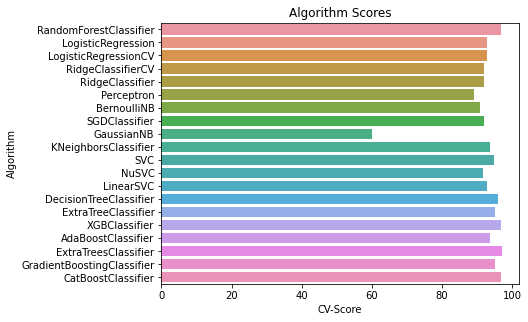

In [ ]:
#Plot them
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] # Reset fig size
ax = sb.barplot(x="CV Score", y="Algorithm", data = algorithms) 
ax.set_xlabel("CV-Score")
ax = ax.set_title("Algorithm Scores")

In [ ]:
#Sort the 5 best models 
algorithms.sort_values(by = ['CV Score'], ascending = False, inplace = True)   # Check also Test-Sc 
algorithms.head()

Algorithm  Accuracy  F1 Score  Recall Score  Precision Score  \
17    ExtraTreesClassifier     97.41     97.41         97.41            97.41   
19      CatBoostClassifier     97.29     97.29         97.29            97.29   
0   RandomForestClassifier     97.20     97.20         97.20            97.20   
15           XGBClassifier     97.23     97.23         97.23            97.23   
13  DecisionTreeClassifier     95.81     95.81         95.81            95.81   

    CV Score    STD  
17     96.97  0.006  
19     96.91  0.005  
0      96.84  0.006  
15     96.74  0.006  
13     95.93  0.006

### More than 5 of the ML models have almost the same accuracy and error metrics. Let's choose one and do hyperparameter training and use for further analysis. We choose the ExtraTreesClassifier, which is the best overall 

In [ ]:
# Hyperparameter tunning of the best model
bestmodel = ExtraTreesClassifier()



n_estimators = [50, 100, 300, 500, 800]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 50]
min_samples_leaf = [1, 2, 5, 10] 

parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
                  min_samples_split = min_samples_split,
                  min_samples_leaf = min_samples_leaf)


#define the number of folds 
folds = RepeatedKFold(n_splits=10, n_repeats=10,random_state=100)
# define search
gsc = RandomizedSearchCV(
    estimator=bestmodel,
    param_distributions=parameters,
    n_jobs= -1,
    random_state=100,
    return_train_score=True,
    cv=folds
)


grid_result = gsc.fit(X_train, y_train)

In [ ]:
# Hyperparameter tunning of the best model
#bestmodel = RandomForestClassifier()



#n_estimators = [50, 100, 300, 500, 800]
#max_depth = [5, 8, 15, 25, 30]
#min_samples_split = [2, 5, 10, 15, 100]
#min_samples_leaf = [1, 2, 5, 10] 

#parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
#                  min_samples_split = min_samples_split,
#                  min_samples_leaf = min_samples_leaf)


##define the number of folds 
#folds = RepeatedKFold(n_splits=10, n_repeats=10,random_state=100)
## define search
#gsc = RandomizedSearchCV(
#    estimator=bestmodel,
#    param_distributions=parameters,
#    n_jobs= -1,
#    random_state=100,
#    return_train_score=True,
#    cv=folds
#)


#grid_result = gsc.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
means_trainscores = grid_result.cv_results_['mean_train_score'] #mean_train_score
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for test_mean, train_mean,stdev, param in zip(means,means_trainscores,stds,params):
  print("The test_mean is: %f and train_mean is: %f with std : %f and parameters: %r" % (test_mean,train_mean,stdev, param))

Best: 0.961644 using {'n_estimators': 800, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': 25}
The test_mean is: 0.927733 and train_mean is: 0.928751 with std : 0.009409 and parameters: {'n_estimators': 800, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_depth': 5}
The test_mean is: 0.927888 and train_mean is: 0.928883 with std : 0.009574 and parameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}
The test_mean is: 0.946446 and train_mean is: 0.954370 with std : 0.007797 and parameters: {'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 5, 'max_depth': 30}
The test_mean is: 0.961644 and train_mean is: 0.974056 with std : 0.006784 and parameters: {'n_estimators': 800, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': 25}
The test_mean is: 0.927979 and train_mean is: 0.928793 with std : 0.009469 and parameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 5}
The tes

## Employing the best model

In [ ]:
# Employing the best model
bestmodel = ExtraTreesClassifier(**grid_result.best_params_)
bestmodel.fit(X_train, y_train)


adj_R2_train = 1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_R2_test = 1 - (1-model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
y_pred = bestmodel.predict(X_test) 
R2_value = bestmodel.score(X_test, y_test)
MSE = metrics.mean_squared_error(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)
        
print(f'Model Score: %.3f, Adj_R^2: %.3f, Test Score: %.3f' 
      %(bestmodel.score(X_train, y_train),adj_R2_train, bestmodel.score(X_test, y_test)))
        
print(f'MSE: %.3f, MAE: %.3f%%' 
      %(MSE, MAE))

Model Score: 0.974, Adj_R^2: 0.985, Test Score: 0.961
MSE: 0.039, MAE: 0.039%


In [ ]:
#Print exclusively the model accuracy for the training and the test dataset
print('------------------------------------------------------------------')
print('Accuracy and error metrics for the best model beyond OLS')
print('Accuracy Score of the training dataset %.5f' %bestmodel.score(X_train,y_train))
print('Accuracy Score of test dataset %.5f' %bestmodel.score(X_test,y_test))
print('RMSE is %.5f'%np.sqrt(mean_squared_error(y_test, y_pred))  )
print('MAE is %.5f'%mean_absolute_error(y_test, y_pred)) 
print('------------------------------------------------------------------')

------------------------------------------------------------------
Accuracy and error metrics for the best model beyond OLS
Accuracy Score of the training dataset 0.97441
Accuracy Score of test dataset 0.96111
RMSE is 0.19721
MAE is 0.03889
------------------------------------------------------------------


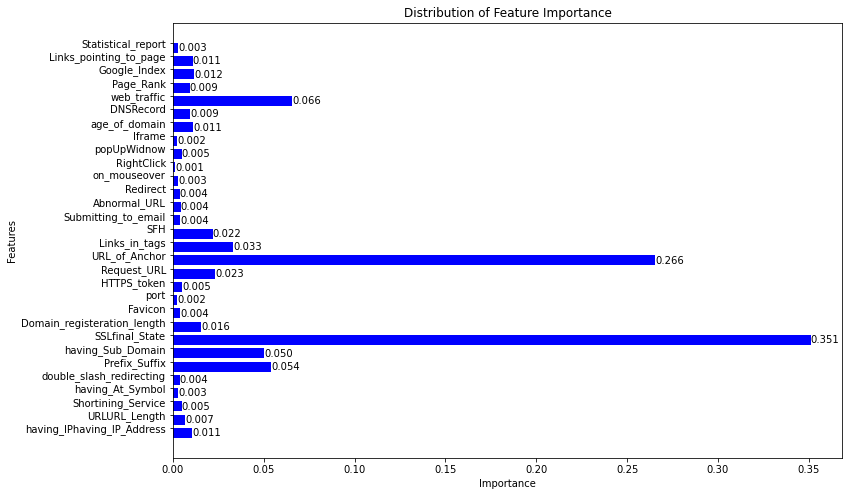

In [ ]:
# Plot the feature importance by reindexing the numbers to the actual parameter
x = X_train.columns
y = bestmodel.feature_importances_

fig, ax = plt.subplots(figsize=(12,8))    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Distribution of Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

# Print the values on the barchart
ax.bar_label(ax.containers[0],label_type='edge',fmt='%.3f')

plt.show()

## Comment on the feature importance
- SSLfinal_State and URL_of_Anchor dominate the feature importance with 35.10% and 26.60%, respectively.
- If need be, we can perform further feature engineering, but that's not the aim at this point

In [ ]:
# Print the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1421,   78],
       [  51, 1767]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1499
           1       0.96      0.97      0.96      1818

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [ ]:
cv_pred = cross_val_predict(bestmodel, X_test, y_test)

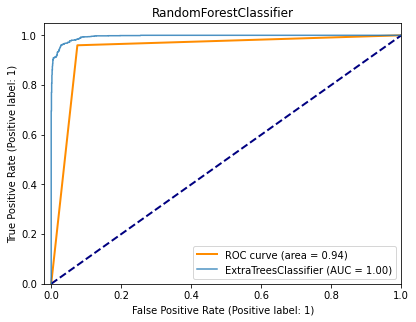

In [ ]:
## Plot the ROC
# ROC curve
fpr, tpr, _ = roc_curve(y_test, cv_pred)
roc_auc = auc(fpr, tpr)
#plt.show()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.legend(loc="best")

# ROC curve for LM, RFM, ABC
ax = plt.gca()

lm_disp_best = RocCurveDisplay.from_estimator(bestmodel, X_test, y_test, ax=ax, alpha = 0.8)

In [ ]:
fpr, tpr, thresold = roc_curve(y_test, cv_pred)

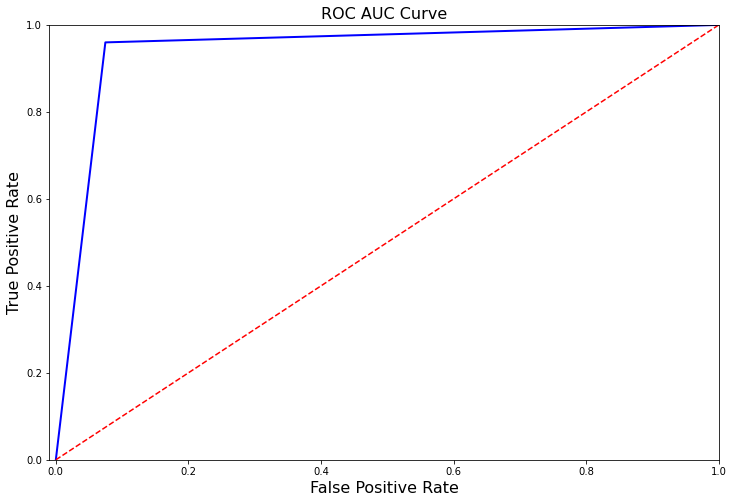

In [ ]:
def logistic_roc_curve(fpr, tpr):
    plt.figure(figsize=(12,8))
    plt.title('ROC AUC Curve', fontsize=16)
    plt.plot(fpr, tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(fpr, tpr)
plt.show()

In [ ]:
print(f'Total time for the case study is: {time.time()-timetotal} seconds')

Total time for the case study is: 2147.715388774872 seconds


# End Case Study